In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn

In [3]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#숫자를 손글씨로 작성한 이미지에 대한 데이터셋
digits_data = load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits_data['data'], digits_data['target'], random_state=0)

cls = KNeighborsClassifier(n_neighbors=3)
cls.fit(X_train, y_train)

#K-NN 결과에 대한 학습/테스트 정확도 출력
print("3-NN Classifier Train Score : {:.2f}".format(cls.score(X_train, y_train)))
print("3-NN Classifier Test Score : {:.2f}".format(cls.score(X_test, y_test)))

3-NN Classifier Train Score : 0.99
3-NN Classifier Test Score : 0.99


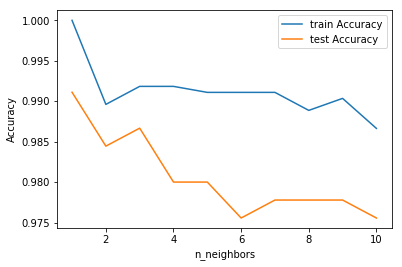

In [5]:
#1부터 10까지 K-NN 알고리즘을 사용했을 때의 정확도를 계산
train_set = []
test_set = []
for val in range(1, 11):
    cls = KNeighborsClassifier(n_neighbors=val)
    cls.fit(X_train, y_train)
    train_set.append(cls.score(X_train, y_train))
    test_set.append(cls.score(X_test, y_test))
    
plt.plot(range(1,11), train_set, label="train Accuracy")
plt.plot(range(1,11), test_set, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge

#당뇨병에 대한 데이터셋
diabletes_data = load_diabetes()

#나이, 성별, bmi수치, 혈압, 6개 혈청 측정치
print("data_set's key : ", diabletes_data.feature_names)

data_set's key :  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
#Ridge 알고리즘을 통한 데이터 정확도

X_train, X_test, y_train, y_test = train_test_split(
    diabletes_data['data'], diabletes_data['target'], random_state=0)

ridge = Ridge().fit(X_train, y_train)
print("Ridge Alpha 1.0 Train Score : {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Alpha 1.0 Test Score : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Alpha 1.0 Train Score : 0.46
Ridge Alpha 1.0 Test Score : 0.36


In [8]:
#Alpha가 0.00001일 경우 선형 회귀와 정확도가 동일하기 때문에 정확도 확인을 위하여 출력
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(
    diabletes_data['data'], diabletes_data['target'], random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print("LinearRegression Train Score : {:.2f}".format(lr.score(X_train, y_train)))
print("LinearRegression 1.0 Test Score : {:.2f}".format(lr.score(X_test, y_test)))
#최종적으로 해당 정확도 이상의 정확도를 목표로함

LinearRegression Train Score : 0.56
LinearRegression 1.0 Test Score : 0.36


In [9]:
alpha_list = []
train_list = []
test_list = []
sum_list = []

#1부터 0.00001 단위로 감소하며 해당 alpha 값에 대한 학습/테스트 정확도를 배열에 저장
for alpha_value in np.arange(1, 0, -0.00001) : 
    #유효 소수만 반환
    alpha_value = round(alpha_value, 5)
    
    #데이터셋에 대한 학습 정확도와 테스트 정확도 계산
    train_score =  Ridge(alpha=alpha_value).fit(X_train, y_train).score(X_train, y_train)
    test_score = Ridge(alpha=alpha_value).fit(X_train, y_train).score(X_test, y_test)
    print(alpha_value, " : ", train_score, " / ", test_score)
    
    #배열에 결과 값 저장
    alpha_list.append(alpha_value)
    train_list.append(train_score)
    test_list.append(test_score)
    sum_list.append(train_score + test_score)

1.0  :  0.4625439622495925  /  0.35695757658096805
0.99999  :  0.4625448609829468  /  0.3569580642605501
0.99998  :  0.46254575971979817  /  0.3569585519394156
0.99997  :  0.46254665846014653  /  0.3569590396175646
0.99996  :  0.4625475572039919  /  0.35695952729499714
0.99995  :  0.4625484559513342  /  0.35696001497171315
0.99994  :  0.4625493547021734  /  0.3569605026477125
0.99993  :  0.4625502534565099  /  0.35696099032299533
0.99992  :  0.4625511522143433  /  0.35696147799756106
0.99991  :  0.46255205097567376  /  0.35696196567141014
0.9999  :  0.4625529497405013  /  0.3569624533445427
0.99989  :  0.46255384850882586  /  0.3569629410169577
0.99988  :  0.4625547472806475  /  0.35696342868865605
0.99987  :  0.4625556460559662  /  0.3569639163596371
0.99986  :  0.46255654483478204  /  0.35696440402990093
0.99985  :  0.46255744361709494  /  0.3569648916994477
0.99984  :  0.46255834240290483  /  0.3569653793682773
0.99983  :  0.46255924119221203  /  0.35696586703638933
0.99982  :  0.46

0.99785  :  0.46273727038360146  /  0.3570624111026277
0.99784  :  0.4627381698690146  /  0.35706289862666196
0.99783  :  0.4627390693579265  /  0.3570633861499659
0.99782  :  0.4627399688503374  /  0.35706387367253856
0.99781  :  0.46274086834624717  /  0.357064361194381
0.9978  :  0.462741767845656  /  0.35706484871549216
0.99779  :  0.46274266734856373  /  0.35706533623587267
0.99778  :  0.4627435668549704  /  0.3570658237555221
0.99777  :  0.462744466364876  /  0.35706631127444044
0.99776  :  0.46274536587828075  /  0.3570667987926276
0.99775  :  0.4627462653951844  /  0.35706728631008355
0.99774  :  0.4627471649155869  /  0.3570677738268081
0.99773  :  0.46274806443948857  /  0.35706826134280134
0.99772  :  0.46274896396688925  /  0.3570687488580633
0.99771  :  0.4627498634977889  /  0.3570692363725936
0.9977  :  0.46275076303218754  /  0.3570697238863927
0.99769  :  0.4627516625700854  /  0.35707021139945994
0.99768  :  0.4627525621114822  /  0.35707069891179544
0.99767  :  0.462

0.99577  :  0.4629244386873791  /  0.3571638002727855
0.99576  :  0.4629253389007584  /  0.35716428764339636
0.99575  :  0.4629262391176385  /  0.3571647750132626
0.99574  :  0.46292713933801966  /  0.3571652623823842
0.99573  :  0.4629280395619012  /  0.3571657497507612
0.99572  :  0.46292893978928384  /  0.35716623711839324
0.99571  :  0.462929840020167  /  0.3571667244852803
0.9957  :  0.46293074025455117  /  0.3571672118514223
0.99569  :  0.46293164049243607  /  0.3571676992168197
0.99568  :  0.46293254073382184  /  0.3571681865814713
0.99567  :  0.4629334409787086  /  0.35716867394537843
0.99566  :  0.462934341227096  /  0.35716916130854026
0.99565  :  0.46293524147898424  /  0.35716964867095635
0.99564  :  0.4629361417343735  /  0.35717013603262715
0.99563  :  0.46293704199326335  /  0.35717062339355266
0.99562  :  0.4629379422556543  /  0.3571711107537324
0.99561  :  0.46293884252154616  /  0.3571715981131669
0.9956  :  0.46293974279093875  /  0.3571720854718555
0.99559  :  0.46

0.99399  :  0.463084731824555  /  0.35725054044893234
0.99398  :  0.4630856326612085  /  0.35725102768593453
0.99397  :  0.4630865335013644  /  0.3572515149221799
0.99396  :  0.4630874343450224  /  0.35725200215766906
0.99395  :  0.46308833519218295  /  0.35725248939240084
0.99394  :  0.4630892360428459  /  0.3572529766263759
0.99393  :  0.46309013689701095  /  0.3572534638595942
0.99392  :  0.46309103775467864  /  0.35725395109205527
0.99391  :  0.4630919386158485  /  0.35725443832375947
0.9939  :  0.4630928394805207  /  0.3572549255547066
0.99389  :  0.46309374034869555  /  0.35725541278489636
0.99388  :  0.46309464122037247  /  0.3572559000143287
0.99387  :  0.4630955420955519  /  0.357256387243004
0.99386  :  0.463096442974234  /  0.35725687447092136
0.99385  :  0.4630973438564182  /  0.35725736169808175
0.99384  :  0.4630982447421049  /  0.35725784892448453
0.99383  :  0.4630991456312942  /  0.3572583361501296
0.99382  :  0.46310004652398595  /  0.357258823375017
0.99381  :  0.463

0.99196  :  0.46326767348521625  /  0.35734943395305385
0.99195  :  0.46326857503301855  /  0.35734992103505836
0.99194  :  0.4632694765843248  /  0.35735040811629204
0.99193  :  0.4632703781391353  /  0.357350895196755
0.99192  :  0.46327127969744963  /  0.3573513822764479
0.99191  :  0.4632721812592683  /  0.3573518693553698
0.9919  :  0.463273082824591  /  0.3573523564335207
0.99189  :  0.4632739843934176  /  0.35735284351090113
0.99188  :  0.46327488596574884  /  0.3573533305875104
0.99187  :  0.4632757875415836  /  0.35735381766334884
0.99186  :  0.463276689120923  /  0.35735430473841623
0.99185  :  0.4632775907037663  /  0.3573547918127127
0.99184  :  0.46327849229011386  /  0.35735527888623775
0.99183  :  0.46327939387996553  /  0.35735576595899154
0.99182  :  0.4632802954733213  /  0.35735625303097407
0.99181  :  0.46328119707018145  /  0.357356740102185
0.9918  :  0.4632820986705456  /  0.35735722717262475
0.99179  :  0.46328300027441405  /  0.357357714242293
0.99178  :  0.463

0.98989  :  0.46345436860308076  /  0.3574502434005128
0.98988  :  0.46345527087640814  /  0.35745073032156416
0.98987  :  0.4634561731532413  /  0.3574512172418308
0.98986  :  0.4634570754335804  /  0.35745170416131267
0.98985  :  0.46345797771742525  /  0.3574521910800099
0.98984  :  0.463458880004776  /  0.35745267799792213
0.98983  :  0.4634597822956327  /  0.3574531649150492
0.98982  :  0.4634606845899951  /  0.35745365183139144
0.98981  :  0.46346158688786365  /  0.35745413874694876
0.9898  :  0.4634624891892378  /  0.3574546256617207
0.98979  :  0.46346339149411797  /  0.3574551125757073
0.98978  :  0.463464293802504  /  0.3574555994889086
0.98977  :  0.46346519611439596  /  0.3574560864013244
0.98976  :  0.463466098429794  /  0.357456573312955
0.98975  :  0.46346700074869784  /  0.35745706022379986
0.98974  :  0.4634679030711075  /  0.3574575471338596
0.98973  :  0.4634688053970234  /  0.3574580340431329
0.98972  :  0.463469707726445  /  0.3574585209516211
0.98971  :  0.4634706

0.98789  :  0.4636348930456934  /  0.357547611904683
0.98788  :  0.46363579602035476  /  0.35754809866742077
0.98787  :  0.46363669899852344  /  0.35754858542935986
0.98786  :  0.46363760198019954  /  0.3575490721905007
0.98785  :  0.4636385049653834  /  0.3575495589508424
0.98784  :  0.46363940795407493  /  0.3575500457103854
0.98783  :  0.4636403109462738  /  0.3575505324691298
0.98782  :  0.4636412139419801  /  0.35755101922707544
0.98781  :  0.46364211694119406  /  0.3575515059842218
0.9878  :  0.46364301994391566  /  0.3575519927405695
0.98779  :  0.46364392295014467  /  0.3575524794961179
0.98778  :  0.46364482595988143  /  0.3575529662508673
0.98777  :  0.4636457289731257  /  0.35755345300481745
0.98776  :  0.46364663198987743  /  0.35755393975796834
0.98775  :  0.4636475350101371  /  0.35755442651031955
0.98774  :  0.4636484380339042  /  0.3575549132618716
0.98773  :  0.46364934106117894  /  0.3575554000126241
0.98772  :  0.4636502440919613  /  0.3575558867625771
0.98771  :  0.

0.98573  :  0.4638300170305697  /  0.35765273399900177
0.98572  :  0.46383092076304455  /  0.35765322058764104
0.98571  :  0.4638318244990286  /  0.3576537071754672
0.9857  :  0.46383272823852206  /  0.3576541937624794
0.98569  :  0.46383363198152494  /  0.35765468034867776
0.98568  :  0.463834535728037  /  0.3576551669340623
0.98567  :  0.4638354394780583  /  0.3576556535186334
0.98566  :  0.46383634323158895  /  0.3576561401023902
0.98565  :  0.46383724698862905  /  0.35765662668533316
0.98564  :  0.46383815074917834  /  0.3576571132674621
0.98563  :  0.46383905451323715  /  0.35765759984877654
0.98562  :  0.46383995828080526  /  0.3576580864292771
0.98561  :  0.4638408620518828  /  0.3576585730089632
0.9856  :  0.4638417658264695  /  0.35765905958783506
0.98559  :  0.46384266960456566  /  0.3576595461658928
0.98558  :  0.46384357338617144  /  0.3576600327431354
0.98557  :  0.4638444771712864  /  0.3576605193195638
0.98556  :  0.4638453809599107  /  0.3576610058951776
0.98555  :  0.4

0.98363  :  0.4640198778739648  /  0.3577548996524894
0.98362  :  0.46402078234356803  /  0.3577553860687366
0.98361  :  0.4640216868166822  /  0.35775587248415475
0.9836  :  0.4640225912933075  /  0.35775635889874513
0.98359  :  0.46402349577344393  /  0.3577568453125065
0.98358  :  0.46402440025709113  /  0.35775733172543966
0.98357  :  0.4640253047442495  /  0.35775781813754404
0.98356  :  0.4640262092349188  /  0.35775830454881985
0.98355  :  0.4640271137290991  /  0.3577587909592669
0.98354  :  0.4640280182267905  /  0.3577592773688848
0.98353  :  0.464028922727993  /  0.3577597637776744
0.98352  :  0.4640298272327066  /  0.3577602501856346
0.98351  :  0.4640307317409311  /  0.3577607365927655
0.9835  :  0.46403163625266686  /  0.357761222999068
0.98349  :  0.46403254076791334  /  0.3577617094045409
0.98348  :  0.46403344528667134  /  0.35776219580918445
0.98347  :  0.4640343498089402  /  0.3577626822129988
0.98346  :  0.46403525433472037  /  0.3577631686159837
0.98345  :  0.46403

0.98168  :  0.4641963158666429  /  0.3578497350665527
0.98167  :  0.46419722102103944  /  0.3578502213199355
0.98166  :  0.46419812617894873  /  0.35785070757247583
0.98165  :  0.4641990313403703  /  0.3578511938241742
0.98164  :  0.46419993650530467  /  0.3578516800750302
0.98163  :  0.4642008416737514  /  0.3578521663250439
0.98162  :  0.4642017468457109  /  0.35785265257421495
0.98161  :  0.46420265202118294  /  0.35785313882254355
0.9816  :  0.46420355720016737  /  0.3578536250700298
0.98159  :  0.46420446238266466  /  0.3578541113166732
0.98158  :  0.46420536756867414  /  0.35785459756247395
0.98157  :  0.4642062727581966  /  0.35785508380743214
0.98156  :  0.46420717795123156  /  0.3578555700515471
0.98155  :  0.46420808314777917  /  0.3578560562948193
0.98154  :  0.4642089883478394  /  0.3578565425372484
0.98153  :  0.4642098935514123  /  0.35785702877883463
0.98152  :  0.4642107987584978  /  0.3578575150195775
0.98151  :  0.46421170396909606  /  0.3578580012594772
0.9815  :  0.

0.97961  :  0.46438375772901574  /  0.3579503714575395
0.9796  :  0.464384663610675  /  0.3579508575350777
0.97959  :  0.4643855694958484  /  0.35795134361175907
0.97958  :  0.46438647538453603  /  0.35795182968758366
0.97957  :  0.46438738127673773  /  0.3579523157625508
0.97956  :  0.46438828717245373  /  0.3579528018366612
0.97955  :  0.4643891930716838  /  0.3579532879099141
0.97954  :  0.4643900989744282  /  0.35795377398231
0.97953  :  0.46439100488068663  /  0.35795426005384845
0.97952  :  0.4643919107904593  /  0.35795474612452916
0.97951  :  0.4643928167037463  /  0.3579552321943529
0.9795  :  0.46439372262054757  /  0.35795571826331873
0.97949  :  0.4643946285408629  /  0.35795620433142694
0.97948  :  0.4643955344646925  /  0.3579566903986775
0.97947  :  0.4643964403920364  /  0.3579571764650704
0.97946  :  0.46439734632289453  /  0.35795766253060524
0.97945  :  0.46439825225726705  /  0.3579581485952824
0.97944  :  0.46439915819515376  /  0.35795863465910127
0.97943  :  0.46

0.97762  :  0.4645640974215912  /  0.35804708391262885
0.97761  :  0.4645650040027194  /  0.3580475698182255
0.9776  :  0.4645659105873633  /  0.3580480557229506
0.97759  :  0.46456681717552295  /  0.3580485416268042
0.97758  :  0.4645677237671981  /  0.35804902752978685
0.97757  :  0.46456863036238916  /  0.3580495134318976
0.97756  :  0.4645695369610958  /  0.3580499993331371
0.97755  :  0.46457044356331834  /  0.3580504852335048
0.97754  :  0.4645713501690565  /  0.358050971133001
0.97753  :  0.4645722567783104  /  0.35805145703162555
0.97752  :  0.46457316339108  /  0.3580519429293779
0.97751  :  0.4645740700073654  /  0.35805242882625876
0.9775  :  0.4645749766271665  /  0.35805291472226763
0.97749  :  0.4645758832504834  /  0.3580534006174041
0.97748  :  0.4645767898773162  /  0.35805388651166903
0.97747  :  0.46457769650766456  /  0.35805437240506144
0.97746  :  0.4645786031415289  /  0.35805485829758155
0.97745  :  0.46457950977890905  /  0.3580553441892297
0.97744  :  0.464580

0.97545  :  0.4647609079327194  /  0.3581525048873775
0.97544  :  0.4647618152769285  /  0.3581529906022204
0.97543  :  0.4647627226246549  /  0.35815347631617644
0.97542  :  0.4647636299758985  /  0.3581539620292452
0.97541  :  0.46476453733065937  /  0.358154447741427
0.9754  :  0.46476544468893755  /  0.35815493345272187
0.97539  :  0.46476635205073324  /  0.3581554191631291
0.97538  :  0.46476725941604624  /  0.35815590487264926
0.97537  :  0.46476816678487654  /  0.358156390581282
0.97536  :  0.46476907415722435  /  0.35815687628902704
0.97535  :  0.46476998153308946  /  0.35815736199588466
0.97534  :  0.46477088891247187  /  0.3581578477018549
0.97533  :  0.4647717962953719  /  0.35815833340693737
0.97532  :  0.46477270368178913  /  0.3581588191111317
0.97531  :  0.4647736110717239  /  0.3581593048144386
0.9753  :  0.46477451846517603  /  0.3581597905168573
0.97529  :  0.4647754258621456  /  0.3581602762183883
0.97528  :  0.46477633326263246  /  0.3581607619190311
0.97527  :  0.4

0.97331  :  0.4649551597686157  /  0.358256427531614
0.9733  :  0.46495606786569976  /  0.3582569130549844
0.97329  :  0.4649569759663028  /  0.358257398577452
0.97328  :  0.4649578840704248  /  0.35825788409901727
0.97327  :  0.46495879217806557  /  0.3582583696196796
0.97326  :  0.4649597002892253  /  0.3582588551394392
0.97325  :  0.4649606084039041  /  0.3582593406582957
0.97324  :  0.4649615165221017  /  0.3582598261762493
0.97323  :  0.4649624246438183  /  0.3582603116933001
0.97322  :  0.46496333276905377  /  0.35826079720944737
0.97321  :  0.4649642408978083  /  0.3582612827246917
0.9732  :  0.4649651490300818  /  0.3582617682390328
0.97319  :  0.464966057165874  /  0.35826225375247067
0.97318  :  0.46496696530518544  /  0.35826273926500496
0.97317  :  0.4649678734480158  /  0.3582632247766355
0.97316  :  0.4649687815943653  /  0.3582637102873629
0.97315  :  0.4649696897442337  /  0.3582641957971867
0.97314  :  0.4649705978976211  /  0.3582646813061069
0.97313  :  0.46497150605

0.97124  :  0.46514321090205646  /  0.3583569115178584
0.97123  :  0.4651441197277072  /  0.3583573968528223
0.97122  :  0.46514502855687856  /  0.35835788218686815
0.97121  :  0.4651459373895701  /  0.3583583675199964
0.9712  :  0.46514684622578206  /  0.3583588528522066
0.97119  :  0.46514775506551465  /  0.3583593381834984
0.97118  :  0.4651486639087675  /  0.3583598235138724
0.97117  :  0.4651495727555407  /  0.35836030884332803
0.97116  :  0.4651504816058345  /  0.3583607941718655
0.97115  :  0.4651513904596487  /  0.35836127949948426
0.97114  :  0.4651522993169833  /  0.358361764826185
0.97113  :  0.46515320817783823  /  0.358362250151967
0.97112  :  0.4651541170422139  /  0.3583627354768306
0.97111  :  0.46515502591010993  /  0.35836322080077543
0.9711  :  0.4651559347815266  /  0.3583637061238014
0.97109  :  0.4651568436564635  /  0.3583641914459088
0.97108  :  0.465157752534921  /  0.35836467676709705
0.97107  :  0.465158661416899  /  0.35836516208736646
0.97106  :  0.46515957

0.96912  :  0.4653359606883237  /  0.35845978188559
0.96911  :  0.4653368702604572  /  0.35846026702431144
0.9691  :  0.46533777983611246  /  0.3584607521620995
0.96909  :  0.46533868941528966  /  0.35846123729895374
0.96908  :  0.4653395989979887  /  0.3584617224348742
0.96907  :  0.4653405085842097  /  0.358462207569861
0.96906  :  0.4653414181739526  /  0.35846269270391373
0.96905  :  0.4653423277672175  /  0.3584631778370325
0.96904  :  0.4653432373640043  /  0.3584636629692175
0.96903  :  0.46534414696431303  /  0.3584641481004682
0.96902  :  0.4653450565681436  /  0.3584646332307846
0.96901  :  0.4653459661754964  /  0.3584651183601669
0.969  :  0.465346875786371  /  0.3584656034886148
0.96899  :  0.4653477854007677  /  0.3584660886161283
0.96898  :  0.46534869501868625  /  0.3584665737427073
0.96897  :  0.46534960464012676  /  0.3584670588683516
0.96896  :  0.46535051426508933  /  0.35846754399306147
0.96895  :  0.46535142389357387  /  0.3584680291168365
0.96894  :  0.4653523335

0.96696  :  0.4655325100590605  /  0.3585645500477046
0.96695  :  0.46553342039208434  /  0.3585650349830345
0.96694  :  0.4655343307286316  /  0.35856551991741437
0.96693  :  0.46553524106870237  /  0.35856600485084467
0.96692  :  0.46553615141229643  /  0.35856648978332495
0.96691  :  0.465537061759414  /  0.35856697471485555
0.9669  :  0.465537972110055  /  0.35856745964543546
0.96689  :  0.46553888246421926  /  0.3585679445750658
0.96688  :  0.46553979282190716  /  0.3585684295037457
0.96687  :  0.46554070318311835  /  0.3585689144314753
0.96686  :  0.46554161354785306  /  0.3585693993582547
0.96685  :  0.46554252391611106  /  0.35856988428408365
0.96684  :  0.4655434342878928  /  0.3585703692089618
0.96683  :  0.4655443446631977  /  0.3585708541328896
0.96682  :  0.46554525504202626  /  0.3585713390558666
0.96681  :  0.4655461654243782  /  0.358571823977893
0.9668  :  0.4655470758102538  /  0.3585723088989685
0.96679  :  0.46554798619965265  /  0.3585727938190931
0.96678  :  0.465

0.96475  :  0.4657337793229932  /  0.35867169753318373
0.96474  :  0.46573469043485083  /  0.35867218225678343
0.96473  :  0.46573560155023364  /  0.3586726669794166
0.96472  :  0.46573651266914107  /  0.35867315170108327
0.96471  :  0.46573742379157335  /  0.3586736364217836
0.9647  :  0.4657383349175308  /  0.3586741211415171
0.96469  :  0.4657392460470129  /  0.35867460586028344
0.96468  :  0.46574015718002015  /  0.35867509057808333
0.96467  :  0.46574106831655215  /  0.3586755752949161
0.96466  :  0.465741979456609  /  0.35867606001078234
0.96465  :  0.46574289060019103  /  0.358676544725681
0.96464  :  0.4657438017472977  /  0.358677029439613
0.96463  :  0.4657447128979296  /  0.35867751415257754
0.96462  :  0.4657456240520863  /  0.35867799886457474
0.96461  :  0.46574653520976805  /  0.3586784835756046
0.9646  :  0.46574744637097465  /  0.35867896828566703
0.96459  :  0.4657483575357063  /  0.3586794529947622
0.96458  :  0.46574926870396305  /  0.3586799377028894
0.96457  :  0.

0.96258  :  0.46593157321637235  /  0.35877685977705753
0.96257  :  0.46593248509328444  /  0.35877734428915653
0.96256  :  0.4659333969737227  /  0.35877782880027265
0.96255  :  0.4659343088576874  /  0.35877831331040555
0.96254  :  0.46593522074517824  /  0.35877879781955524
0.96253  :  0.4659361326361955  /  0.35877928232772194
0.96252  :  0.46593704453073914  /  0.3587797668349051
0.96251  :  0.4659379564288091  /  0.35878025134110536
0.9625  :  0.46593886833040543  /  0.358780735846322
0.96249  :  0.4659397802355282  /  0.3587812203505548
0.96248  :  0.4659406921441771  /  0.35878170485380456
0.96247  :  0.46594160405635254  /  0.3587821893560701
0.96246  :  0.46594251597205416  /  0.3587826738573524
0.96245  :  0.4659434278912824  /  0.35878315835765073
0.96244  :  0.46594433981403693  /  0.3587836428569652
0.96243  :  0.46594525174031787  /  0.35878412735529575
0.96242  :  0.4659461636701252  /  0.358784611852642
0.96241  :  0.46594707560345905  /  0.35878509634900446
0.9624  : 

0.96045  :  0.46612588262592725  /  0.35888003853906236
0.96044  :  0.46612679525408884  /  0.3588805228400588
0.96043  :  0.4661277078857782  /  0.35888100714005544
0.96042  :  0.46612862052099546  /  0.35888149143905324
0.96041  :  0.46612953315974015  /  0.3588819757370515
0.9604  :  0.4661304458020127  /  0.3588824600340499
0.96039  :  0.4661313584478127  /  0.35888294433004886
0.96038  :  0.4661322710971407  /  0.3588834286250481
0.96037  :  0.4661331837499961  /  0.35888391291904753
0.96036  :  0.4661340964063796  /  0.358884397212047
0.96035  :  0.4661350090662906  /  0.35888488150404674
0.96034  :  0.4661359217297294  /  0.3588853657950464
0.96033  :  0.46613683439669584  /  0.3588858500850459
0.96032  :  0.46613774706719013  /  0.3588863343740455
0.96031  :  0.46613865974121216  /  0.3588868186620445
0.9603  :  0.466139572418762  /  0.35888730294904303
0.96029  :  0.46614048509983963  /  0.35888778723504167
0.96028  :  0.466141397784445  /  0.3588882715200399
0.96027  :  0.466

0.95828  :  0.46632400562225684  /  0.3589851083055545
0.95827  :  0.466324919016072  /  0.35898559238788774
0.95826  :  0.4663258324134161  /  0.3589860764692051
0.95825  :  0.46632674581428923  /  0.3589865605495062
0.95824  :  0.46632765921869146  /  0.35898704462879094
0.95823  :  0.46632857262662264  /  0.3589875287070593
0.95822  :  0.466329486038083  /  0.35898801278431125
0.95821  :  0.4663303994530724  /  0.3589884968605468
0.9582  :  0.4663313128715907  /  0.3589889809357658
0.95819  :  0.46633222629363824  /  0.35898946500996787
0.95818  :  0.46633313971921486  /  0.3589899490831536
0.95817  :  0.46633405314832044  /  0.3589904331553223
0.95816  :  0.4663349665809553  /  0.35899091722647414
0.95815  :  0.4663358800171191  /  0.358991401296609
0.95814  :  0.4663367934568122  /  0.3589918853657269
0.95813  :  0.4663377069000343  /  0.3589923694338275
0.95812  :  0.4663386203467855  /  0.3589928535009109
0.95811  :  0.46633953379706583  /  0.35899333756697716
0.9581  :  0.46634

0.95607  :  0.4665259514570873  /  0.35909206566136453
0.95606  :  0.4665268656309677  /  0.3590925495172429
0.95605  :  0.46652777980837823  /  0.35909303337208776
0.95604  :  0.4665286939893193  /  0.35909351722589933
0.95603  :  0.46652960817379074  /  0.3590940010786776
0.95602  :  0.4665305223617924  /  0.35909448493042184
0.95601  :  0.46653143655332463  /  0.3590949687811327
0.956  :  0.46653235074838717  /  0.35909545263080944
0.95599  :  0.4665332649469802  /  0.3590959364794525
0.95598  :  0.46653417914910367  /  0.3590964203270619
0.95597  :  0.46653509335475774  /  0.35909690417363704
0.95596  :  0.46653600756394187  /  0.35909738801917845
0.95595  :  0.46653692177665645  /  0.35909787186368536
0.95594  :  0.4665378359929018  /  0.3590983557071583
0.95593  :  0.46653875021267743  /  0.35909883954959687
0.95592  :  0.4665396644359835  /  0.3590993233910009
0.95591  :  0.46654057866282006  /  0.3590998072313708
0.9559  :  0.466541492893187  /  0.35910029107070585
0.95589  :  

0.95397  :  0.466718005455138  /  0.3591936525992755
0.95396  :  0.46671892037052787  /  0.35919413623642393
0.95395  :  0.4667198352894494  /  0.35919461987252255
0.95394  :  0.4667207502119024  /  0.3591951035075711
0.95393  :  0.4667216651378874  /  0.35919558714157007
0.95392  :  0.46672258006740364  /  0.35919607077451843
0.95391  :  0.4667234950004516  /  0.35919655440641673
0.9539  :  0.46672440993703135  /  0.3591970380372649
0.95389  :  0.4667253248771427  /  0.35919752166706254
0.95388  :  0.46672623982078565  /  0.3591980052958098
0.95387  :  0.46672715476796034  /  0.3591984889235066
0.95386  :  0.46672806971866654  /  0.35919897255015254
0.95385  :  0.4667289846729048  /  0.3591994561757481
0.95384  :  0.46672989963067424  /  0.35919993980029274
0.95383  :  0.4667308145919758  /  0.35920042342378655
0.95382  :  0.46673172955680875  /  0.35920090704622987
0.95381  :  0.4667326445251735  /  0.3592013906676217
0.9538  :  0.46673355949707007  /  0.3592018742879626
0.95379  :  

0.95186  :  0.4669111308543247  /  0.3592956766552634
0.95185  :  0.4669120465150135  /  0.35929616006913145
0.95184  :  0.4669129621792354  /  0.3592966434819328
0.95183  :  0.4669138778469901  /  0.35929712689366766
0.95182  :  0.4669147935182777  /  0.3592976103043355
0.95181  :  0.466915709193098  /  0.35929809371393673
0.9518  :  0.46691662487145125  /  0.3592985771224708
0.95179  :  0.46691754055333734  /  0.359299060529938
0.95178  :  0.4669184562387563  /  0.359299543936338
0.95177  :  0.46691937192770816  /  0.359300027341671
0.95176  :  0.4669202876201928  /  0.3593005107459366
0.95175  :  0.46692120331621034  /  0.35930099414913486
0.95174  :  0.46692211901576075  /  0.3593014775512655
0.95173  :  0.4669230347188442  /  0.359301960952329
0.95172  :  0.4669239504254604  /  0.3593024443523245
0.95171  :  0.46692486613560946  /  0.3593029277512526
0.9517  :  0.46692578184929157  /  0.3593034111491131
0.95169  :  0.4669266975665065  /  0.3593038945459057
0.95168  :  0.4669276132

0.94965  :  0.4671135777595946  /  0.35940248504889394
0.94964  :  0.46711449420117446  /  0.359402968225097
0.94963  :  0.46711541064628836  /  0.35940345140021557
0.94962  :  0.46711632709493633  /  0.35940393457425
0.94961  :  0.46711724354711837  /  0.3594044177472
0.9496  :  0.46711816000283457  /  0.3594049009190653
0.94959  :  0.4671190764620847  /  0.359405384089846
0.94958  :  0.46711999292486917  /  0.35940586725954193
0.94957  :  0.4671209093911873  /  0.35940635042815305
0.94956  :  0.4671218258610398  /  0.3594068335956797
0.94955  :  0.4671227423344264  /  0.3594073167621211
0.94954  :  0.4671236588113472  /  0.3594077999274775
0.94953  :  0.46712457529180207  /  0.35940828309174877
0.94952  :  0.46712549177579077  /  0.359408766254935
0.94951  :  0.46712640826331386  /  0.3594092494170358
0.9495  :  0.46712732475437097  /  0.3594097325780514
0.94949  :  0.46712824124896213  /  0.35941021573798126
0.94948  :  0.46712915774708763  /  0.35941069889682586
0.94947  :  0.46713

0.94742  :  0.4673180317202711  /  0.35951020635574027
0.94741  :  0.4673189489500793  /  0.3595106892881509
0.9474  :  0.4673198661834226  /  0.3595111722194593
0.94739  :  0.46732078342030103  /  0.35951165514966477
0.94738  :  0.46732170066071477  /  0.35951213807876836
0.94737  :  0.467322617904664  /  0.35951262100676895
0.94736  :  0.4673235351521483  /  0.3595131039336671
0.94735  :  0.467324452403168  /  0.3595135868594628
0.94734  :  0.467325369657723  /  0.35951406978415545
0.94733  :  0.46732628691581324  /  0.35951455270774546
0.94732  :  0.46732720417743867  /  0.35951503563023224
0.94731  :  0.4673281214425996  /  0.35951551855161623
0.9473  :  0.46732903871129583  /  0.359516001471897
0.94729  :  0.4673299559835271  /  0.35951648439107475
0.94728  :  0.4673308732592939  /  0.35951696730914906
0.94727  :  0.4673317905385961  /  0.35951745022612025
0.94726  :  0.4673327078214333  /  0.35951793314198766
0.94725  :  0.4673336251078062  /  0.35951841605675183
0.94724  :  0.46

0.94521  :  0.46752082545914286  /  0.35961690747774644
0.9452  :  0.4675217434703687  /  0.35961739016457595
0.94519  :  0.4675226614851309  /  0.35961787285028546
0.94518  :  0.4675235795034295  /  0.35961835553487465
0.94517  :  0.4675244975252645  /  0.35961883821834306
0.94516  :  0.467525415550636  /  0.35961932090069126
0.94515  :  0.46752633357954376  /  0.3596198035819186
0.94514  :  0.46752725161198816  /  0.3596202862620257
0.94513  :  0.46752816964796884  /  0.3596207689410118
0.94512  :  0.467529087687486  /  0.3596212516188767
0.94511  :  0.4675300057305395  /  0.35962173429562105
0.9451  :  0.46753092377712946  /  0.3596222169712444
0.94509  :  0.46753184182725605  /  0.35962269964574656
0.94508  :  0.4675327598809188  /  0.3596231823191278
0.94507  :  0.4675336779381182  /  0.3596236649913874
0.94506  :  0.4675345959988543  /  0.35962414766252604
0.94505  :  0.4675355140631263  /  0.3596246303325429
0.94504  :  0.4675364321309353  /  0.3596251130014386
0.94503  :  0.467

0.943  :  0.4677237919188384  /  0.35972355388805344
0.94299  :  0.4677247107117304  /  0.3597240363253118
0.94298  :  0.46772562950816  /  0.35972451876143174
0.94297  :  0.4677265483081271  /  0.35972500119641293
0.94296  :  0.4677274671116315  /  0.3597254836302558
0.94295  :  0.4677283859186735  /  0.3597259660629598
0.94294  :  0.4677293047292532  /  0.3597264484945255
0.94293  :  0.46773022354337024  /  0.3597269309249518
0.94292  :  0.46773114236102487  /  0.35972741335423974
0.94291  :  0.467732061182217  /  0.3597278957823883
0.9429  :  0.46773298000694663  /  0.35972837820939807
0.94289  :  0.467733898835214  /  0.35972886063526865
0.94288  :  0.46773481766701874  /  0.3597293430599998
0.94287  :  0.467735736502361  /  0.35972982548359167
0.94286  :  0.467736655341241  /  0.3597303079060442
0.94285  :  0.4677375741836586  /  0.35973079032735755
0.94284  :  0.46773849302961357  /  0.35973127274753103
0.94283  :  0.46773941187910617  /  0.3597317551665652
0.94282  :  0.46774033

0.94091  :  0.4679158965316783  /  0.3598243584068568
0.9409  :  0.46791681606401314  /  0.3598248406043929
0.94089  :  0.4679177355998866  /  0.35982532280077306
0.94088  :  0.4679186551392984  /  0.3598258049959976
0.94087  :  0.4679195746822491  /  0.3598262871900664
0.94086  :  0.46792049422873805  /  0.359826769382979
0.94085  :  0.4679214137787655  /  0.3598272515747357
0.94084  :  0.4679223333323316  /  0.3598277337653364
0.94083  :  0.46792325288943615  /  0.35982821595478065
0.94082  :  0.46792417245007933  /  0.3598286981430687
0.94081  :  0.4679250920142609  /  0.3598291803302005
0.9408  :  0.4679260115819812  /  0.3598296625161759
0.94079  :  0.4679269311532399  /  0.3598301447009946
0.94078  :  0.46792785072803733  /  0.35983062688465695
0.94077  :  0.46792877030637303  /  0.3598311090671624
0.94076  :  0.46792968988824746  /  0.35983159124851105
0.94075  :  0.4679306094736606  /  0.35983207342870294
0.94074  :  0.46793152906261215  /  0.35983255560773797
0.94073  :  0.467

0.9387  :  0.4681191992070469  /  0.35993089581963134
0.93869  :  0.46812011952150445  /  0.3599313777597334
0.93868  :  0.4681210398395018  /  0.35993185969866137
0.93867  :  0.4681219601610386  /  0.3599323416364154
0.93866  :  0.46812288048611483  /  0.35993282357299505
0.93865  :  0.4681238008147305  /  0.3599333055084002
0.93864  :  0.46812472114688586  /  0.3599337874426306
0.93863  :  0.4681256414825805  /  0.35993426937568684
0.93862  :  0.4681265618218151  /  0.35993475130756825
0.93861  :  0.468127482164589  /  0.35993523323827525
0.9386  :  0.4681284025109026  /  0.3599357151678072
0.93859  :  0.4681293228607557  /  0.3599361970961643
0.93858  :  0.4681302432141484  /  0.3599366790233467
0.93857  :  0.46813116357108053  /  0.3599371609493536
0.93856  :  0.46813208393155237  /  0.3599376428741856
0.93855  :  0.4681330042955639  /  0.3599381247978424
0.93854  :  0.46813392466311476  /  0.35993860672032374
0.93853  :  0.46813484503420555  /  0.3599390886416298
0.93852  :  0.468

0.93653  :  0.4683189904041714  /  0.3600354491638472
0.93652  :  0.4683199114868103  /  0.3600359308471939
0.93651  :  0.46832083257298984  /  0.36003641252934804
0.9365  :  0.46832175366270967  /  0.36003689421031004
0.93649  :  0.4683226747559701  /  0.3600373758900792
0.93648  :  0.46832359585277084  /  0.3600378575686558
0.93647  :  0.4683245169531123  /  0.3600383392460399
0.93646  :  0.4683254380569941  /  0.3600388209222307
0.93645  :  0.46832635916441645  /  0.36003930259722894
0.93644  :  0.4683272802753795  /  0.3600397842710341
0.93643  :  0.46832820138988296  /  0.36004026594364624
0.93642  :  0.4683291225079269  /  0.3600407476150653
0.93641  :  0.46833004362951114  /  0.3600412292852909
0.9364  :  0.4683309647546363  /  0.36004171095432347
0.93639  :  0.4683318858833019  /  0.36004219262216264
0.93638  :  0.46833280701550795  /  0.360042674288808
0.93637  :  0.4683337281512545  /  0.36004315595426006
0.93636  :  0.4683346492905418  /  0.3600436376185183
0.93635  :  0.468

0.93438  :  0.46851710462734475  /  0.36013898351422036
0.93437  :  0.4685180264712856  /  0.36013946493925475
0.93436  :  0.46851894831876784  /  0.36013994636307844
0.93435  :  0.46851987016979146  /  0.36014042778569166
0.93434  :  0.46852079202435637  /  0.36014090920709396
0.93433  :  0.46852171388246266  /  0.36014139062728523
0.93432  :  0.46852263574411046  /  0.36014187204626535
0.93431  :  0.46852355760929976  /  0.3601423534640348
0.9343  :  0.46852447947803044  /  0.36014283488059307
0.93429  :  0.4685254013503025  /  0.3601433162959399
0.93428  :  0.46852632322611587  /  0.36014379771007565
0.93427  :  0.46852724510547084  /  0.36014427912299996
0.93426  :  0.4685281669883672  /  0.3601447605347128
0.93425  :  0.4685290888748048  /  0.3601452419452137
0.93424  :  0.4685300107647842  /  0.36014572335450357
0.93423  :  0.468530932658305  /  0.3601462047625813
0.93422  :  0.46853185455536694  /  0.3601466861694472
0.93421  :  0.4685327764559706  /  0.36014716757510135
0.9342 

0.93216  :  0.4687218408634012  /  0.36024583002039023
0.93215  :  0.4687227634936302  /  0.36024631117456973
0.93214  :  0.4687236861274018  /  0.36024679232751955
0.93213  :  0.46872460876471544  /  0.3602472734792397
0.93212  :  0.4687255314055715  /  0.36024775462973024
0.93211  :  0.4687264540499698  /  0.360248235778991
0.9321  :  0.4687273766979103  /  0.36024871692702154
0.93209  :  0.4687282993493932  /  0.36024919807382216
0.93208  :  0.46872922200441847  /  0.36024967921939244
0.93207  :  0.4687301446629861  /  0.3602501603637325
0.93206  :  0.46873106732509595  /  0.3602506415068425
0.93205  :  0.46873198999074805  /  0.3602511226487217
0.93204  :  0.46873291265994266  /  0.36025160378937093
0.93203  :  0.4687338353326794  /  0.36025208492878935
0.93202  :  0.4687347580089586  /  0.3602525660669771
0.93201  :  0.46873568068878024  /  0.36025304720393425
0.932  :  0.46873660337214385  /  0.3602535283396606
0.93199  :  0.46873752605905017  /  0.36025400947415587
0.93198  :  0

0.93003  :  0.4689184410860373  /  0.3603482879615797
0.93002  :  0.4689193644708598  /  0.36034876885190525
0.93001  :  0.46892028785922546  /  0.3603492497409827
0.93  :  0.4689212112511342  /  0.36034973062881215
0.92999  :  0.46892213464658616  /  0.3603502115153936
0.92998  :  0.4689230580455809  /  0.3603506924007265
0.92997  :  0.4689239814481191  /  0.36035117328481125
0.92996  :  0.46892490485420024  /  0.36035165416764736
0.92995  :  0.4689258282638247  /  0.36035213504923524
0.92994  :  0.46892675167699205  /  0.36035261592957435
0.92993  :  0.4689276750937027  /  0.360353096808665
0.92992  :  0.4689285985139563  /  0.36035357768650644
0.92991  :  0.46892952193775317  /  0.36035405856309943
0.9299  :  0.4689304453650931  /  0.3603545394384434
0.92989  :  0.4689313687959762  /  0.3603550203125381
0.92988  :  0.46893229223040234  /  0.36035550118538395
0.92987  :  0.46893321566837187  /  0.3603559820569803
0.92986  :  0.46893413910988446  /  0.3603564629273276
0.92985  :  0.46

0.92784  :  0.4691207469457701  /  0.36045357300210135
0.92783  :  0.46912167110661784  /  0.3604540536170423
0.92782  :  0.4691225952710095  /  0.3604545342307163
0.92781  :  0.46912351943894515  /  0.36045501484312314
0.9278  :  0.4691244436104247  /  0.3604554954542628
0.92779  :  0.4691253677854482  /  0.36045597606413504
0.92778  :  0.46912629196401534  /  0.36045645667273996
0.92777  :  0.46912721614612674  /  0.3604569372800773
0.92776  :  0.46912814033178174  /  0.36045741788614727
0.92775  :  0.4691290645209809  /  0.36045789849094945
0.92774  :  0.4691299887137238  /  0.36045837909448397
0.92773  :  0.46913091291001063  /  0.3604588596967506
0.92772  :  0.4691318371098415  /  0.3604593402977492
0.92771  :  0.46913276131321624  /  0.3604598208974801
0.9277  :  0.4691336855201349  /  0.36046030149594266
0.92769  :  0.4691346097305975  /  0.36046078209313703
0.92768  :  0.46913553394460406  /  0.3604612626890631
0.92767  :  0.46913645816215455  /  0.36046174328372094
0.92766  : 

0.92562  :  0.46932599759532434  /  0.36056023827960704
0.92561  :  0.46932692254299957  /  0.3605607186111148
0.9256  :  0.4693278474942195  /  0.36056119894133587
0.92559  :  0.4693287724489842  /  0.3605616792702707
0.92558  :  0.46932969740729336  /  0.3605621595979184
0.92557  :  0.46933062236914735  /  0.3605626399242793
0.92556  :  0.46933154733454596  /  0.36056312024935344
0.92555  :  0.46933247230348907  /  0.3605636005731404
0.92554  :  0.4693333972759769  /  0.3605640808956406
0.92553  :  0.46933432225200955  /  0.36056456121685365
0.92552  :  0.4693352472315867  /  0.36056504153677915
0.92551  :  0.4693361722147087  /  0.3605655218554177
0.9255  :  0.4693370972013752  /  0.3605660021727686
0.92549  :  0.4693380221915866  /  0.36056648248883216
0.92548  :  0.4693389471853423  /  0.3605669628036082
0.92547  :  0.46933987218264295  /  0.3605674431170962
0.92546  :  0.4693407971834883  /  0.3605679234292969
0.92545  :  0.4693417221878783  /  0.3605684037402095
0.92544  :  0.46

0.92349  :  0.46952309148626736  /  0.3606625197033866
0.92348  :  0.4695240171890246  /  0.36066299975886973
0.92347  :  0.469524942895327  /  0.36066347981304736
0.92346  :  0.46952586860517476  /  0.3606639598659196
0.92345  :  0.4695267943185678  /  0.36066443991748676
0.92344  :  0.46952772003550636  /  0.36066491996774797
0.92343  :  0.46952864575599007  /  0.3606654000167032
0.92342  :  0.46952957148001906  /  0.36066588006435285
0.92341  :  0.46953049720759366  /  0.36066636011069664
0.9234  :  0.4695314229387133  /  0.36066684015573436
0.92339  :  0.46953234867337845  /  0.360667320199466
0.92338  :  0.4695332744115889  /  0.3606678002418914
0.92337  :  0.4695342001533448  /  0.3606682802830107
0.92336  :  0.469535125898646  /  0.3606687603228237
0.92335  :  0.46953605164749257  /  0.3606692403613302
0.92334  :  0.4695369773998844  /  0.36066972039852996
0.92333  :  0.46953790315582167  /  0.3606702004344232
0.92332  :  0.4695388289153044  /  0.36067068046900985
0.92331  :  0.

0.9213  :  0.46972590502570755  /  0.360767620540009
0.92129  :  0.4697268315049623  /  0.36076810030748974
0.92128  :  0.469727757987763  /  0.3607685800736453
0.92127  :  0.46972868447410965  /  0.36076905983847596
0.92126  :  0.46972961096400234  /  0.36076953960198166
0.92125  :  0.469730537457441  /  0.360770019364162
0.92124  :  0.46973146395442544  /  0.3607704991250169
0.92123  :  0.4697323904549562  /  0.360770978884547
0.92122  :  0.46973331695903264  /  0.3607714586427513
0.92121  :  0.46973424346665527  /  0.36077193839962995
0.9212  :  0.46973516997782383  /  0.3607724181551831
0.92119  :  0.46973609649253856  /  0.3607728979094107
0.92118  :  0.4697370230107991  /  0.3607733776623123
0.92117  :  0.4697379495326056  /  0.36077385741388823
0.92116  :  0.4697388760579583  /  0.36077433716413776
0.92115  :  0.4697398025868568  /  0.36077481691306146
0.92114  :  0.46974072911930154  /  0.3607752966606591
0.92113  :  0.46974165565529236  /  0.36077577640693037
0.92112  :  0.469

0.9191  :  0.4699298158891999  /  0.3608731373115178
0.91909  :  0.46993074314863625  /  0.3608736167853538
0.91908  :  0.4699316704116193  /  0.3608740962578453
0.91907  :  0.4699325976781491  /  0.36087457572899206
0.91906  :  0.46993352494822527  /  0.3608750551987938
0.91905  :  0.46993445222184815  /  0.36087553466725064
0.91904  :  0.4699353794990174  /  0.36087601413436254
0.91903  :  0.4699363067797334  /  0.3608764936001291
0.91902  :  0.4699372340639961  /  0.3608769730645507
0.91901  :  0.4699381613518052  /  0.3608774525276265
0.919  :  0.46993908864316125  /  0.36087793198935714
0.91899  :  0.46994001593806356  /  0.3608784114497424
0.91898  :  0.4699409432365125  /  0.3608788909087818
0.91897  :  0.4699418705385082  /  0.36087937036647555
0.91896  :  0.46994279784405024  /  0.3608798498228236
0.91895  :  0.4699437251531393  /  0.36088032927782576
0.91894  :  0.46994465246577466  /  0.360880808731482
0.91893  :  0.4699455797819567  /  0.36088128818379184
0.91892  :  0.4699

0.91691  :  0.47013297037071067  /  0.36097810982586076
0.9169  :  0.4701338984069099  /  0.3609785890030436
0.91689  :  0.4701348264466563  /  0.36097906817886194
0.91688  :  0.4701357544899498  /  0.3609795473533155
0.91687  :  0.47013668253679053  /  0.3609800265264045
0.91686  :  0.4701376105871784  /  0.36098050569812845
0.91685  :  0.4701385386411132  /  0.3609809848684874
0.91684  :  0.4701394666985954  /  0.36098146403748155
0.91683  :  0.47014039475962477  /  0.36098194320511034
0.91682  :  0.47014132282420096  /  0.36098242237137423
0.91681  :  0.47014225089232475  /  0.36098290153627244
0.9168  :  0.4701431789639955  /  0.3609833806998052
0.91679  :  0.4701441070392134  /  0.3609838598619729
0.91678  :  0.47014503511797845  /  0.36098433902277494
0.91677  :  0.47014596320029056  /  0.3609848181822112
0.91676  :  0.47014689128614995  /  0.3609852973402816
0.91675  :  0.4701478193755565  /  0.3609857764969864
0.91674  :  0.47014874746851043  /  0.3609862556523249
0.91673  :  0

0.91471  :  0.4703372237892197  /  0.36108349577353627
0.9147  :  0.47033815260584555  /  0.36108397464831066
0.91469  :  0.4703390814260192  /  0.36108445352169993
0.91468  :  0.47034001024974037  /  0.3610849323937043
0.91467  :  0.47034093907700936  /  0.36108541126432403
0.91466  :  0.47034186790782584  /  0.36108589013355874
0.91465  :  0.47034279674219015  /  0.36108636900140856
0.91464  :  0.47034372558010196  /  0.3610868478678728
0.91463  :  0.4703446544215615  /  0.36108732673295174
0.91462  :  0.4703455832665687  /  0.36108780559664555
0.91461  :  0.47034651211512357  /  0.361088284458954
0.9146  :  0.470347440967226  /  0.3610887633198768
0.91459  :  0.47034836982287614  /  0.36108924217941407
0.91458  :  0.4703492986820741  /  0.36108972103756554
0.91457  :  0.4703502275448195  /  0.3610901998943312
0.91456  :  0.4703511564111127  /  0.3610906787497107
0.91455  :  0.4703520852809536  /  0.36109115760370436
0.91454  :  0.47035301415434205  /  0.36109163645631226
0.91453  : 

0.91253  :  0.4705397897297793  /  0.3611878575648034
0.91252  :  0.4705407193198423  /  0.3611883361355298
0.91251  :  0.4705416489134533  /  0.36118881470485154
0.9125  :  0.4705425785106122  /  0.36118929327276816
0.91249  :  0.4705435081113193  /  0.3611897718392799
0.91248  :  0.47054443771557464  /  0.36119025040438624
0.91247  :  0.4705453673233779  /  0.36119072896808757
0.91246  :  0.4705462969347294  /  0.3611912075303837
0.91245  :  0.4705472265496289  /  0.3611916860912744
0.91244  :  0.47054815616807666  /  0.36119216465075943
0.91243  :  0.4705490857900724  /  0.36119264320883904
0.91242  :  0.47055001541561636  /  0.3611931217655131
0.91241  :  0.4705509450447083  /  0.36119360032078107
0.9124  :  0.4705518746773485  /  0.3611940788746435
0.91239  :  0.47055280431353674  /  0.3611945574270998
0.91238  :  0.47055373395327316  /  0.36119503597815006
0.91237  :  0.47055466359655773  /  0.3611955145277941
0.91236  :  0.47055559324339036  /  0.36119599307603223
0.91235  :  0.

0.91035  :  0.47074252428992924  /  0.3612921525964006
0.91034  :  0.4707434546535225  /  0.36129263085867436
0.91033  :  0.4707443850206643  /  0.36129310911952284
0.91032  :  0.47074531539135456  /  0.3612935873789461
0.91031  :  0.47074624576559343  /  0.3612940656369441
0.9103  :  0.4707471761433807  /  0.3612945438935167
0.91029  :  0.47074810652471655  /  0.3612950221486637
0.91028  :  0.4707490369096008  /  0.3612955004023851
0.91027  :  0.47074996729803364  /  0.36129597865468077
0.91026  :  0.4707508976900151  /  0.3612964569055509
0.91025  :  0.47075182808554494  /  0.36129693515499495
0.91024  :  0.4707527584846234  /  0.361297413403013
0.91023  :  0.4707536888872502  /  0.361297891649605
0.91022  :  0.47075461929342577  /  0.36129836989477115
0.91021  :  0.4707555497031497  /  0.36129884813851076
0.9102  :  0.47075648011642224  /  0.36129932638082385
0.91019  :  0.47075741053324316  /  0.36129980462171085
0.91018  :  0.4707583409536128  /  0.3613002828611712
0.91017  :  0.4

0.90815  :  0.47094728976684497  /  0.361397335801253
0.90814  :  0.4709482209111491  /  0.36139781374773994
0.90813  :  0.4709491520590021  /  0.36139829169278104
0.90812  :  0.4709500832104039  /  0.36139876963637607
0.90811  :  0.47095101436535447  /  0.3613992475785256
0.9081  :  0.470951945523854  /  0.36139972551922894
0.90809  :  0.47095287668590236  /  0.3614002034584858
0.90808  :  0.47095380785149965  /  0.36140068139629666
0.90807  :  0.4709547390206458  /  0.3614011593326609
0.90806  :  0.4709556701933407  /  0.3614016372675789
0.90805  :  0.4709566013695846  /  0.36140211520105037
0.90804  :  0.47095753254937744  /  0.3614025931330752
0.90803  :  0.470958463732719  /  0.3614030710636533
0.90802  :  0.47095939491960936  /  0.3614035489927844
0.90801  :  0.4709603261100489  /  0.36140402692046925
0.908  :  0.47096125730403704  /  0.3614045048467065
0.90799  :  0.47096218850157423  /  0.36140498277149646
0.90798  :  0.47096311970266025  /  0.3614054606948396
0.90797  :  0.470

0.906  :  0.471147567436104  /  0.3615000608813743
0.90599  :  0.4711484993434458  /  0.36150053851484276
0.90598  :  0.47114943125433684  /  0.36150101614684504
0.90597  :  0.4711503631687768  /  0.36150149377738094
0.90596  :  0.4711512950867661  /  0.3615019714064509
0.90595  :  0.4711522270083045  /  0.36150244903405415
0.90594  :  0.47115315893339194  /  0.3615029266601911
0.90593  :  0.47115409086202875  /  0.3615034042848614
0.90592  :  0.4711550227942146  /  0.3615038819080646
0.90591  :  0.47115595472994953  /  0.3615043595298014
0.9059  :  0.47115688666923383  /  0.3615048371500713
0.90589  :  0.4711578186120673  /  0.36150531476887393
0.90588  :  0.4711587505584497  /  0.36150579238620983
0.90587  :  0.4711596825083816  /  0.36150627000207836
0.90586  :  0.4711606144618624  /  0.3615067476164796
0.90585  :  0.4711615464188924  /  0.3615072252294136
0.90584  :  0.4711624783794718  /  0.36150770284087996
0.90583  :  0.4711634103436001  /  0.3615081804508786
0.90582  :  0.47116

0.90386  :  0.47134707649803975  /  0.36160224087540005
0.90385  :  0.47134800916492847  /  0.3616027181929419
0.90384  :  0.4713489418353667  /  0.3616031955089971
0.90383  :  0.47134987450935395  /  0.36160367282356554
0.90382  :  0.4713508071868908  /  0.3616041501366474
0.90381  :  0.47135173986797696  /  0.36160462744824207
0.9038  :  0.4713526725526127  /  0.36160510475834995
0.90379  :  0.4713536052407976  /  0.361605582066971
0.90378  :  0.47135453793253224  /  0.3616060593741046
0.90377  :  0.471355470627816  /  0.3616065366797513
0.90376  :  0.4713564033266494  /  0.36160701398391026
0.90375  :  0.47135733602903196  /  0.361607491286582
0.90374  :  0.4713582687349641  /  0.3616079685877662
0.90373  :  0.47135920144444565  /  0.36160844588746277
0.90372  :  0.4713601341574767  /  0.36160892318567184
0.90371  :  0.4713610668740569  /  0.36160940048239276
0.9037  :  0.4713619995941868  /  0.3616098777776259
0.90369  :  0.47136293231786597  /  0.36161035507137096
0.90368  :  0.47

0.90167  :  0.47155141527614075  /  0.3617067377652248
0.90166  :  0.47155234872037155  /  0.3617072147549124
0.90165  :  0.47155328216815195  /  0.3617076917430925
0.90164  :  0.47155421561948196  /  0.36170816872976497
0.90163  :  0.47155514907436147  /  0.36170864571492933
0.90162  :  0.4715560825327906  /  0.3617091226985859
0.90161  :  0.4715570159947693  /  0.36170959968073446
0.9016  :  0.4715579494602977  /  0.3617100766613748
0.90159  :  0.47155888292937576  /  0.36171055364050686
0.90158  :  0.4715598164020032  /  0.3617110306181306
0.90157  :  0.4715607498781803  /  0.361711507594246
0.90156  :  0.47156168335790716  /  0.3617119845688528
0.90155  :  0.4715626168411835  /  0.3617124615419508
0.90154  :  0.4715635503280097  /  0.36171293851354047
0.90153  :  0.47156448381838534  /  0.361713415483621
0.90152  :  0.4715654173123105  /  0.3617138924521929
0.90151  :  0.4715663508097854  /  0.3617143694192554
0.9015  :  0.47156728431080974  /  0.3617148463848091
0.90149  :  0.4715

0.89947  :  0.47175685851810434  /  0.36181163900745905
0.89946  :  0.4717577927432647  /  0.36181211566312665
0.89945  :  0.47175872697197485  /  0.3618125923172649
0.89944  :  0.47175966120423474  /  0.3618130689698742
0.89943  :  0.4717605954400441  /  0.36181354562095425
0.89942  :  0.47176152967940366  /  0.36181402227050485
0.89941  :  0.4717624639223127  /  0.36181449891852613
0.8994  :  0.47176339816877144  /  0.36181497556501807
0.89939  :  0.47176433241878  /  0.36181545220998
0.89938  :  0.4717652666723384  /  0.3618159288534124
0.89937  :  0.4717662009294463  /  0.36181640549531524
0.89936  :  0.47176713519010416  /  0.36181688213568786
0.89935  :  0.4717680694543118  /  0.3618173587745307
0.89934  :  0.4717690037220692  /  0.3618178354118434
0.89933  :  0.4717699379933763  /  0.36181831204762605
0.89932  :  0.4717708722682331  /  0.3618187886818781
0.89931  :  0.47177180654663975  /  0.36181926531460007
0.8993  :  0.4717727408285962  /  0.3618197419457916
0.89929  :  0.471

0.89729  :  0.4719606035660676  /  0.3619155136105976
0.89728  :  0.47196153856508394  /  0.36191598993062524
0.89727  :  0.47196247356765  /  0.3619164662491027
0.89726  :  0.47196340857376595  /  0.36191694256602935
0.89725  :  0.47196434358343176  /  0.3619174188814057
0.89724  :  0.4719652785966473  /  0.36191789519523154
0.89723  :  0.47196621361341284  /  0.3619183715075066
0.89722  :  0.47196714863372813  /  0.36191884781823047
0.89721  :  0.47196808365759324  /  0.36191932412740335
0.8972  :  0.4719690186850082  /  0.36191980043502525
0.89719  :  0.47196995371597306  /  0.3619202767410963
0.89718  :  0.47197088875048765  /  0.3619207530456159
0.89717  :  0.4719718237885522  /  0.36192122934858406
0.89716  :  0.47197275883016665  /  0.3619217056500009
0.89715  :  0.4719736938753307  /  0.36192218194986603
0.89714  :  0.4719746289240446  /  0.3619226582481797
0.89713  :  0.4719755639763086  /  0.3619231345449415
0.89712  :  0.47197649903212224  /  0.36192361084015146
0.89711  :  

0.89509  :  0.47216638886564344  /  0.3620202664957112
0.89508  :  0.47216732464562927  /  0.3620207424722811
0.89507  :  0.4721682604291645  /  0.36202121844727886
0.89506  :  0.47216919621624986  /  0.36202169442070453
0.89505  :  0.47217013200688507  /  0.3620221703925578
0.89504  :  0.4721710678010701  /  0.36202264636283854
0.89503  :  0.4721720035988052  /  0.3620231223315471
0.89502  :  0.47217293940008986  /  0.3620235982986828
0.89501  :  0.4721738752049245  /  0.3620240742642459
0.895  :  0.47217481101330905  /  0.3620245502282362
0.89499  :  0.47217574682524366  /  0.3620250261906536
0.89498  :  0.4721766826407279  /  0.3620255021514981
0.89497  :  0.47217761845976214  /  0.3620259781107694
0.89496  :  0.47217855428234623  /  0.36202645406846756
0.89495  :  0.47217949010848015  /  0.3620269300245923
0.89494  :  0.472180425938164  /  0.3620274059791436
0.89493  :  0.4721813617713976  /  0.36202788193212165
0.89492  :  0.4721822976081813  /  0.3620283578835257
0.89491  :  0.47

0.89287  :  0.47237421910432653  /  0.362125894550124
0.89286  :  0.47237515567238253  /  0.3621263701752465
0.89285  :  0.4723760922439886  /  0.36212684579877485
0.89284  :  0.47237702881914434  /  0.3621273214207089
0.89283  :  0.47237796539785004  /  0.36212779704104825
0.89282  :  0.47237890198010557  /  0.3621282726597931
0.89281  :  0.4723798385659109  /  0.3621287482769433
0.8928  :  0.4723807751552661  /  0.362129223892499
0.89279  :  0.47238171174817123  /  0.3621296995064599
0.89278  :  0.4723826483446262  /  0.3621301751188256
0.89277  :  0.47238358494463084  /  0.3621306507295965
0.89276  :  0.47238452154818533  /  0.3621311263387721
0.89275  :  0.4723854581552899  /  0.36213160194635263
0.89274  :  0.47238639476594424  /  0.3621320775523379
0.89273  :  0.47238733138014843  /  0.362132553156728
0.89272  :  0.47238826799790246  /  0.3621330287595219
0.89271  :  0.4723892046192062  /  0.36213350436072045
0.8927  :  0.47239014124406  /  0.3621339799603235
0.89269  :  0.472391

0.89067  :  0.47258034959206996  /  0.3622304934967029
0.89066  :  0.4725812869410857  /  0.3622309687686789
0.89065  :  0.47258222429365093  /  0.3622314440390386
0.89064  :  0.47258316164976644  /  0.36223191930778187
0.89063  :  0.47258409900943144  /  0.3622323945749084
0.89062  :  0.47258503637264626  /  0.36223286984041847
0.89061  :  0.4725859737394108  /  0.36223334510431204
0.8906  :  0.47258691110972517  /  0.36223382036658847
0.89059  :  0.47258784848358926  /  0.36223429562724796
0.89058  :  0.4725887858610033  /  0.3622347708862905
0.89057  :  0.4725897232419668  /  0.36223524614371605
0.89056  :  0.47259066062648025  /  0.3622357213995243
0.89055  :  0.4725915980145434  /  0.362236196653715
0.89054  :  0.4725925354061564  /  0.3622366719062885
0.89053  :  0.472593472801319  /  0.3622371471572442
0.89052  :  0.47259441020003157  /  0.3622376224065825
0.89051  :  0.47259534760229394  /  0.3622380976543028
0.8905  :  0.4725962850081058  /  0.3622385729004055
0.89049  :  0.47

0.8885  :  0.47278383751999076  /  0.36233358946525784
0.88849  :  0.4727847756392934  /  0.36233406438411775
0.88848  :  0.4727857137621455  /  0.3623345393013392
0.88847  :  0.47278665188854735  /  0.36233501421692227
0.88846  :  0.4727875900184988  /  0.3623354891308668
0.88845  :  0.4727885281519999  /  0.3623359640431726
0.88844  :  0.4727894662890506  /  0.36233643895384005
0.88843  :  0.4727904044296509  /  0.36233691386286815
0.88842  :  0.47279134257380095  /  0.3623373887702578
0.88841  :  0.4727922807215005  /  0.36233786367600807
0.8884  :  0.4727932188727497  /  0.362338338580119
0.88839  :  0.4727941570275487  /  0.3623388134825911
0.88838  :  0.47279509518589713  /  0.362339288383424
0.88837  :  0.4727960333477952  /  0.36233976328261697
0.88836  :  0.47279697151324296  /  0.36234023818017047
0.88835  :  0.47279790968224034  /  0.3623407130760844
0.88834  :  0.4727988478547875  /  0.3623411879703585
0.88833  :  0.472799786030884  /  0.3623416628629931
0.88832  :  0.47280

0.88641  :  0.4729799816078788  /  0.36243281174328656
0.8864  :  0.472980920469037  /  0.36243328631751737
0.88639  :  0.4729818593337445  /  0.3624337608900883
0.88638  :  0.4729827982020016  /  0.36243423546099973
0.88637  :  0.47298373707380803  /  0.36243471003025074
0.88636  :  0.47298467594916405  /  0.3624351845978421
0.88635  :  0.47298561482806945  /  0.3624356591637734
0.88634  :  0.4729865537105242  /  0.3624361337280445
0.88633  :  0.4729874925965286  /  0.36243660829065516
0.88632  :  0.4729884314860824  /  0.36243708285160536
0.88631  :  0.4729893703791854  /  0.36243755741089534
0.8863  :  0.47299030927583796  /  0.3624380319685243
0.88629  :  0.4729912481760401  /  0.3624385065244927
0.88628  :  0.4729921870797918  /  0.36243898107880035
0.88627  :  0.47299312598709264  /  0.3624394556314473
0.88626  :  0.47299406489794293  /  0.3624399301824329
0.88625  :  0.47299500381234283  /  0.36244040473175754
0.88624  :  0.4729959427302922  /  0.36244087927942104
0.88623  :  0.

0.8842  :  0.47318755620906616  /  0.36253765211869116
0.88419  :  0.4731884958546261  /  0.36253812632362825
0.88418  :  0.47318943550373527  /  0.36253860052688314
0.88417  :  0.47319037515639384  /  0.36253907472845504
0.88416  :  0.4731913148126011  /  0.3625395489283446
0.88415  :  0.4731922544723579  /  0.3625400231265511
0.88414  :  0.47319319413566385  /  0.36254049732307503
0.88413  :  0.4731941338025192  /  0.36254097151791576
0.88412  :  0.47319507347292344  /  0.3625414457110735
0.88411  :  0.473196013146877  /  0.3625419199025479
0.8841  :  0.4731969528243797  /  0.3625423940923391
0.88409  :  0.47319789250543154  /  0.3625428682804469
0.88408  :  0.47319883219003256  /  0.36254334246687114
0.88407  :  0.47319977187818285  /  0.36254381665161184
0.88406  :  0.4732007115698824  /  0.36254429083466877
0.88405  :  0.4732016512651309  /  0.36254476501604205
0.88404  :  0.4732025909639288  /  0.3625452391957311
0.88403  :  0.47320353066627585  /  0.36254571337373653
0.88402  : 

0.88201  :  0.47339342330723644  /  0.3626414626585728
0.882  :  0.4733943637300375  /  0.3626419364925709
0.88199  :  0.47339530415638764  /  0.3626424103248639
0.88198  :  0.4733962445862865  /  0.36264288415545165
0.88197  :  0.47339718501973427  /  0.36264335798433367
0.88196  :  0.473398125456731  /  0.36264383181151016
0.88195  :  0.47339906589727654  /  0.36264430563698113
0.88194  :  0.4734000063413709  /  0.36264477946074636
0.88193  :  0.47340094678901434  /  0.3626452532828056
0.88192  :  0.4734018872402066  /  0.3626457271031589
0.88191  :  0.47340282769494746  /  0.3626462009218063
0.8819  :  0.47340376815323737  /  0.36264667473874723
0.88189  :  0.4734047086150762  /  0.36264714855398195
0.88188  :  0.4734056490804639  /  0.36264762236751036
0.88187  :  0.4734065895494004  /  0.36264809617933236
0.88186  :  0.47340753002188585  /  0.3626485699894476
0.88185  :  0.4734084704979201  /  0.36264904379785623
0.88184  :  0.4734094109775032  /  0.362649517604558
0.88183  :  0.4

0.87981  :  0.47360040181325835  /  0.3627456648758074
0.8798  :  0.47360134301677415  /  0.36274613833213076
0.87979  :  0.47360228422383865  /  0.36274661178672574
0.87978  :  0.47360322543445144  /  0.3627470852395923
0.87977  :  0.4736041666486128  /  0.3627475586907303
0.87976  :  0.4736051078663226  /  0.3627480321401396
0.87975  :  0.4736060490875811  /  0.36274850558782035
0.87974  :  0.47360699031238784  /  0.3627489790337719
0.87973  :  0.4736079315407432  /  0.3627494524779947
0.87972  :  0.47360887277264707  /  0.36274992592048827
0.87971  :  0.47360981400809943  /  0.3627503993612532
0.8797  :  0.4736107552471003  /  0.3627508728002885
0.87969  :  0.4736116964896495  /  0.36275134623759464
0.87968  :  0.4736126377357476  /  0.36275181967317116
0.87967  :  0.4736135789853937  /  0.36275229310701806
0.87966  :  0.4736145202385885  /  0.36275276653913546
0.87965  :  0.47361546149533185  /  0.3627532399695229
0.87964  :  0.47361640275562356  /  0.36275371339818063
0.87963  :  

0.87763  :  0.473805668109349  /  0.3628488372948452
0.87762  :  0.47380661008639413  /  0.36284931037189916
0.87761  :  0.4738075520669873  /  0.3628497834472013
0.8776  :  0.47380849405112857  /  0.3628502565207524
0.87759  :  0.47380943603881787  /  0.3628507295925516
0.87758  :  0.4738103780300553  /  0.3628512026625996
0.87757  :  0.4738113200248407  /  0.3628516757308953
0.87756  :  0.47381226202317417  /  0.3628521487974391
0.87755  :  0.4738132040250558  /  0.3628526218622312
0.87754  :  0.47381414603048544  /  0.36285309492527107
0.87753  :  0.47381508803946326  /  0.36285356798655855
0.87752  :  0.4738160300519889  /  0.362854041046094
0.87751  :  0.4738169720680627  /  0.3628545141038768
0.8775  :  0.4738179140876848  /  0.36285498715990727
0.87749  :  0.4738188561108545  /  0.3628554602141846
0.87748  :  0.4738197981375727  /  0.36285593326670984
0.87747  :  0.4738207401678386  /  0.36285640631748184
0.87746  :  0.47382168220165266  /  0.36285687936650113
0.87745  :  0.4738

0.8754  :  0.4740158168119427  /  0.36295428993213597
0.87539  :  0.474016759580154  /  0.3629547626159978
0.87538  :  0.47401770235191265  /  0.3629552352980847
0.87537  :  0.47401864512721903  /  0.3629557079783965
0.87536  :  0.4740195879060729  /  0.36295618065693247
0.87535  :  0.4740205306884744  /  0.3629566533336933
0.87534  :  0.47402147347442347  /  0.36295712600867847
0.87533  :  0.47402241626391994  /  0.3629575986818878
0.87532  :  0.47402335905696413  /  0.3629580713533215
0.87531  :  0.4740243018535558  /  0.362958544022979
0.8753  :  0.4740252446536951  /  0.3629590166908607
0.87529  :  0.474026187457382  /  0.3629594893569663
0.87528  :  0.4740271302646163  /  0.36295996202129577
0.87527  :  0.4740280730753981  /  0.36296043468384853
0.87526  :  0.47402901588972746  /  0.36296090734462505
0.87525  :  0.47402995870760445  /  0.3629613800036252
0.87524  :  0.47403090152902905  /  0.36296185266084835
0.87523  :  0.47403184435400103  /  0.3629623253162949
0.87522  :  0.474

0.87318  :  0.4742251983757877  /  0.36305918200988563
0.87317  :  0.4742261419314975  /  0.363059654297026
0.87316  :  0.47422708549075465  /  0.3630601265823673
0.87315  :  0.47422802905355854  /  0.36306059886590936
0.87314  :  0.4742289726199096  /  0.3630610711476523
0.87313  :  0.4742299161898077  /  0.3630615434275959
0.87312  :  0.47423085976325263  /  0.36306201570574004
0.87311  :  0.4742318033402445  /  0.3630624879820843
0.8731  :  0.47423274692078354  /  0.3630629602566291
0.87309  :  0.47423369050486963  /  0.363063432529374
0.87308  :  0.47423463409250244  /  0.36306390480031925
0.87307  :  0.4742355776836824  /  0.36306437706946426
0.87306  :  0.4742365212784093  /  0.36306484933680905
0.87305  :  0.47423746487668295  /  0.3630653216023535
0.87304  :  0.47423840847850385  /  0.36306579386609816
0.87303  :  0.4742393520838717  /  0.36306626612804205
0.87302  :  0.47424029569278636  /  0.36306673838818515
0.87301  :  0.4742412393052481  /  0.3630672106465276
0.873  :  0.4

0.871  :  0.4744309774130264  /  0.363162097869028
0.87099  :  0.47443192174191606  /  0.3631625697614109
0.87098  :  0.4744328660743521  /  0.3631630416519709
0.87097  :  0.4744338104103344  /  0.3631635135407085
0.87096  :  0.4744347547498632  /  0.36316398542762296
0.87095  :  0.47443569909293826  /  0.3631644573127142
0.87094  :  0.4744366434395598  /  0.3631649291959823
0.87093  :  0.47443758778972756  /  0.36316540107742745
0.87092  :  0.47443853214344167  /  0.36316587295704883
0.87091  :  0.4744394765007024  /  0.3631663448348471
0.8709  :  0.47444042086150917  /  0.3631668167108215
0.87089  :  0.47444136522586244  /  0.3631672885849724
0.87088  :  0.4744423095937621  /  0.36316776045729926
0.87087  :  0.47444325396520803  /  0.3631682323278025
0.87086  :  0.47444419834020035  /  0.3631687041964814
0.87085  :  0.47444514271873883  /  0.36316917606333643
0.87084  :  0.4744460871008239  /  0.36316964792836715
0.87083  :  0.4744470314864552  /  0.3631701197915732
0.87082  :  0.474

0.86885  :  0.4746340897036617  /  0.363263512621244
0.86884  :  0.47463503479495106  /  0.3632639841192271
0.86883  :  0.4746359798897859  /  0.363264455615364
0.86882  :  0.47463692498816645  /  0.3632649271096544
0.86881  :  0.47463787009009284  /  0.3632653986020984
0.8688  :  0.47463881519556483  /  0.3632658700926954
0.86879  :  0.47463976030458255  /  0.3632663415814462
0.86878  :  0.47464070541714587  /  0.36326681306835007
0.86877  :  0.4746416505332549  /  0.36326728455340684
0.86876  :  0.47464259565290956  /  0.36326775603661676
0.86875  :  0.47464354077610993  /  0.3632682275179796
0.86874  :  0.474644485902856  /  0.36326869899749503
0.86873  :  0.4746454310331477  /  0.36326917047516316
0.86872  :  0.47464637616698513  /  0.3632696419509839
0.86871  :  0.47464732130436815  /  0.36327011342495696
0.8687  :  0.4746482664452968  /  0.3632705848970824
0.86869  :  0.47464921158977125  /  0.3632710563673599
0.86868  :  0.4746501567377911  /  0.36327152783578964
0.86867  :  0.4

0.8667  :  0.4748373658941324  /  0.363364842034414
0.86669  :  0.47483831174766855  /  0.3633653131329141
0.86668  :  0.47483925760474976  /  0.3633657842295448
0.86667  :  0.4748402034653759  /  0.3633662553243051
0.86666  :  0.47484114932954713  /  0.36336672641719514
0.86665  :  0.47484209519726317  /  0.3633671975082149
0.86664  :  0.47484304106852415  /  0.3633676685973648
0.86663  :  0.4748439869433302  /  0.3633681396846432
0.86662  :  0.47484493282168105  /  0.36336861077005134
0.86661  :  0.47484587870357686  /  0.36336908185358874
0.8666  :  0.4748468245890175  /  0.3633695529352552
0.86659  :  0.4748477704780032  /  0.3633700240150508
0.86658  :  0.47484871637053383  /  0.36337049509297514
0.86657  :  0.4748496622666093  /  0.3633709661690282
0.86656  :  0.4748506081662297  /  0.3633714372432102
0.86655  :  0.47485155406939505  /  0.36337190831552046
0.86654  :  0.47485249997610524  /  0.36337237938595934
0.86653  :  0.47485344588636047  /  0.3633728504545265
0.86652  :  0.

0.86451  :  0.47504459243390607  /  0.3634679677753405
0.8645  :  0.47504553906369973  /  0.363468438461656
0.86449  :  0.47504648569703745  /  0.3634689091460771
0.86448  :  0.47504743233391933  /  0.36346937982860383
0.86447  :  0.4750483789743454  /  0.36346985050923597
0.86446  :  0.47504932561831537  /  0.36347032118797307
0.86445  :  0.47505027226582974  /  0.36347079186481546
0.86444  :  0.4750512189168882  /  0.36347126253976314
0.86443  :  0.47505216557149044  /  0.36347173321281545
0.86442  :  0.4750531122296371  /  0.3634722038839726
0.86441  :  0.4750540588913277  /  0.36347267455323484
0.8644  :  0.47505500555656255  /  0.36347314522060126
0.86439  :  0.47505595222534147  /  0.36347361588607263
0.86438  :  0.47505689889766445  /  0.36347408654964797
0.86437  :  0.4750578455735316  /  0.3634745572113277
0.86436  :  0.4750587922529427  /  0.36347502787111163
0.86435  :  0.4750597389358979  /  0.3634754985289993
0.86434  :  0.4750606856223971  /  0.36347596918499125
0.86433  

0.86239  :  0.4752453572120656  /  0.363567710728783
0.86238  :  0.47524630459312645  /  0.36356818101097865
0.86237  :  0.47524725197773066  /  0.3635686512912564
0.86236  :  0.47524819936587814  /  0.3635691215696156
0.86235  :  0.4752491467575688  /  0.36356959184605653
0.86234  :  0.4752500941528027  /  0.36357006212057863
0.86233  :  0.4752510415515798  /  0.3635705323931824
0.86232  :  0.4752519889539003  /  0.3635710026638671
0.86231  :  0.4752529363597642  /  0.36357147293263326
0.8623  :  0.4752538837691711  /  0.36357194319948005
0.86229  :  0.4752548311821213  /  0.36357241346440805
0.86228  :  0.4752557785986149  /  0.3635728837274165
0.86227  :  0.4752567260186513  /  0.363573353988506
0.86226  :  0.47525767344223135  /  0.3635738242476759
0.86225  :  0.47525862086935444  /  0.3635742945049262
0.86224  :  0.4752595683000208  /  0.36357476476025685
0.86223  :  0.47526051573423045  /  0.36357523501366773
0.86222  :  0.47526146317198337  /  0.3635757052651586
0.86221  :  0.47

0.86018  :  0.47545481455596783  /  0.3636715962618967
0.86017  :  0.47545576271998813  /  0.3636720661174194
0.86016  :  0.4754567108875506  /  0.3636725359709987
0.86015  :  0.47545765905865534  /  0.3636730058226346
0.86014  :  0.4754586072333026  /  0.36367347567232744
0.86013  :  0.475459555411492  /  0.36367394552007637
0.86012  :  0.4754605035932238  /  0.3636744153658813
0.86011  :  0.47546145177849786  /  0.363674885209743
0.8601  :  0.475462399967314  /  0.36367535505166015
0.86009  :  0.4754633481596725  /  0.36367582489163386
0.86008  :  0.4754642963555733  /  0.3636762947296631
0.86007  :  0.4754652445550166  /  0.36367676456574827
0.86006  :  0.47546619275800184  /  0.3636772343998891
0.86005  :  0.4754671409645296  /  0.3636777042320849
0.86004  :  0.4754680891745994  /  0.3636781740623365
0.86003  :  0.47546903738821156  /  0.3636786438906434
0.86002  :  0.475469985605366  /  0.36367911371700556
0.86001  :  0.47547093382606265  /  0.3636795835414225
0.86  :  0.475471882

0.85794  :  0.4756672917607738  /  0.3637767951537997
0.85793  :  0.4756682407181563  /  0.36377726457118587
0.85792  :  0.4756691896790799  /  0.3637777339866032
0.85791  :  0.4756701386435451  /  0.36377820340005174
0.8579  :  0.4756710876115513  /  0.3637786728115312
0.85789  :  0.47567203658309876  /  0.36377914222104135
0.85788  :  0.4756729855581875  /  0.3637796116285822
0.85787  :  0.4756739345368175  /  0.3637800810341538
0.85786  :  0.4756748835189888  /  0.3637805504377557
0.85785  :  0.47567583250470125  /  0.36378101983938815
0.85784  :  0.47567678149395487  /  0.36378148923905074
0.85783  :  0.4756777304867498  /  0.36378195863674334
0.85782  :  0.47567867948308595  /  0.36378242803246597
0.85781  :  0.4756796284829633  /  0.36378289742621883
0.8578  :  0.4756805774863817  /  0.3637833668180013
0.85779  :  0.4756815264933414  /  0.3637838362078132
0.85778  :  0.47568247550384235  /  0.3637843055956548
0.85777  :  0.47568342451788437  /  0.3637847749815257
0.85776  :  0.47

0.85572  :  0.4758780471615349  /  0.36388095730892456
0.85571  :  0.47587899690495616  /  0.36388142628640363
0.8557  :  0.4758799466519176  /  0.3638818952618885
0.85569  :  0.47588089640241915  /  0.36388236423537823
0.85568  :  0.4758818461564608  /  0.36388283320687365
0.85567  :  0.4758827959140426  /  0.3638833021763741
0.85566  :  0.47588374567516445  /  0.3638837711438798
0.85565  :  0.4758846954398266  /  0.3638842401093906
0.85564  :  0.4758856452080287  /  0.3638847090729058
0.85563  :  0.47588659497977104  /  0.3638851780344262
0.85562  :  0.47588754475505324  /  0.3638856469939511
0.85561  :  0.4758884945338758  /  0.3638861159514807
0.8556  :  0.4758894443162385  /  0.3638865849070142
0.85559  :  0.4758903941021412  /  0.36388705386055253
0.85558  :  0.47589134389158394  /  0.3638875228120947
0.85557  :  0.47589229368456676  /  0.363887991761641
0.85556  :  0.47589324348108963  /  0.36388846070919134
0.85555  :  0.4758941932811527  /  0.3638889296547454
0.85554  :  0.475

0.85351  :  0.47608802650934756  /  0.3639845526410025
0.8535  :  0.4760889770350136  /  0.36398502117488685
0.85349  :  0.47608992756421853  /  0.36398548970675115
0.85348  :  0.4760908780969625  /  0.3639859582365951
0.85347  :  0.4760918286332453  /  0.3639864267644187
0.85346  :  0.476092779173067  /  0.36398689529022177
0.85345  :  0.4760937297164278  /  0.3639873638140041
0.85344  :  0.47609468026332746  /  0.36398783233576615
0.85343  :  0.47609563081376605  /  0.36398830085550704
0.85342  :  0.4760965813677436  /  0.3639887693732272
0.85341  :  0.47609753192526005  /  0.3639892378889259
0.8534  :  0.4760984824863155  /  0.36398970640260375
0.85339  :  0.47609943305090985  /  0.36399017491426
0.85338  :  0.476100383619043  /  0.36399064342389487
0.85337  :  0.4761013341907152  /  0.36399111193150835
0.85336  :  0.4761022847659261  /  0.3639915804371
0.85335  :  0.476103235344676  /  0.36399204894067005
0.85334  :  0.4761041859269648  /  0.36399251744221794
0.85333  :  0.47610513

0.8513  :  0.4762981787039615  /  0.36408804931194005
0.85129  :  0.4762991300116032  /  0.3640885173965239
0.85128  :  0.4763000813227827  /  0.36408898547906166
0.85127  :  0.4763010326374999  /  0.36408945355955324
0.85126  :  0.47630198395575474  /  0.36408992163799847
0.85125  :  0.4763029352775473  /  0.36409038971439744
0.85124  :  0.4763038866028776  /  0.36409085778874994
0.85123  :  0.4763048379317456  /  0.3640913258610555
0.85122  :  0.4763057892641511  /  0.3640917939313142
0.85121  :  0.4763067406000945  /  0.36409226199952616
0.8512  :  0.47630769193957545  /  0.3640927300656913
0.85119  :  0.47630864328259404  /  0.364093198129809
0.85118  :  0.47630959462915035  /  0.3640936661918792
0.85117  :  0.4763105459792445  /  0.36409413425190285
0.85116  :  0.4763114973328759  /  0.36409460230987845
0.85115  :  0.4763124486900451  /  0.36409507036580624
0.85114  :  0.47631340005075207  /  0.36409553841968667
0.85113  :  0.4763143514149967  /  0.3640960064715193
0.85112  :  0.4

0.84923  :  0.4764951748048257  /  0.3641848990243157
0.84922  :  0.4764961268446479  /  0.36418536668284196
0.84921  :  0.47649707888800663  /  0.3641858343392973
0.8492  :  0.47649803093490184  /  0.36418630199368207
0.84919  :  0.47649898298533333  /  0.36418676964599617
0.84918  :  0.4764999350393013  /  0.36418723729623914
0.84917  :  0.47650088709680594  /  0.364187704944411
0.84916  :  0.47650183915784694  /  0.36418817259051206
0.84915  :  0.4765027912224242  /  0.3641886402345418
0.84914  :  0.47650374329053824  /  0.3641891078764996
0.84913  :  0.4765046953621884  /  0.3641895755163863
0.84912  :  0.4765056474373751  /  0.3641900431542012
0.84911  :  0.4765065995160982  /  0.36419051078994447
0.8491  :  0.4765075515983578  /  0.3641909784236158
0.84909  :  0.47650850368415365  /  0.36419144605521514
0.84908  :  0.476509455773486  /  0.3641919136847426
0.84907  :  0.47651040786635457  /  0.36419238131219744
0.84906  :  0.47651135996275973  /  0.3641928489375801
0.84905  :  0.4

0.84703  :  0.47670470874845183  /  0.3642877338114454
0.84702  :  0.47670566156614713  /  0.36428820101157433
0.84701  :  0.4767066143873778  /  0.36428866820960626
0.847  :  0.47670756721214347  /  0.3642891354055414
0.84699  :  0.4767085200404442  /  0.36428960259937926
0.84698  :  0.4767094728722798  /  0.3642900697911201
0.84697  :  0.47671042570765065  /  0.3642905369807633
0.84696  :  0.47671137854655654  /  0.3642910041683093
0.84695  :  0.4767123313889975  /  0.36429147135375783
0.84694  :  0.4767132842349735  /  0.3642919385371086
0.84693  :  0.47671423708448457  /  0.36429240571836174
0.84692  :  0.4767151899375305  /  0.36429287289751644
0.84691  :  0.47671614279411145  /  0.3642933400745738
0.8469  :  0.4767170956542276  /  0.36429380724953253
0.84689  :  0.4767180485178787  /  0.36429427442239326
0.84688  :  0.4767190013850646  /  0.3642947415931552
0.84687  :  0.4767199542557857  /  0.3642952087618192
0.84686  :  0.4767209071300418  /  0.3642956759283841
0.84685  :  0.47

0.84485  :  0.4769125066101456  /  0.36438953363859006
0.84484  :  0.4769134601983326  /  0.36439000037876623
0.84483  :  0.47691441379005306  /  0.3643904671168191
0.84482  :  0.47691536738530727  /  0.3643909338527491
0.84481  :  0.476916320984095  /  0.3643914005865556
0.8448  :  0.4769172745864164  /  0.36439186731823847
0.84479  :  0.47691822819227137  /  0.36439233404779825
0.84478  :  0.47691918180165993  /  0.36439280077523417
0.84477  :  0.4769201354145822  /  0.364393267500546
0.84476  :  0.4769210890310379  /  0.3643937342237341
0.84475  :  0.4769220426510271  /  0.36439420094479824
0.84474  :  0.47692299627455004  /  0.3643946676637382
0.84473  :  0.47692394990160647  /  0.3643951343805538
0.84472  :  0.4769249035321963  /  0.36439560109524505
0.84471  :  0.47692585716631986  /  0.3643960678078114
0.8447  :  0.4769268108039769  /  0.3643965345182536
0.84469  :  0.4769277644451675  /  0.3643970012265708
0.84468  :  0.4769287180898918  /  0.3643974679327634
0.84467  :  0.4769

0.84266  :  0.47712142676233504  /  0.3644916988479677
0.84265  :  0.47712238112422023  /  0.36449216512029536
0.84264  :  0.4771233354896376  /  0.36449263139047317
0.84263  :  0.477124289858587  /  0.36449309765850135
0.84262  :  0.4771252442310685  /  0.3644935639243796
0.84261  :  0.47712619860708205  /  0.3644940301881081
0.8426  :  0.47712715298662767  /  0.364494496449686
0.84259  :  0.47712810736970523  /  0.36449496270911386
0.84258  :  0.47712906175631487  /  0.3644954289663911
0.84257  :  0.47713001614645656  /  0.36449589522151815
0.84256  :  0.47713097054013054  /  0.36449636147449427
0.84255  :  0.47713192493733636  /  0.36449682772531955
0.84254  :  0.47713287933807413  /  0.3644972939739942
0.84253  :  0.47713383374234386  /  0.3644977602205177
0.84252  :  0.47713478815014576  /  0.3644982264648903
0.84251  :  0.4771357425614795  /  0.3644986927071112
0.8425  :  0.4771366969763454  /  0.364499158947181
0.84249  :  0.4771376513947432  /  0.36449962518509926
0.84248  :  0

0.84051  :  0.477326695811512  /  0.36459189774555556
0.8405  :  0.4773276509326285  /  0.3645923635528896
0.84049  :  0.4773286060572757  /  0.3645928293580478
0.84048  :  0.47732956118545333  /  0.3645932951610299
0.84047  :  0.4773305163171614  /  0.3645937609618357
0.84046  :  0.47733147145239996  /  0.36459422676046505
0.84045  :  0.4773324265911689  /  0.364594692556918
0.84044  :  0.4773333817334684  /  0.36459515835119427
0.84043  :  0.4773343368792985  /  0.3645956241432937
0.84042  :  0.47733529202865876  /  0.36459608993321624
0.84041  :  0.47733624718154977  /  0.36459655572096195
0.8404  :  0.47733720233797095  /  0.36459702150653084
0.84039  :  0.47733815749792285  /  0.3645974872899219
0.84038  :  0.47733911266140494  /  0.36459795307113585
0.84037  :  0.47734006782841754  /  0.3645984188501724
0.84036  :  0.47734102299896053  /  0.36459888462703127
0.84035  :  0.4773419781730339  /  0.36459935040171243
0.84034  :  0.4773429333506377  /  0.36459981617421555
0.84033  :  0

0.83829  :  0.47753881929253217  /  0.36469525337227926
0.83828  :  0.47753977519723345  /  0.3646957186935129
0.83827  :  0.47754073110546336  /  0.364696184012543
0.83826  :  0.4775416870172221  /  0.3646966493293696
0.83825  :  0.4775426429325097  /  0.36469711464399224
0.83824  :  0.4775435988513259  /  0.3646975799564115
0.83823  :  0.47754455477367097  /  0.36469804526662664
0.83822  :  0.4775455106995449  /  0.36469851057463765
0.83821  :  0.4775464666289475  /  0.36469897588044453
0.8382  :  0.4775474225618789  /  0.36469944118404696
0.83819  :  0.47754837849833875  /  0.36469990648544515
0.83818  :  0.4775493344383276  /  0.36470037178463877
0.83817  :  0.47755029038184527  /  0.3647008370816276
0.83816  :  0.47755124632889123  /  0.36470130237641163
0.83815  :  0.47755220227946615  /  0.3647017676689909
0.83814  :  0.4775531582335698  /  0.364702232959365
0.83813  :  0.477554114191202  /  0.3647026982475339
0.83812  :  0.477555070152363  /  0.3647031635334975
0.83811  :  0.47

0.83615  :  0.47774346331043294  /  0.36479478169733603
0.83614  :  0.47774441997011297  /  0.3647952465441965
0.83613  :  0.47774537663331995  /  0.36479571138882716
0.83612  :  0.47774633330005434  /  0.3647961762312274
0.83611  :  0.47774728997031535  /  0.3647966410713972
0.8361  :  0.47774824664410365  /  0.36479710590933667
0.83609  :  0.4777492033214189  /  0.3647975707450456
0.83608  :  0.4777501600022612  /  0.3647980355785235
0.83607  :  0.4777511166866305  /  0.3647985004097709
0.83606  :  0.47775207337452685  /  0.36479896523878697
0.83605  :  0.47775303006595016  /  0.36479943006557214
0.83604  :  0.4777539867609003  /  0.364799894890126
0.83603  :  0.47775494345937763  /  0.3648003597124486
0.83602  :  0.4777559001613819  /  0.3648008245325397
0.83601  :  0.47775685686691327  /  0.364801289350399
0.836  :  0.47775781357597125  /  0.36480175416602656
0.83599  :  0.4777587702885565  /  0.36480221897942255
0.83598  :  0.4777597270046686  /  0.3648026837905862
0.83597  :  0.4

0.83392  :  0.47795688570925476  /  0.3648983871164825
0.83391  :  0.47795784315526235  /  0.36489885146292
0.8339  :  0.4779588006047951  /  0.36489931580709944
0.83389  :  0.4779597580578533  /  0.36489978014902047
0.83388  :  0.4779607155144364  /  0.36490024448868297
0.83387  :  0.47796167297454495  /  0.36490070882608727
0.83386  :  0.4779626304381783  /  0.3649011731612325
0.83385  :  0.477963587905337  /  0.3649016374941194
0.83384  :  0.47796454537602084  /  0.36490210182474714
0.83383  :  0.47796550285022976  /  0.3649025661531158
0.83382  :  0.47796646032796364  /  0.36490303047922534
0.83381  :  0.4779674178092228  /  0.3649034948030758
0.8338  :  0.47796837529400704  /  0.36490395912466667
0.83379  :  0.47796933278231635  /  0.3649044234439981
0.83378  :  0.4779702902741507  /  0.36490488776106955
0.83377  :  0.47797124776951005  /  0.3649053520758816
0.83376  :  0.47797220526839457  /  0.36490581638843334
0.83375  :  0.47797316277080415  /  0.3649062806987252
0.83374  :  0

0.83182  :  0.4781580267176798  /  0.3649958501206265
0.83181  :  0.4781589849037833  /  0.3649963139900726
0.8318  :  0.47815994309341014  /  0.3649967778572337
0.83179  :  0.4781609012865604  /  0.36499724172211
0.83178  :  0.47816185948323375  /  0.36499770558470146
0.83177  :  0.4781628176834305  /  0.3649981694450076
0.83176  :  0.47816377588715053  /  0.3649986333030285
0.83175  :  0.47816473409439375  /  0.3649990971587638
0.83174  :  0.4781656923051605  /  0.36499956101221376
0.83173  :  0.4781666505194503  /  0.3650000248633778
0.83172  :  0.4781676087372634  /  0.3650004887122562
0.83171  :  0.4781685669585999  /  0.3650009525588487
0.8317  :  0.47816952518345934  /  0.36500141640315487
0.83169  :  0.4781704834118423  /  0.3650018802451752
0.83168  :  0.47817144164374836  /  0.36500234408490917
0.83167  :  0.4781723998791776  /  0.3650028079223565
0.83166  :  0.47817335811813  /  0.36500327175751746
0.83165  :  0.4781743163606057  /  0.36500373559039156
0.83164  :  0.47817527

0.82961  :  0.4783698714825738  /  0.3650983094985214
0.8296  :  0.4783708304471116  /  0.3650987728599243
0.82959  :  0.47837178941517067  /  0.36509923621901386
0.82958  :  0.4783727483867509  /  0.3650996995757908
0.82957  :  0.4783737073618526  /  0.36510016293025394
0.82956  :  0.47837466634047543  /  0.3651006262824039
0.82955  :  0.47837562532261957  /  0.3651010896322403
0.82954  :  0.4783765843082849  /  0.3651015529797631
0.82953  :  0.4783775432974717  /  0.36510201632497197
0.82952  :  0.47837850229017953  /  0.3651024796678667
0.82951  :  0.4783794612864085  /  0.3651029430084475
0.8295  :  0.478380420286159  /  0.3651034063467141
0.82949  :  0.4783813792894305  /  0.3651038696826664
0.82948  :  0.47838233829622323  /  0.3651043330163041
0.82947  :  0.47838329730653717  /  0.36510479634762727
0.82946  :  0.4783842563203722  /  0.36510525967663576
0.82945  :  0.4783852153377285  /  0.365105723003329
0.82944  :  0.47838617435860586  /  0.36510618632770775
0.82943  :  0.47838

0.82743  :  0.4785790090250096  /  0.3651992673542993
0.82742  :  0.4785799687569662  /  0.36519973020840746
0.82741  :  0.47858092849244227  /  0.3652001930601746
0.8274  :  0.4785818882314372  /  0.36520065590960027
0.82739  :  0.47858284797395156  /  0.3652011187566846
0.82738  :  0.4785838077199851  /  0.36520158160142724
0.82737  :  0.4785847674695378  /  0.3652020444438283
0.82736  :  0.4785857272226096  /  0.3652025072838876
0.82735  :  0.4785866869792006  /  0.3652029701216045
0.82734  :  0.47858764673931076  /  0.36520343295697966
0.82733  :  0.47858860650294  /  0.36520389579001267
0.82732  :  0.4785895662700884  /  0.3652043586207031
0.82731  :  0.4785905260407558  /  0.3652048214490512
0.8273  :  0.4785914858149425  /  0.3652052842750566
0.82729  :  0.47859244559264824  /  0.3652057470987192
0.82728  :  0.4785934053738732  /  0.36520620992003894
0.82727  :  0.478594365158617  /  0.36520667273901564
0.82726  :  0.47859532494688006  /  0.36520713555564943
0.82725  :  0.478596

0.82524  :  0.4787892743137361  /  0.3653005762931282
0.82523  :  0.4787902348161652  /  0.3653010386314123
0.82522  :  0.47879119532211156  /  0.3653015009673266
0.82521  :  0.47879215583157486  /  0.3653019633008716
0.8252  :  0.47879311634455524  /  0.3653024256320463
0.82519  :  0.47879407686105246  /  0.36530288796085075
0.82518  :  0.478795037381067  /  0.3653033502872852
0.82517  :  0.47879599790459815  /  0.36530381261134925
0.82516  :  0.4787969584316465  /  0.3653042749330426
0.82515  :  0.4787979189622117  /  0.3653047372523657
0.82514  :  0.47879887949629407  /  0.3653051995693176
0.82513  :  0.4787998400338931  /  0.365305661883899
0.82512  :  0.4788008005750092  /  0.3653061241961094
0.82511  :  0.47880176111964234  /  0.3653065865059485
0.8251  :  0.47880272166779236  /  0.36530704881341625
0.82509  :  0.4788036822194591  /  0.3653075111185127
0.82508  :  0.47880464277464274  /  0.36530797342123755
0.82507  :  0.47880560333334354  /  0.365308435721591
0.82506  :  0.47880

0.82302  :  0.479002592111081  /  0.36540315702530024
0.82301  :  0.47900355339404077  /  0.3654036188342933
0.823  :  0.4790045146805153  /  0.3654040806408876
0.82299  :  0.4790054759705047  /  0.3654045424450829
0.82298  :  0.4790064372640085  /  0.36540500424687905
0.82297  :  0.47900739856102736  /  0.3654054660462758
0.82296  :  0.4790083598615609  /  0.3654059278432733
0.82295  :  0.4790093211656088  /  0.3654063896378714
0.82294  :  0.4790102824731718  /  0.36540685143006957
0.82293  :  0.4790112437842491  /  0.3654073132198681
0.82292  :  0.47901220509884124  /  0.36540777500726684
0.82291  :  0.47901316641694813  /  0.3654082367922653
0.8229  :  0.47901412773856944  /  0.3654086985748638
0.82289  :  0.4790150890637056  /  0.3654091603550619
0.82288  :  0.4790160503923562  /  0.36540962213285944
0.82287  :  0.4790170117245215  /  0.36541008390825647
0.82286  :  0.47901797306020133  /  0.36541054568125286
0.82285  :  0.4790189343993957  /  0.3654110074518483
0.82284  :  0.47901

0.82083  :  0.47921319696135645  /  0.3655042357033047
0.82082  :  0.4792141590137904  /  0.36550469698378885
0.82081  :  0.47921512106973674  /  0.3655051582618455
0.8208  :  0.4792160831291955  /  0.36550561953747374
0.82079  :  0.47921704519216657  /  0.36550608081067404
0.82078  :  0.47921800725865005  /  0.36550654208144584
0.82077  :  0.4792189693286458  /  0.36550700334978936
0.82076  :  0.4792199314021539  /  0.3655074646157045
0.82075  :  0.4792208934791744  /  0.3655079258791907
0.82074  :  0.4792218555597071  /  0.36550838714024814
0.82073  :  0.4792228176437522  /  0.36550884839887665
0.82072  :  0.4792237797313098  /  0.3655093096550761
0.82071  :  0.4792247418223794  /  0.3655097709088464
0.8207  :  0.4792257039169613  /  0.3655102321601875
0.82069  :  0.47922666601505537  /  0.3655106934090988
0.82068  :  0.47922762811666186  /  0.3655111546555805
0.82067  :  0.47922859022178044  /  0.36551161589963277
0.82066  :  0.4792295523304114  /  0.3655120771412551
0.82065  :  0.4

0.81869  :  0.4794191562153842  /  0.3656028941783176
0.81868  :  0.479420119019218  /  0.36560335493619356
0.81867  :  0.4794210818265616  /  0.36560381569161327
0.81866  :  0.47942204463741533  /  0.36560427644457627
0.81865  :  0.47942300745177907  /  0.36560473719508224
0.81864  :  0.4794239702696528  /  0.3656051979431316
0.81863  :  0.4794249330910363  /  0.36560565868872386
0.81862  :  0.47942589591593  /  0.36560611943185906
0.81861  :  0.47942685874433344  /  0.365606580172537
0.8186  :  0.47942782157624697  /  0.36560704091075724
0.81859  :  0.47942878441167025  /  0.3656075016465202
0.81858  :  0.4794297472506035  /  0.36560796237982507
0.81857  :  0.47943071009304694  /  0.36560842311067243
0.81856  :  0.4794316729389997  /  0.36560888383906187
0.81855  :  0.47943263578846274  /  0.36560934456499306
0.81854  :  0.47943359864143564  /  0.3656098052884662
0.81853  :  0.4794345614979182  /  0.36561026600948066
0.81852  :  0.4794355243579107  /  0.36561072672803696
0.81851  :  

0.81645  :  0.4796349119190164  /  0.365706042340737
0.81644  :  0.47963587550880604  /  0.3657065025449978
0.81643  :  0.479636839102103  /  0.36570696274677206
0.81642  :  0.47963780269890743  /  0.36570742294605907
0.81641  :  0.4796387662992191  /  0.3657078831428594
0.8164  :  0.4796397299030385  /  0.3657083433371725
0.81639  :  0.47964069351036487  /  0.3657088035289986
0.81638  :  0.4796416571211989  /  0.3657092637183369
0.81637  :  0.4796426207355402  /  0.3657097239051882
0.81636  :  0.4796435843533887  /  0.36571018408955147
0.81635  :  0.4796445479747449  /  0.3657106442714272
0.81634  :  0.479645511599608  /  0.3657111044508149
0.81633  :  0.47964647522797876  /  0.3657115646277146
0.81632  :  0.4796474388598566  /  0.3657120248021263
0.81631  :  0.4796484024952419  /  0.3657124849740492
0.8163  :  0.4796493661341342  /  0.36571294514348396
0.81629  :  0.479650329776534  /  0.3657134053104302
0.81628  :  0.47965129342244095  /  0.3657138654748876
0.81627  :  0.47965225707

0.81425  :  0.4798469861458673  /  0.36580722713610014
0.81424  :  0.47984795050700435  /  0.3658076867900161
0.81423  :  0.47984891487164616  /  0.365808146441416
0.81422  :  0.4798498792397926  /  0.36580860609029875
0.81421  :  0.47985084361144403  /  0.3658090657366647
0.8142  :  0.4798518079866001  /  0.3658095253805136
0.81419  :  0.4798527723652609  /  0.36580998502184536
0.81418  :  0.4798537367474265  /  0.3658104446606597
0.81417  :  0.4798547011330968  /  0.36581090429695673
0.81416  :  0.47985566552227166  /  0.3658113639307362
0.81415  :  0.4798566299149515  /  0.36581182356199793
0.81414  :  0.47985759431113595  /  0.3658122831907419
0.81413  :  0.47985855871082495  /  0.36581274281696785
0.81412  :  0.4798595231140186  /  0.3658132024406755
0.81411  :  0.47986048752071697  /  0.36581366206186505
0.8141  :  0.4798614519309201  /  0.3658141216805362
0.81409  :  0.4798624163446277  /  0.36581458129668876
0.81408  :  0.4798633807618399  /  0.3658150409103227
0.81407  :  0.47

0.81211  :  0.48005343928723676  /  0.365905535497271
0.8121  :  0.48005440439811986  /  0.36590599460950646
0.81209  :  0.48005536951250527  /  0.36590645371919606
0.81208  :  0.48005633463039254  /  0.3659069128263397
0.81207  :  0.480057299751782  /  0.3659073719309365
0.81206  :  0.4800582648766737  /  0.3659078310329874
0.81205  :  0.48005923000506723  /  0.3659082901324917
0.81204  :  0.4800601951369631  /  0.3659087492294494
0.81203  :  0.4800611602723608  /  0.3659092083238601
0.81202  :  0.4800621254112609  /  0.3659096674157237
0.81201  :  0.4800630905536629  /  0.3659101265050405
0.812  :  0.480064055699567  /  0.36591058559180967
0.81199  :  0.48006502084897285  /  0.36591104467603175
0.81198  :  0.4800659860018809  /  0.3659115037577063
0.81197  :  0.480066951158291  /  0.36591196283683325
0.81196  :  0.4800679163182029  /  0.36591242191341244
0.81195  :  0.48006888148161697  /  0.36591288098744357
0.81194  :  0.480069846648533  /  0.36591334005892673
0.81193  :  0.4800708

0.8099  :  0.48026681390716086  /  0.3660069371630631
0.80989  :  0.48026777979170987  /  0.36600739570927343
0.80988  :  0.4802687456797584  /  0.3660078542529066
0.80987  :  0.48026971157130616  /  0.3660083127939635
0.80986  :  0.4802706774663532  /  0.36600877133244336
0.80985  :  0.4802716433648996  /  0.36600922986834605
0.80984  :  0.48027260926694526  /  0.3660096884016719
0.80983  :  0.48027357517249014  /  0.3660101469324204
0.80982  :  0.48027454108153433  /  0.3660106054605914
0.80981  :  0.4802755069940776  /  0.36601106398618477
0.8098  :  0.4802764729101201  /  0.36601152250920055
0.80979  :  0.480277438829662  /  0.3660119810296384
0.80978  :  0.480278404752703  /  0.3660124395474983
0.80977  :  0.4802793706792432  /  0.36601289806278003
0.80976  :  0.4802803366092825  /  0.36601335657548373
0.80975  :  0.480281302542821  /  0.3660138150856087
0.80974  :  0.48028226847985855  /  0.3660142735931552
0.80973  :  0.48028323442039533  /  0.3660147320981231
0.80972  :  0.4802

0.80769  :  0.48048035943783785  /  0.3661082129911606
0.80768  :  0.48048132609541816  /  0.3661086709645528
0.80767  :  0.4804822927564949  /  0.3661091289353372
0.80766  :  0.48048325942106807  /  0.36610958690351436
0.80765  :  0.48048422608913766  /  0.3661100448690834
0.80764  :  0.48048519276070334  /  0.3661105028320448
0.80763  :  0.48048615943576567  /  0.36611096079239847
0.80762  :  0.4804871261143241  /  0.3661114187501434
0.80761  :  0.48048809279637916  /  0.3661118767052802
0.8076  :  0.4804890594819302  /  0.3661123346578087
0.80759  :  0.4804900261709778  /  0.36611279260772855
0.80758  :  0.4804909928635216  /  0.3661132505550395
0.80757  :  0.4804919595595616  /  0.3661137084997417
0.80756  :  0.4804929262590979  /  0.36611416644183503
0.80755  :  0.4804938929621305  /  0.36611462438131914
0.80754  :  0.4804948596686591  /  0.3661150823181939
0.80753  :  0.48049582637868427  /  0.3661155402524592
0.80752  :  0.4804967930922054  /  0.3661159981841151
0.80751  :  0.48

0.80548  :  0.4806940757366387  /  0.3662093614737356
0.80547  :  0.48069504316659417  /  0.3662098188674563
0.80546  :  0.48069601060004297  /  0.3662102762585385
0.80545  :  0.4806969780369852  /  0.36621073364698176
0.80544  :  0.48069794547742084  /  0.3662111910327861
0.80543  :  0.4806989129213498  /  0.36621164841595155
0.80542  :  0.4806998803687721  /  0.3662121057964779
0.80541  :  0.4807008478196878  /  0.3662125631743648
0.8054  :  0.4807018152740967  /  0.36621302054961224
0.80539  :  0.48070278273199885  /  0.3662134779222197
0.80538  :  0.4807037501933943  /  0.3662139352921878
0.80537  :  0.48070471765828315  /  0.3662143926595163
0.80536  :  0.4807056851266651  /  0.3662148500242043
0.80535  :  0.4807066525985404  /  0.3662153073862523
0.80534  :  0.48070762007390877  /  0.3662157647456601
0.80533  :  0.48070858755277035  /  0.3662162221024271
0.80532  :  0.48070955503512525  /  0.3662166794565538
0.80531  :  0.48071052252097324  /  0.3662171368080397
0.8053  :  0.4807

0.80326  :  0.4809089308578741  /  0.3663108378965829
0.80325  :  0.4809098990630176  /  0.3663112947010476
0.80324  :  0.48091086727165144  /  0.3663117515028419
0.80323  :  0.48091183548377525  /  0.36631220830196587
0.80322  :  0.4809128036993894  /  0.3663126650984193
0.80321  :  0.4809137719184937  /  0.3663131218922021
0.8032  :  0.48091474014108837  /  0.3663135786833146
0.80319  :  0.480915708367173  /  0.3663140354717557
0.80318  :  0.48091667659674797  /  0.3663144922575259
0.80317  :  0.48091764482981303  /  0.36631494904062467
0.80316  :  0.4809186130663683  /  0.3663154058210524
0.80315  :  0.48091958130641366  /  0.36631586259880866
0.80314  :  0.480920549549949  /  0.3663163193738931
0.80313  :  0.48092151779697456  /  0.3663167761463061
0.80312  :  0.4809224860474901  /  0.3663172329160468
0.80311  :  0.48092345430149597  /  0.3663176896831156
0.8031  :  0.4809244225589917  /  0.3663181464475125
0.80309  :  0.48092539081997765  /  0.3663186032092368
0.80308  :  0.480926

0.80104  :  0.48112395799325836  /  0.3664121827277549
0.80103  :  0.481124926972884  /  0.3664126389359228
0.80102  :  0.48112589595599664  /  0.36641309514138853
0.80101  :  0.4811268649425964  /  0.3664135513441521
0.801  :  0.481127833932683  /  0.3664140075442134
0.80099  :  0.4811288029262567  /  0.36641446374157227
0.80098  :  0.4811297719233174  /  0.3664149199362283
0.80097  :  0.4811307409238649  /  0.36641537612818176
0.80096  :  0.48113170992789944  /  0.36641583231743247
0.80095  :  0.4811326789354208  /  0.36641628850398
0.80094  :  0.4811336479464291  /  0.36641674468782426
0.80093  :  0.4811346169609245  /  0.36641720086896523
0.80092  :  0.4811355859789065  /  0.3664176570474027
0.80091  :  0.48113655500037555  /  0.36641811322313633
0.8009  :  0.4811375240253314  /  0.36641856939616646
0.80089  :  0.4811384930537741  /  0.36641902556649275
0.80088  :  0.4811394620857036  /  0.36641948173411454
0.80087  :  0.4811404311211199  /  0.3664199378990326
0.80086  :  0.4811414

0.79886  :  0.48133527800498066  /  0.3665115719508608
0.79885  :  0.4813362477444256  /  0.3665120275665634
0.79884  :  0.48133721748735414  /  0.36651248317953233
0.79883  :  0.48133818723376653  /  0.36651293878976754
0.79882  :  0.4813391569836627  /  0.36651339439726904
0.79881  :  0.4813401267370424  /  0.3665138500020363
0.7988  :  0.481341096493906  /  0.3665143056040695
0.79879  :  0.48134206625425313  /  0.366514761203368
0.79878  :  0.48134303601808404  /  0.3665152167999325
0.79877  :  0.48134400578539854  /  0.36651567239376204
0.79876  :  0.4813449755561966  /  0.3665161279848568
0.79875  :  0.4813459453304785  /  0.3665165835732167
0.79874  :  0.4813469151082439  /  0.36651703915884193
0.79873  :  0.481347884889493  /  0.36651749474173156
0.79872  :  0.4813488546742254  /  0.3665179503218857
0.79871  :  0.48134982446244146  /  0.36651840589930484
0.7987  :  0.48135079425414107  /  0.3665188614739878
0.79869  :  0.48135176404932445  /  0.36651931704593543
0.79868  :  0.48

0.79671  :  0.48154385210445316  /  0.3666094662022302
0.7967  :  0.4815448225925524  /  0.3666099212268521
0.79669  :  0.48154579308413226  /  0.36661037624870874
0.79668  :  0.48154676357919257  /  0.3666108312678005
0.79667  :  0.4815477340777331  /  0.36661128628412676
0.79666  :  0.4815487045797542  /  0.3666117412976877
0.79665  :  0.4815496750852556  /  0.36661219630848285
0.79664  :  0.48155064559423755  /  0.36661265131651255
0.79663  :  0.4815516161066994  /  0.3666131063217759
0.79662  :  0.481552586622642  /  0.3666135613242735
0.79661  :  0.4815535571420647  /  0.3666140163240049
0.7966  :  0.48155452766496787  /  0.36661447132097
0.79659  :  0.481555498191351  /  0.36661492631516857
0.79658  :  0.4815564687212147  /  0.36661538130660054
0.79657  :  0.4815574392545585  /  0.36661583629526573
0.79656  :  0.48155840979138265  /  0.36661629128116413
0.79655  :  0.4815593803316869  /  0.3666167462642953
0.79654  :  0.48156035087547144  /  0.36661720124465935
0.79653  :  0.4815

0.7946  :  0.4817487021781507  /  0.3667054149117177
0.79459  :  0.48174967340027186  /  0.36670586934966287
0.79458  :  0.48175064462587014  /  0.36670632378481205
0.79457  :  0.4817516158549454  /  0.3667067782171649
0.79456  :  0.4817525870874978  /  0.36670723264672156
0.79455  :  0.48175355832352706  /  0.36670768707348167
0.79454  :  0.48175452956303355  /  0.3667081414974449
0.79453  :  0.4817555008060168  /  0.3667085959186114
0.79452  :  0.4817564720524773  /  0.36670905033698076
0.79451  :  0.48175744330241466  /  0.36670950475255326
0.7945  :  0.481758414555829  /  0.3667099591653281
0.79449  :  0.48175938581272015  /  0.36671041357530576
0.79448  :  0.4817603570730884  /  0.3667108679824861
0.79447  :  0.4817613283369335  /  0.3667113223868683
0.79446  :  0.48176229960425543  /  0.3667117767884528
0.79445  :  0.4817632708750542  /  0.3667122311872393
0.79444  :  0.48176424214933  /  0.36671268558322745
0.79443  :  0.48176521342708256  /  0.3667131399764175
0.79442  :  0.481

0.79249  :  0.48195370705543195  /  0.36680123914180585
0.79248  :  0.4819546790108571  /  0.36680169298648757
0.79247  :  0.481955650969756  /  0.3668021468283418
0.79246  :  0.4819566229321285  /  0.36680260066736825
0.79245  :  0.4819575948979745  /  0.3668030545035672
0.79244  :  0.4819585668672941  /  0.3668035083369381
0.79243  :  0.48195953884008724  /  0.3668039621674811
0.79242  :  0.48196051081635394  /  0.36680441599519564
0.79241  :  0.4819614827960942  /  0.3668048698200821
0.7924  :  0.481962454779308  /  0.3668053236421398
0.79239  :  0.48196342676599524  /  0.3668057774613691
0.79238  :  0.48196439875615615  /  0.36680623127776957
0.79237  :  0.4819653707497904  /  0.36680668509134107
0.79236  :  0.481966342746898  /  0.3668071389020834
0.79235  :  0.4819673147474792  /  0.36680759270999663
0.79234  :  0.4819682867515337  /  0.36680804651508025
0.79233  :  0.4819692587590616  /  0.3668085003173346
0.79232  :  0.48197023077006296  /  0.3668089541167593
0.79231  :  0.4819

0.79029  :  0.48216762089958587  /  0.3669010165966934
0.79028  :  0.4821685936188074  /  0.36690146981573035
0.79027  :  0.48216956634149877  /  0.36690192303190705
0.79026  :  0.48217053906766005  /  0.36690237624522304
0.79025  :  0.48217151179729134  /  0.3669028294556784
0.79024  :  0.4821724845303925  /  0.3669032826632729
0.79023  :  0.4821734572669635  /  0.3669037358680066
0.79022  :  0.48217443000700433  /  0.36690418906987865
0.79021  :  0.48217540275051496  /  0.36690464226888964
0.7902  :  0.4821763754974955  /  0.3669050954650389
0.79019  :  0.4821773482479458  /  0.3669055486583268
0.79018  :  0.48217832100186575  /  0.3669060018487529
0.79017  :  0.4821792937592557  /  0.3669064550363169
0.79016  :  0.48218026652011536  /  0.366906908221019
0.79015  :  0.48218123928444456  /  0.36690736140285873
0.79014  :  0.48218221205224365  /  0.3669078145818361
0.79013  :  0.4821831848235124  /  0.36690826775795105
0.79012  :  0.48218415759825073  /  0.3669087209312032
0.79011  :  

0.78812  :  0.48237878226319864  /  0.36699929783730934
0.78811  :  0.4823797557349925  /  0.36699975043209443
0.7881  :  0.48238072921025266  /  0.3670002030239863
0.78809  :  0.48238170268897895  /  0.3670006556129849
0.78808  :  0.48238267617117137  /  0.3670011081990896
0.78807  :  0.48238364965683  /  0.36700156078230106
0.78806  :  0.48238462314595465  /  0.3670020133626186
0.78805  :  0.4823855966385455  /  0.3670024659400418
0.78804  :  0.4823865701346023  /  0.3670029185145711
0.78803  :  0.4823875436341253  /  0.36700337108620595
0.78802  :  0.48238851713711417  /  0.3670038236549462
0.78801  :  0.4823894906435692  /  0.36700427622079224
0.788  :  0.4823904641534902  /  0.36700472878374335
0.78799  :  0.4823914376668772  /  0.36700518134379934
0.78798  :  0.4823924111837302  /  0.3670056339009604
0.78797  :  0.4823933847040489  /  0.3670060864552266
0.78796  :  0.48239435822783383  /  0.3670065390065971
0.78795  :  0.48239533175508453  /  0.367006991555072
0.78794  :  0.48239

0.78592  :  0.48259302952729766  /  0.3670987987252258
0.78591  :  0.4825940037612254  /  0.3670992506798264
0.7859  :  0.4825949779986155  /  0.36709970263150016
0.78589  :  0.48259595223946783  /  0.36710015458024703
0.78588  :  0.4825969264837824  /  0.3671006065260666
0.78587  :  0.4825979007315593  /  0.367101058468959
0.78586  :  0.4825988749827982  /  0.3671015104089239
0.78585  :  0.4825998492374993  /  0.3671019623459616
0.78584  :  0.4826008234956626  /  0.36710241428007084
0.78583  :  0.48260179775728806  /  0.3671028662112529
0.78582  :  0.48260277202237567  /  0.3671033181395065
0.78581  :  0.4826037462909255  /  0.3671037700648321
0.7858  :  0.48260472056293724  /  0.36710422198722903
0.78579  :  0.4826056948384112  /  0.367104673906698
0.78578  :  0.48260666911734706  /  0.36710512582323807
0.78577  :  0.48260764339974505  /  0.36710557773684926
0.78576  :  0.4826086176856049  /  0.3671060296475316
0.78575  :  0.48260959197492703  /  0.3671064815552846
0.78574  :  0.4826

0.78373  :  0.4828064693740386  /  0.36719770665148765
0.78372  :  0.4828074443657697  /  0.3671981579614457
0.78371  :  0.4828084193609592  /  0.3671986092684435
0.7837  :  0.4828093943596068  /  0.36719906057248053
0.78369  :  0.4828103693617126  /  0.3671995118735566
0.78368  :  0.4828113443672767  /  0.3671999631716717
0.78367  :  0.4828123193762991  /  0.3672004144668256
0.78366  :  0.4828132943887795  /  0.3672008657590182
0.78365  :  0.482814269404718  /  0.36720131704824954
0.78364  :  0.48281524442411494  /  0.3672017683345191
0.78363  :  0.48281621944696973  /  0.36720221961782706
0.78362  :  0.48281719447328275  /  0.3672026708981728
0.78361  :  0.4828181695030538  /  0.36720312217555684
0.7836  :  0.48281914453628305  /  0.36720357344997834
0.78359  :  0.4828201195729701  /  0.3672040247214374
0.78358  :  0.4828210946131154  /  0.36720447598993433
0.78357  :  0.4828220696567187  /  0.36720492725546805
0.78356  :  0.4828230447037798  /  0.367205378518039
0.78355  :  0.482824

0.7815  :  0.4830239780986466  /  0.3672982752074375
0.78149  :  0.48302495386110944  /  0.3672987258533571
0.78148  :  0.4830259296270264  /  0.3672991764962814
0.78147  :  0.48302690539639737  /  0.36729962713621056
0.78146  :  0.48302788116922246  /  0.3673000777731442
0.78145  :  0.48302885694550146  /  0.36730052840708194
0.78144  :  0.4830298327252347  /  0.36730097903802406
0.78143  :  0.4830308085084216  /  0.3673014296659701
0.78142  :  0.48303178429506266  /  0.36730188029092037
0.78141  :  0.4830327600851577  /  0.3673023309128741
0.7814  :  0.48303373587870657  /  0.3673027815318316
0.78139  :  0.48303471167570944  /  0.36730323214779237
0.78138  :  0.483035687476166  /  0.3673036827607562
0.78137  :  0.48303666328007666  /  0.3673041333707233
0.78136  :  0.48303763908744113  /  0.3673045839776933
0.78135  :  0.4830386148982595  /  0.3673050345816663
0.78134  :  0.48303959071253155  /  0.36730548518264194
0.78133  :  0.4830405665302574  /  0.36730593578061954
0.78132  :  0.

0.77933  :  0.4832357994708255  /  0.3673959949142964
0.77932  :  0.4832367759823747  /  0.36739644490659396
0.77931  :  0.4832377524973739  /  0.36739689489586236
0.7793  :  0.4832387290158229  /  0.3673973448821014
0.77929  :  0.48323970553772155  /  0.3673977948653111
0.77928  :  0.48324068206307036  /  0.367398244845491
0.77927  :  0.48324165859186874  /  0.3673986948226411
0.77926  :  0.483242635124117  /  0.3673991447967614
0.77925  :  0.4832436116598151  /  0.36739959476785133
0.77924  :  0.4832445881989631  /  0.36740004473591104
0.77923  :  0.4832455647415608  /  0.36740049470094027
0.77922  :  0.483246541287608  /  0.36740094466293893
0.77921  :  0.48324751783710507  /  0.3674013946219069
0.7792  :  0.4832484943900518  /  0.36740184457784386
0.77919  :  0.483249470946448  /  0.3674022945307498
0.77918  :  0.4832504475062942  /  0.3674027444806244
0.77917  :  0.4832514240695899  /  0.3674031944274675
0.77916  :  0.483252400636335  /  0.36740364437127926
0.77915  :  0.483253377

0.77716  :  0.48344778329584226  /  0.3674935719856609
0.77715  :  0.4834487605555581  /  0.36749402131692277
0.77714  :  0.48344973781871947  /  0.36749447064512053
0.77713  :  0.48345071508532644  /  0.3674949199702551
0.77712  :  0.483451692355379  /  0.3674953692923256
0.77711  :  0.4834526696288771  /  0.3674958186113322
0.7771  :  0.4834536469058208  /  0.36749626792727463
0.77709  :  0.48345462418620977  /  0.36749671724015265
0.77708  :  0.4834556014700446  /  0.36749716654996645
0.77707  :  0.48345657875732473  /  0.36749761585671537
0.77706  :  0.4834575560480501  /  0.3674980651603995
0.77705  :  0.483458533342221  /  0.367498514461019
0.77704  :  0.4834595106398374  /  0.36749896375857327
0.77703  :  0.48346048794089924  /  0.367499413053062
0.77702  :  0.48346146524540634  /  0.3674998623444856
0.77701  :  0.4834624425533588  /  0.3675003116328436
0.777  :  0.4834634198647565  /  0.36750076091813577
0.77699  :  0.48346439717959977  /  0.3675012102003621
0.77698  :  0.48346

0.775  :  0.4836589513680264  /  0.3675905561396784
0.77499  :  0.4836599293715238  /  0.36759100480552187
0.77498  :  0.48366090737846257  /  0.3675914534682668
0.77497  :  0.48366188538884225  /  0.36759190212791415
0.77496  :  0.4836628634026634  /  0.36759235078446273
0.77495  :  0.4836638414199256  /  0.367592799437913
0.77494  :  0.4836648194406288  /  0.36759324808826477
0.77493  :  0.48366579746477323  /  0.36759369673551767
0.77492  :  0.4836667754923588  /  0.3675941453796716
0.77491  :  0.4836677535233854  /  0.36759459402072625
0.7749  :  0.48366873155785306  /  0.36759504265868215
0.77489  :  0.48366970959576183  /  0.3675954912935383
0.77488  :  0.4836706876371115  /  0.3675959399252948
0.77487  :  0.48367166568190223  /  0.3675963885539518
0.77486  :  0.48367264373013397  /  0.3675968371795084
0.77485  :  0.4836736217818066  /  0.3675972858019655
0.77484  :  0.4836745998369203  /  0.36759773442132204
0.77483  :  0.4836755778954749  /  0.3675981830375783
0.77482  :  0.483

0.77283  :  0.4838712587406945  /  0.3676878437536424
0.77282  :  0.4838722374904515  /  0.3676882917434571
0.77281  :  0.48387321624364477  /  0.36768873973013905
0.7728  :  0.48387419500027484  /  0.3676891877136874
0.77279  :  0.4838751737603415  /  0.36768963569410307
0.77278  :  0.48387615252384497  /  0.367690083671385
0.77277  :  0.4838771312907848  /  0.36769053164553356
0.77276  :  0.48387811006116155  /  0.3676909796165484
0.77275  :  0.48387908883497477  /  0.3676914275844292
0.77274  :  0.4838800676122246  /  0.36769187554917604
0.77273  :  0.48388104639291074  /  0.36769232351078895
0.77272  :  0.4838820251770336  /  0.36769277146926715
0.77271  :  0.48388300396459283  /  0.367693219424611
0.7727  :  0.4838839827555885  /  0.36769366737681963
0.77269  :  0.4838849615500207  /  0.3676941153258939
0.77268  :  0.48388594034788945  /  0.36769456327183314
0.77267  :  0.48388691914919446  /  0.3676950112146371
0.77266  :  0.48388789795393583  /  0.3676954591543058
0.77265  :  0.

0.77065  :  0.4840847074398924  /  0.3677854311544919
0.77064  :  0.48408568693834786  /  0.36778587845749566
0.77063  :  0.48408666644023535  /  0.3677863257573314
0.77062  :  0.48408764594555476  /  0.3677867730539983
0.77061  :  0.4840886254543063  /  0.3677872203474969
0.7706  :  0.48408960496648984  /  0.36778766763782655
0.77059  :  0.4840905844821052  /  0.3677881149249871
0.77058  :  0.4840915640011525  /  0.3677885622089788
0.77057  :  0.48409254352363174  /  0.367789009489801
0.77056  :  0.48409352304954323  /  0.36778945676745356
0.77055  :  0.4840945025788863  /  0.3677899040419368
0.77054  :  0.4840954821116611  /  0.3677903513132499
0.77053  :  0.4840964616478679  /  0.3677907985813935
0.77052  :  0.4840974411875065  /  0.3677912458463668
0.77051  :  0.48409842073057696  /  0.3677916931081697
0.7705  :  0.484099400277079  /  0.3677921403668023
0.77049  :  0.4841003798270129  /  0.3677925876222641
0.77048  :  0.48410135938037857  /  0.3677930348745554
0.77047  :  0.4841023

0.76844  :  0.48430125999309503  /  0.36788420780630204
0.76843  :  0.48430224024950397  /  0.3678846544051291
0.76842  :  0.48430322050933994  /  0.36788510100075167
0.76841  :  0.48430420077260317  /  0.36788554759316927
0.7684  :  0.48430518103929354  /  0.3678859941823821
0.76839  :  0.48430616130941107  /  0.36788644076839006
0.76838  :  0.4843071415829556  /  0.36788688735119257
0.76837  :  0.48430812185992733  /  0.36788733393078976
0.76836  :  0.4843091021403263  /  0.3678877805071814
0.76835  :  0.4843100824241521  /  0.3678882270803676
0.76834  :  0.484311062711405  /  0.3678886736503477
0.76833  :  0.48431204300208486  /  0.36788912021712183
0.76832  :  0.48431302329619186  /  0.3678895667806896
0.76831  :  0.4843140035937258  /  0.3678900133410513
0.7683  :  0.48431498389468663  /  0.36789045989820657
0.76829  :  0.4843159641990744  /  0.36789090645215483
0.76828  :  0.4843169445068891  /  0.36789135300289666
0.76827  :  0.48431792481813063  /  0.36789179955043094
0.76826  

0.76624  :  0.48451699892558353  /  0.3679823820620012
0.76623  :  0.4845179799354411  /  0.3679828279518511
0.76622  :  0.48451896094872093  /  0.3679832738384603
0.76621  :  0.48451994196542314  /  0.3679837197218281
0.7662  :  0.4845209229855475  /  0.3679841656019549
0.76619  :  0.484521904009094  /  0.3679846114788402
0.76618  :  0.4845228850360629  /  0.3679850573524839
0.76617  :  0.4845238660664539  /  0.3679855032228858
0.76616  :  0.4845248471002669  /  0.3679859490900458
0.76615  :  0.4845258281375022  /  0.3679863949539638
0.76614  :  0.4845268091781595  /  0.3679868408146395
0.76613  :  0.4845277902222389  /  0.3679872866720728
0.76612  :  0.48452877126974025  /  0.3679877325262635
0.76611  :  0.48452975232066386  /  0.3679881783772113
0.7661  :  0.4845307333750093  /  0.3679886242249164
0.76609  :  0.48453171443277665  /  0.3679890700693784
0.76608  :  0.48453269549396616  /  0.36798951591059714
0.76607  :  0.4845336765585776  /  0.367989961748572
0.76606  :  0.4845346576

0.764  :  0.4847368305662776  /  0.3680821801353007
0.76399  :  0.48473781234215363  /  0.36808262529502145
0.76398  :  0.4847387941214468  /  0.3680830704514637
0.76397  :  0.48473977590415707  /  0.3680835156046277
0.76396  :  0.48474075769028435  /  0.368083960754513
0.76395  :  0.4847417394798287  /  0.36808440590111935
0.76394  :  0.48474272127279006  /  0.3680848510444469
0.76393  :  0.48474370306916836  /  0.36808529618449515
0.76392  :  0.48474468486896394  /  0.36808574132126415
0.76391  :  0.48474566667217633  /  0.36808618645475377
0.7639  :  0.48474664847880566  /  0.3680866315849637
0.76389  :  0.4847476302888518  /  0.36808707671189367
0.76388  :  0.4847486121023149  /  0.3680875218355437
0.76387  :  0.4847495939191949  /  0.3680879669559136
0.76386  :  0.4847505757394919  /  0.36808841207300336
0.76385  :  0.4847515575632054  /  0.3680888571868125
0.76384  :  0.484752539390336  /  0.3680893022973408
0.76383  :  0.4847535212208831  /  0.3680897474045881
0.76382  :  0.4847

0.76181  :  0.4849519210129306  /  0.3681795915674141
0.7618  :  0.48495290353659726  /  0.36818003600517024
0.76179  :  0.48495388606367584  /  0.36818048043961116
0.76178  :  0.4849548685941665  /  0.3681809248707367
0.76177  :  0.48495585112806905  /  0.36818136929854683
0.76176  :  0.48495683366538345  /  0.36818181372304126
0.76175  :  0.48495781620610967  /  0.36818225814421957
0.76174  :  0.48495879875024794  /  0.3681827025620821
0.76173  :  0.48495978129779804  /  0.368183146976628
0.76172  :  0.48496076384875964  /  0.36818359138785794
0.76171  :  0.4849617464031333  /  0.3681840357957712
0.7617  :  0.4849627289609184  /  0.36818448020036765
0.76169  :  0.4849637115221157  /  0.36818492460164753
0.76168  :  0.48496469408672427  /  0.3681853689996101
0.76167  :  0.48496567665474477  /  0.3681858133942555
0.76166  :  0.4849666592261769  /  0.36818625778558345
0.76165  :  0.4849676418010205  /  0.3681867021735937
0.76164  :  0.4849686243792758  /  0.3681871465582863
0.76163  :  

0.75959  :  0.485170124922758  /  0.36827817511911964
0.75958  :  0.4851711082032918  /  0.36827861881673896
0.75957  :  0.4851720914872324  /  0.3682790625110052
0.75956  :  0.4851730747745794  /  0.3682795062019185
0.75955  :  0.485174058065333  /  0.36827994988947854
0.75954  :  0.48517504135949285  /  0.36828039357368525
0.75953  :  0.48517602465705967  /  0.3682808372545383
0.75952  :  0.48517700795803276  /  0.3682812809320374
0.75951  :  0.48517799126241234  /  0.3682817246061826
0.7595  :  0.48517897457019843  /  0.3682821682769737
0.75949  :  0.4851799578813909  /  0.3682826119444106
0.75948  :  0.48518094119598976  /  0.3682830556084927
0.75947  :  0.4851819245139949  /  0.36828349926922055
0.75946  :  0.4851829078354064  /  0.3682839429265935
0.75945  :  0.4851838911602243  /  0.36828438658061136
0.75944  :  0.4851848744884484  /  0.36828483023127434
0.75943  :  0.48518585782007884  /  0.3682852738785817
0.75942  :  0.48518684115511557  /  0.3682857175225337
0.75941  :  0.48

0.75747  :  0.485378656549714  /  0.3683721637548888
0.75746  :  0.48537964055189875  /  0.3683726067378571
0.75745  :  0.4853806245574849  /  0.3683730497174359
0.75744  :  0.4853816085664724  /  0.3683734926936252
0.75743  :  0.4853825925788612  /  0.3683739356664253
0.75742  :  0.48538357659465126  /  0.36837437863583533
0.75741  :  0.4853845606138426  /  0.3683748216018553
0.7574  :  0.48538554463643513  /  0.3683752645644853
0.75739  :  0.48538652866242904  /  0.36837570752372484
0.75738  :  0.4853875126918241  /  0.36837615047957406
0.75737  :  0.48538849672462026  /  0.36837659343203244
0.75736  :  0.48538948076081767  /  0.3683770363811
0.75735  :  0.48539046480041614  /  0.36837747932677656
0.75734  :  0.4853914488434157  /  0.36837792226906196
0.75733  :  0.48539243288981637  /  0.3683783652079562
0.75732  :  0.485393416939618  /  0.36837880814345847
0.75731  :  0.4853944009928207  /  0.36837925107556924
0.7573  :  0.4853953850494245  /  0.3683796940042884
0.75729  :  0.48539

0.7553  :  0.4855922646961819  /  0.36846821133772634
0.75529  :  0.48559324943587456  /  0.3684686535811703
0.75528  :  0.4855942341789631  /  0.3684690958211877
0.75527  :  0.48559521892544766  /  0.36846953805777793
0.75526  :  0.4855962036753281  /  0.36846998029094125
0.75525  :  0.485597188428604  /  0.3684704225206772
0.75524  :  0.485598173185276  /  0.36847086474698565
0.75523  :  0.4855991579453436  /  0.3684713069698661
0.75522  :  0.485600142708807  /  0.368471749189319
0.75521  :  0.4856011274756662  /  0.3684721914053435
0.7552  :  0.485602112245921  /  0.36847263361794014
0.75519  :  0.4856030970195715  /  0.3684730758271082
0.75518  :  0.4856040817966174  /  0.36847351803284767
0.75517  :  0.48560506657705926  /  0.36847396023515844
0.75516  :  0.4856060513608964  /  0.36847440243404017
0.75515  :  0.4856070361481293  /  0.3684748446294931
0.75514  :  0.48560802093875766  /  0.36847528682151665
0.75513  :  0.48560900573278154  /  0.3684757290101106
0.75512  :  0.4856099

0.7531  :  0.4858089891905385  /  0.3685654220381438
0.75309  :  0.48580997467670617  /  0.3685658635234852
0.75308  :  0.48581096016626435  /  0.3685663050053618
0.75307  :  0.48581194565921226  /  0.36856674648377274
0.75306  :  0.48581293115555046  /  0.36856718795871835
0.75305  :  0.48581391665527895  /  0.36856762943019816
0.75304  :  0.4858149021583974  /  0.36856807089821175
0.75303  :  0.4858158876649059  /  0.36856851236275934
0.75302  :  0.4858168731748046  /  0.3685689538238409
0.75301  :  0.485817858688093  /  0.3685693952814556
0.753  :  0.4858188442047716  /  0.36856983673560395
0.75299  :  0.4858198297248403  /  0.36857027818628507
0.75298  :  0.4858208152482988  /  0.36857071963349974
0.75297  :  0.48582180077514725  /  0.36857116107724697
0.75296  :  0.48582278630538545  /  0.36857160251752674
0.75295  :  0.4858237718390137  /  0.36857204395433907
0.75294  :  0.4858247573760316  /  0.3685724853876837
0.75293  :  0.48582574291643943  /  0.3685729268175604
0.75292  :  0

0.75088  :  0.4860278502374401  /  0.3686633464619268
0.75087  :  0.4860288364755855  /  0.3686637871736692
0.75086  :  0.48602982271711537  /  0.36866422788190745
0.75085  :  0.48603080896202944  /  0.3686646685866408
0.75084  :  0.4860317952103279  /  0.36866510928787
0.75083  :  0.48603278146201034  /  0.36866554998559375
0.75082  :  0.48603376771707707  /  0.36866599067981276
0.75081  :  0.4860347539755282  /  0.36866643137052657
0.7508  :  0.4860357402373634  /  0.36866687205773463
0.75079  :  0.48603672650258267  /  0.36866731274143716
0.75078  :  0.4860377127711861  /  0.36866775342163405
0.75077  :  0.48603869904317354  /  0.3686681940983251
0.75076  :  0.48603968531854513  /  0.3686686347715098
0.75075  :  0.4860406715973007  /  0.36866907544118854
0.75074  :  0.4860416578794404  /  0.36866951610736054
0.75073  :  0.4860426441649638  /  0.3686699567700258
0.75072  :  0.48604363045387144  /  0.3686703974291843
0.75071  :  0.48604461674616284  /  0.3686708380848359
0.7507  :  0.

0.74868  :  0.4862449041107103  /  0.3687602183147566
0.74867  :  0.4862458910927575  /  0.3687606582512637
0.74866  :  0.4862468780781831  /  0.3687610981842271
0.74865  :  0.48624786506698714  /  0.36876153811364687
0.74864  :  0.48624885205916946  /  0.3687619780395228
0.74863  :  0.4862498390547302  /  0.3687624179618548
0.74862  :  0.48625082605366887  /  0.36876285788064267
0.74861  :  0.48625181305598597  /  0.36876329779588624
0.7486  :  0.48625280006168115  /  0.36876373770758497
0.74859  :  0.4862537870707546  /  0.3687641776157392
0.74858  :  0.4862547740832063  /  0.3687646175203485
0.74857  :  0.486255761099036  /  0.36876505742141263
0.74856  :  0.4862567481182438  /  0.3687654973189315
0.74855  :  0.4862577351408297  /  0.36876593721290496
0.74854  :  0.4862587221667938  /  0.3687663771033328
0.74853  :  0.4862597091961356  /  0.36876681699021496
0.74852  :  0.4862606962288556  /  0.36876725687355105
0.74851  :  0.48626168326495345  /  0.36876769675334076
0.7485  :  0.48

0.74647  :  0.4864631092224475  /  0.36885735782317863
0.74646  :  0.4864640969504438  /  0.36885779697222165
0.74645  :  0.48646508468181227  /  0.36885823611768176
0.74644  :  0.48646607241655293  /  0.3688586752595584
0.74643  :  0.4864670601546658  /  0.3688591143978516
0.74642  :  0.48646804789615083  /  0.36885955353256117
0.74641  :  0.48646903564100796  /  0.36885999266368674
0.7464  :  0.4864700233892374  /  0.3688604317912283
0.74639  :  0.4864710111408388  /  0.3688608709151858
0.74638  :  0.48647199889581216  /  0.3688613100355588
0.74637  :  0.4864729866541577  /  0.36886174915234704
0.74636  :  0.48647397441587525  /  0.36886218826555084
0.74635  :  0.48647496218096453  /  0.3688626273751696
0.74634  :  0.48647594994942606  /  0.36886306648120326
0.74633  :  0.4864769377212592  /  0.36886350558365144
0.74632  :  0.4864779254964644  /  0.3688639446825145
0.74631  :  0.48647891327504134  /  0.36886438377779174
0.7463  :  0.48647990105699024  /  0.3688648228694832
0.74629  :

0.74429  :  0.4866785136414944  /  0.3689530072550239
0.74428  :  0.4866795021039738  /  0.36895344561866694
0.74427  :  0.4866804905698193  /  0.36895388397868767
0.74426  :  0.4866814790390309  /  0.3689543223350854
0.74425  :  0.4866824675116085  /  0.36895476068786015
0.74424  :  0.486683455987552  /  0.3689551990370118
0.74423  :  0.48668444446686154  /  0.3689556373825402
0.74422  :  0.48668543294953703  /  0.3689560757244449
0.74421  :  0.4866864214355784  /  0.3689565140627261
0.7442  :  0.4866874099249856  /  0.36895695239738324
0.74419  :  0.4866883984177588  /  0.3689573907284165
0.74418  :  0.48668938691389774  /  0.3689578290558253
0.74417  :  0.4866903754134023  /  0.3689582673796098
0.74416  :  0.48669136391627277  /  0.3689587056997695
0.74415  :  0.48669235242250897  /  0.3689591440163048
0.74414  :  0.4866933409321109  /  0.36895958232921466
0.74413  :  0.4866943294450785  /  0.3689600206384994
0.74412  :  0.48669531796141163  /  0.3689604589441592
0.74411  :  0.48669

0.74212  :  0.4868930888385855  /  0.3690480469598598
0.74211  :  0.48689407803082807  /  0.3690484845331202
0.7421  :  0.4868950672264304  /  0.36904892210271856
0.74209  :  0.48689605642539235  /  0.36904935966865415
0.74208  :  0.4868970456277143  /  0.3690497972309277
0.74207  :  0.4868980348333958  /  0.3690502347895377
0.74206  :  0.486899024042437  /  0.3690506723444853
0.74205  :  0.486900013254838  /  0.3690511098957694
0.74204  :  0.48690100247059853  /  0.3690515474433902
0.74203  :  0.4869019916897186  /  0.36905198498734715
0.74202  :  0.4869029809121983  /  0.3690524225276408
0.74201  :  0.48690397013803755  /  0.3690528600642706
0.742  :  0.4869049593672361  /  0.3690532975972358
0.74199  :  0.4869059485997943  /  0.3690537351265373
0.74198  :  0.48690693783571215  /  0.3690541726521739
0.74197  :  0.4869079270749891  /  0.369054610174146
0.74196  :  0.48690891631762556  /  0.36905504769245345
0.74195  :  0.48690990556362135  /  0.3690554852070955
0.74194  :  0.486910894

0.73996  :  0.4871068323287785  /  0.36914247744163253
0.73995  :  0.4871078222460533  /  0.36914291421956913
0.73994  :  0.48710881216668156  /  0.36914335099380335
0.73993  :  0.48710980209066335  /  0.36914378776433543
0.73992  :  0.48711079201799834  /  0.369144224531165
0.73991  :  0.48711178194868665  /  0.3691446612942919
0.7399  :  0.4871127718827283  /  0.3691450980537162
0.73989  :  0.4871137618201231  /  0.36914553480943724
0.73988  :  0.4871147517608714  /  0.3691459715614549
0.73987  :  0.48711574170497274  /  0.3691464083097695
0.73986  :  0.4871167316524271  /  0.36914684505438045
0.73985  :  0.48711772160323474  /  0.36914728179528755
0.73984  :  0.4871187115573956  /  0.36914771853249084
0.73983  :  0.48711970151490935  /  0.3691481552659901
0.73982  :  0.4871206914757762  /  0.36914859199578476
0.73981  :  0.48712168143999623  /  0.36914902872187527
0.7398  :  0.48712267140756904  /  0.36914946544426075
0.73979  :  0.48712366137849494  /  0.3691499021629415
0.73978  :

0.73778  :  0.487322713561785  /  0.36923760715006293
0.73777  :  0.48732370420939186  /  0.3692380431165493
0.73776  :  0.48732469486034546  /  0.36923847907929264
0.73775  :  0.4873256855146456  /  0.36923891503829365
0.73774  :  0.48732667617229297  /  0.36923935099355154
0.73773  :  0.4873276668332869  /  0.3692397869450661
0.73772  :  0.48732865749762744  /  0.3692402228928371
0.73771  :  0.48732964816531466  /  0.36924065883686497
0.7377  :  0.48733063883634864  /  0.36924109477714884
0.73769  :  0.48733162951072906  /  0.3692415307136886
0.73768  :  0.48733262018845613  /  0.369241966646484
0.73767  :  0.48733361086952975  /  0.3692424025755353
0.73766  :  0.48733460155395003  /  0.3692428385008424
0.73765  :  0.48733559224171663  /  0.36924327442240445
0.73764  :  0.48733658293282967  /  0.36924371034022163
0.73763  :  0.48733757362728913  /  0.3692441462542939
0.73762  :  0.48733856432509515  /  0.36924458216462075
0.73761  :  0.4873395550262475  /  0.369245018071202
0.7376  :

0.73558  :  0.48754073660659913  /  0.36933342928861423
0.73557  :  0.487541727989767  /  0.3693338644272006
0.73556  :  0.4875427193762749  /  0.36933429956200337
0.73555  :  0.487543710766123  /  0.36933473469302147
0.73554  :  0.4875447021593108  /  0.3693351698202555
0.73553  :  0.48754569355583877  /  0.3693356049437051
0.73552  :  0.48754668495570663  /  0.36933604006336973
0.73551  :  0.4875476763589143  /  0.3693364751792496
0.7355  :  0.4875486677654618  /  0.3693369102913443
0.73549  :  0.4875496591753492  /  0.3693373453996538
0.73548  :  0.4875506505885763  /  0.36933778050417776
0.73547  :  0.48755164200514334  /  0.369338215604916
0.73546  :  0.48755263342504984  /  0.36933865070186855
0.73545  :  0.4875536248482961  /  0.3693390857950348
0.73544  :  0.48755461627488217  /  0.36933952088441513
0.73543  :  0.48755560770480777  /  0.3693399559700089
0.73542  :  0.48755659913807303  /  0.3693403910518164
0.73541  :  0.48755759057467773  /  0.36934082612983643
0.7354  :  0.48

0.73337  :  0.4877599134273839  /  0.36942950259260565
0.73336  :  0.4877609055479365  /  0.369429936890337
0.73335  :  0.4877618976718222  /  0.36943037118424293
0.73334  :  0.4877628897990409  /  0.3694308054743223
0.73333  :  0.48776388192959264  /  0.36943123976057546
0.73332  :  0.4877648740634774  /  0.36943167404300226
0.73331  :  0.48776586620069506  /  0.36943210832160245
0.7333  :  0.4877668583412458  /  0.36943254259637615
0.73329  :  0.48776785048512916  /  0.3694329768673227
0.73328  :  0.48776884263234555  /  0.36943341113444206
0.73327  :  0.4877698347828946  /  0.36943384539773405
0.73326  :  0.48777082693677654  /  0.3694342796571981
0.73325  :  0.48777181909399114  /  0.3694347139128349
0.73324  :  0.48777281125453853  /  0.3694351481646435
0.73323  :  0.4877738034184186  /  0.3694355824126244
0.73322  :  0.4877747955856313  /  0.3694360166567766
0.73321  :  0.4877757877561767  /  0.3694364508971004
0.7332  :  0.4877767799300545  /  0.3694368851335955
0.73319  :  0.48

0.73116  :  0.48797925303961787  /  0.36952538904642895
0.73115  :  0.487980245895999  /  0.36952582249400745
0.73114  :  0.4879812387557061  /  0.3695262559377175
0.73113  :  0.4879822316187392  /  0.3695266893775595
0.73112  :  0.4879832244850983  /  0.36952712281353295
0.73111  :  0.48798421735478303  /  0.3695275562456377
0.7311  :  0.4879852102277935  /  0.36952798967387346
0.73109  :  0.48798620310413  /  0.3695284230982403
0.73108  :  0.48798719598379214  /  0.3695288565187377
0.73107  :  0.48798818886677997  /  0.3695292899353656
0.73106  :  0.4879891817530936  /  0.3695297233481242
0.73105  :  0.48799017464273275  /  0.3695301567570126
0.73104  :  0.4879911675356976  /  0.36953059016203127
0.73103  :  0.4879921604319881  /  0.36953102356317946
0.73102  :  0.4879931533316041  /  0.3695314569604574
0.73101  :  0.4879941462345456  /  0.3695318903538646
0.731  :  0.4879951391408127  /  0.3695323237434013
0.73099  :  0.48799613205040526  /  0.36953275712906664
0.73098  :  0.4879971

0.72896  :  0.4881977615084325  /  0.36962065399378563
0.72895  :  0.48819875509573407  /  0.3696210865857369
0.72894  :  0.4881997486863543  /  0.36962151917377795
0.72893  :  0.4882007422802933  /  0.369621951757908
0.72892  :  0.4882017358775509  /  0.36962238433812733
0.72891  :  0.48820272947812693  /  0.3696228169144352
0.7289  :  0.48820372308202176  /  0.3696232494868317
0.72889  :  0.48820471668923504  /  0.3696236820553168
0.72888  :  0.4882057102997671  /  0.3696241146198901
0.72887  :  0.4882067039136173  /  0.3696245471805516
0.72886  :  0.4882076975307862  /  0.3696249797373008
0.72885  :  0.4882086911512734  /  0.3696254122901379
0.72884  :  0.48820968477507887  /  0.369625844839062
0.72883  :  0.488210678402203  /  0.36962627738407394
0.72882  :  0.4882116720326453  /  0.36962670992517277
0.72881  :  0.48821266566640575  /  0.3696271424623586
0.7288  :  0.4882136593034845  /  0.3696275749956308
0.72879  :  0.48821465294388156  /  0.3696280075249899
0.72878  :  0.4882156

0.72678  :  0.4884144419809331  /  0.3697148662113545
0.72677  :  0.4884154362909239  /  0.3697152979461996
0.72676  :  0.488416430604226  /  0.3697157296770919
0.72675  :  0.4884174249208395  /  0.36971616140403085
0.72674  :  0.48841841924076457  /  0.36971659312701644
0.72673  :  0.48841941356400054  /  0.3697170248460482
0.72672  :  0.48842040789054797  /  0.3697174565611262
0.72671  :  0.48842140222040675  /  0.3697178882722503
0.7267  :  0.48842239655357667  /  0.36971831997941995
0.72669  :  0.4884233908900576  /  0.36971875168263546
0.72668  :  0.48842438522984966  /  0.36971918338189647
0.72667  :  0.48842537957295307  /  0.3697196150772022
0.72666  :  0.48842637391936716  /  0.3697200467685531
0.72665  :  0.4884273682690926  /  0.36972047845594924
0.72664  :  0.4884283626221291  /  0.36972091013938946
0.72663  :  0.4884293569784762  /  0.36972134181887406
0.72662  :  0.4884303513381344  /  0.3697217734944034
0.72661  :  0.4884313457011036  /  0.3697222051659763
0.7266  :  0.4

0.72458  :  0.4886332698908258  /  0.3698097523051196
0.72457  :  0.4886342649285016  /  0.36981018316556635
0.72456  :  0.4886352599694813  /  0.36981061402201654
0.72455  :  0.48863625501376484  /  0.3698110448744705
0.72454  :  0.48863725006135217  /  0.36981147572292783
0.72453  :  0.4886382451122432  /  0.36981190656738827
0.72452  :  0.4886392401664379  /  0.3698123374078517
0.72451  :  0.4886402352239365  /  0.3698127682443175
0.7245  :  0.4886412302847385  /  0.3698131990767862
0.72449  :  0.4886422253488443  /  0.3698136299052571
0.72448  :  0.4886432204162535  /  0.3698140607297301
0.72447  :  0.48864421548696646  /  0.36981449155020485
0.72446  :  0.48864521056098287  /  0.36981492236668156
0.72445  :  0.48864620563830274  /  0.3698153531791598
0.72444  :  0.4886472007189261  /  0.36981578398763926
0.72443  :  0.4886481958028528  /  0.3698162147921199
0.72442  :  0.48864919089008285  /  0.3698166455926014
0.72441  :  0.48865018598061627  /  0.3698170763890839
0.7244  :  0.48

0.72239  :  0.4888512619481671  /  0.3699040150055498
0.72238  :  0.4888522577085561  /  0.36990444498607833
0.72237  :  0.4888532534722412  /  0.3699048749625671
0.72236  :  0.48885424923922227  /  0.36990530493501605
0.72235  :  0.4888552450094996  /  0.3699057349034247
0.72234  :  0.488856240783073  /  0.36990616486779315
0.72233  :  0.4888572365599425  /  0.36990659482812116
0.72232  :  0.48885823234010817  /  0.36990702478440796
0.72231  :  0.4888592281235694  /  0.3699074547366542
0.7223  :  0.488860223910327  /  0.36990788468485913
0.72229  :  0.4888612197003803  /  0.36990831462902285
0.72228  :  0.48886221549372944  /  0.369908744569145
0.72227  :  0.4888632112903747  /  0.3699091745052253
0.72226  :  0.48886420709031553  /  0.36990960443726373
0.72225  :  0.4888652028935522  /  0.36991003436526004
0.72224  :  0.48886619870008474  /  0.3699104642892139
0.72223  :  0.4888671945099127  /  0.3699108942091255
0.72222  :  0.4888681903230365  /  0.36991132412499406
0.72221  :  0.488

0.72037  :  0.4890524724147942  /  0.36999078879098557
0.72036  :  0.4890534688402933  /  0.36999121795142653
0.72035  :  0.4890544652690815  /  0.369991647107787
0.72034  :  0.48905546170115854  /  0.369992076260067
0.72033  :  0.48905645813652454  /  0.36999250540826667
0.72032  :  0.48905745457517946  /  0.36999293455238547
0.72031  :  0.4890584510171232  /  0.3699933636924232
0.7203  :  0.48905944746235563  /  0.36999379282837963
0.72029  :  0.4890604439108769  /  0.3699942219602549
0.72028  :  0.48906144036268717  /  0.3699946510880485
0.72027  :  0.48906243681778583  /  0.3699950802117602
0.72026  :  0.4890634332761733  /  0.36999550933139
0.72025  :  0.48906442973784936  /  0.36999593844693746
0.72024  :  0.489065426202814  /  0.3699963675584026
0.72023  :  0.48906642267106726  /  0.36999679666578533
0.72022  :  0.489067419142609  /  0.369997225769085
0.72021  :  0.4890684156174393  /  0.3699976548683015
0.7202  :  0.489069412095558  /  0.36999808396343525
0.72019  :  0.48907040

0.71813  :  0.4892757538056246  /  0.37008681845048663
0.71812  :  0.489276750966953  /  0.3700872466919284
0.71811  :  0.489277748131562  /  0.37008767492924477
0.7181  :  0.48927874529945226  /  0.37008810316243534
0.71809  :  0.4892797424706229  /  0.3700885313914998
0.71808  :  0.48928073964507457  /  0.37008895961643873
0.71807  :  0.4892817368228066  /  0.3700893878372512
0.71806  :  0.4892827340038196  /  0.3700898160539373
0.71805  :  0.4892837311881131  /  0.3700902442664965
0.71804  :  0.48928472837568726  /  0.3700906724749292
0.71803  :  0.48928572556654193  /  0.37009110067923456
0.71802  :  0.4892867227606772  /  0.37009152887941277
0.71801  :  0.48928771995809284  /  0.3700919570754636
0.718  :  0.48928871715878886  /  0.37009238526738686
0.71799  :  0.48928971436276547  /  0.37009281345518175
0.71798  :  0.48929071157002235  /  0.37009324163884916
0.71797  :  0.4892917087805595  /  0.3700936698183881
0.71796  :  0.4892927059943769  /  0.37009409799379833
0.71795  :  0.4

0.71591  :  0.48949720403652397  /  0.370181786483612
0.7159  :  0.4894982019252927  /  0.37018221380421357
0.71589  :  0.48949919981733403  /  0.3701826411206445
0.71588  :  0.48950019771264797  /  0.3701830684329047
0.71587  :  0.4895011956112344  /  0.37018349574099374
0.71586  :  0.4895021935130933  /  0.3701839230449113
0.71585  :  0.48950319141822474  /  0.3701843503446577
0.71584  :  0.4895041893266284  /  0.37018477764023205
0.71583  :  0.4895051872383046  /  0.3701852049316342
0.71582  :  0.4895061851532533  /  0.3701856322188649
0.71581  :  0.489507183071474  /  0.37018605950192296
0.7158  :  0.4895081809929671  /  0.37018648678080857
0.71579  :  0.4895091789177324  /  0.3701869140555212
0.71578  :  0.48951017684577  /  0.3701873413260609
0.71577  :  0.4895111747770795  /  0.37018776859242775
0.71576  :  0.4895121727116615  /  0.37018819585462104
0.71575  :  0.4895131706495153  /  0.3701886231126408
0.71574  :  0.4895141685906411  /  0.37018905036648664
0.71573  :  0.48951516

0.7137  :  0.48971781694458205  /  0.3702761225825808
0.71369  :  0.489718815555679  /  0.3702765489764631
0.71368  :  0.4897198141700402  /  0.37027697536612947
0.71367  :  0.48972081278766566  /  0.3702774017515793
0.71366  :  0.4897218114085552  /  0.37027782813281285
0.71365  :  0.4897228100327089  /  0.3702782545098291
0.71364  :  0.4897238086601266  /  0.3702786808826287
0.71363  :  0.4897248072908085  /  0.3702791072512108
0.71362  :  0.48972580592475434  /  0.37027953361557586
0.71361  :  0.48972680456196405  /  0.3702799599757228
0.7136  :  0.4897278032024378  /  0.3702803863316524
0.71359  :  0.4897288018461754  /  0.37028081268336377
0.71358  :  0.4897298004931768  /  0.37028123903085686
0.71357  :  0.4897307991434422  /  0.37028166537413165
0.71356  :  0.4897317977969713  /  0.3702820917131876
0.71355  :  0.489732796453764  /  0.3702825180480248
0.71354  :  0.48973379511382054  /  0.37028294437864295
0.71353  :  0.4897347937771407  /  0.37028337070504147
0.71352  :  0.48973

0.71151  :  0.4899365906290267  /  0.3703694018405941
0.7115  :  0.4899375899540722  /  0.3703698273061825
0.71149  :  0.48993858928237366  /  0.370370252767509
0.71148  :  0.4899395886139306  /  0.37037067822457426
0.71147  :  0.4899405879487435  /  0.3703711036773766
0.71146  :  0.4899415872868119  /  0.3703715291259172
0.71145  :  0.48994258662813617  /  0.370371954570195
0.71144  :  0.4899435859727157  /  0.3703723800102102
0.71143  :  0.48994458532055085  /  0.37037280544596274
0.71142  :  0.4899455846716416  /  0.3703732308774519
0.71141  :  0.4899465840259878  /  0.37037365630467767
0.7114  :  0.48994758338358946  /  0.37037408172763997
0.71139  :  0.4899485827444465  /  0.3703745071463388
0.71138  :  0.48994958210855855  /  0.37037493256077336
0.71137  :  0.4899505814759263  /  0.3703753579709437
0.71136  :  0.4899515808465491  /  0.3703757833768496
0.71135  :  0.4899525802204273  /  0.370376208778491
0.71134  :  0.4899535795975607  /  0.37037663417586764
0.71133  :  0.48995457

0.70929  :  0.490158520586077  /  0.3704637502819028
0.70928  :  0.4901595206329419  /  0.37046417479626514
0.70927  :  0.4901605206830536  /  0.37046459930631914
0.70926  :  0.4901615207364123  /  0.37046502381206503
0.70925  :  0.49016252079301803  /  0.37046544831350203
0.70924  :  0.4901635208528704  /  0.3704658728106305
0.70923  :  0.49016452091597007  /  0.3704662973034498
0.70922  :  0.49016552098231636  /  0.3704667217919597
0.70921  :  0.4901665210519094  /  0.3704671462761604
0.7092  :  0.49016752112474915  /  0.3704675707560512
0.70919  :  0.49016852120083576  /  0.370467995231632
0.70918  :  0.490169521280169  /  0.3704684197029027
0.70917  :  0.49017052136274875  /  0.37046884416986336
0.70916  :  0.49017152144857523  /  0.37046926863251317
0.70915  :  0.49017252153764823  /  0.3704696930908522
0.70914  :  0.49017352162996763  /  0.3704701175448806
0.70913  :  0.49017452172553366  /  0.3704705419945977
0.70912  :  0.4901755218243461  /  0.3704709664400033
0.70911  :  0.49

0.70709  :  0.49037860904728636  /  0.3705570392871169
0.70708  :  0.49037960980753326  /  0.3705574628485816
0.70707  :  0.4903806105710181  /  0.37055788640569165
0.70706  :  0.49038161133774094  /  0.3705583099584465
0.70705  :  0.4903826121077022  /  0.3705587335068462
0.70704  :  0.4903836128809014  /  0.3705591570508905
0.70703  :  0.49038461365733865  /  0.37055958059057925
0.70702  :  0.4903856144370138  /  0.37056000412591206
0.70701  :  0.490386615219927  /  0.370560427656889
0.707  :  0.49038761600607805  /  0.37056085118350945
0.70699  :  0.4903886167954671  /  0.3705612747057734
0.70698  :  0.49038961758809385  /  0.370561698223681
0.70697  :  0.49039061838395837  /  0.37056212173723146
0.70696  :  0.49039161918306073  /  0.37056254524642473
0.70695  :  0.4903926199854006  /  0.37056296875126105
0.70694  :  0.49039362079097837  /  0.3705633922517393
0.70693  :  0.49039462159979363  /  0.37056381574786024
0.70692  :  0.49039562241184653  /  0.3705642392396227
0.70691  :  0.

0.7049  :  0.4905978527697942  /  0.370649694927084
0.70489  :  0.49059885423823013  /  0.37065011752976207
0.70488  :  0.4905998557098955  /  0.3706505401280382
0.70487  :  0.49060085718478985  /  0.3706509627219129
0.70486  :  0.4906018586629134  /  0.3706513853113853
0.70485  :  0.4906028601442658  /  0.3706518078964558
0.70484  :  0.4906038616288476  /  0.3706522304771237
0.70483  :  0.4906048631166583  /  0.370652653053389
0.70482  :  0.49060586460769795  /  0.3706530756252515
0.70481  :  0.4906068661019666  /  0.3706534981927109
0.7048  :  0.49060786759946406  /  0.3706539207557672
0.70479  :  0.4906088691001904  /  0.3706543433144197
0.70478  :  0.4906098706041454  /  0.37065476586866863
0.70477  :  0.49061087211132937  /  0.37065518841851386
0.70476  :  0.49061187362174197  /  0.3706556109639547
0.70475  :  0.4906128751353833  /  0.3706560335049912
0.70474  :  0.4906138766522533  /  0.37065645604162345
0.70473  :  0.49061487817235183  /  0.37065687857385043
0.70472  :  0.490615

0.7028  :  0.49080823194339007  /  0.37073834457006904
0.70279  :  0.4908092340890494  /  0.37073876624369695
0.70278  :  0.49081023623792897  /  0.37073918791287785
0.70277  :  0.49081123839002916  /  0.3707396095776123
0.70276  :  0.49081224054534955  /  0.3707400312378989
0.70275  :  0.4908132427038905  /  0.37074045289373836
0.70274  :  0.4908142448656515  /  0.37074087454512983
0.70273  :  0.49081524703063295  /  0.37074129619207363
0.70272  :  0.4908162491988344  /  0.3707417178345691
0.70271  :  0.4908172513702561  /  0.37074213947261636
0.7027  :  0.49081825354489805  /  0.37074256110621495
0.70269  :  0.49081925572275986  /  0.3707429827353652
0.70268  :  0.4908202579038419  /  0.37074340436006636
0.70267  :  0.49082126008814364  /  0.3707438259803182
0.70266  :  0.4908222622756656  /  0.37074424759612035
0.70265  :  0.49082326446640734  /  0.37074466920747307
0.70264  :  0.49082426666036894  /  0.3707450908143758
0.70263  :  0.4908252688575505  /  0.3707455124168286
0.70262  

0.70063  :  0.49102577295496774  /  0.37082974316710104
0.70062  :  0.4910267757984724  /  0.37083016387067846
0.70061  :  0.49102777864518843  /  0.3708305845697619
0.7006  :  0.49102878149511553  /  0.3708310052643513
0.70059  :  0.49102978434825384  /  0.37083142595444596
0.70058  :  0.49103078720460336  /  0.3708318466400461
0.70057  :  0.49103179006416375  /  0.3708322673211514
0.70056  :  0.49103279292693536  /  0.37083268799776137
0.70055  :  0.4910337957929177  /  0.37083310866987595
0.70054  :  0.4910347986621112  /  0.37083352933749536
0.70053  :  0.4910358015345153  /  0.3708339500006186
0.70052  :  0.49103680441013053  /  0.3708343706592462
0.70051  :  0.49103780728895646  /  0.3708347913133775
0.7005  :  0.49103881017099305  /  0.3708352119630124
0.70049  :  0.49103981305624045  /  0.37083563260815045
0.70048  :  0.4910408159446986  /  0.37083605324879176
0.70047  :  0.4910418188363672  /  0.3708364738849359
0.70046  :  0.4910428217312466  /  0.37083689451658286
0.70045  :

0.69845  :  0.4912444687207551  /  0.370921349876834
0.69844  :  0.4912454722632861  /  0.3709217695955297
0.69843  :  0.4912464758090187  /  0.37092218930968335
0.69842  :  0.4912474793579532  /  0.37092260901929486
0.69841  :  0.4912484829100895  /  0.370923028724364
0.6984  :  0.4912494864654272  /  0.37092344842489067
0.69839  :  0.4912504900239668  /  0.37092386812087463
0.69838  :  0.49125149358570774  /  0.37092428781231546
0.69837  :  0.4912524971506502  /  0.370924707499213
0.69836  :  0.49125350071879426  /  0.37092512718156745
0.69835  :  0.4912545042901396  /  0.3709255468593782
0.69834  :  0.4912555078646864  /  0.37092596653264487
0.69833  :  0.49125651144243465  /  0.37092638620136764
0.69832  :  0.4912575150233841  /  0.3709268058655457
0.69831  :  0.4912585186075349  /  0.37092722552517965
0.6983  :  0.4912595221948868  /  0.3709276451802688
0.69829  :  0.4912605257854399  /  0.37092806483081286
0.69828  :  0.4912615293791941  /  0.3709284844768117
0.69827  :  0.491262

0.69624  :  0.4914663293774493  /  0.37101399690302395
0.69623  :  0.4914673336265043  /  0.37101441561258486
0.69622  :  0.49146833787875144  /  0.37101483431755433
0.69621  :  0.49146934213419036  /  0.37101525301793303
0.6962  :  0.49147034639282106  /  0.37101567171372074
0.69619  :  0.49147135065464376  /  0.37101609040491657
0.69618  :  0.49147235491965846  /  0.37101650909152073
0.69617  :  0.49147335918786483  /  0.3710169277735327
0.69616  :  0.491474363459263  /  0.37101734645095275
0.69615  :  0.4914753677338528  /  0.3710177651237804
0.69614  :  0.4914763720116345  /  0.3710181837920151
0.69613  :  0.4914773762926077  /  0.3710186024556572
0.69612  :  0.4914783805767723  /  0.3710190211147063
0.69611  :  0.4914793848641287  /  0.37101943976916196
0.6961  :  0.4914803891546764  /  0.3710198584190242
0.69609  :  0.4914813934484157  /  0.37102027706429264
0.69608  :  0.4914823977453462  /  0.37102069570496676
0.69607  :  0.49148340204546825  /  0.37102111434104723
0.69606  :  

0.69406  :  0.49168533109611035  /  0.37110516661967086
0.69405  :  0.4916863360399656  /  0.37110558432314233
0.69404  :  0.4916873409870032  /  0.3711060020219741
0.69403  :  0.4916883459372229  /  0.371106419716166
0.69402  :  0.4916893508906247  /  0.3711068374057178
0.69401  :  0.49169035584720877  /  0.3711072550906297
0.694  :  0.4916913608069746  /  0.3711076727709006
0.69399  :  0.4916923657699226  /  0.37110809044653115
0.69398  :  0.49169337073605246  /  0.3711085081175204
0.69397  :  0.49169437570536423  /  0.37110892578386867
0.69396  :  0.4916953806778579  /  0.37110934344557556
0.69395  :  0.49169638565353335  /  0.3711097611026407
0.69394  :  0.4916973906323905  /  0.3711101787550637
0.69393  :  0.49169839561442963  /  0.37111059640284483
0.69392  :  0.4916994005996501  /  0.3711110140459838
0.69391  :  0.4917004055880523  /  0.37111143168448024
0.6939  :  0.4917014105796361  /  0.37111184931833374
0.69389  :  0.49170241557440153  /  0.3711122669475442
0.69388  :  0.491

0.69185  :  0.4919075009668409  /  0.3711973658980039
0.69184  :  0.491908506612855  /  0.37119778257063973
0.69183  :  0.49190951226204105  /  0.3711981992385859
0.69182  :  0.49191051791439955  /  0.37119861590184233
0.69181  :  0.49191152356992984  /  0.37119903256040854
0.6918  :  0.49191252922863204  /  0.3711994492142848
0.69179  :  0.49191353489050615  /  0.37119986586347087
0.69178  :  0.49191454055555206  /  0.37120028250796566
0.69177  :  0.4919155462237699  /  0.37120069914777043
0.69176  :  0.49191655189515937  /  0.3712011157828835
0.69175  :  0.4919175575697208  /  0.37120153241330534
0.69174  :  0.49191856324745364  /  0.3712019490390356
0.69173  :  0.4919195689283582  /  0.37120236566007403
0.69172  :  0.4919205746124343  /  0.3712027822764207
0.69171  :  0.491921580299682  /  0.37120319888807485
0.6917  :  0.4919225859901011  /  0.3712036154950368
0.69169  :  0.4919235916836917  /  0.3712040320973058
0.69168  :  0.4919245973804536  /  0.3712044486948821
0.69167  :  0.4

0.68965  :  0.49212881942411224  /  0.37128892050938334
0.68964  :  0.4921298257668636  /  0.3712893361448436
0.68963  :  0.49213083211277653  /  0.37128975177556434
0.68962  :  0.4921318384618515  /  0.3712901674015454
0.68961  :  0.49213284481408803  /  0.3712905830227857
0.6896  :  0.4921338511694864  /  0.3712909986392864
0.68959  :  0.4921348575280462  /  0.37129141425104617
0.68958  :  0.4921358638897678  /  0.3712918298580651
0.68957  :  0.4921368702546507  /  0.3712922454603429
0.68956  :  0.49213787662269515  /  0.3712926610578797
0.68955  :  0.4921388829939011  /  0.3712930766506749
0.68954  :  0.49213988936826836  /  0.3712934922387282
0.68953  :  0.4921408957457971  /  0.37129390782203975
0.68952  :  0.4921419021264868  /  0.3712943234006092
0.68951  :  0.49214290851033804  /  0.3712947389744361
0.6895  :  0.49214391489735054  /  0.37129515454352047
0.68949  :  0.49214492128752385  /  0.37129557010786207
0.68948  :  0.4921459276808585  /  0.37129598566746047
0.68947  :  0.4

0.68742  :  0.49235331203558863  /  0.3713814894777685
0.68741  :  0.4923543190822496  /  0.3713819040505991
0.6874  :  0.4923553261320618  /  0.37138231861863913
0.68739  :  0.49235633318502503  /  0.3713827331818875
0.68738  :  0.4923573402411393  /  0.37138314774034453
0.68737  :  0.49235834730040473  /  0.37138356229401004
0.68736  :  0.4923593543628211  /  0.3713839768428837
0.68735  :  0.4923603614283887  /  0.37138439138696533
0.68734  :  0.492361368497107  /  0.37138480592625434
0.68733  :  0.4923623755689761  /  0.37138522046075084
0.68732  :  0.49236338264399615  /  0.3713856349904545
0.68731  :  0.49236438972216695  /  0.37138604951536514
0.6873  :  0.49236539680348823  /  0.3713864640354825
0.68729  :  0.4923664038879605  /  0.3713868785508063
0.68728  :  0.4923674109755833  /  0.37138729306133667
0.68727  :  0.49236841806635656  /  0.37138770756707273
0.68726  :  0.4923694251602805  /  0.3713881220680145
0.68725  :  0.4923704322573549  /  0.37138853656416226
0.68724  :  0.

0.68523  :  0.49257393039331043  /  0.37147216616246204
0.68522  :  0.4925749381289306  /  0.3714725796805357
0.68521  :  0.4925759458676914  /  0.3714729931937675
0.6852  :  0.49257695360959264  /  0.37147340670215745
0.68519  :  0.4925779613546344  /  0.37147382020570496
0.68518  :  0.4925789691028165  /  0.3714742337044097
0.68517  :  0.49257997685413923  /  0.3714746471982717
0.68516  :  0.4925809846086022  /  0.37147506068729086
0.68515  :  0.4925819923662055  /  0.371475474171467
0.68514  :  0.492583000126949  /  0.3714758876507993
0.68513  :  0.49258400789083256  /  0.3714763011252882
0.68512  :  0.4925850156578564  /  0.3714767145949327
0.68511  :  0.49258602342802027  /  0.3714771280597333
0.6851  :  0.4925870312013244  /  0.3714775415196897
0.68509  :  0.49258803897776826  /  0.3714779549748013
0.68508  :  0.49258904675735227  /  0.3714783684250679
0.68507  :  0.492590054540076  /  0.37147878187048944
0.68506  :  0.49259106232593963  /  0.371479195311066
0.68505  :  0.4925920

0.68314  :  0.49278461532800266  /  0.3715584858470341
0.68313  :  0.49278562371893575  /  0.3715588983480774
0.68312  :  0.4927866321129991  /  0.37155931084423033
0.68311  :  0.49278764051019275  /  0.3715597233354919
0.6831  :  0.49278864891051655  /  0.371560135821862
0.68309  :  0.4927896573139703  /  0.37156054830334095
0.68308  :  0.4927906657205542  /  0.37156096077992784
0.68307  :  0.49279167413026825  /  0.37156137325162275
0.68306  :  0.49279268254311226  /  0.3715617857184257
0.68305  :  0.4927936909590861  /  0.37156219818033576
0.68304  :  0.49279469937818976  /  0.37156261063735374
0.68303  :  0.49279570780042337  /  0.3715630230894783
0.68302  :  0.4927967162257868  /  0.37156343553670956
0.68301  :  0.49279772465427973  /  0.3715638479790475
0.683  :  0.4927987330859025  /  0.37156426041649226
0.68299  :  0.49279974152065475  /  0.3715646728490426
0.68298  :  0.49280074995853684  /  0.3715650852766992
0.68297  :  0.4928017583995482  /  0.37156549769946123
0.68296  :  

0.68092  :  0.4930085548139257  /  0.3716499406773561
0.68091  :  0.4930095638985511  /  0.37165035208684294
0.6809  :  0.49301057298629536  /  0.37165076349138637
0.68089  :  0.4930115820771589  /  0.3716511748909861
0.68088  :  0.4930125911711414  /  0.371651586285642
0.68087  :  0.4930136002682428  /  0.37165199767535406
0.68086  :  0.4930146093684632  /  0.37165240906012165
0.68085  :  0.49301561847180236  /  0.37165282043994474
0.68084  :  0.4930166275782605  /  0.371653231814823
0.68083  :  0.4930176366878374  /  0.3716536431847566
0.68082  :  0.4930186458005329  /  0.37165405454974443
0.68081  :  0.49301965491634714  /  0.371654465909787
0.6808  :  0.49302066403528  /  0.3716548772648839
0.68079  :  0.49302167315733136  /  0.3716552886150347
0.68078  :  0.49302268228250123  /  0.3716556999602395
0.68077  :  0.4930236914107895  /  0.3716561113004979
0.68076  :  0.4930247005421964  /  0.3716565226358095
0.68075  :  0.49302570967672155  /  0.37165693396617394
0.68074  :  0.49302671

0.67872  :  0.49323062848200216  /  0.3717403312622114
0.67871  :  0.49323163825160576  /  0.3717407415784184
0.6787  :  0.4932326480243173  /  0.37174115188962964
0.67869  :  0.4932336578001367  /  0.3717415621958444
0.67868  :  0.49323466757906376  /  0.37174197249706287
0.67867  :  0.4932356773610984  /  0.371742382793285
0.67866  :  0.49323668714624114  /  0.37174279308450986
0.67865  :  0.49323769693449104  /  0.37174320337073785
0.67864  :  0.4932387067258488  /  0.3717436136519686
0.67863  :  0.49323971652031384  /  0.3717440239282017
0.67862  :  0.4932407263178864  /  0.3717444341994369
0.67861  :  0.4932417361185665  /  0.37174484446567424
0.6786  :  0.49324274592235373  /  0.37174525472691333
0.67859  :  0.4932437557292485  /  0.37174566498315376
0.67858  :  0.49324476553925056  /  0.3717460752343954
0.67857  :  0.4932457753523596  /  0.3717464854806378
0.67856  :  0.4932467851685758  /  0.3717468957218816
0.67855  :  0.4932477949878993  /  0.37174730595812533
0.67854  :  0.4

0.67652  :  0.49345285257260796  /  0.3718304800557748
0.67651  :  0.49345386302469196  /  0.37183088926708796
0.6765  :  0.49345487347987227  /  0.37183129847335183
0.67649  :  0.493455883938149  /  0.37183170767456664
0.67648  :  0.49345689439952206  /  0.37183211687073237
0.67647  :  0.4934579048639913  /  0.3718325260618478
0.67646  :  0.4934589153315567  /  0.3718329352479137
0.67645  :  0.4934599258022183  /  0.37183334442892957
0.67644  :  0.4934609362759761  /  0.371833753604895
0.67643  :  0.49346194675282995  /  0.37183416277580994
0.67642  :  0.49346295723277966  /  0.3718345719416736
0.67641  :  0.49346396771582535  /  0.37183498110248636
0.6764  :  0.4934649782019669  /  0.37183539025824786
0.67639  :  0.4934659886912044  /  0.3718357994089577
0.67638  :  0.49346699918353754  /  0.37183620855461574
0.67637  :  0.4934680096789664  /  0.37183661769522147
0.67636  :  0.49346902017749106  /  0.37183702683077535
0.67635  :  0.4934700306791111  /  0.37183743596127616
0.67634  : 

0.67434  :  0.4936732042764277  /  0.37191956828617456
0.67433  :  0.49367421540227885  /  0.3719199763910733
0.67432  :  0.4936752265312149  /  0.37192038449086995
0.67431  :  0.4936762376632357  /  0.37192079258556465
0.6743  :  0.49367724879834124  /  0.37192120067515666
0.67429  :  0.4936782599365316  /  0.37192160875964597
0.67428  :  0.4936792710778065  /  0.37192201683903225
0.67427  :  0.4936802822221661  /  0.3719224249133153
0.67426  :  0.4936812933696101  /  0.37192283298249507
0.67425  :  0.4936823045201386  /  0.37192324104657126
0.67424  :  0.49368331567375157  /  0.3719236491055433
0.67423  :  0.49368432683044894  /  0.3719240571594111
0.67422  :  0.4936853379902305  /  0.37192446520817446
0.67421  :  0.4936863491530965  /  0.3719248732518331
0.6742  :  0.4936873603190466  /  0.3719252812903868
0.67419  :  0.49368837148808076  /  0.37192568932383563
0.67418  :  0.4936893826601991  /  0.37192609735217896
0.67417  :  0.4936903938354016  /  0.3719265053754165
0.67416  :  0.

0.67217  :  0.4938926907925094  /  0.37200800706736903
0.67216  :  0.49389370258651266  /  0.372008414059388
0.67215  :  0.4938947143835891  /  0.37200882104625155
0.67214  :  0.49389572618373856  /  0.37200922802795977
0.67213  :  0.4938967379869611  /  0.3720096350045118
0.67212  :  0.4938977497932566  /  0.37201004197590803
0.67211  :  0.49389876160262514  /  0.3720104489421482
0.6721  :  0.4938997734150663  /  0.3720108559032316
0.67209  :  0.49390078523058045  /  0.3720112628591581
0.67208  :  0.49390179704916737  /  0.37201166980992784
0.67207  :  0.49390280887082694  /  0.37201207675554004
0.67206  :  0.49390382069555916  /  0.37201248369599493
0.67205  :  0.49390483252336403  /  0.37201289063129206
0.67204  :  0.49390584435424134  /  0.3720132975614312
0.67203  :  0.4939068561881912  /  0.3720137044864118
0.67202  :  0.4939078680252136  /  0.3720141114062341
0.67201  :  0.4939088798653082  /  0.3720145183208977
0.672  :  0.4939098917084752  /  0.37201492523040225
0.67199  :  0.

0.66993  :  0.4941194093029777  /  0.3720990440635771
0.66992  :  0.49412042178399695  /  0.3720994498946245
0.66991  :  0.4941214342680771  /  0.3720998557204609
0.6699  :  0.494122446755218  /  0.37210026154108655
0.66989  :  0.4941234592454198  /  0.3721006673565005
0.66988  :  0.4941244717386821  /  0.37210107316670304
0.66987  :  0.4941254842350049  /  0.37210147897169377
0.66986  :  0.49412649673438847  /  0.3721018847714722
0.66985  :  0.49412750923683246  /  0.3721022905660385
0.66984  :  0.494128521742337  /  0.37210269635539195
0.66983  :  0.4941295342509018  /  0.3721031021395328
0.66982  :  0.494130546762527  /  0.3721035079184605
0.66981  :  0.4941315592772124  /  0.37210391369217466
0.6698  :  0.49413257179495806  /  0.37210431946067524
0.66979  :  0.49413358431576393  /  0.3721047252239622
0.66978  :  0.49413459683963  /  0.372105130982035
0.66977  :  0.494135609366556  /  0.37210553673489344
0.66976  :  0.49413662189654217  /  0.37210594248253726
0.66975  :  0.494137634

0.6677  :  0.49434526823366254  /  0.3721894149472884
0.66769  :  0.4943462813958682  /  0.372189819610126
0.66768  :  0.49434729456112236  /  0.372190224267697
0.66767  :  0.49434830772942484  /  0.372190628920001
0.66766  :  0.49434932090077544  /  0.37219103356703775
0.66765  :  0.49435033407517437  /  0.3721914382088073
0.66764  :  0.4943513472526214  /  0.3721918428453087
0.66763  :  0.4943523604331165  /  0.37219224747654256
0.66762  :  0.49435337361665965  /  0.3721926521025082
0.66761  :  0.4943543868032507  /  0.372193056723205
0.6676  :  0.4943553999928897  /  0.3721934613386333
0.66759  :  0.49435641318557666  /  0.3721938659487928
0.66758  :  0.4943574263813112  /  0.3721942705536827
0.66757  :  0.49435843958009373  /  0.3721946751533036
0.66756  :  0.49435945278192384  /  0.3721950797476543
0.66755  :  0.4943604659868014  /  0.3721954843367353
0.66754  :  0.49436147919472684  /  0.372195888920546
0.66753  :  0.4943624924056996  /  0.37219629349908623
0.66752  :  0.49436350

0.66559  :  0.4945591129081396  /  0.3722746817329904
0.66558  :  0.4945601267122931  /  0.37227508527896214
0.66557  :  0.49456114051948297  /  0.3722754888196138
0.66556  :  0.4945621543297092  /  0.37227589235494496
0.66555  :  0.49456316814297163  /  0.3722762958849559
0.66554  :  0.4945641819592702  /  0.37227669940964603
0.66553  :  0.494565195778605  /  0.37227710292901495
0.66552  :  0.49456620960097575  /  0.37227750644306246
0.66551  :  0.4945672234263826  /  0.37227790995178855
0.6655  :  0.49456823725482535  /  0.3722783134551928
0.66549  :  0.494569251086304  /  0.3722787169532751
0.66548  :  0.49457026492081846  /  0.37227912044603495
0.66547  :  0.4945712787583688  /  0.3722795239334722
0.66546  :  0.49457229259895474  /  0.3722799274155868
0.66545  :  0.49457330644257647  /  0.3722803308923779
0.66544  :  0.49457432028923376  /  0.372280734363846
0.66543  :  0.4945753341389265  /  0.3722811378299903
0.66542  :  0.49457634799165495  /  0.3722815412908109
0.66541  :  0.49

0.66337  :  0.4947842518114025  /  0.37236413797487866
0.66336  :  0.4947852662882112  /  0.3723645403335518
0.66335  :  0.4947862807680433  /  0.3723649426868485
0.66334  :  0.49478729525089904  /  0.37236534503476815
0.66333  :  0.494788309736778  /  0.3723657473773109
0.66332  :  0.49478932422568034  /  0.3723661497144759
0.66331  :  0.494790338717606  /  0.3723665520462631
0.6633  :  0.49479135321255485  /  0.3723669543726724
0.66329  :  0.4947923677105268  /  0.3723673566937036
0.66328  :  0.4947933822115218  /  0.37236775900935626
0.66327  :  0.49479439671553993  /  0.37236816131963013
0.66326  :  0.4947954112225811  /  0.3723685636245251
0.66325  :  0.49479642573264504  /  0.3723689659240407
0.66324  :  0.4947974402457319  /  0.3723693682181769
0.66323  :  0.4947984547618416  /  0.37236977050693343
0.66322  :  0.49479946928097396  /  0.3723701727903097
0.66321  :  0.494800483803129  /  0.37237057506830595
0.6632  :  0.4948014983283068  /  0.3723709773409215
0.66319  :  0.4948025

0.66117  :  0.49500750944281413  /  0.37245252690871056
0.66116  :  0.4950085245833783  /  0.3724529280783163
0.66115  :  0.49500953972695294  /  0.37245332924248886
0.66114  :  0.49501055487353807  /  0.37245373040122765
0.66113  :  0.4950115700231337  /  0.37245413155453266
0.66112  :  0.4950125851757397  /  0.37245453270240325
0.66111  :  0.4950136003313559  /  0.37245493384483974
0.6611  :  0.4950146154899824  /  0.3724553349818416
0.66109  :  0.4950156306516189  /  0.37245573611340843
0.66108  :  0.4950166458162658  /  0.3724561372395402
0.66107  :  0.49501766098392264  /  0.3724565383602364
0.66106  :  0.4950186761545894  /  0.37245693947549696
0.66105  :  0.4950196913282662  /  0.37245734058532143
0.66104  :  0.4950207065049529  /  0.37245774168971
0.66103  :  0.4950217216846494  /  0.37245814278866163
0.66102  :  0.49502273686735576  /  0.3724585438821767
0.66101  :  0.4950237520530717  /  0.3724589449702551
0.661  :  0.49502476724179734  /  0.372459346052896
0.66099  :  0.4950

0.65896  :  0.4952319285877822  /  0.3725410528460299
0.65895  :  0.4952329443922223  /  0.3725414528085492
0.65894  :  0.4952339601996598  /  0.37254185276557783
0.65893  :  0.49523497601009464  /  0.37254225271711505
0.65892  :  0.4952359918235265  /  0.3725426526631611
0.65891  :  0.4952370076399555  /  0.3725430526037157
0.6589  :  0.4952380234593815  /  0.37254345253877774
0.65889  :  0.49523903928180446  /  0.3725438524683482
0.65888  :  0.49524005510722446  /  0.37254425239242606
0.65887  :  0.4952410709356413  /  0.3725446523110113
0.65886  :  0.49524208676705495  /  0.3725450522241035
0.65885  :  0.4952431026014653  /  0.37254545213170276
0.65884  :  0.4952441184388723  /  0.3725458520338082
0.65883  :  0.49524513427927613  /  0.37254625193042
0.65882  :  0.4952461501226761  /  0.372546651821538
0.65881  :  0.49524716596907303  /  0.37254705170716174
0.6588  :  0.4952481818184661  /  0.37254745158729086
0.65879  :  0.49524919767085573  /  0.3725478514619254
0.65878  :  0.49525

0.65679  :  0.4954524282937658  /  0.3726277155892336
0.65678  :  0.49545344474719233  /  0.37262811435409504
0.65677  :  0.4954544612036028  /  0.3726285131134084
0.65676  :  0.49545547766299736  /  0.3726289118671735
0.65675  :  0.49545649412537585  /  0.3726293106153906
0.65674  :  0.49545751059073817  /  0.3726297093580587
0.65673  :  0.49545852705908433  /  0.37263010809517794
0.65672  :  0.4954595435304141  /  0.37263050682674836
0.65671  :  0.4954605600047278  /  0.3726309055527691
0.6567  :  0.49546157648202493  /  0.3726313042732404
0.65669  :  0.49546259296230577  /  0.37263170298816184
0.65668  :  0.49546360944557  /  0.3726321016975328
0.65667  :  0.4954646259318177  /  0.3726325004013533
0.65666  :  0.49546564242104885  /  0.37263289909962316
0.65665  :  0.49546665891326314  /  0.372633297792342
0.65664  :  0.49546767540846093  /  0.3726336964795096
0.65663  :  0.49546869190664167  /  0.37263409516112567
0.65662  :  0.4954697084078056  /  0.37263449383718994
0.65661  :  0.

0.6546  :  0.4956751027198063  /  0.37271491220499253
0.65459  :  0.4956761198252633  /  0.37271530974856126
0.65458  :  0.49567713693369075  /  0.37271570728652426
0.65457  :  0.49567815404508864  /  0.3727161048188813
0.65456  :  0.4956791711594568  /  0.3727165023456315
0.65455  :  0.4956801882767955  /  0.37271689986677536
0.65454  :  0.49568120539710425  /  0.3727172973823123
0.65453  :  0.4956822225203831  /  0.3727176948922417
0.65452  :  0.4956832396466321  /  0.3727180923965636
0.65451  :  0.49568425677585104  /  0.3727184898952781
0.6545  :  0.49568527390803996  /  0.37271888738838455
0.65449  :  0.49568629104319883  /  0.37271928487588246
0.65448  :  0.49568730818132745  /  0.372719682357772
0.65447  :  0.495688325322426  /  0.37272007983405275
0.65446  :  0.4956893424664942  /  0.37272047730472446
0.65445  :  0.4956903596135319  /  0.37272087476978666
0.65444  :  0.49569137676353936  /  0.37272127222923923
0.65443  :  0.4956923939165162  /  0.3727216696830823
0.65442  :  0.

0.65238  :  0.4959009728866369  /  0.37280302887905337
0.65237  :  0.49590199064999274  /  0.3728034251715613
0.65236  :  0.49590300841630497  /  0.37280382145840363
0.65235  :  0.4959040261855737  /  0.3728042177395807
0.65234  :  0.49590504395779866  /  0.3728046140150918
0.65233  :  0.49590606173298  /  0.3728050102849366
0.65232  :  0.49590707951111734  /  0.3728054065491154
0.65231  :  0.49590809729221097  /  0.3728058028076272
0.6523  :  0.49590911507626056  /  0.3728061990604725
0.65229  :  0.49591013286326613  /  0.37280659530765015
0.65228  :  0.4959111506532278  /  0.3728069915491604
0.65227  :  0.4959121684461453  /  0.37280738778500344
0.65226  :  0.4959131862420185  /  0.372807784015178
0.65225  :  0.4959142040408474  /  0.37280818023968443
0.65224  :  0.49591522184263226  /  0.3728085764585225
0.65223  :  0.4959162396473725  /  0.37280897267169166
0.65222  :  0.4959172574550683  /  0.3728093688791916
0.65221  :  0.49591827526571974  /  0.3728097650810225
0.6522  :  0.4959

0.65023  :  0.49611985991681906  /  0.37288810099768077
0.65022  :  0.4961208783143385  /  0.3728884960659423
0.65021  :  0.49612189671480056  /  0.3728888911284809
0.6502  :  0.49612291511820517  /  0.3728892861852954
0.65019  :  0.4961239335245524  /  0.3728896812363861
0.65018  :  0.496124951933842  /  0.37289007628175275
0.65017  :  0.496125970346074  /  0.37289047132139475
0.65016  :  0.4961269887612484  /  0.3728908663553122
0.65015  :  0.4961280071793649  /  0.37289126138350437
0.65014  :  0.4961290256004237  /  0.37289165640597133
0.65013  :  0.4961300440244246  /  0.37289205142271276
0.65012  :  0.4961310624513676  /  0.37289244643372843
0.65011  :  0.4961320808812525  /  0.3728928414390179
0.6501  :  0.49613309931407945  /  0.37289323643858063
0.65009  :  0.49613411774984817  /  0.37289363143241716
0.65008  :  0.49613513618855887  /  0.3728940264205267
0.65007  :  0.496136154630211  /  0.3728944214029093
0.65006  :  0.496137173074805  /  0.3728948163795638
0.65005  :  0.49613

0.64809  :  0.496337863947086  /  0.37297251472553083
0.64808  :  0.49633888297284756  /  0.3729729085627794
0.64807  :  0.4963399020015379  /  0.3729733023942461
0.64806  :  0.49634092103315686  /  0.37297369621993093
0.64805  :  0.49634194006770427  /  0.3729740900398334
0.64804  :  0.4963429591051802  /  0.37297448385395304
0.64803  :  0.4963439781455846  /  0.37297487766228987
0.64802  :  0.4963449971889172  /  0.3729752714648439
0.64801  :  0.49634601623517827  /  0.3729756652616143
0.648  :  0.4963470352843674  /  0.3729760590526009
0.64799  :  0.49634805433648477  /  0.3729764528378038
0.64798  :  0.4963490733915302  /  0.3729768466172224
0.64797  :  0.4963500924495037  /  0.3729772403908562
0.64796  :  0.4963511115104051  /  0.37297763415870555
0.64795  :  0.49635213057423433  /  0.37297802792076984
0.64794  :  0.4963531496409914  /  0.37297842167704853
0.64793  :  0.4963541687106763  /  0.37297881542754197
0.64792  :  0.4963551877832888  /  0.37297920917224947
0.64791  :  0.49

0.64601  :  0.49654988425631275  /  0.37305430799739425
0.646  :  0.49655090388981404  /  0.37305470062611856
0.64599  :  0.4965519235262301  /  0.3730550932490043
0.64598  :  0.4965529431655611  /  0.37305548586605
0.64597  :  0.4965539628078067  /  0.3730558784772564
0.64596  :  0.49655498245296714  /  0.3730562710826232
0.64595  :  0.496556002101042  /  0.3730566636821495
0.64594  :  0.49655702175203154  /  0.37305705627583563
0.64593  :  0.4965580414059355  /  0.3730574488636813
0.64592  :  0.4965590610627538  /  0.3730578414456853
0.64591  :  0.49656008072248653  /  0.37305823402184857
0.6459  :  0.49656110038513346  /  0.37305862659217015
0.64589  :  0.49656212005069467  /  0.3730590191566501
0.64588  :  0.49656313971917  /  0.3730594117152879
0.64587  :  0.49656415939055937  /  0.3730598042680834
0.64586  :  0.49656517906486275  /  0.3730601968150363
0.64585  :  0.4965661987420801  /  0.3730605893561463
0.64584  :  0.4965672184222113  /  0.373060981891413
0.64583  :  0.496568238

0.64379  :  0.4967763142774993  /  0.37314132783846643
0.64378  :  0.49677733455645207  /  0.37314171916412253
0.64377  :  0.4967783548383049  /  0.37314211048387746
0.64376  :  0.4967793751230575  /  0.37314250179773134
0.64375  :  0.49678039541070984  /  0.37314289310568427
0.64374  :  0.496781415701262  /  0.3731432844077355
0.64373  :  0.4967824359947137  /  0.37314367570388485
0.64372  :  0.4967834562910649  /  0.3731440669941323
0.64371  :  0.49678447659031566  /  0.3731444582784772
0.6437  :  0.49678549689246576  /  0.3731448495569193
0.64369  :  0.4967865171975153  /  0.37314524082945855
0.64368  :  0.4967875375054642  /  0.3731456320960945
0.64367  :  0.49678855781631226  /  0.37314602335682734
0.64366  :  0.4967895781300594  /  0.3731464146116559
0.64365  :  0.4967905984467057  /  0.3731468058605808
0.64364  :  0.4967916187662509  /  0.3731471971036011
0.64363  :  0.4967926390886951  /  0.37314758834071704
0.64362  :  0.4967936594140382  /  0.3731479795719277
0.64361  :  0.49

0.64156  :  0.49700390814056294  /  0.3732284468889583
0.64155  :  0.4970049290644992  /  0.37322883689182074
0.64154  :  0.4970059499913201  /  0.3732292268887203
0.64153  :  0.4970069709210255  /  0.37322961687965595
0.64152  :  0.49700799185361544  /  0.3732300068646277
0.64151  :  0.4970090127890898  /  0.37323039684363546
0.6415  :  0.49701003372744845  /  0.37323078681667865
0.64149  :  0.49701105466869133  /  0.37323117678375717
0.64148  :  0.49701207561281835  /  0.373231566744871
0.64147  :  0.4970130965598295  /  0.3732319567000194
0.64146  :  0.4970141175097247  /  0.37323234664920213
0.64145  :  0.4970151384625039  /  0.3732327365924193
0.64144  :  0.4970161594181669  /  0.3732331265296701
0.64143  :  0.49701718037671383  /  0.3732335164609545
0.64142  :  0.49701820133814456  /  0.3732339063862725
0.64141  :  0.4970192223024589  /  0.3732342963056233
0.6414  :  0.4970202432696569  /  0.37323468621900713
0.64139  :  0.49702126423973836  /  0.37323507612642304
0.64138  :  0.4

0.63936  :  0.4972285807748137  /  0.3733141033683456
0.63935  :  0.4972296023316847  /  0.37331449205247025
0.63934  :  0.4972306238914248  /  0.3733148807305694
0.63933  :  0.4972316454540341  /  0.3733152694026428
0.63932  :  0.49723266701951274  /  0.37331565806868994
0.63931  :  0.4972336885878601  /  0.37331604672871044
0.6393  :  0.4972347101590766  /  0.3733164353827042
0.63929  :  0.4972357317331618  /  0.3733168240306708
0.63928  :  0.4972367533101161  /  0.37331721267261064
0.63927  :  0.49723777488993914  /  0.37331760130852243
0.63926  :  0.4972387964726305  /  0.37331798993840637
0.63925  :  0.49723981805819073  /  0.3733183785622619
0.63924  :  0.49724083964661947  /  0.3733187671800894
0.63923  :  0.4972418612379168  /  0.3733191557918878
0.63922  :  0.4972428828320824  /  0.37331954439765735
0.63921  :  0.49724390442911626  /  0.37331993299739763
0.6392  :  0.4972449260290184  /  0.3733203215911082
0.63919  :  0.49724594763178886  /  0.37332071017878876
0.63918  :  0.4

0.63716  :  0.4974533922827804  /  0.3733994682189541
0.63715  :  0.49745441446918004  /  0.373399855570561
0.63714  :  0.4974554366584333  /  0.37340024291607954
0.63713  :  0.49745645885054024  /  0.3734006302555093
0.63712  :  0.4974574810455006  /  0.3734010175888496
0.63711  :  0.4974585032433144  /  0.37340140491610085
0.6371  :  0.4974595254439814  /  0.3734017922372622
0.63709  :  0.4974605476475019  /  0.37340217955233335
0.63708  :  0.49746156985387546  /  0.37340256686131434
0.63707  :  0.49746259206310217  /  0.373402954164205
0.63706  :  0.49746361427518204  /  0.3734033414610045
0.63705  :  0.49746463649011485  /  0.3734037287517129
0.63704  :  0.4974656587079005  /  0.37340411603632984
0.63703  :  0.49746668092853896  /  0.3734045033148551
0.63702  :  0.49746770315203037  /  0.3734048905872883
0.63701  :  0.4974687253783743  /  0.3734052778536293
0.637  :  0.497469747607571  /  0.37340566511387774
0.63699  :  0.49747076983962024  /  0.3734060523680335
0.63698  :  0.49747

0.63496  :  0.4976783419089099  /  0.3734845383945453
0.63495  :  0.4976793647213752  /  0.3734849243997205
0.63494  :  0.4976803875366782  /  0.3734853103987439
0.63493  :  0.49768141035481905  /  0.37348569639161466
0.63492  :  0.4976824331757973  /  0.3734860823783327
0.63491  :  0.49768345599961317  /  0.37348646835889787
0.6349  :  0.49768447882626643  /  0.37348685433330964
0.63489  :  0.4976855016557571  /  0.3734872403015679
0.63488  :  0.49768652448808504  /  0.37348762626367216
0.63487  :  0.4976875473232504  /  0.3734880122196226
0.63486  :  0.4976885701612529  /  0.3734883981694185
0.63485  :  0.49768959300209237  /  0.37348878411305964
0.63484  :  0.497690615845769  /  0.3734891700505456
0.63483  :  0.4976916386922824  /  0.3734895559818763
0.63482  :  0.49769266154163283  /  0.3734899419070514
0.63481  :  0.4976936843938201  /  0.3734903278260706
0.6348  :  0.4976947072488441  /  0.3734907137389337
0.63479  :  0.49769573010670487  /  0.37349109964564053
0.63478  :  0.4976

0.63276  :  0.4979034288849603  /  0.37356931081925815
0.63275  :  0.4979044523199698  /  0.37356969546395224
0.63274  :  0.4979054757578011  /  0.3735700801024303
0.63273  :  0.49790649919845387  /  0.3735704647346916
0.63272  :  0.49790752264192806  /  0.37357084936073626
0.63271  :  0.49790854608822366  /  0.3735712339805636
0.6327  :  0.49790956953734056  /  0.37357161859417365
0.63269  :  0.49791059298927887  /  0.3735720032015658
0.63268  :  0.49791161644403814  /  0.3735723878027396
0.63267  :  0.4979126399016186  /  0.3735727723976957
0.63266  :  0.49791366336202003  /  0.3735731569864328
0.63265  :  0.49791468682524254  /  0.37357354156895095
0.63264  :  0.4979157102912858  /  0.37357392614524987
0.63263  :  0.4979167337601499  /  0.3735743107153294
0.63262  :  0.49791775723183473  /  0.3735746952791893
0.63261  :  0.4979187807063403  /  0.3735750798368288
0.6326  :  0.4979198041836663  /  0.37357546438824796
0.63259  :  0.49792082766381285  /  0.3735758489334463
0.63258  :  0

0.63056  :  0.49812865242983173  /  0.3736537823872822
0.63055  :  0.4981296764838056  /  0.37365416565730936
0.63054  :  0.4981307005405846  /  0.37365454892105554
0.63053  :  0.49813172460016886  /  0.37365493217851986
0.63052  :  0.49813274866255797  /  0.3736553154297031
0.63051  :  0.4981337727277524  /  0.3736556986746039
0.6305  :  0.49813479679575157  /  0.37365608191322275
0.63049  :  0.4981358208665554  /  0.37365646514555884
0.63048  :  0.4981368449401642  /  0.37365684837161195
0.63047  :  0.49813786901657764  /  0.3736572315913822
0.63046  :  0.49813889309579573  /  0.3736576148048689
0.63045  :  0.49813991717781825  /  0.37365799801207167
0.63044  :  0.4981409412626452  /  0.37365838121299055
0.63043  :  0.49814196535027655  /  0.37365876440762513
0.63042  :  0.49814298944071234  /  0.3736591475959753
0.63041  :  0.4981440135339521  /  0.37365953077803993
0.6304  :  0.4981450376299963  /  0.3736599139538197
0.63039  :  0.49814606172884457  /  0.37366029712331383
0.63038  

0.62846  :  0.4983437652097984  /  0.3737341308031835
0.62845  :  0.49834478985120734  /  0.37373451274766756
0.62844  :  0.4983458144954056  /  0.3737348946858079
0.62843  :  0.4983468391423931  /  0.3737352766176044
0.62842  :  0.49834786379216967  /  0.3737356585430571
0.62841  :  0.49834888844473535  /  0.373736040462165
0.6284  :  0.4983499131000899  /  0.37373642237492866
0.62839  :  0.49835093775823347  /  0.37373680428134703
0.62838  :  0.4983519624191659  /  0.37373718618142016
0.62837  :  0.498352987082887  /  0.37373756807514746
0.62836  :  0.49835401174939686  /  0.37373794996252896
0.62835  :  0.4983550364186953  /  0.3737383318435641
0.62834  :  0.49835606109078234  /  0.37373871371825307
0.62833  :  0.49835708576565774  /  0.373739095586595
0.62832  :  0.49835811044332146  /  0.3737394774485898
0.62831  :  0.4983591351237736  /  0.37373985930423714
0.6283  :  0.49836015980701387  /  0.37374024115353677
0.62829  :  0.49836118449304234  /  0.3737406229964886
0.62828  :  0.

0.62628  :  0.49856720288146306  /  0.37381724414727435
0.62627  :  0.49856822812912116  /  0.3738176247017809
0.62626  :  0.4985692533795516  /  0.3738180052498783
0.62625  :  0.4985702786327546  /  0.3738183857915667
0.62624  :  0.49857130388872994  /  0.3738187663268453
0.62623  :  0.4985723291474775  /  0.37381914685571405
0.62622  :  0.4985733544089972  /  0.3738195273781725
0.62621  :  0.4985743796732892  /  0.3738199078942208
0.6262  :  0.498575404940353  /  0.3738202884038583
0.62619  :  0.49857643021018894  /  0.37382066890708443
0.62618  :  0.49857745548279675  /  0.3738210494038996
0.62617  :  0.49857848075817623  /  0.37382142989430256
0.62616  :  0.4985795060363276  /  0.37382181037829376
0.62615  :  0.49858053131725055  /  0.37382219085587276
0.62614  :  0.49858155660094505  /  0.37382257132703933
0.62613  :  0.4985825818874111  /  0.3738229517917927
0.62612  :  0.4985836071766485  /  0.373823332250133
0.62611  :  0.49858463246865725  /  0.37382371270205994
0.6261  :  0.4

0.62404  :  0.498796927458796  /  0.37390232772756826
0.62403  :  0.49879795332554466  /  0.37390270683890836
0.62402  :  0.49879897919504834  /  0.37390308594377164
0.62401  :  0.4988000050673068  /  0.37390346504215743
0.624  :  0.4988010309423201  /  0.37390384413406597
0.62399  :  0.49880205682008816  /  0.3739042232194969
0.62398  :  0.4988030827006109  /  0.37390460229844946
0.62397  :  0.49880410858388824  /  0.3739049813709239
0.62396  :  0.4988051344699199  /  0.3739053604369196
0.62395  :  0.49880616035870606  /  0.37390573949643635
0.62394  :  0.49880718625024656  /  0.3739061185494734
0.62393  :  0.4988082121445412  /  0.37390649759603134
0.62392  :  0.4988092380415903  /  0.3739068766361092
0.62391  :  0.4988102639413933  /  0.37390725566970684
0.6239  :  0.4988112898439503  /  0.37390763469682387
0.62389  :  0.4988123157492613  /  0.3739080137174601
0.62388  :  0.49881334165732627  /  0.37390839273161525
0.62387  :  0.4988143675681448  /  0.37390877173928905
0.62386  :  0

0.62182  :  0.4990247373164374  /  0.37398633101175704
0.62181  :  0.4990257637928408  /  0.37398670867773565
0.6218  :  0.4990267902719817  /  0.3739870863371696
0.62179  :  0.49902781675385977  /  0.37398746399005867
0.62178  :  0.49902884323847496  /  0.3739878416364021
0.62177  :  0.4990298697258272  /  0.37398821927619974
0.62176  :  0.49903089621591645  /  0.3739885969094514
0.62175  :  0.4990319227087425  /  0.37398897453615676
0.62174  :  0.4990329492043054  /  0.37398935215631524
0.62173  :  0.4990339757026051  /  0.37398972976992695
0.62172  :  0.4990350022036414  /  0.37399010737699145
0.62171  :  0.49903602870741437  /  0.3739904849775082
0.6217  :  0.4990370552139236  /  0.37399086257147673
0.62169  :  0.49903808172316944  /  0.3739912401588975
0.62168  :  0.4990391082351514  /  0.37399161773976985
0.62167  :  0.49904013474986986  /  0.373991995314093
0.62166  :  0.49904116126732434  /  0.37399237288186715
0.62165  :  0.49904218778751497  /  0.3739927504430919
0.62164  :  

0.61962  :  0.4992506279255503  /  0.3740692593223972
0.61961  :  0.49925165500221447  /  0.3740696355410792
0.6196  :  0.49925268208159823  /  0.37407001175314814
0.61959  :  0.49925370916370126  /  0.37407038795860414
0.61958  :  0.4992547362485237  /  0.3740707641574469
0.61957  :  0.49925576333606536  /  0.3740711403496755
0.61956  :  0.4992567904263261  /  0.37407151653529014
0.61955  :  0.499257817519306  /  0.3740718927142903
0.61954  :  0.499258844615005  /  0.37407226888667566
0.61953  :  0.4992598717134228  /  0.3740726450524463
0.61952  :  0.4992608988145595  /  0.37407302121160146
0.61951  :  0.4992619259184149  /  0.3740733973641409
0.6195  :  0.499262953024989  /  0.37407377351006466
0.61949  :  0.49926398013428164  /  0.3740741496493719
0.61948  :  0.49926500724629297  /  0.3740745257820627
0.61947  :  0.49926603436102257  /  0.37407490190813664
0.61946  :  0.49926706147847055  /  0.3740752780275933
0.61945  :  0.4992680885986368  /  0.37407565414043253
0.61944  :  0.499

0.61742  :  0.4994766501608623  /  0.37415186758397356
0.61741  :  0.499477677833839  /  0.3741522423403224
0.6174  :  0.4994787055095171  /  0.37415261708999015
0.61739  :  0.4994797331878966  /  0.3741529918329757
0.61738  :  0.4994807608689773  /  0.37415336656927944
0.61737  :  0.49948178855275915  /  0.3741537412989002
0.61736  :  0.49948281623924196  /  0.3741541160218388
0.61735  :  0.49948384392842593  /  0.3741544907380939
0.61734  :  0.49948487162031074  /  0.37415486544766574
0.61733  :  0.4994858993148963  /  0.3741552401505537
0.61732  :  0.49948692701218267  /  0.37415561484675797
0.61731  :  0.49948795471216967  /  0.3741559895362777
0.6173  :  0.4994889824148572  /  0.3741563642191127
0.61729  :  0.4994900101202453  /  0.3741567388952629
0.61728  :  0.4994910378283338  /  0.3741571135647276
0.61727  :  0.4994920655391225  /  0.37415748822750683
0.61726  :  0.4994930932526116  /  0.3741578628836002
0.61725  :  0.49949412096880075  /  0.37415823753300737
0.61724  :  0.499

0.61522  :  0.49970280314675164  /  0.3742341524724223
0.61521  :  0.49970383141202834  /  0.3742345257512545
0.6152  :  0.4997048596799881  /  0.3742348990233362
0.61519  :  0.49970588795063076  /  0.3742352722886665
0.61518  :  0.49970691622395624  /  0.3742356455472453
0.61517  :  0.4997079444999646  /  0.3742360187990723
0.61516  :  0.49970897277865545  /  0.37423639204414716
0.61515  :  0.49971000106002905  /  0.37423676528246974
0.61514  :  0.49971102934408507  /  0.3742371385140393
0.61513  :  0.4997120576308235  /  0.37423751173885567
0.61512  :  0.4997130859202443  /  0.3742378849569189
0.61511  :  0.49971411421234746  /  0.3742382581682282
0.6151  :  0.49971514250713256  /  0.37423863137278346
0.61509  :  0.49971617080459996  /  0.37423900457058445
0.61508  :  0.4997171991047492  /  0.37423937776163085
0.61507  :  0.49971822740758054  /  0.3742397509459223
0.61506  :  0.4997192557130936  /  0.3742401241234581
0.61505  :  0.49972028402128843  /  0.3742404972942387
0.61504  :  

0.61311  :  0.4999198264317327  /  0.37431276425024396
0.6131  :  0.49992085526124874  /  0.3743131360976004
0.61309  :  0.49992188409342986  /  0.3743135079381388
0.61308  :  0.49992291292827595  /  0.3743138797718586
0.61307  :  0.499923941765787  /  0.3743142515987601
0.61306  :  0.49992497060596297  /  0.37431462341884225
0.61305  :  0.49992599944880356  /  0.3743149952321053
0.61304  :  0.4999270282943088  /  0.37431536703854873
0.61303  :  0.4999280571424788  /  0.37431573883817204
0.61302  :  0.4999290859933132  /  0.37431611063097514
0.61301  :  0.49993011484681193  /  0.3743164824169577
0.613  :  0.4999311437029751  /  0.3743168541961194
0.61299  :  0.49993217256180233  /  0.37431722596845984
0.61298  :  0.499933201423294  /  0.37431759773397844
0.61297  :  0.49993423028744943  /  0.3743179694926754
0.61296  :  0.4999352591542692  /  0.3743183412445502
0.61295  :  0.49993628802375256  /  0.3743187129896023
0.61294  :  0.4999373168958998  /  0.3743190847278317
0.61293  :  0.499

0.61095  :  0.5001421153484353  /  0.3743929244333738
0.61094  :  0.5001431447516147  /  0.37439329480058403
0.61093  :  0.5001441741574406  /  0.3743936651609068
0.61092  :  0.5001452035659129  /  0.3743940355143419
0.61091  :  0.5001462329770314  /  0.3743944058608887
0.6109  :  0.5001472623907963  /  0.3743947762005473
0.61089  :  0.5001482918072071  /  0.3743951465333172
0.61088  :  0.5001493212262641  /  0.3743955168591977
0.61087  :  0.500150350647967  /  0.37439588717818906
0.61086  :  0.5001513800723156  /  0.3743962574902906
0.61085  :  0.5001524094993102  /  0.3743966277955023
0.61084  :  0.5001534389289503  /  0.37439699809382365
0.61083  :  0.5001544683612362  /  0.37439736838525395
0.61082  :  0.5001554977961673  /  0.37439773866979364
0.61081  :  0.5001565272337442  /  0.3743981089474414
0.6108  :  0.5001575566739662  /  0.37439847921819835
0.61079  :  0.5001585861168335  /  0.3743988494820629
0.61078  :  0.5001596155623459  /  0.374399219739035
0.61077  :  0.500160645010

0.60879  :  0.5003645277416003  /  0.37447276328805945
0.60878  :  0.5003655577143876  /  0.3744731321600584
0.60877  :  0.5003665876898024  /  0.37447350102510013
0.60876  :  0.5003676176678444  /  0.37447386988318365
0.60875  :  0.5003686476485141  /  0.3744742387343091
0.60874  :  0.5003696776318107  /  0.37447460757847606
0.60873  :  0.5003707076177348  /  0.3744749764156843
0.60872  :  0.500371737606286  /  0.37447534524593307
0.60871  :  0.5003727675974641  /  0.37447571406922253
0.6087  :  0.5003737975912691  /  0.37447608288555223
0.60869  :  0.5003748275877009  /  0.37447645169492183
0.60868  :  0.5003758575867595  /  0.3744768204973309
0.60867  :  0.5003768875884448  /  0.37447718929277907
0.60866  :  0.5003779175927566  /  0.37447755808126604
0.60865  :  0.5003789475996949  /  0.3744779268627917
0.60864  :  0.5003799776092597  /  0.3744782956373557
0.60863  :  0.5003810076214508  /  0.3744786644049576
0.60862  :  0.500382037636268  /  0.37447903316559683
0.60861  :  0.500383

0.60659  :  0.5005911848970541  /  0.37455374694869636
0.60658  :  0.5005922154457617  /  0.3745541142821577
0.60657  :  0.5005932459970773  /  0.3745544816085896
0.60656  :  0.5005942765510007  /  0.3745548489279914
0.60655  :  0.5005953071075321  /  0.37455521624036303
0.60654  :  0.5005963376666711  /  0.37455558354570384
0.60653  :  0.5005973682284175  /  0.37455595084401394
0.60652  :  0.5005983987927718  /  0.3745563181352928
0.60651  :  0.5005994293597331  /  0.37455668541954
0.6065  :  0.5006004599293019  /  0.3745570526967552
0.60649  :  0.500601490501478  /  0.37455741996693837
0.60648  :  0.5006025210762611  /  0.3745577872300885
0.60647  :  0.5006035516536514  /  0.374558154486206
0.60646  :  0.5006045822336487  /  0.3745585217352905
0.60645  :  0.5006056128162528  /  0.37455888897734124
0.60644  :  0.5006066434014638  /  0.3745592562123581
0.60643  :  0.5006076739892813  /  0.37455962344034044
0.60642  :  0.5006087045797054  /  0.3745599906612883
0.60641  :  0.500609735172

0.60439  :  0.5008179682807454  /  0.3746343903889382
0.60438  :  0.5008189994010308  /  0.37463475616792596
0.60437  :  0.5008200305239041  /  0.3746351219398112
0.60436  :  0.5008210616493656  /  0.3746354877045939
0.60435  :  0.5008220927774147  /  0.37463585346227346
0.60434  :  0.5008231239080516  /  0.3746362192128495
0.60433  :  0.5008241550412763  /  0.3746365849563217
0.60432  :  0.5008251861770887  /  0.3746369506926901
0.60431  :  0.5008262173154885  /  0.3746373164219541
0.6043  :  0.5008272484564757  /  0.3746376821441132
0.60429  :  0.5008282796000503  /  0.3746380478591673
0.60428  :  0.5008293107462121  /  0.3746384135671158
0.60427  :  0.5008303418949609  /  0.37463877926795874
0.60426  :  0.500831373046297  /  0.3746391449616958
0.60425  :  0.50083240420022  /  0.37463951064832623
0.60424  :  0.5008334353567299  /  0.37463987632785
0.60423  :  0.5008344665158264  /  0.3746402420002666
0.60422  :  0.5008354976775098  /  0.37464060766557583
0.60421  :  0.500836528841779

0.60219  :  0.5010448769296287  /  0.3747146900855972
0.60218  :  0.5010459086170791  /  0.3747150542940175
0.60217  :  0.5010469403070972  /  0.37471541849526147
0.60216  :  0.5010479719996832  /  0.3747157826893296
0.60215  :  0.5010490036948368  /  0.3747161468762209
0.60214  :  0.5010500353925581  /  0.3747165110559352
0.60213  :  0.5010510670928467  /  0.3747168752284723
0.60212  :  0.5010520987957027  /  0.37471723939383195
0.60211  :  0.501053130501126  /  0.37471760355201356
0.6021  :  0.5010541622091166  /  0.3747179677030167
0.60209  :  0.5010551939196741  /  0.37471833184684133
0.60208  :  0.5010562256327987  /  0.37471869598348706
0.60207  :  0.5010572573484904  /  0.37471906011295364
0.60206  :  0.5010582890667485  /  0.3747194242352404
0.60205  :  0.5010593207875736  /  0.37471978835034725
0.60204  :  0.5010603525109654  /  0.3747201524582736
0.60203  :  0.5010613842369236  /  0.3747205165590196
0.60202  :  0.5010624159654484  /  0.3747208806525846
0.60201  :  0.501063447

0.60004  :  0.5012667486527598  /  0.37479282926380986
0.60003  :  0.501267780890154  /  0.3747931919216547
0.60002  :  0.501268813130096  /  0.3747935545722507
0.60001  :  0.5012698453725857  /  0.3747939172155982
0.6  :  0.5012708776176229  /  0.3747942798516962
0.59999  :  0.5012719098652076  /  0.37479464248054495
0.59998  :  0.5012729421153397  /  0.3747950051021438
0.59997  :  0.5012739743680191  /  0.37479536771649247
0.59996  :  0.5012750066232459  /  0.3747957303235906
0.59995  :  0.5012760388810196  /  0.37479609292343785
0.59994  :  0.5012770711413403  /  0.374796455516034
0.59993  :  0.501278103404208  /  0.3747968181013782
0.59992  :  0.5012791356696225  /  0.374797180679471
0.59991  :  0.5012801679375837  /  0.37479754325031156
0.5999  :  0.5012812002080916  /  0.3747979058138996
0.59989  :  0.501282232481146  /  0.37479826837023433
0.59988  :  0.5012832647567469  /  0.3747986309193161
0.59987  :  0.5012842970348941  /  0.3747989934611444
0.59986  :  0.5012853293155877  /

0.59781  :  0.5014970004843907  /  0.3748735219216188
0.5978  :  0.5014980332875965  /  0.3748738829546304
0.59779  :  0.5014990660933288  /  0.37487424398031766
0.59778  :  0.5015000989015879  /  0.37487460499867986
0.59777  :  0.5015011317123732  /  0.37487496600971704
0.59776  :  0.5015021645256847  /  0.3748753270134285
0.59775  :  0.5015031973415228  /  0.3748756880098144
0.59774  :  0.5015042301598869  /  0.37487604899887395
0.59773  :  0.501505262980777  /  0.3748764099806069
0.59772  :  0.5015062958041931  /  0.37487677095501315
0.59771  :  0.501507328630135  /  0.37487713192209204
0.5977  :  0.5015083614586027  /  0.3748774928818436
0.59769  :  0.5015093942895961  /  0.3748778538342671
0.59768  :  0.5015104271231152  /  0.37487821477936234
0.59767  :  0.5015114599591595  /  0.374878575717129
0.59766  :  0.5015124927977292  /  0.3748789366475669
0.59765  :  0.5015135256388243  /  0.3748792975706752
0.59764  :  0.5015145584824445  /  0.374879658486454
0.59763  :  0.5015155913285

0.59557  :  0.5017284113299945  /  0.3749542097454105
0.59556  :  0.5017294446967631  /  0.3749545691291555
0.59555  :  0.5017304780660365  /  0.37495492850549894
0.59554  :  0.5017315114378151  /  0.37495528787444077
0.59553  :  0.5017325448120986  /  0.37495564723597985
0.59552  :  0.5017335781888866  /  0.37495600659011663
0.59551  :  0.5017346115681793  /  0.3749563659368502
0.5955  :  0.5017356449499767  /  0.37495672527618074
0.59549  :  0.5017366783342785  /  0.3749570846081074
0.59548  :  0.5017377117210846  /  0.3749574439326302
0.59547  :  0.501738745110395  /  0.37495780324974815
0.59546  :  0.5017397785022095  /  0.3749581625594621
0.59545  :  0.5017408118965281  /  0.3749585218617706
0.59544  :  0.5017418452933508  /  0.37495888115667375
0.59543  :  0.5017428786926771  /  0.3749592404441714
0.59542  :  0.5017439120945073  /  0.37495959972426274
0.59541  :  0.5017449454988412  /  0.37495995899694756
0.5954  :  0.5017459789056786  /  0.37496031826222553
0.59539  :  0.5017470

0.59337  :  0.501955812194637  /  0.3750330952579052
0.59336  :  0.5019568461101607  /  0.3750334530049383
0.59335  :  0.5019578800281677  /  0.3750338107444936
0.59334  :  0.5019589139486582  /  0.37503416847657034
0.59333  :  0.5019599478716321  /  0.3750345262011682
0.59332  :  0.5019609817970891  /  0.3750348839182872
0.59331  :  0.5019620157250291  /  0.37503524162792656
0.5933  :  0.5019630496554524  /  0.37503559933008634
0.59329  :  0.5019640835883583  /  0.3750359570247658
0.59328  :  0.5019651175237472  /  0.3750363147119644
0.59327  :  0.5019661514616187  /  0.3750366723916825
0.59326  :  0.5019671854019728  /  0.3750370300639193
0.59325  :  0.5019682193448094  /  0.37503738772867434
0.59324  :  0.5019692532901285  /  0.3750377453859475
0.59323  :  0.5019702872379298  /  0.37503810303573837
0.59322  :  0.5019713211882133  /  0.3750384606780467
0.59321  :  0.5019723551409792  /  0.375038818312872
0.5932  :  0.5019733890962268  /  0.3750391759402141
0.59319  :  0.5019744230539

0.59128  :  0.5021719543717279  /  0.37510770131892834
0.59127  :  0.502172988804146  /  0.37510805749542286
0.59126  :  0.5021740232390266  /  0.3751084136643661
0.59125  :  0.5021750576763699  /  0.37510876982575736
0.59124  :  0.5021760921161758  /  0.37510912597959634
0.59123  :  0.502177126558444  /  0.37510948212588313
0.59122  :  0.5021781610031746  /  0.37510983826461686
0.59121  :  0.5021791954503674  /  0.3751101943957975
0.5912  :  0.5021802299000222  /  0.37511055051942443
0.59119  :  0.5021812643521391  /  0.3751109066354975
0.59118  :  0.5021822988067179  /  0.3751112627440163
0.59117  :  0.5021833332637586  /  0.37511161884498045
0.59116  :  0.5021843677232609  /  0.37511197493838966
0.59115  :  0.5021854021852248  /  0.37511233102424324
0.59114  :  0.5021864366496502  /  0.3751126871025414
0.59113  :  0.502187471116537  /  0.3751130431732833
0.59112  :  0.5021885055858853  /  0.37511339923646925
0.59111  :  0.5021895400576948  /  0.3751137552920979
0.5911  :  0.50219057

0.58904  :  0.5024037285562095  /  0.37518729559481745
0.58903  :  0.50240476353776  /  0.3751876500709448
0.58902  :  0.5024057985217507  /  0.375188004539441
0.58901  :  0.5024068335081813  /  0.3751883590003061
0.589  :  0.502407868497052  /  0.3751887134535399
0.58899  :  0.5024089034883622  /  0.3751890678991414
0.58898  :  0.5024099384821121  /  0.3751894223371106
0.58897  :  0.5024109734783018  /  0.375189776767447
0.58896  :  0.5024120084769309  /  0.37519013119015066
0.58895  :  0.5024130434779994  /  0.37519048560522106
0.58894  :  0.5024140784815072  /  0.3751908400126577
0.58893  :  0.5024151134874542  /  0.37519119441245996
0.58892  :  0.5024161484958403  /  0.3751915488046279
0.58891  :  0.5024171835066653  /  0.37519190318916107
0.5889  :  0.5024182185199291  /  0.3751922575660591
0.58889  :  0.5024192535356317  /  0.3751926119353217
0.58888  :  0.502420288553773  /  0.3751929662969484
0.58887  :  0.5024213235743529  /  0.3751933206509388
0.58886  :  0.5024223585973712  

0.58685  :  0.5026304475868715  /  0.37526474309316604
0.58684  :  0.5026314831003607  /  0.3752650958895962
0.58683  :  0.5026325186162675  /  0.37526544867831735
0.58682  :  0.5026335541345919  /  0.37526580145932875
0.58681  :  0.5026345896553337  /  0.3752661542326301
0.5868  :  0.5026356251784927  /  0.37526650699822106
0.58679  :  0.5026366607040689  /  0.3752668597561013
0.58678  :  0.5026376962320624  /  0.3752672125062705
0.58677  :  0.5026387317624728  /  0.37526756524872806
0.58676  :  0.5026397672953002  /  0.3752679179834739
0.58675  :  0.5026408028305442  /  0.3752682707105075
0.58674  :  0.5026418383682052  /  0.3752686234298286
0.58673  :  0.5026428739082826  /  0.3752689761414367
0.58672  :  0.5026439094507766  /  0.37526932884533193
0.58671  :  0.5026449449956869  /  0.3752696815415132
0.5867  :  0.5026459805430135  /  0.3752700342299806
0.58669  :  0.5026470160927563  /  0.37527038691073333
0.58668  :  0.502648051644915  /  0.37527073958377155
0.58667  :  0.502649087

0.58468  :  0.5028552104993278  /  0.37534111863728425
0.58467  :  0.5028562465350077  /  0.37534146975233273
0.58466  :  0.5028572825730826  /  0.37534182085959367
0.58465  :  0.5028583186135525  /  0.37534217195906616
0.58464  :  0.5028593546564173  /  0.37534252305075055
0.58463  :  0.5028603907016767  /  0.37534287413464573
0.58462  :  0.5028614267493305  /  0.3753432252107515
0.58461  :  0.5028624627993792  /  0.3753435762790682
0.5846  :  0.502863498851822  /  0.37534392733959454
0.58459  :  0.5028645349066592  /  0.37534427839233053
0.58458  :  0.5028655709638906  /  0.3753446294372762
0.58457  :  0.5028666070235162  /  0.3753449804744302
0.58456  :  0.5028676430855357  /  0.3753453315037931
0.58455  :  0.5028686791499488  /  0.37534568252536427
0.58454  :  0.5028697152167558  /  0.3753460335391432
0.58453  :  0.5028707512859567  /  0.3753463845451296
0.58452  :  0.5028717873575509  /  0.3753467355433231
0.58451  :  0.5028728234315387  /  0.3753470865337235
0.5845  :  0.50287385

0.58248  :  0.5030831958605811  /  0.37541817570227465
0.58247  :  0.5030842324206246  /  0.37541852509522455
0.58246  :  0.5030852689830396  /  0.3754188744803063
0.58245  :  0.5030863055478264  /  0.3754192238575196
0.58244  :  0.5030873421149846  /  0.3754195732268638
0.58243  :  0.5030883786845144  /  0.3754199225883388
0.58242  :  0.5030894152564155  /  0.3754202719419443
0.58241  :  0.5030904518306878  /  0.3754206212876797
0.5824  :  0.503091488407331  /  0.3754209706255448
0.58239  :  0.5030925249863454  /  0.37542131995553907
0.58238  :  0.5030935615677307  /  0.3754216692776623
0.58237  :  0.5030945981514867  /  0.37542201859191426
0.58236  :  0.5030956347376134  /  0.3754223678982942
0.58235  :  0.5030966713261107  /  0.37542271719680187
0.58234  :  0.5030977079169786  /  0.3754230664874373
0.58233  :  0.5030987445102166  /  0.3754234157701998
0.58232  :  0.5030997811058251  /  0.37542376504508856
0.58231  :  0.5031008177038035  /  0.3754241143121039
0.5823  :  0.50310185430

0.58029  :  0.503310258941284  /  0.375494504302183
0.58028  :  0.503311296018182  /  0.3754948519632153
0.58027  :  0.5033123330974283  /  0.3754951996162986
0.58026  :  0.5033133701790228  /  0.3754955472614325
0.58025  :  0.5033144072629652  /  0.37549589489861646
0.58024  :  0.5033154443492553  /  0.37549624252785074
0.58023  :  0.5033164814378934  /  0.3754965901491345
0.58022  :  0.5033175185288792  /  0.3754969377624673
0.58021  :  0.5033185556222124  /  0.3754972853678491
0.5802  :  0.5033195927178933  /  0.37549763296527905
0.58019  :  0.5033206298159214  /  0.37549798055475736
0.58018  :  0.5033216669162967  /  0.37549832813628314
0.58017  :  0.5033227040190191  /  0.37549867570985673
0.58016  :  0.5033237411240887  /  0.3754990232754767
0.58015  :  0.5033247782315051  /  0.37549937083314366
0.58014  :  0.5033258153412683  /  0.3754997183828567
0.58013  :  0.5033268524533783  /  0.3755000659246158
0.58012  :  0.5033278895678347  /  0.3755004134584202
0.58011  :  0.50332892668

0.5781  :  0.5035374346485549  /  0.3755704516769901
0.57809  :  0.5035384722371143  /  0.37557079758832146
0.57808  :  0.503539509827998  /  0.37557114349162246
0.57807  :  0.503540547421206  /  0.3755714893868921
0.57806  :  0.5035415850167381  /  0.3755718352741305
0.57805  :  0.5035426226145941  /  0.37557218115333746
0.57804  :  0.503543660214774  /  0.37557252702451216
0.57803  :  0.5035446978172777  /  0.3755728728876546
0.57802  :  0.5035457354221051  /  0.37557321874276417
0.57801  :  0.503546773029256  /  0.3755735645898405
0.578  :  0.5035478106387301  /  0.37557391042888344
0.57799  :  0.5035488482505279  /  0.3755742562598924
0.57798  :  0.5035498858646488  /  0.37557460208286675
0.57797  :  0.5035509234810926  /  0.37557494789780665
0.57796  :  0.5035519610998597  /  0.37557529370471143
0.57795  :  0.5035529987209495  /  0.37557563950358075
0.57794  :  0.5035540363443622  /  0.37557598529441427
0.57793  :  0.5035550739700975  /  0.3755763310772119
0.57792  :  0.5035561115

0.57591  :  0.5037647218362755  /  0.3756460139127905
0.5759  :  0.5037657599312223  /  0.37564635805645963
0.57589  :  0.5037667980284691  /  0.3756467021920158
0.57588  :  0.5037678361280158  /  0.3756470463194581
0.57587  :  0.5037688742298624  /  0.37564739043878703
0.57586  :  0.5037699123340087  /  0.3756477345500021
0.57585  :  0.5037709504404545  /  0.37564807865310224
0.57584  :  0.5037719885491998  /  0.37564842274808785
0.57583  :  0.5037730266602445  /  0.37564876683495796
0.57582  :  0.5037740647735887  /  0.37564911091371256
0.57581  :  0.5037751028892318  /  0.3756494549843511
0.5758  :  0.5037761410071739  /  0.37564979904687334
0.57579  :  0.503777179127415  /  0.37565014310127853
0.57578  :  0.503778217249955  /  0.37565048714756677
0.57577  :  0.5037792553747936  /  0.3756508311857376
0.57576  :  0.5037802935019309  /  0.37565117521579017
0.57575  :  0.5037813316313666  /  0.3756515192377248
0.57574  :  0.5037823697631008  /  0.37565186325154065
0.57573  :  0.5037834

0.57381  :  0.503982772079143  /  0.3757181054668458
0.5738  :  0.5039838106546375  /  0.37571844789845943
0.57379  :  0.5039848492324084  /  0.3757187903218806
0.57378  :  0.5039858878124556  /  0.37571913273710855
0.57377  :  0.5039869263947789  /  0.37571947514414306
0.57376  :  0.5039879649793784  /  0.37571981754298345
0.57375  :  0.503989003566254  /  0.3757201599336294
0.57374  :  0.5039900421554051  /  0.3757205023160808
0.57373  :  0.5039910807468323  /  0.37572084469033706
0.57372  :  0.503992119340535  /  0.3757211870563979
0.57371  :  0.5039931579365131  /  0.37572152941426273
0.5737  :  0.5039941965347667  /  0.37572187176393146
0.57369  :  0.5039952351352956  /  0.3757222141054034
0.57368  :  0.5039962737380999  /  0.37572255643867836
0.57367  :  0.5039973123431789  /  0.3757228987637561
0.57366  :  0.503998350950533  /  0.3757232410806357
0.57365  :  0.503999389560162  /  0.37572358338931755
0.57364  :  0.5040004281720656  /  0.3757239256898005
0.57363  :  0.504001466786

0.57157  :  0.5042154696356125  /  0.37579460481715254
0.57156  :  0.5042165087181808  /  0.3757949454040064
0.57155  :  0.504217547803  /  0.3757952859825816
0.57154  :  0.5042185868900698  /  0.37579562655287746
0.57153  :  0.5042196259793902  /  0.3757959671148936
0.57152  :  0.5042206650709612  /  0.37579630766863026
0.57151  :  0.5042217041647825  /  0.3757966482140862
0.5715  :  0.5042227432608541  /  0.37579698875126166
0.57149  :  0.504223782359176  /  0.37579732928015597
0.57148  :  0.5042248214597478  /  0.3757976698007687
0.57147  :  0.5042258605625695  /  0.37579801031309956
0.57146  :  0.5042268996676409  /  0.3757983508171481
0.57145  :  0.5042279387749622  /  0.375798691312914
0.57144  :  0.5042289778845328  /  0.37579903180039687
0.57143  :  0.5042300169963532  /  0.3757993722795965
0.57142  :  0.5042310561104226  /  0.37579971275051216
0.57141  :  0.5042320952267415  /  0.37580005321314347
0.5714  :  0.5042331343453093  /  0.3758003936674905
0.57139  :  0.5042341734661

0.56938  :  0.5044430822483128  /  0.3758689950471322
0.56937  :  0.5044441218210528  /  0.3758693338116884
0.56936  :  0.5044451613960182  /  0.37586967256788095
0.56935  :  0.5044462009732089  /  0.3758700113157094
0.56934  :  0.5044472405526248  /  0.37587035005517344
0.56933  :  0.5044482801342658  /  0.3758706887862727
0.56932  :  0.5044493197181317  /  0.37587102750900636
0.56931  :  0.5044503593042224  /  0.37587136622337447
0.5693  :  0.5044513988925381  /  0.3758717049293764
0.56929  :  0.5044524384830782  /  0.375872043627012
0.56928  :  0.504453478075843  /  0.37587238231628073
0.56927  :  0.5044545176708319  /  0.3758727209971824
0.56926  :  0.5044555572680451  /  0.3758730596697163
0.56925  :  0.5044565968674826  /  0.3758733983338822
0.56924  :  0.5044576364691442  /  0.3758737369896795
0.56923  :  0.5044586760730294  /  0.3758740756371084
0.56922  :  0.5044597156791386  /  0.3758744142761681
0.56921  :  0.5044607552874716  /  0.3758747529068577
0.5692  :  0.5044617948980

0.56718  :  0.5046718416563885  /  0.37594332108348105
0.56717  :  0.5046728817158934  /  0.37594365799859786
0.56716  :  0.504673921777598  /  0.3759439949052652
0.56715  :  0.5046749618415017  /  0.3759443318034822
0.56714  :  0.5046760019076049  /  0.37594466869324794
0.56713  :  0.5046770419759072  /  0.3759450055745631
0.56712  :  0.5046780820464085  /  0.3759453424474267
0.56711  :  0.5046791221191088  /  0.37594567931183864
0.5671  :  0.5046801621940078  /  0.3759460161677981
0.56709  :  0.5046812022711057  /  0.37594635301530477
0.56708  :  0.504682242350402  /  0.37594668985435875
0.56707  :  0.5046832824318969  /  0.37594702668495883
0.56706  :  0.5046843225155899  /  0.37594736350710534
0.56705  :  0.5046853626014813  /  0.3759477003207976
0.56704  :  0.5046864026895708  /  0.3759480371260352
0.56703  :  0.5046874427798581  /  0.37594837392281777
0.56702  :  0.5046884828723434  /  0.375948710711145
0.56701  :  0.5046895229670263  /  0.3759490474910161
0.567  :  0.50469056306

0.56496  :  0.5049027886085153  /  0.37601790824494774
0.56495  :  0.5049038291533865  /  0.3760182432744964
0.56494  :  0.5049048697004305  /  0.37601857829550744
0.56493  :  0.5049059102496475  /  0.37601891330798043
0.56492  :  0.5049069508010371  /  0.3760192483119149
0.56491  :  0.5049079913545995  /  0.37601958330731045
0.5649  :  0.5049090319103344  /  0.3760199182941665
0.56489  :  0.5049100724682414  /  0.3760202532724829
0.56488  :  0.5049111130283207  /  0.37602058824225915
0.56487  :  0.5049121535905723  /  0.3760209232034949
0.56486  :  0.5049131941549957  /  0.3760212581561895
0.56485  :  0.5049142347215911  /  0.3760215931003432
0.56484  :  0.5049152752903582  /  0.3760219280359548
0.56483  :  0.504916315861297  /  0.37602226296302443
0.56482  :  0.5049173564344073  /  0.37602259788155135
0.56481  :  0.5049183970096889  /  0.37602293279153554
0.5648  :  0.5049194375871418  /  0.37602326769297645
0.56479  :  0.5049204781667659  /  0.37602360258587364
0.56478  :  0.5049215

0.56276  :  0.5051317606149948  /  0.3760914083733634
0.56275  :  0.505132801634999  /  0.37609174151499425
0.56274  :  0.505133842657149  /  0.3760920746479993
0.56273  :  0.5051348836814453  /  0.3760924077723783
0.56272  :  0.5051359247078876  /  0.3760927408881308
0.56271  :  0.5051369657364757  /  0.3760930739952565
0.5627  :  0.5051380067672098  /  0.37609340709375483
0.56269  :  0.5051390478000891  /  0.3760937401836253
0.56268  :  0.5051400888351142  /  0.37609407326486777
0.56267  :  0.5051411298722847  /  0.3760944063374818
0.56266  :  0.5051421709116004  /  0.3760947394014671
0.56265  :  0.5051432119530611  /  0.37609507245682294
0.56264  :  0.505144252996667  /  0.3760954055035489
0.56263  :  0.5051452940424177  /  0.3760957385416449
0.56262  :  0.5051463350903131  /  0.37609607157111025
0.56261  :  0.5051473761403533  /  0.37609640459194493
0.5626  :  0.505148417192538  /  0.37609673760414786
0.56259  :  0.505149458246867  /  0.3760970706077196
0.56258  :  0.50515049930334

0.56057  :  0.5053597950165349  /  0.3761641597911203
0.56056  :  0.505360836503628  /  0.3761644910341013
0.56055  :  0.5053618779928404  /  0.37616482226836845
0.56054  :  0.5053629194841718  /  0.37616515349392055
0.56053  :  0.5053639609776224  /  0.37616548471075795
0.56052  :  0.5053650024731916  /  0.3761658159188801
0.56051  :  0.5053660439708797  /  0.37616614711828655
0.5605  :  0.5053670854706863  /  0.37616647830897665
0.56049  :  0.5053681269726114  /  0.37616680949095005
0.56048  :  0.5053691684766548  /  0.37616714066420665
0.56047  :  0.5053702099828166  /  0.3761674718287461
0.56046  :  0.5053712514910964  /  0.37616780298456765
0.56045  :  0.5053722930014942  /  0.37616813413167083
0.56044  :  0.5053733345140099  /  0.37616846527005554
0.56043  :  0.5053743760286432  /  0.37616879639972123
0.56042  :  0.5053754175453942  /  0.37616912752066745
0.56041  :  0.5053764590642629  /  0.37616945863289397
0.5604  :  0.5053775005852486  /  0.37616978973640036
0.56039  :  0.505

0.55837  :  0.5055889730107929  /  0.3762368226113445
0.55836  :  0.5055900149611066  /  0.37623715192740725
0.55835  :  0.505591056913512  /  0.37623748123466616
0.55834  :  0.5055920988680089  /  0.3762378105331209
0.55833  :  0.5055931408245973  /  0.3762381398227709
0.55832  :  0.5055941827832768  /  0.3762384691036157
0.55831  :  0.5055952247440476  /  0.376238798375655
0.5583  :  0.5055962667069096  /  0.37623912763888834
0.55829  :  0.5055973086718624  /  0.3762394568933155
0.55828  :  0.5055983506389059  /  0.37623978613893594
0.55827  :  0.5055993926080402  /  0.376240115375749
0.55826  :  0.505600434579265  /  0.3762404446037547
0.55825  :  0.5056014765525801  /  0.3762407738229525
0.55824  :  0.5056025185279855  /  0.3762411030333417
0.55823  :  0.5056035605054812  /  0.3762414322349221
0.55822  :  0.5056046024850669  /  0.3762417614276934
0.55821  :  0.5056056444667425  /  0.3762420906116549
0.5582  :  0.5056066864505078  /  0.3762424197868067
0.55819  :  0.5056077284363629

0.55621  :  0.5058140826374579  /  0.3763077497742372
0.5562  :  0.5058151250366287  /  0.3763080771791123
0.55619  :  0.5058161674378638  /  0.3763084045750944
0.55618  :  0.5058172098411631  /  0.37630873196218295
0.55617  :  0.5058182522465262  /  0.37630905934037817
0.55616  :  0.5058192946539533  /  0.37630938670967895
0.55615  :  0.5058203370634438  /  0.3763097140700854
0.55614  :  0.505821379474998  /  0.37631004142159663
0.55613  :  0.5058224218886156  /  0.376310368764213
0.55612  :  0.5058234643042966  /  0.3763106960979332
0.55611  :  0.5058245067220408  /  0.37631102342275724
0.5561  :  0.5058255491418482  /  0.3763113507386848
0.55609  :  0.5058265915637182  /  0.3763116780457154
0.55608  :  0.5058276339876513  /  0.3763120053438487
0.55607  :  0.5058286764136468  /  0.37631233263308383
0.55606  :  0.505829718841705  /  0.376312659913421
0.55605  :  0.5058307612718256  /  0.37631298718485906
0.55604  :  0.5058318037040086  /  0.37631331444739835
0.55603  :  0.505832846138

0.55408  :  0.5060361600625414  /  0.376377285570078
0.55407  :  0.5060372028984839  /  0.37637761107139045
0.55406  :  0.506038245736463  /  0.3763779365637212
0.55405  :  0.5060392885764788  /  0.37637826204707026
0.55404  :  0.5060403314185311  /  0.3763785875214367
0.55403  :  0.5060413742626197  /  0.37637891298682036
0.55402  :  0.5060424171087445  /  0.37637923844322074
0.55401  :  0.5060434599569055  /  0.3763795638906381
0.554  :  0.5060445028071022  /  0.3763798893290712
0.55399  :  0.5060455456593349  /  0.37638021475851946
0.55398  :  0.5060465885136032  /  0.3763805401789829
0.55397  :  0.5060476313699072  /  0.37638086559046147
0.55396  :  0.5060486742282465  /  0.376381190992954
0.55395  :  0.5060497170886211  /  0.37638151638646056
0.55394  :  0.506050759951031  /  0.37638184177098066
0.55393  :  0.5060518028154758  /  0.37638216714651385
0.55392  :  0.5060528456819555  /  0.37638249251305933
0.55391  :  0.5060538885504702  /  0.37638281787061734
0.5539  :  0.5060549314

0.55193  :  0.5062604164320785  /  0.3764470610476848
0.55192  :  0.5062614597029131  /  0.3764473846083186
0.55191  :  0.5062625029757564  /  0.37644770815988016
0.5519  :  0.5062635462506082  /  0.37644803170236973
0.55189  :  0.506264589527468  /  0.37644835523578646
0.55188  :  0.5062656328063363  /  0.37644867876013
0.55187  :  0.5062666760872125  /  0.3764490022753998
0.55186  :  0.5062677193700967  /  0.37644932578159573
0.55185  :  0.5062687626549887  /  0.3764496492787176
0.55184  :  0.5062698059418882  /  0.37644997276676406
0.55183  :  0.5062708492307952  /  0.37645029624573556
0.55182  :  0.5062718925217098  /  0.3764506197156313
0.55181  :  0.5062729358146315  /  0.3764509431764512
0.5518  :  0.5062739791095603  /  0.3764512666281943
0.55179  :  0.5062750224064962  /  0.3764515900708605
0.55178  :  0.506276065705439  /  0.3764519135044495
0.55177  :  0.5062771090063886  /  0.37645223692896024
0.55176  :  0.5062781523093446  /  0.376452560344393
0.55175  :  0.50627919561430

0.54972  :  0.5064910278800598  /  0.37651834665876927
0.54971  :  0.5064920715915668  /  0.37651866820421365
0.5497  :  0.5064931153050533  /  0.37651898974049225
0.54969  :  0.5064941590205185  /  0.37651931126760463
0.54968  :  0.5064952027379628  /  0.37651963278555045
0.54967  :  0.5064962464573858  /  0.3765199542943293
0.54966  :  0.5064972901787875  /  0.37652027579394076
0.54965  :  0.5064983339021678  /  0.37652059728438436
0.54964  :  0.5064993776275264  /  0.37652091876565974
0.54963  :  0.5065004213548634  /  0.37652124023776634
0.54962  :  0.5065014650841784  /  0.37652156170070394
0.54961  :  0.5065025088154713  /  0.3765218831544719
0.5496  :  0.5065035525487422  /  0.3765222045990698
0.54959  :  0.5065045962839909  /  0.37652252603449754
0.54958  :  0.5065056400212171  /  0.37652284746075426
0.54957  :  0.5065066837604206  /  0.37652316887783965
0.54956  :  0.5065077275016018  /  0.3765234902857535
0.54955  :  0.5065087712447598  /  0.3765238116844952
0.54954  :  0.506

0.54751  :  0.5067217359988931  /  0.37658918462422775
0.5475  :  0.5067227801445311  /  0.3765895041336398
0.54749  :  0.5067238242921182  /  0.37658982363379123
0.54748  :  0.5067248684416548  /  0.37659014312468175
0.54747  :  0.5067259125931403  /  0.3765904626063109
0.54746  :  0.5067269567465748  /  0.37659078207867835
0.54745  :  0.5067280009019581  /  0.3765911015417833
0.54744  :  0.5067290450592902  /  0.3765914209956259
0.54743  :  0.5067300892185709  /  0.37659174044020527
0.54742  :  0.5067311333797999  /  0.37659205987552113
0.54741  :  0.5067321775429772  /  0.37659237930157297
0.5474  :  0.5067332217081026  /  0.3765926987183602
0.54739  :  0.5067342658751761  /  0.37659301812588286
0.54738  :  0.5067353100441974  /  0.3765933375241405
0.54737  :  0.5067363542151666  /  0.37659365691313207
0.54736  :  0.5067373983880832  /  0.37659397629285774
0.54735  :  0.5067384425629474  /  0.3765942956633168
0.54734  :  0.506739486739759  /  0.37659461502450875
0.54733  :  0.506740

0.5453  :  0.5069525393319094  /  0.37665957031413455
0.54529  :  0.5069535839050364  /  0.376659887766456
0.54528  :  0.5069546284800825  /  0.37666020520942123
0.54527  :  0.5069556730570477  /  0.3766605226430295
0.54526  :  0.5069567176359315  /  0.37666084006728107
0.54525  :  0.506957762216734  /  0.37666115748217466
0.54524  :  0.5069588067994553  /  0.3766614748877105
0.54523  :  0.5069598513840947  /  0.37666179228388763
0.54522  :  0.5069608959706525  /  0.3766621096707059
0.54521  :  0.5069619405591284  /  0.3766624270481649
0.5452  :  0.5069629851495223  /  0.37666274441626435
0.54519  :  0.506964029741834  /  0.3766630617750031
0.54518  :  0.5069650743360635  /  0.3766633791243815
0.54517  :  0.5069661189322106  /  0.3766636964643989
0.54516  :  0.506967163530275  /  0.3766640137950543
0.54515  :  0.5069682081302567  /  0.37666433111634834
0.54514  :  0.5069692527321557  /  0.3766646484282795
0.54513  :  0.5069702973359715  /  0.3766649657308482
0.54512  :  0.5069713419417

0.54311  :  0.507181346418105  /  0.3767288682744526
0.5431  :  0.5071823914082012  /  0.37672918366731245
0.54309  :  0.5071834364001859  /  0.3767294990507202
0.54308  :  0.507184481394059  /  0.3767298144246751
0.54307  :  0.5071855263898206  /  0.37673012978917697
0.54306  :  0.5071865713874705  /  0.3767304451442256
0.54305  :  0.5071876163870084  /  0.37673076048982024
0.54304  :  0.507188661388434  /  0.3767310758259602
0.54303  :  0.5071897063917477  /  0.37673139115264564
0.54302  :  0.5071907513969488  /  0.37673170646987564
0.54301  :  0.5071917964040376  /  0.37673202177765
0.543  :  0.5071928414130136  /  0.3767323370759683
0.54299  :  0.507193886423877  /  0.37673265236483
0.54298  :  0.5071949314366273  /  0.3767329676442347
0.54297  :  0.5071959764512647  /  0.37673328291418173
0.54296  :  0.5071970214677888  /  0.376733598174671
0.54295  :  0.5071980664861997  /  0.37673391342570206
0.54294  :  0.507199111506497  /  0.37673422866727413
0.54293  :  0.5072001565286808  /

0.54091  :  0.5074112894900644  /  0.37679802622822867
0.5409  :  0.5074123348922658  /  0.37679833953097086
0.54089  :  0.5074133802963248  /  0.37679865282416336
0.54088  :  0.507414425702241  /  0.3767989661078063
0.54087  :  0.5074154711100147  /  0.3767992793818986
0.54086  :  0.5074165165196456  /  0.3767995926464398
0.54085  :  0.5074175619311332  /  0.37679990590142987
0.54084  :  0.507418607344478  /  0.37680021914686845
0.54083  :  0.5074196527596793  /  0.3768005323827549
0.54082  :  0.5074206981767371  /  0.37680084560908844
0.54081  :  0.5074217435956514  /  0.3768011588258692
0.5408  :  0.507422789016422  /  0.3768014720330961
0.54079  :  0.5074238344390487  /  0.37680178523076924
0.54078  :  0.5074248798635315  /  0.376802098418888
0.54077  :  0.5074259252898701  /  0.376802411597452
0.54076  :  0.5074269707180643  /  0.3768027247664606
0.54075  :  0.5074280161481144  /  0.3768030379259134
0.54074  :  0.5074290615800197  /  0.3768033510758102
0.54073  :  0.50743010701378

0.53873  :  0.5076392308637228  /  0.3768660995925526
0.53872  :  0.5076402766674911  /  0.37686641080295125
0.53871  :  0.5076413224730858  /  0.37686672200370264
0.5387  :  0.5076423682805066  /  0.37686703319480686
0.53869  :  0.5076434140897536  /  0.37686734437626335
0.53868  :  0.5076444599008263  /  0.3768676555480712
0.53867  :  0.5076455057137248  /  0.3768679667102307
0.53866  :  0.507646551528449  /  0.376868277862741
0.53865  :  0.5076475973449985  /  0.3768685890056016
0.53864  :  0.5076486431633733  /  0.37686890013881225
0.53863  :  0.5076496889835733  /  0.37686921126237216
0.53862  :  0.5076507348055983  /  0.37686952237628124
0.53861  :  0.5076517806294483  /  0.3768698334805388
0.5386  :  0.5076528264551228  /  0.3768701445751448
0.53859  :  0.507653872282622  /  0.37687045566009814
0.53858  :  0.5076549181119456  /  0.3768707667353991
0.53857  :  0.5076559639430936  /  0.37687107780104623
0.53856  :  0.5076570097760658  /  0.3768713888570401
0.53855  :  0.5076580556

0.53665  :  0.5078567971502621  /  0.3769306230107955
0.53664  :  0.507857843330781  /  0.3769309322049318
0.53663  :  0.5078588895130958  /  0.3769312413893272
0.53662  :  0.5078599356972066  /  0.37693155056398164
0.53661  :  0.507860981883113  /  0.3769318597288943
0.5366  :  0.5078620280708153  /  0.37693216888406456
0.53659  :  0.5078630742603127  /  0.37693247802949226
0.53658  :  0.5078641204516058  /  0.3769327871651772
0.53657  :  0.5078651666446938  /  0.37693309629111815
0.53656  :  0.507866212839577  /  0.37693340540731524
0.53655  :  0.5078672590362552  /  0.3769337145137681
0.53654  :  0.5078683052347279  /  0.3769340236104759
0.53653  :  0.5078693514349955  /  0.37693433269743826
0.53652  :  0.5078703976370572  /  0.37693464177465497
0.53651  :  0.5078714438409135  /  0.37693495084212525
0.5365  :  0.5078724900465639  /  0.3769352598998491
0.53649  :  0.5078735362540082  /  0.37693556894782554
0.53648  :  0.5078745824632466  /  0.3769358779860543
0.53647  :  0.5078756286

0.53447  :  0.5080849067353577  /  0.3769977961586095
0.53446  :  0.5080859533039375  /  0.37699810321848304
0.53445  :  0.5080869998742811  /  0.37699841026851644
0.53444  :  0.5080880464463884  /  0.37699871730870926
0.53443  :  0.5080890930202595  /  0.37699902433906096
0.53442  :  0.5080901395958939  /  0.37699933135957087
0.53441  :  0.5080911861732917  /  0.37699963837023887
0.5344  :  0.5080922327524526  /  0.3769999453710643
0.53439  :  0.5080932793333766  /  0.37700025236204693
0.53438  :  0.5080943259160634  /  0.377000559343186
0.53437  :  0.5080953725005128  /  0.3770008663144814
0.53436  :  0.508096419086725  /  0.3770011732759323
0.53435  :  0.5080974656746995  /  0.3770014802275382
0.53434  :  0.5080985122644361  /  0.37700178716929933
0.53433  :  0.5080995588559349  /  0.37700209410121444
0.53432  :  0.5081006054491959  /  0.37700240102328364
0.53431  :  0.5081016520442185  /  0.37700270793550616
0.5343  :  0.5081026986410029  /  0.37700301483788135
0.53429  :  0.508103

0.53233  :  0.5083089123721622  /  0.37706328196359096
0.53232  :  0.5083099593148119  /  0.3770635869071819
0.53231  :  0.5083110062591936  /  0.3770638918408342
0.5323  :  0.5083120532053069  /  0.3770641967645475
0.53229  :  0.5083131001531516  /  0.37706450167832084
0.53228  :  0.5083141471027278  /  0.37706480658215413
0.53227  :  0.5083151940540354  /  0.3770651114760468
0.53226  :  0.5083162410070738  /  0.37706541635999813
0.53225  :  0.5083172879618434  /  0.3770657212340083
0.53224  :  0.5083183349183437  /  0.3770660260980764
0.53223  :  0.5083193818765747  /  0.377066330952202
0.53222  :  0.508320428836536  /  0.37706663579638455
0.53221  :  0.508321475798228  /  0.37706694063062385
0.5322  :  0.5083225227616499  /  0.37706724545491943
0.53219  :  0.508323569726802  /  0.3770675502692702
0.53218  :  0.5083246166936839  /  0.37706785507367657
0.53217  :  0.5083256636622955  /  0.3770681598681377
0.53216  :  0.5083267106326368  /  0.37706846465265287
0.53215  :  0.50832775760

0.53018  :  0.5085340446358954  /  0.3771286154364779
0.53017  :  0.5085350919474068  /  0.37712891823255035
0.53016  :  0.5085361392606176  /  0.37712922101858426
0.53015  :  0.5085371865755273  /  0.37712952379457876
0.53014  :  0.5085382338921359  /  0.3771298265605336
0.53013  :  0.5085392812104435  /  0.3771301293164484
0.53012  :  0.5085403285304493  /  0.37713043206232244
0.53011  :  0.5085413758521538  /  0.3771307347981552
0.5301  :  0.5085424231755564  /  0.3771310375239463
0.53009  :  0.5085434705006571  /  0.37713134023969563
0.53008  :  0.5085445178274559  /  0.37713164294540225
0.53007  :  0.5085455651559524  /  0.377131945641066
0.53006  :  0.5085466124861465  /  0.37713224832668635
0.53005  :  0.5085476598180383  /  0.3771325510022623
0.53004  :  0.5085487071516273  /  0.37713285366779437
0.53003  :  0.5085497544869135  /  0.3771331563232817
0.53002  :  0.5085508018238968  /  0.3771334589687231
0.53001  :  0.508551849162577  /  0.37713376160411904
0.53  :  0.50855289650

0.52795  :  0.5087676368828155  /  0.3771958896157248
0.52794  :  0.5087686845694381  /  0.3771961901615334
0.52793  :  0.5087697322577256  /  0.3771964906971983
0.52792  :  0.5087707799476778  /  0.3771967912227192
0.52791  :  0.5087718276392945  /  0.37719709173809535
0.5279  :  0.5087728753325754  /  0.3771973922433268
0.52789  :  0.5087739230275206  /  0.37719769273841264
0.52788  :  0.5087749707241296  /  0.37719799322335235
0.52787  :  0.5087760184224027  /  0.3771982936981457
0.52786  :  0.5087770661223394  /  0.3771985941627922
0.52785  :  0.5087781138239398  /  0.3771988946172914
0.52784  :  0.5087791615272035  /  0.37719919506164246
0.52783  :  0.5087802092321303  /  0.37719949549584564
0.52782  :  0.5087812569387204  /  0.3771997959198996
0.52781  :  0.5087823046469733  /  0.37720009633380447
0.5278  :  0.508783352356889  /  0.37720039673755945
0.52779  :  0.5087844000684674  /  0.37720069713116433
0.52778  :  0.5087854477817082  /  0.37720099751461855
0.52777  :  0.50878649

0.52575  :  0.5089981677717659  /  0.37726176450481574
0.52574  :  0.5089992158208821  /  0.37726206280760843
0.52573  :  0.5090002638716289  /  0.377262361100153
0.52572  :  0.5090013119240058  /  0.37726265938244896
0.52571  :  0.5090023599780127  /  0.3772629576544959
0.5257  :  0.5090034080336495  /  0.3772632559162933
0.52569  :  0.5090044560909162  /  0.37726355416784074
0.52568  :  0.5090055041498123  /  0.3772638524091376
0.52567  :  0.5090065522103379  /  0.3772641506401835
0.52566  :  0.5090076002724926  /  0.3772644488609779
0.52565  :  0.5090086483362766  /  0.37726474707152047
0.52564  :  0.5090096964016892  /  0.3772650452718108
0.52563  :  0.5090107444687308  /  0.37726534346184826
0.52562  :  0.5090117925374011  /  0.3772656416416319
0.52561  :  0.5090128406076999  /  0.3772659398111622
0.5256  :  0.5090138886796268  /  0.3772662379704379
0.52559  :  0.509014936753182  /  0.37726653611945893
0.52558  :  0.5090159848283651  /  0.3772668342582246
0.52557  :  0.50901703290

0.52356  :  0.5092277291731752  /  0.3773268473574394
0.52355  :  0.5092287775755564  /  0.3773271434044614
0.52354  :  0.509229825979533  /  0.37732743944113
0.52353  :  0.5092308743851052  /  0.3773277354674446
0.52352  :  0.5092319227922725  /  0.3773280314834053
0.52351  :  0.509232971201035  /  0.37732832748901146
0.5235  :  0.5092340196113923  /  0.3773286234842623
0.52349  :  0.5092350680233444  /  0.3773289194691577
0.52348  :  0.509236116436891  /  0.37732921544369713
0.52347  :  0.5092371648520322  /  0.3773295114078795
0.52346  :  0.5092382132687676  /  0.37732980736170507
0.52345  :  0.5092392616870971  /  0.37733010330517314
0.52344  :  0.5092403101070205  /  0.37733039923828315
0.52343  :  0.509241358528538  /  0.37733069516103457
0.52342  :  0.5092424069516488  /  0.37733099107342694
0.52341  :  0.5092434553763534  /  0.3773312869754599
0.5234  :  0.509244503802651  /  0.3773315828671331
0.52339  :  0.509245552230542  /  0.37733187874844565
0.52338  :  0.5092466006600258

0.52135  :  0.5094594646023605  /  0.37739202120447224
0.52134  :  0.5094605133534496  /  0.3773923149516668
0.52133  :  0.5094615621060989  /  0.37739260868840174
0.52132  :  0.509462610860308  /  0.37739290241467494
0.52131  :  0.5094636596160766  /  0.3773931961304873
0.5213  :  0.5094647083734046  /  0.37739348983583787
0.52129  :  0.5094657571322918  /  0.3773937835307256
0.52128  :  0.5094668058927383  /  0.37739407721515095
0.52127  :  0.5094678546547436  /  0.377394370889113
0.52126  :  0.5094689034183078  /  0.37739466455261117
0.52125  :  0.5094699521834305  /  0.37739495820564506
0.52124  :  0.5094710009501118  /  0.3773952518482141
0.52123  :  0.5094720497183511  /  0.37739554548031784
0.52122  :  0.5094730984881488  /  0.3773958391019562
0.52121  :  0.5094741472595045  /  0.3773961327131279
0.5212  :  0.5094751960324179  /  0.3773964263138332
0.52119  :  0.5094762448068889  /  0.3773967199040711
0.52118  :  0.5094772935829175  /  0.37739701348384125
0.52117  :  0.509478342

0.51925  :  0.5096797363154717  /  0.37745347781881544
0.51924  :  0.5096807853905616  /  0.3774537693585972
0.51923  :  0.5096818344671773  /  0.3774540608878161
0.51922  :  0.5096828835453182  /  0.37745435240647107
0.51921  :  0.5096839326249845  /  0.37745464391456174
0.5192  :  0.5096849817061758  /  0.3774549354120875
0.51919  :  0.509686030788892  /  0.3774552268990483
0.51918  :  0.509687079873133  /  0.37745551837544333
0.51917  :  0.5096881289588984  /  0.3774558098412719
0.51916  :  0.5096891780461883  /  0.37745610129653384
0.51915  :  0.5096902271350023  /  0.3774563927412288
0.51914  :  0.5096912762253406  /  0.3774566841753558
0.51913  :  0.5096923253172028  /  0.377456975598915
0.51912  :  0.5096933744105886  /  0.37745726701190496
0.51911  :  0.509694423505498  /  0.37745755841432627
0.5191  :  0.5096954726019308  /  0.377457849806178
0.51909  :  0.509696521699887  /  0.377458141187459
0.51908  :  0.5096975707993661  /  0.3774584325581697
0.51907  :  0.5096986199003681

0.5171  :  0.5099053222851195  /  0.37751591505784954
0.51709  :  0.5099063716843948  /  0.37751620431516497
0.51708  :  0.50990742108516  /  0.3775164935618107
0.51707  :  0.5099084704874147  /  0.37751678279778644
0.51706  :  0.5099095198911591  /  0.37751707202309115
0.51705  :  0.5099105692963928  /  0.37751736123772506
0.51704  :  0.5099116187031159  /  0.37751765044168717
0.51703  :  0.5099126681113277  /  0.37751793963497715
0.51702  :  0.5099137175210285  /  0.3775182288175942
0.51701  :  0.5099147669322179  /  0.3775185179895384
0.517  :  0.509915816344896  /  0.3775188071508091
0.51699  :  0.5099168657590625  /  0.37751909630140557
0.51698  :  0.5099179151747171  /  0.37751938544132746
0.51697  :  0.5099189645918597  /  0.3775196745705738
0.51696  :  0.5099200140104901  /  0.37751996368914487
0.51695  :  0.5099210634306084  /  0.3775202527970398
0.51694  :  0.509922112852214  /  0.377520541894258
0.51693  :  0.5099231622753071  /  0.377520830980799
0.51692  :  0.5099242116998

0.51489  :  0.5101372754458067  /  0.37757958066006614
0.51488  :  0.5101383251702578  /  0.37757986754725215
0.51487  :  0.5101393748961616  /  0.3775801544236578
0.51486  :  0.5101404246235177  /  0.37758044128928325
0.51485  :  0.5101414743523263  /  0.37758072814412724
0.51484  :  0.5101425240825869  /  0.3775810149881895
0.51483  :  0.5101435738142994  /  0.37758130182146965
0.51482  :  0.5101446235474638  /  0.37758158864396707
0.51481  :  0.5101456732820799  /  0.3775818754556811
0.5148  :  0.5101467230181475  /  0.3775821622566117
0.51479  :  0.5101477727556661  /  0.3775824490467581
0.51478  :  0.510148822494636  /  0.3775827358261197
0.51477  :  0.5101498722350568  /  0.37758302259469634
0.51476  :  0.5101509219769284  /  0.37758330935248696
0.51475  :  0.5101519717202505  /  0.37758359609949155
0.51474  :  0.5101530214650232  /  0.3775838828357093
0.51473  :  0.510154071211246  /  0.37758416956114005
0.51472  :  0.510155120958919  /  0.3775844562757832
0.51471  :  0.51015617

0.5127  :  0.5103671994824484  /  0.37764215075023055
0.51269  :  0.5103682495209566  /  0.377642435264519
0.51268  :  0.5103692995608797  /  0.3776427197679165
0.51267  :  0.510370349602218  /  0.3776430042604231
0.51266  :  0.5103713996449714  /  0.3776432887420378
0.51265  :  0.5103724496891392  /  0.3776435732127599
0.51264  :  0.5103734997347216  /  0.3776438576725891
0.51263  :  0.5103745497817184  /  0.3776441421215252
0.51262  :  0.5103755998301294  /  0.37764442655956754
0.51261  :  0.5103766498799541  /  0.37764471098671515
0.5126  :  0.5103776999311929  /  0.37764499540296803
0.51259  :  0.5103787499838452  /  0.3776452798083253
0.51258  :  0.510379800037911  /  0.37764556420278694
0.51257  :  0.5103808500933902  /  0.3776458485863521
0.51256  :  0.5103819001502825  /  0.3776461329590204
0.51255  :  0.5103829502085877  /  0.37764641732079096
0.51254  :  0.5103840002683057  /  0.3776467016716637
0.51253  :  0.5103850503294363  /  0.37764698601163804
0.51252  :  0.510386100391

0.51049  :  0.5105992920894389  /  0.37770476274826825
0.51048  :  0.5106003424364982  /  0.37770504484329315
0.51047  :  0.5106013927849343  /  0.3777053269273143
0.51046  :  0.5106024431347471  /  0.37770560900033134
0.51045  :  0.5106034934859365  /  0.37770589106234354
0.51044  :  0.5106045438385021  /  0.37770617311335075
0.51043  :  0.510605594192444  /  0.3777064551533522
0.51042  :  0.5106066445477618  /  0.37770673718234715
0.51041  :  0.5106076949044555  /  0.37770701920033567
0.5104  :  0.5106087452625248  /  0.37770730120731677
0.51039  :  0.5106097956219694  /  0.37770758320329034
0.51038  :  0.5106108459827894  /  0.3777078651882554
0.51037  :  0.5106118963449844  /  0.3777081471622117
0.51036  :  0.5106129467085544  /  0.3777084291251587
0.51035  :  0.5106139970734992  /  0.3777087110770958
0.51034  :  0.5106150474398186  /  0.37770899301802263
0.51033  :  0.5106160978075123  /  0.3777092749479384
0.51032  :  0.5106171481765802  /  0.3777095568668427
0.51031  :  0.510618

0.50832  :  0.5108272493745476  /  0.3777657186222535
0.50831  :  0.5108283000162672  /  0.3777659983174102
0.5083  :  0.5108293506593254  /  0.377766278001451
0.50829  :  0.5108304013037221  /  0.37776655767437606
0.50828  :  0.510831451949457  /  0.37776683733618444
0.50827  :  0.51083250259653  /  0.3777671169868754
0.50826  :  0.5108335532449411  /  0.37776739662644854
0.50825  :  0.5108346038946898  /  0.37776767625490404
0.50824  :  0.510835654545776  /  0.3777679558722402
0.50823  :  0.5108367051981999  /  0.3777682354784574
0.50822  :  0.5108377558519608  /  0.3777685150735547
0.50821  :  0.5108388065070587  /  0.37776879465753166
0.5082  :  0.5108398571634936  /  0.37776907423038775
0.50819  :  0.5108409078212651  /  0.3777693537921225
0.50818  :  0.5108419584803732  /  0.3777696333427356
0.50817  :  0.5108430091408176  /  0.3777699128822264
0.50816  :  0.5108440598025983  /  0.37777019241059373
0.50815  :  0.5108451104657148  /  0.3777704719278381
0.50814  :  0.51084616113016

0.50617  :  0.5110531678489558  /  0.37782559651636793
0.50616  :  0.5110542187743834  /  0.3778258738096898
0.50615  :  0.511055269701111  /  0.37782615109178397
0.50614  :  0.511056320629139  /  0.37782642836265
0.50613  :  0.5110573715584665  /  0.37782670562228704
0.50612  :  0.5110584224890939  /  0.37782698287069516
0.50611  :  0.5110594734210206  /  0.37782726010787315
0.5061  :  0.5110605243542469  /  0.3778275373338209
0.50609  :  0.5110615752887722  /  0.37782781454853753
0.50608  :  0.5110626262245965  /  0.37782809175202303
0.50607  :  0.5110636771617196  /  0.3778283689442766
0.50606  :  0.5110647281001415  /  0.37782864612529765
0.50605  :  0.5110657790398616  /  0.3778289232950859
0.50604  :  0.51106682998088  /  0.37782920045364043
0.50603  :  0.5110678809231965  /  0.3778294776009611
0.50602  :  0.5110689318668109  /  0.3778297547370473
0.50601  :  0.5110699828117229  /  0.37783003186189834
0.506  :  0.5110710337579325  /  0.3778303089755135
0.50599  :  0.5110720847054

0.50394  :  0.5112875560745622  /  0.37788715404922935
0.50393  :  0.5112886072854648  /  0.37788742882575166
0.50392  :  0.5112896584976272  /  0.37788770359092894
0.50391  :  0.5112907097110493  /  0.3778879783447602
0.5039  :  0.5112917609257308  /  0.37788825308724516
0.50389  :  0.5112928121416715  /  0.37788852781838356
0.50388  :  0.5112938633588713  /  0.3778888025381745
0.50387  :  0.51129491457733  /  0.3778890772466176
0.50386  :  0.5112959657970474  /  0.3778893519437122
0.50385  :  0.5112970170180233  /  0.37788962662945824
0.50384  :  0.5112980682402577  /  0.3778899013038546
0.50383  :  0.5112991194637502  /  0.377890175966901
0.50382  :  0.5113001706885005  /  0.37789045061859716
0.50381  :  0.5113012219145088  /  0.37789072525894163
0.5038  :  0.5113022731417745  /  0.37789099988793506
0.50379  :  0.5113033243702978  /  0.37789127450557636
0.50378  :  0.5113043756000782  /  0.37789154911186507
0.50377  :  0.5113054268311158  /  0.3778918237068005
0.50376  :  0.51130647

0.50172  :  0.5115209554693464  /  0.37794787517262374
0.50171  :  0.5115220069554222  /  0.3779481474174715
0.5017  :  0.5115230584427168  /  0.377948419650856
0.50169  :  0.5115241099312302  /  0.3779486918727767
0.50168  :  0.5115251614209624  /  0.37794896408323286
0.50167  :  0.5115262129119128  /  0.37794923628222377
0.50166  :  0.5115272644040815  /  0.3779495084697494
0.50165  :  0.5115283158974681  /  0.37794978064580886
0.50164  :  0.5115293673920726  /  0.3779500528104017
0.50163  :  0.5115304188878947  /  0.3779503249635272
0.50162  :  0.5115314703849344  /  0.3779505971051851
0.50161  :  0.5115325218831912  /  0.3779508692353749
0.5016  :  0.5115335733826651  /  0.3779511413540957
0.50159  :  0.5115346248833561  /  0.37795141346134775
0.50158  :  0.5115356763852639  /  0.3779516855571292
0.50157  :  0.511536727888388  /  0.37795195764144074
0.50156  :  0.5115377793927286  /  0.377952229714281
0.50155  :  0.5115388308982851  /  0.3779525017756502
0.50154  :  0.5115398824050

0.4996  :  0.5117438974891626  /  0.37800533384944857
0.49959  :  0.5117449492294897  /  0.3780056036520393
0.49958  :  0.511746000970996  /  0.37800587344305236
0.49957  :  0.5117470527136816  /  0.37800614322248793
0.49956  :  0.5117481044575463  /  0.37800641299034465
0.49955  :  0.5117491562025898  /  0.3780066827466222
0.49954  :  0.5117502079488119  /  0.3780069524913201
0.49953  :  0.5117512596962124  /  0.37800722222443794
0.49952  :  0.511752311444791  /  0.37800749194597494
0.49951  :  0.5117533631945477  /  0.37800776165593064
0.4995  :  0.5117544149454823  /  0.3780080313543046
0.49949  :  0.5117554666975948  /  0.3780083010410963
0.49948  :  0.5117565184508845  /  0.3780085707163052
0.49947  :  0.5117575702053516  /  0.3780088403799303
0.49946  :  0.5117586219609958  /  0.3780091100319716
0.49945  :  0.5117596737178169  /  0.3780093796724284
0.49944  :  0.5117607254758147  /  0.3780096493013001
0.49943  :  0.5117617772349892  /  0.3780099189185864
0.49942  :  0.51176282899

0.49736  :  0.5119795164294795  /  0.3780654794684578
0.49735  :  0.511980568429265  /  0.3780657466641376
0.49734  :  0.5119816204301875  /  0.37806601384811833
0.49733  :  0.5119826724322467  /  0.3780662810203993
0.49732  :  0.5119837244354424  /  0.37806654818097973
0.49731  :  0.5119847764397745  /  0.37806681532985953
0.4973  :  0.5119858284452428  /  0.3780670824670377
0.49729  :  0.511986880451847  /  0.37806734959251387
0.49728  :  0.5119879324595871  /  0.3780676167062873
0.49727  :  0.5119889844684627  /  0.37806788380835776
0.49726  :  0.5119900364784736  /  0.3780681508987248
0.49725  :  0.5119910884896199  /  0.3780684179773872
0.49724  :  0.5119921405019012  /  0.3780686850443452
0.49723  :  0.5119931925153173  /  0.3780689520995978
0.49722  :  0.511994244529868  /  0.37806921914314473
0.49721  :  0.5119952965455532  /  0.37806948617498504
0.4972  :  0.5119963485623726  /  0.3780697531951186
0.49719  :  0.5119974005803261  /  0.3780700202035443
0.49718  :  0.511998452599

0.49517  :  0.5122099311913988  /  0.3781237151026823
0.49516  :  0.5122109834355937  /  0.37812397972312695
0.49515  :  0.5122120356808831  /  0.3781242443317516
0.49514  :  0.5122130879272673  /  0.3781245089285562
0.49513  :  0.5122141401747459  /  0.37812477351354024
0.49512  :  0.5122151924233187  /  0.3781250380867025
0.49511  :  0.5122162446729857  /  0.37812530264804345
0.4951  :  0.5122172969237465  /  0.37812556719756196
0.49509  :  0.5122183491756007  /  0.37812583173525727
0.49508  :  0.5122194014285488  /  0.37812609626112925
0.49507  :  0.5122204536825898  /  0.37812636077517714
0.49506  :  0.5122215059377241  /  0.3781266252774004
0.49505  :  0.5122225581939512  /  0.3781268897677985
0.49504  :  0.5122236104512708  /  0.3781271542463709
0.49503  :  0.5122246627096834  /  0.37812741871311717
0.49502  :  0.512225714969188  /  0.3781276831680367
0.49501  :  0.5122267672297847  /  0.37812794761112867
0.495  :  0.5122278194914733  /  0.3781282120423928
0.49499  :  0.512228871

0.49297  :  0.5124414509482127  /  0.37818164589609493
0.49296  :  0.5124425034285796  /  0.37818190790286643
0.49295  :  0.5124435559099983  /  0.3781821698976965
0.49294  :  0.512444608392469  /  0.3781824318805841
0.49293  :  0.5124456608759909  /  0.3781826938515288
0.49292  :  0.5124467133605641  /  0.3781829558105301
0.49291  :  0.5124477658461887  /  0.37818321775758723
0.4929  :  0.5124488183328639  /  0.37818347969269983
0.49289  :  0.5124498708205901  /  0.3781837416158671
0.49288  :  0.5124509233093666  /  0.3781840035270887
0.49287  :  0.5124519757991937  /  0.3781842654263641
0.49286  :  0.5124530282900706  /  0.37818452731369256
0.49285  :  0.5124540807819975  /  0.37818478918907383
0.49284  :  0.5124551332749742  /  0.378185051052507
0.49283  :  0.5124561857690004  /  0.3781853129039916
0.49282  :  0.512457238264076  /  0.3781855747435273
0.49281  :  0.5124582907602008  /  0.3781858365711135
0.4928  :  0.5124593432573743  /  0.3781860983867493
0.49279  :  0.5124603957555

0.49076  :  0.5126740743308447  /  0.3782392580937718
0.49075  :  0.5126751270388792  /  0.37823951744778195
0.49074  :  0.512676179747922  /  0.3782397767897261
0.49073  :  0.5126772324579728  /  0.3782400361196041
0.49072  :  0.5126782851690312  /  0.3782402954374149
0.49071  :  0.5126793378810974  /  0.3782405547431581
0.4907  :  0.5126803905941708  /  0.3782408140368333
0.49069  :  0.5126814433082513  /  0.3782410733184397
0.49068  :  0.5126824960233387  /  0.378241332587977
0.49067  :  0.512683548739433  /  0.37824159184544437
0.49066  :  0.5126846014565336  /  0.3782418510908412
0.49065  :  0.5126856541746407  /  0.3782421103241673
0.49064  :  0.512686706893754  /  0.378242369545422
0.49063  :  0.512687759613873  /  0.37824262875460424
0.49062  :  0.5126888123349981  /  0.378242887951714
0.49061  :  0.5126898650571285  /  0.3782431471367509
0.4906  :  0.5126909177802643  /  0.37824340630971365
0.49059  :  0.5126919705044052  /  0.37824366547060206
0.49058  :  0.512693023229551  /

0.48856  :  0.5129056940340886  /  0.37829602431875264
0.48855  :  0.5129067469590852  /  0.37829628100462886
0.48854  :  0.5129077998850458  /  0.3782965376783143
0.48853  :  0.5129088528119699  /  0.3782967943398087
0.48852  :  0.5129099057398577  /  0.37829705098911126
0.48851  :  0.5129109586687088  /  0.37829730762622105
0.4885  :  0.5129120115985231  /  0.37829756425113825
0.48849  :  0.5129130645293003  /  0.37829782086386177
0.48848  :  0.5129141174610401  /  0.37829807746439137
0.48847  :  0.5129151703937427  /  0.37829833405272606
0.48846  :  0.5129162233274073  /  0.3782985906288656
0.48845  :  0.512917276262034  /  0.37829884719280915
0.48844  :  0.5129183291976227  /  0.37829910374455655
0.48843  :  0.5129193821341733  /  0.3782993602841068
0.48842  :  0.5129204350716852  /  0.37829961681145985
0.48841  :  0.5129214880101585  /  0.3782998733266145
0.4884  :  0.5129225409495928  /  0.3783001298295704
0.48839  :  0.5129235938899881  /  0.37830038632032725
0.48838  :  0.51292

0.48633  :  0.5131405197981178  /  0.378352962470213
0.48632  :  0.5131415729330364  /  0.37835321642339637
0.48631  :  0.5131426260688736  /  0.37835347036426126
0.4863  :  0.513143679205629  /  0.378353724292807
0.48629  :  0.5131447323433025  /  0.37835397820903316
0.48628  :  0.5131457854818937  /  0.3783542321129393
0.48627  :  0.5131468386214026  /  0.3783544860045239
0.48626  :  0.5131478917618288  /  0.3783547398837873
0.48625  :  0.5131489449031725  /  0.3783549937507289
0.48624  :  0.513149998045433  /  0.37835524760534744
0.48623  :  0.5131510511886106  /  0.37835550144764307
0.48622  :  0.5131521043327045  /  0.3783557552776151
0.48621  :  0.5131531574777148  /  0.37835600909526257
0.4862  :  0.5131542106236415  /  0.3783562629005853
0.48619  :  0.5131552637704841  /  0.37835651669358206
0.48618  :  0.5131563169182427  /  0.3783567704742532
0.48617  :  0.5131573700669165  /  0.3783570242425979
0.48616  :  0.5131584232165058  /  0.37835727799861496
0.48615  :  0.513159476367

0.48416  :  0.5133690712541923  /  0.3784077806419829
0.48415  :  0.5133701245835789  /  0.3784080319084755
0.48414  :  0.5133711779138389  /  0.3784082831625234
0.48413  :  0.5133722312449724  /  0.37840853440412703
0.48412  :  0.513373284576979  /  0.37840878563328495
0.48411  :  0.5133743379098585  /  0.3784090368499966
0.4841  :  0.5133753912436108  /  0.37840928805426155
0.48409  :  0.5133764445782355  /  0.37840953924607945
0.48408  :  0.5133774979137326  /  0.3784097904254494
0.48407  :  0.5133785512501017  /  0.3784100415923708
0.48406  :  0.5133796045873427  /  0.37841029274684357
0.48405  :  0.5133806579254554  /  0.3784105438888663
0.48404  :  0.5133817112644397  /  0.3784107950184389
0.48403  :  0.513382764604295  /  0.37841104613556087
0.48402  :  0.5133838179450216  /  0.3784112972402317
0.48401  :  0.5133848712866189  /  0.37841154833245016
0.484  :  0.5133859246290869  /  0.37841179941221625
0.48399  :  0.5133869779724254  /  0.3784120504795293
0.48398  :  0.51338803131

0.48205  :  0.5135913427855706  /  0.37846052126555896
0.48204  :  0.5135923962946383  /  0.37846076989333854
0.48203  :  0.5135934498045353  /  0.3784610185085504
0.48202  :  0.5135945033152612  /  0.37846126711119377
0.48201  :  0.513595556826816  /  0.37846151570126785
0.482  :  0.5135966103391996  /  0.37846176427877243
0.48199  :  0.5135976638524113  /  0.3784620128437064
0.48198  :  0.5135987173664516  /  0.37846226139606975
0.48197  :  0.5135997708813196  /  0.3784625099358616
0.48196  :  0.5136008243970156  /  0.3784627584630813
0.48195  :  0.5136018779135391  /  0.3784630069777283
0.48194  :  0.5136029314308899  /  0.3784632554798022
0.48193  :  0.5136039849490679  /  0.3784635039693023
0.48192  :  0.5136050384680728  /  0.3784637524462279
0.48191  :  0.5136060919879045  /  0.3784640009105784
0.4819  :  0.5136071455085628  /  0.3784642493623531
0.48189  :  0.5136081990300472  /  0.378464497801552
0.48188  :  0.5136092525523578  /  0.37846474622817405
0.48187  :  0.513610306075

0.47985  :  0.5138231343861914  /  0.3785149155821256
0.47984  :  0.5138241880725816  /  0.37851516143072605
0.47983  :  0.5138252417597543  /  0.37851540726662836
0.47982  :  0.5138262954477091  /  0.3785156530898317
0.47981  :  0.5138273491364458  /  0.37851589890033566
0.4798  :  0.5138284028259645  /  0.37851614469814
0.47979  :  0.5138294565162647  /  0.3785163904832436
0.47978  :  0.513830510207346  /  0.378516636255646
0.47977  :  0.5138315638992087  /  0.37851688201534683
0.47976  :  0.5138326175918524  /  0.37851712776234525
0.47975  :  0.5138336712852766  /  0.3785173734966407
0.47974  :  0.5138347249794813  /  0.3785176192182327
0.47973  :  0.5138357786744664  /  0.3785178649271207
0.47972  :  0.5138368323702315  /  0.37851811062330387
0.47971  :  0.5138378860667765  /  0.37851835630678177
0.4797  :  0.5138389397641012  /  0.3785186019775537
0.47969  :  0.5138399934622051  /  0.3785188476356194
0.47968  :  0.5138410471610884  /  0.37851909328097766
0.47967  :  0.513842100860

0.47771  :  0.514048640759315  /  0.37856723681811366
0.4777  :  0.5140496946082331  /  0.3785674799357003
0.47769  :  0.5140507484578875  /  0.37856772304046016
0.47768  :  0.5140518023082777  /  0.37856796613239374
0.47767  :  0.5140528561594038  /  0.3785682092114998
0.47766  :  0.5140539100112653  /  0.378568452277778
0.47765  :  0.5140549638638623  /  0.3785686953312275
0.47764  :  0.5140560177171942  /  0.3785689383718478
0.47763  :  0.5140570715712612  /  0.3785691813996386
0.47762  :  0.5140581254260628  /  0.37856942441459884
0.47761  :  0.5140591792815988  /  0.37856966741672804
0.4776  :  0.5140602331378692  /  0.3785699104060255
0.47759  :  0.5140612869948735  /  0.3785701533824911
0.47758  :  0.5140623408526117  /  0.37857039634612377
0.47757  :  0.5140633947110833  /  0.37857063929692314
0.47756  :  0.5140644485702884  /  0.37857088223488855
0.47755  :  0.5140655024302268  /  0.37857112516001923
0.47754  :  0.5140665562908978  /  0.37857136807231473
0.47753  :  0.51406761

0.47548  :  0.5142836668930592  /  0.3786211334544073
0.47547  :  0.5142847209007383  /  0.3786213736968209
0.47546  :  0.5142857749091049  /  0.3786216139262737
0.47545  :  0.5142868289181586  /  0.37862185414276484
0.47544  :  0.514287882927899  /  0.3786220943462937
0.47543  :  0.5142889369383262  /  0.3786223345368597
0.47542  :  0.5142899909494398  /  0.3786225747144625
0.47541  :  0.5142910449612397  /  0.3786228148791011
0.4754  :  0.5142920989737256  /  0.3786230550307752
0.47539  :  0.5142931529868972  /  0.378623295169484
0.47538  :  0.5142942070007545  /  0.37862353529522685
0.47537  :  0.5142952610152969  /  0.3786237754080033
0.47536  :  0.5142963150305246  /  0.37862401550781266
0.47535  :  0.5142973690464371  /  0.3786242555946545
0.47534  :  0.5142984230630343  /  0.37862449566852785
0.47533  :  0.514299477080316  /  0.3786247357294322
0.47532  :  0.5143005310982819  /  0.3786249757773674
0.47531  :  0.5143015851169318  /  0.37862521581233244
0.4753  :  0.51430263913626

0.47324  :  0.51451978137028  /  0.3786746229148278
0.47323  :  0.5145208355263785  /  0.37867486023874175
0.47322  :  0.5145218896831145  /  0.37867509754955775
0.47321  :  0.5145229438404877  /  0.3786753348472749
0.4732  :  0.514523997998498  /  0.3786755721318934
0.47319  :  0.5145250521571453  /  0.37867580940341194
0.47318  :  0.5145261063164289  /  0.3786760466618304
0.47317  :  0.514527160476349  /  0.3786762839071476
0.47316  :  0.5145282146369052  /  0.37867652113936334
0.47315  :  0.5145292687980976  /  0.3786767583584767
0.47314  :  0.5145303229599255  /  0.3786769955644874
0.47313  :  0.5145313771223889  /  0.37867723275739473
0.47312  :  0.5145324312854875  /  0.37867746993719775
0.47311  :  0.5145334854492212  /  0.37867770710389637
0.4731  :  0.5145345396135897  /  0.37867794425748946
0.47309  :  0.5145355937785929  /  0.3786781813979767
0.47308  :  0.5145366479442304  /  0.37867841852535744
0.47307  :  0.514537702110502  /  0.3786786556396311
0.47306  :  0.514538756277

0.47104  :  0.5147517106756057  /  0.37872651756853215
0.47103  :  0.5147527649665294  /  0.3787267519960472
0.47102  :  0.514753819258041  /  0.378726986410329
0.47101  :  0.5147548735501402  /  0.378727220811376
0.471  :  0.5147559278428268  /  0.37872745519918793
0.47099  :  0.5147569821361004  /  0.3787276895737641
0.47098  :  0.5147580364299611  /  0.3787279239351039
0.47097  :  0.5147590907244085  /  0.3787281582832067
0.47096  :  0.5147601450194423  /  0.37872839261807234
0.47095  :  0.5147611993150625  /  0.37872862693969933
0.47094  :  0.5147622536112684  /  0.3787288612480876
0.47093  :  0.5147633079080602  /  0.3787290955432365
0.47092  :  0.5147643622054378  /  0.3787293298251453
0.47091  :  0.5147654165034006  /  0.3787295640938134
0.4709  :  0.5147664708019486  /  0.37872979834924014
0.47089  :  0.5147675251010813  /  0.37873003259142535
0.47088  :  0.5147685794007987  /  0.3787302668203677
0.47087  :  0.5147696337011005  /  0.37873050103606665
0.47086  :  0.5147706880019

0.46884  :  0.5149836684403437  /  0.37877777172793825
0.46883  :  0.5149847228550875  /  0.3787780032289857
0.46882  :  0.5149857772703685  /  0.3787782347166624
0.46881  :  0.5149868316861868  /  0.378778466190967
0.4688  :  0.5149878861025421  /  0.37877869765189887
0.46879  :  0.5149889405194343  /  0.37877892909945776
0.46878  :  0.5149899949368628  /  0.3787791605336426
0.46877  :  0.5149910493548278  /  0.3787793919544533
0.46876  :  0.5149921037733286  /  0.3787796233618891
0.46875  :  0.5149931581923654  /  0.378779854755949
0.46874  :  0.5149942126119378  /  0.3787800861366327
0.46873  :  0.5149952670320455  /  0.37878031750393926
0.46872  :  0.5149963214526884  /  0.3787805488578684
0.46871  :  0.5149973758738662  /  0.37878078019841976
0.4687  :  0.5149984302955786  /  0.3787810115255914
0.46869  :  0.5149994847178254  /  0.3787812428393843
0.46868  :  0.5150005391406067  /  0.3787814741397971
0.46867  :  0.5150015935639218  /  0.3787817054268289
0.46866  :  0.5150026479877

0.46663  :  0.5152167067530666  /  0.37882860728633116
0.46662  :  0.5152177612809496  /  0.3788288358170053
0.46661  :  0.5152188158093187  /  0.3788290643341684
0.4666  :  0.5152198703381736  /  0.3788292928378201
0.46659  :  0.5152209248675141  /  0.3788295213279599
0.46658  :  0.51522197939734  /  0.37882974980458684
0.46657  :  0.5152230339276511  /  0.37882997826770026
0.46656  :  0.5152240884584471  /  0.37883020671730006
0.46655  :  0.5152251429897277  /  0.3788304351533851
0.46654  :  0.5152261975214928  /  0.37883066357595463
0.46653  :  0.515227252053742  /  0.3788308919850082
0.46652  :  0.5152283065864753  /  0.37883112038054556
0.46651  :  0.5152293611196923  /  0.37883134876256574
0.4665  :  0.5152304156533929  /  0.3788315771310682
0.46649  :  0.5152314701875766  /  0.3788318054860521
0.46648  :  0.5152325247222435  /  0.3788320338275166
0.46647  :  0.5152335792573931  /  0.37883226215546173
0.46646  :  0.5152346337930251  /  0.37883249046988654
0.46645  :  0.5152356883

0.46444  :  0.5154476595569679  /  0.37887833188793374
0.46443  :  0.5154487141856867  /  0.37887855744452825
0.46442  :  0.5154497688148402  /  0.3788787829874717
0.46441  :  0.5154508234444277  /  0.37887900851676404
0.4644  :  0.5154518780744493  /  0.3788792340324044
0.46439  :  0.5154529327049046  /  0.3788794595343924
0.46438  :  0.5154539873357933  /  0.37887968502272695
0.46437  :  0.5154550419671153  /  0.3788799104974079
0.46436  :  0.5154560965988703  /  0.3788801359584343
0.46435  :  0.515457151231058  /  0.3788803614058056
0.46434  :  0.5154582058636783  /  0.3788805868395211
0.46433  :  0.515459260496731  /  0.37888081225958015
0.46432  :  0.5154603151302156  /  0.37888103766598247
0.46431  :  0.5154613697641319  /  0.3788812630587268
0.4643  :  0.5154624243984801  /  0.3788814884378129
0.46429  :  0.5154634790332595  /  0.37888171380324
0.46428  :  0.51546453366847  /  0.37888193915500745
0.46427  :  0.5154655883041114  /  0.37888216449311496
0.46426  :  0.51546664294018

0.46235  :  0.5156680860446019  /  0.3789251755413522
0.46234  :  0.5156691407589306  /  0.3789253982309705
0.46233  :  0.5156701954736438  /  0.37892562090680304
0.46232  :  0.515671250188741  /  0.3789258435688495
0.46231  :  0.5156723049042223  /  0.37892606621710945
0.4623  :  0.5156733596200873  /  0.37892628885158186
0.46229  :  0.5156744143363359  /  0.3789265114722662
0.46228  :  0.5156754690529677  /  0.3789267340791618
0.46227  :  0.5156765237699823  /  0.37892695667226806
0.46226  :  0.5156775784873798  /  0.3789271792515847
0.46225  :  0.5156786332051598  /  0.3789274018171104
0.46224  :  0.5156796879233221  /  0.37892762436884486
0.46223  :  0.5156807426418664  /  0.3789278469067874
0.46222  :  0.5156817973607924  /  0.3789280694309375
0.46221  :  0.5156828520801001  /  0.3789282919412942
0.4622  :  0.5156839067997893  /  0.378928514437857
0.46219  :  0.5156849615198591  /  0.37892873692062545
0.46218  :  0.5156860162403101  /  0.37892895938959836
0.46217  :  0.51568707096

0.46015  :  0.5159001320349996  /  0.37897383402788887
0.46014  :  0.5159011868280755  /  0.3789740536690327
0.46013  :  0.5159022416214825  /  0.37897427329624767
0.46012  :  0.5159032964152204  /  0.37897449290953333
0.46011  :  0.5159043512092887  /  0.3789747125088885
0.4601  :  0.5159054060036874  /  0.3789749320943129
0.46009  :  0.5159064607984163  /  0.37897515166580586
0.46008  :  0.5159075155934749  /  0.3789753712233668
0.46007  :  0.5159085703888633  /  0.3789755907669946
0.46006  :  0.5159096251845808  /  0.37897581029668936
0.46005  :  0.5159106799806277  /  0.3789760298124495
0.46004  :  0.5159117347770033  /  0.3789762493142752
0.46003  :  0.5159127895737075  /  0.3789764688021656
0.46002  :  0.5159138443707401  /  0.3789766882761194
0.46001  :  0.5159148991681008  /  0.3789769077361369
0.46  :  0.5159159539657894  /  0.37897712718221677
0.45999  :  0.5159170087638058  /  0.37897734661435867
0.45998  :  0.5159180635621495  /  0.37897756603256205
0.45997  :  0.5159191183

0.45802  :  0.5161248100456125  /  0.379020302061728
0.45801  :  0.5161258649036625  /  0.3790205187211696
0.458  :  0.5161269197619913  /  0.3790207353665416
0.45799  :  0.5161279746205985  /  0.3790209519978437
0.45798  :  0.5161290294794837  /  0.3790211686150756
0.45797  :  0.5161300843386469  /  0.37902138521823603
0.45796  :  0.5161311391980878  /  0.37902160180732447
0.45795  :  0.5161321940578062  /  0.3790218183823405
0.45794  :  0.5161332489178013  /  0.37902203494328346
0.45793  :  0.5161343037780739  /  0.37902225149015223
0.45792  :  0.5161353586386228  /  0.3790224680229465
0.45791  :  0.5161364134994483  /  0.37902268454166566
0.4579  :  0.51613746836055  /  0.3790229010463092
0.45789  :  0.5161385232219273  /  0.3790231175368758
0.45788  :  0.5161395780835805  /  0.3790233340133653
0.45787  :  0.5161406329455092  /  0.3790235504757774
0.45786  :  0.516141687807713  /  0.37902376692411033
0.45785  :  0.5161427426701917  /  0.3790239833583643
0.45784  :  0.516143797532945

0.45584  :  0.516354775267798  /  0.3790671999090013
0.45583  :  0.516355830180703  /  0.37906741348562256
0.45582  :  0.5163568850938322  /  0.37906762704802954
0.45581  :  0.5163579400071853  /  0.37906784059622145
0.4558  :  0.5163589949207622  /  0.3790680541301975
0.45579  :  0.5163600498345626  /  0.37906826764995705
0.45578  :  0.5163611047485861  /  0.3790684811554996
0.45577  :  0.5163621596628327  /  0.37906869464682413
0.45576  :  0.5163632145773019  /  0.37906890812393035
0.45575  :  0.5163642694919937  /  0.3790691215868175
0.45574  :  0.5163653244069076  /  0.37906933503548457
0.45573  :  0.5163663793220434  /  0.37906954846993146
0.45572  :  0.5163674342374012  /  0.3790697618901572
0.45571  :  0.5163684891529803  /  0.37906997529616115
0.4557  :  0.5163695440687806  /  0.3790701886879422
0.45569  :  0.5163705989848018  /  0.3790704020655006
0.45568  :  0.5163716539010438  /  0.37907061542883524
0.45567  :  0.5163727088175061  /  0.37907082877794507
0.45566  :  0.5163737

0.4536  :  0.5165910808923779  /  0.37911468481115795
0.45359  :  0.5165921358491987  /  0.37911489518695674
0.45358  :  0.5165931908061872  /  0.3791151055483899
0.45357  :  0.5165942457633428  /  0.3791153158954573
0.45356  :  0.5165953007206655  /  0.37911552622815803
0.45355  :  0.5165963556781548  /  0.37911573654649144
0.45354  :  0.5165974106358107  /  0.379115946850457
0.45353  :  0.5165984655936326  /  0.37911615714005364
0.45352  :  0.5165995205516206  /  0.379116367415281
0.45351  :  0.5166005755097742  /  0.3791165776761385
0.4535  :  0.5166016304680934  /  0.37911678792262515
0.45349  :  0.5166026854265776  /  0.3791169981547404
0.45348  :  0.5166037403852268  /  0.37911720837248386
0.45347  :  0.5166047953440408  /  0.3791174185758541
0.45346  :  0.5166058503030191  /  0.37911762876485133
0.45345  :  0.5166069052621616  /  0.3791178389394745
0.45344  :  0.5166079602214682  /  0.3791180490997226
0.45343  :  0.5166090151809382  /  0.3791182592455953
0.45342  :  0.5166100701

0.45139  :  0.5168242299668857  /  0.37916082743752866
0.45138  :  0.5168252849544874  /  0.3791610346220766
0.45137  :  0.5168263399421997  /  0.37916124179210886
0.45136  :  0.5168273949300223  /  0.3791614489476247
0.45135  :  0.5168284499179553  /  0.3791616560886235
0.45134  :  0.5168295049059981  /  0.37916186321510426
0.45133  :  0.5168305598941505  /  0.3791620703270666
0.45132  :  0.5168316148824124  /  0.3791622774245097
0.45131  :  0.5168326698707832  /  0.37916248450743295
0.4513  :  0.5168337248592629  /  0.3791626915758357
0.45129  :  0.5168347798478514  /  0.3791628986297173
0.45128  :  0.5168358348365482  /  0.3791631056690766
0.45127  :  0.516836889825353  /  0.3791633126939137
0.45126  :  0.5168379448142656  /  0.37916351970422746
0.45125  :  0.5168389998032858  /  0.37916372670001697
0.45124  :  0.5168400547924135  /  0.3791639336812821
0.45123  :  0.5168411097816479  /  0.37916414064802173
0.45122  :  0.5168421647709893  /  0.3791643476002351
0.45121  :  0.516843219

0.44918  :  0.5170573844562123  /  0.379206261126006
0.44917  :  0.5170584394619482  /  0.37920646508586453
0.44916  :  0.5170594944677369  /  0.37920666903105493
0.44915  :  0.5170605494735787  /  0.37920687296157685
0.44914  :  0.5170616044794729  /  0.3792070768774296
0.44913  :  0.5170626594854193  /  0.3792072807786122
0.44912  :  0.5170637144914176  /  0.379207484665124
0.44911  :  0.5170647694974677  /  0.3792076885369646
0.4491  :  0.5170658245035693  /  0.3792078923941332
0.44909  :  0.517066879509722  /  0.3792080962366291
0.44908  :  0.5170679345159257  /  0.3792083000644513
0.44907  :  0.5170689895221801  /  0.37920850387759963
0.44906  :  0.5170700445284847  /  0.37920870767607284
0.44905  :  0.5170710995348397  /  0.3792089114598707
0.44904  :  0.5170721545412444  /  0.37920911522899226
0.44903  :  0.5170732095476989  /  0.379209318983437
0.44902  :  0.5170742645542026  /  0.3792095227232041
0.44901  :  0.5170753195607554  /  0.37920972644829276
0.449  :  0.51707637456735

0.44698  :  0.5172894865340496  /  0.37925077772974014
0.44697  :  0.5172905415450926  /  0.3792509784459208
0.44696  :  0.5172915965561304  /  0.37925117914728035
0.44695  :  0.5172926515671628  /  0.3792513798338182
0.44694  :  0.5172937065781893  /  0.3792515805055332
0.44693  :  0.5172947615892098  /  0.37925178116242564
0.44692  :  0.5172958166002242  /  0.3792519818044938
0.44691  :  0.517296871611232  /  0.37925218243173775
0.4469  :  0.517297926622233  /  0.3792523830441563
0.44689  :  0.5172989816332267  /  0.37925258364174885
0.44688  :  0.5173000366442135  /  0.3792527842245147
0.44687  :  0.5173010916551926  /  0.3792529847924533
0.44686  :  0.5173021466661636  /  0.37925318534556407
0.44685  :  0.5173032016771268  /  0.37925338588384583
0.44684  :  0.5173042566880813  /  0.3792535864072981
0.44683  :  0.5173053116990274  /  0.37925378691592015
0.44682  :  0.5173063667099644  /  0.3792539874097115
0.44681  :  0.5173074217208924  /  0.3792541878886717
0.4468  :  0.5173084767

0.44485  :  0.5175142033441651  /  0.3792931945322786
0.44484  :  0.517515258348055  /  0.37929339207571855
0.44483  :  0.5175163133518828  /  0.37929358960418735
0.44482  :  0.5175173683556478  /  0.3792937871176846
0.44481  :  0.5175184233593497  /  0.37929398461620945
0.4448  :  0.5175194783629886  /  0.3792941820997613
0.44479  :  0.517520533366564  /  0.37929437956833956
0.44478  :  0.5175215883700757  /  0.37929457702194314
0.44477  :  0.5175226433735235  /  0.3792947744605716
0.44476  :  0.5175236983769069  /  0.37929497188422423
0.44475  :  0.5175247533802259  /  0.3792951692929003
0.44474  :  0.51752580838348  /  0.3792953666865989
0.44473  :  0.5175268633866689  /  0.37929556406531983
0.44472  :  0.5175279183897925  /  0.37929576142906196
0.44471  :  0.5175289733928505  /  0.3792959587778244
0.4447  :  0.5175300283958428  /  0.37929615611160683
0.44469  :  0.5175310833987687  /  0.3792963534304087
0.44468  :  0.5175321384016283  /  0.37929655073422885
0.44467  :  0.5175331934

0.44264  :  0.5177473572060121  /  0.3793364864306441
0.44263  :  0.5177484121895131  /  0.3793366806482509
0.44262  :  0.5177494671728915  /  0.37933687485072975
0.44261  :  0.5177505221561473  /  0.37933706903807973
0.4426  :  0.5177515771392797  /  0.37933726321030026
0.44259  :  0.5177526321222887  /  0.3793374573673902
0.44258  :  0.5177536871051742  /  0.3793376515093497
0.44257  :  0.5177547420879358  /  0.379337845636177
0.44256  :  0.5177557970705731  /  0.37933803974787217
0.44255  :  0.517756852053086  /  0.3793382338444342
0.44254  :  0.517757907035474  /  0.37933842792586236
0.44253  :  0.517758962017737  /  0.37933862199215584
0.44252  :  0.5177600169998748  /  0.3793388160433141
0.44251  :  0.517761071981887  /  0.37933901007933646
0.4425  :  0.5177621269637733  /  0.37933920410022215
0.44249  :  0.5177631819455336  /  0.37933939810597017
0.44248  :  0.5177642369271673  /  0.3793395920965803
0.44247  :  0.5177652919086745  /  0.37933978607205143
0.44246  :  0.51776634689

0.44045  :  0.5179783951917364  /  0.37937865772485746
0.44044  :  0.5179794501418169  /  0.3793788486122702
0.44043  :  0.5179805050917143  /  0.3793790394843971
0.44042  :  0.5179815600414284  /  0.37937923034123766
0.44041  :  0.5179826149909588  /  0.3793794211827912
0.4404  :  0.5179836699403054  /  0.3793796120090569
0.44039  :  0.5179847248894678  /  0.37937980282003403
0.44038  :  0.5179857798384457  /  0.37937999361572217
0.44037  :  0.5179868347872387  /  0.3793801843961201
0.44036  :  0.517987889735847  /  0.37938037516122747
0.44035  :  0.5179889446842698  /  0.3793805659110434
0.44034  :  0.517989999632507  /  0.37938075664556725
0.44033  :  0.5179910545805584  /  0.3793809473647983
0.44032  :  0.5179921095284237  /  0.3793811380687355
0.44031  :  0.5179931644761027  /  0.3793813287573786
0.4403  :  0.5179942194235947  /  0.37938151943072673
0.44029  :  0.5179952743708999  /  0.37938171008877897
0.44028  :  0.5179963293180179  /  0.37938190073153455
0.44027  :  0.517997384

0.43824  :  0.5182115342133509  /  0.37942047096263265
0.43823  :  0.5182125891161738  /  0.3794206584542771
0.43822  :  0.5182136440187518  /  0.37942084593047554
0.43821  :  0.5182146989210844  /  0.37942103339122657
0.4382  :  0.5182157538231714  /  0.3794212208365304
0.43819  :  0.5182168087250125  /  0.37942140826638515
0.43818  :  0.5182178636266075  /  0.3794215956807907
0.43817  :  0.518218918527956  /  0.3794217830797463
0.43816  :  0.5182199734290579  /  0.3794219704632512
0.43815  :  0.5182210283299127  /  0.37942215783130484
0.43814  :  0.5182220832305202  /  0.37942234518390605
0.43813  :  0.5182231381308802  /  0.3794225325210546
0.43812  :  0.5182241930309922  /  0.3794227198427491
0.43811  :  0.518225247930856  /  0.37942290714898963
0.4381  :  0.5182263028304717  /  0.37942309443977473
0.43809  :  0.5182273577298385  /  0.3794232817151042
0.43808  :  0.5182284126289564  /  0.37942346897497703
0.43807  :  0.518229467527825  /  0.37942365621939234
0.43806  :  0.518230522

0.43606  :  0.5184414967504369  /  0.3794609775403266
0.43605  :  0.5184425515931321  /  0.3794611616473115
0.43604  :  0.5184436064355202  /  0.3794613457386896
0.43603  :  0.518444661277601  /  0.37946152981446035
0.43602  :  0.5184457161193742  /  0.379461713874623
0.43601  :  0.5184467709608395  /  0.3794618979191767
0.436  :  0.5184478258019966  /  0.37946208194812103
0.43599  :  0.5184488806428451  /  0.37946226596145494
0.43598  :  0.518449935483385  /  0.37946244995917777
0.43597  :  0.5184509903236159  /  0.379462633941289
0.43596  :  0.5184520451635374  /  0.37946281790778735
0.43595  :  0.5184531000031494  /  0.37946300185867265
0.43594  :  0.5184541548424513  /  0.3794631857939438
0.43593  :  0.5184552096814431  /  0.3794633697136005
0.43592  :  0.5184562645201244  /  0.3794635536176414
0.43591  :  0.5184573193584949  /  0.3794637375060661
0.4359  :  0.5184583741965545  /  0.37946392137887397
0.43589  :  0.5184594290343028  /  0.379464105236064
0.43588  :  0.518460483871739

0.43393  :  0.5186661708557427  /  0.3794998387846287
0.43392  :  0.518667225626541  /  0.37950001955065127
0.43391  :  0.5186682803969707  /  0.3795002003009087
0.4339  :  0.5186693351670317  /  0.37950038103540074
0.43389  :  0.5186703899367235  /  0.3795005617541264
0.43388  :  0.5186714447060461  /  0.37950074245708454
0.43387  :  0.5186724994749989  /  0.37950092314427497
0.43386  :  0.518673554243582  /  0.37950110381569646
0.43385  :  0.5186746090117946  /  0.379501284471349
0.43384  :  0.5186756637796368  /  0.37950146511123106
0.43383  :  0.5186767185471082  /  0.37950164573534206
0.43382  :  0.5186777733142085  /  0.3795018263436817
0.43381  :  0.5186788280809373  /  0.3795020069362488
0.4338  :  0.5186798828472945  /  0.37950218751304254
0.43379  :  0.5186809376132798  /  0.37950236807406246
0.43378  :  0.5186819923788928  /  0.3795025486193079
0.43377  :  0.5186830471441333  /  0.3795027291487778
0.43376  :  0.5186841019090008  /  0.37950290966247147
0.43375  :  0.518685156

0.43178  :  0.5188929376241346  /  0.37953833958307126
0.43177  :  0.5188939923089931  /  0.3795385169423775
0.43176  :  0.5188950469934205  /  0.37953869428575726
0.43175  :  0.5188961016774161  /  0.37953887161320976
0.43174  :  0.5188971563609794  /  0.3795390489247341
0.43173  :  0.5188982110441108  /  0.37953922622032965
0.43172  :  0.5188992657268094  /  0.3795394034999958
0.43171  :  0.5189003204090753  /  0.37953958076373184
0.4317  :  0.518901375090908  /  0.3795397580115367
0.43169  :  0.5189024297723073  /  0.37953993524340957
0.43168  :  0.5189034844532727  /  0.3795401124593505
0.43167  :  0.5189045391338041  /  0.3795402896593577
0.43166  :  0.5189055938139011  /  0.379540466843431
0.43165  :  0.5189066484935636  /  0.3795406440115694
0.43164  :  0.5189077031727911  /  0.3795408211637721
0.43163  :  0.5189087578515834  /  0.37954099830003885
0.43162  :  0.5189098125299401  /  0.37954117542036847
0.43161  :  0.518910867207861  /  0.3795413525247602
0.4316  :  0.51891192188

0.42956  :  0.5191270665481965  /  0.37957732129358246
0.42955  :  0.5191281211300218  /  0.3795774950986075
0.42954  :  0.5191291757113499  /  0.3795776688875372
0.42953  :  0.5191302302921803  /  0.37957784266037076
0.42952  :  0.5191312848725129  /  0.37957801641710787
0.42951  :  0.5191323394523473  /  0.3795781901577475
0.4295  :  0.5191333940316831  /  0.37957836388228894
0.42949  :  0.5191344486105203  /  0.37957853759073135
0.42948  :  0.5191355031888583  /  0.3795787112830741
0.42947  :  0.5191365577666969  /  0.37957888495931635
0.42946  :  0.5191376123440358  /  0.3795790586194573
0.42945  :  0.5191386669208747  /  0.37957923226349644
0.42944  :  0.5191397214972134  /  0.3795794058914326
0.42943  :  0.5191407760730515  /  0.37957957950326526
0.42942  :  0.5191418306483888  /  0.3795797530989934
0.42941  :  0.5191428852232247  /  0.37957992667861673
0.4294  :  0.5191439397975594  /  0.3795801002421342
0.42939  :  0.5191449943713922  /  0.3795802737895452
0.42938  :  0.5191460

0.42736  :  0.5193590620446901  /  0.3796151693259522
0.42735  :  0.5193601165098733  /  0.3796153395715729
0.42734  :  0.5193611709744927  /  0.3796155098009292
0.42733  :  0.5193622254385485  /  0.3796156800140209
0.42732  :  0.5193632799020402  /  0.37961585021084676
0.42731  :  0.5193643343649673  /  0.37961602039140596
0.4273  :  0.5193653888273295  /  0.3796161905556982
0.42729  :  0.519366443289127  /  0.3796163607037223
0.42728  :  0.5193674977503587  /  0.3796165308354774
0.42727  :  0.519368552211025  /  0.37961670095096345
0.42726  :  0.5193696066711253  /  0.37961687105017883
0.42725  :  0.5193706611306592  /  0.379617041133123
0.42724  :  0.5193717155896265  /  0.3796172111997954
0.42723  :  0.5193727700480271  /  0.37961738125019495
0.42722  :  0.5193738245058603  /  0.3796175512843214
0.42721  :  0.5193748789631261  /  0.37961772130217364
0.4272  :  0.519375933419824  /  0.37961789130375057
0.42719  :  0.519376987875954  /  0.37961806128905184
0.42718  :  0.5193780423315

0.42522  :  0.5195847042596177  /  0.3796512299646905
0.42521  :  0.5195857585972536  /  0.3796513967121098
0.4252  :  0.5195868129342607  /  0.379651563443099
0.42519  :  0.5195878672706387  /  0.37965173015765674
0.42518  :  0.5195889216063869  /  0.3796518968557827
0.42517  :  0.5195899759415052  /  0.37965206353747594
0.42516  :  0.5195910302759935  /  0.37965223020273553
0.42515  :  0.5195920846098512  /  0.37965239685156116
0.42514  :  0.5195931389430783  /  0.3796525634839515
0.42513  :  0.5195941932756742  /  0.37965273009990574
0.42512  :  0.5195952476076386  /  0.3796528966994239
0.42511  :  0.5195963019389715  /  0.37965306328250414
0.4251  :  0.5195973562696723  /  0.3796532298491463
0.42509  :  0.5195984105997409  /  0.3796533963993496
0.42508  :  0.5195994649291766  /  0.37965356293311325
0.42507  :  0.5196005192579796  /  0.37965372945043596
0.42506  :  0.5196015735861492  /  0.3796538959513177
0.42505  :  0.5196026279136853  /  0.37965406243575706
0.42504  :  0.51960368

0.42302  :  0.5198166428479305  /  0.379687517217968
0.42301  :  0.5198176970397528  /  0.3796876803318179
0.423  :  0.5198187512308781  /  0.3796878434290648
0.42299  :  0.5198198054213059  /  0.37968800650970747
0.42298  :  0.5198208596110359  /  0.37968816957374574
0.42297  :  0.5198219138000679  /  0.3796883326211783
0.42296  :  0.5198229679884016  /  0.3796884956520046
0.42295  :  0.5198240221760366  /  0.37968865866622337
0.42294  :  0.5198250763629725  /  0.37968882166383466
0.42293  :  0.5198261305492092  /  0.37968898464483736
0.42292  :  0.5198271847347462  /  0.3796891476092301
0.42291  :  0.5198282389195834  /  0.37968931055701316
0.4229  :  0.5198292931037202  /  0.3796894734881847
0.42289  :  0.5198303472871566  /  0.37968963640274445
0.42288  :  0.519831401469892  /  0.37968979930069147
0.42287  :  0.5198324556519263  /  0.3796899621820252
0.42286  :  0.5198335098332592  /  0.3796901250467447
0.42285  :  0.51983456401389  /  0.37969028789484927
0.42284  :  0.519835618193

0.4208  :  0.5200506557678681  /  0.3797233197755263
0.42079  :  0.5200517097972351  /  0.3797234791840254
0.42078  :  0.5200527638258352  /  0.379723638575745
0.42077  :  0.520053817853668  /  0.37972379795068445
0.42076  :  0.5200548718807332  /  0.37972395730884256
0.42075  :  0.5200559259070304  /  0.379724116650219
0.42074  :  0.5200569799325596  /  0.3797242759748124
0.42073  :  0.5200580339573202  /  0.3797244352826228
0.42072  :  0.5200590879813121  /  0.3797245945736486
0.42071  :  0.5200601420045348  /  0.3797247538478893
0.4207  :  0.5200611960269879  /  0.3797249131053442
0.42069  :  0.5200622500486712  /  0.3797250723460124
0.42068  :  0.5200633040695846  /  0.37972523156989313
0.42067  :  0.5200643580897275  /  0.3797253907769855
0.42066  :  0.5200654121090997  /  0.379725549967289
0.42065  :  0.5200664661277008  /  0.3797257091408023
0.42064  :  0.5200675201455306  /  0.37972586829752497
0.42063  :  0.5200685741625887  /  0.3797260274374564
0.42062  :  0.5200696281788746

0.41856  :  0.5202867386036423  /  0.3797586067141413
0.41855  :  0.5202877924532666  /  0.3797587623440072
0.41854  :  0.5202888463020525  /  0.3797589179569141
0.41853  :  0.5202899001499999  /  0.3797590735528604
0.41852  :  0.5202909539971081  /  0.3797592291318459
0.41851  :  0.5202920078433768  /  0.3797593846938694
0.4185  :  0.520293061688806  /  0.3797595402389302
0.41849  :  0.5202941155333951  /  0.3797596957670276
0.41848  :  0.5202951693771438  /  0.3797598512781607
0.41847  :  0.520296223220052  /  0.3797600067723286
0.41846  :  0.5202972770621191  /  0.3797601622495307
0.41845  :  0.5202983309033449  /  0.37976031770976604
0.41844  :  0.520299384743729  /  0.37976047315303385
0.41843  :  0.5203004385832715  /  0.3797606285793331
0.41842  :  0.5203014924219713  /  0.37976078398866375
0.41841  :  0.5203025462598287  /  0.37976093938102384
0.4184  :  0.5203036000968432  /  0.3797610947564136
0.41839  :  0.5203046539330144  /  0.37976125011483175
0.41838  :  0.52030570776834

0.41638  :  0.5205164574414056  /  0.3797921315034588
0.41637  :  0.5205175111006162  /  0.3797922834169847
0.41636  :  0.5205185647589179  /  0.37979243531337414
0.41635  :  0.5205196184163103  /  0.3797925871926262
0.41634  :  0.5205206720727931  /  0.3797927390547401
0.41633  :  0.5205217257283659  /  0.3797928908997148
0.41632  :  0.5205227793830283  /  0.3797930427275499
0.41631  :  0.5205238330367803  /  0.3797931945382441
0.4163  :  0.5205248866896212  /  0.37979334633179695
0.41629  :  0.5205259403415506  /  0.3797934981082075
0.41628  :  0.5205269939925686  /  0.3797936498674752
0.41627  :  0.5205280476426748  /  0.37979380160959875
0.41626  :  0.5205291012918685  /  0.37979395333457766
0.41625  :  0.5205301549401498  /  0.37979410504241096
0.41624  :  0.520531208587518  /  0.37979425673309797
0.41623  :  0.5205322622339731  /  0.3797944084066376
0.41622  :  0.5205333158795147  /  0.3797945600630295
0.41621  :  0.5205343695241422  /  0.3797947117022723
0.4162  :  0.52053542316

0.41419  :  0.5207471865447623  /  0.37982499008417625
0.41418  :  0.5207482399970804  /  0.37982513822522
0.41417  :  0.5207492934484177  /  0.3798252863489471
0.41416  :  0.5207503468987736  /  0.379825434455357
0.41415  :  0.520751400348148  /  0.37982558254444865
0.41414  :  0.5207524537965404  /  0.3798257306162217
0.41413  :  0.5207535072439506  /  0.3798258786706743
0.41412  :  0.5207545606903782  /  0.37982602670780696
0.41411  :  0.5207556141358228  /  0.37982617472761804
0.4141  :  0.5207566675802842  /  0.3798263227301065
0.41409  :  0.520757721023762  /  0.3798264707152722
0.41408  :  0.5207587744662561  /  0.37982661868311385
0.41407  :  0.5207598279077656  /  0.3798267666336306
0.41406  :  0.5207608813482908  /  0.37982691456682194
0.41405  :  0.520761934787831  /  0.37982706248268683
0.41404  :  0.5207629882263859  /  0.3798272103812246
0.41403  :  0.5207640416639552  /  0.3798273582624341
0.41402  :  0.5207650951005387  /  0.3798275061263148
0.41401  :  0.52076614853613

0.41199  :  0.5209789218427764  /  0.3798571625091719
0.41198  :  0.52097997507128  /  0.3798573068206098
0.41197  :  0.5209810282987295  /  0.3798574511145484
0.41196  :  0.5209820815251245  /  0.3798575953909866
0.41195  :  0.5209831347504644  /  0.37985773964992386
0.41194  :  0.5209841879747491  /  0.37985788389135944
0.41193  :  0.5209852411979783  /  0.37985802811529246
0.41192  :  0.5209862944201514  /  0.3798581723217218
0.41191  :  0.5209873476412684  /  0.37985831651064694
0.4119  :  0.5209884008613287  /  0.37985846068206697
0.41189  :  0.5209894540803321  /  0.3798586048359809
0.41188  :  0.5209905072982781  /  0.37985874897238814
0.41187  :  0.5209915605151667  /  0.37985889309128795
0.41186  :  0.5209926137309973  /  0.3798590371926791
0.41185  :  0.5209936669457695  /  0.3798591812765607
0.41184  :  0.5209947201594831  /  0.37985932534293243
0.41183  :  0.5209957733721379  /  0.37985946939179316
0.41182  :  0.5209968265837333  /  0.379859613423142
0.41181  :  0.520997879

0.40982  :  0.521207447154816  /  0.37988806657057916
0.40981  :  0.5212085001466426  /  0.3798882070650166
0.4098  :  0.5212095531373413  /  0.37988834754177236
0.40979  :  0.5212106061269122  /  0.3798884880008454
0.40978  :  0.5212116591153548  /  0.3798886284422355
0.40977  :  0.5212127121026686  /  0.37988876886594125
0.40976  :  0.5212137650888536  /  0.37988890927196184
0.40975  :  0.5212148180739093  /  0.3798890496602967
0.40974  :  0.5212158710578352  /  0.37988919003094523
0.40973  :  0.5212169240406312  /  0.3798893303839058
0.40972  :  0.5212179770222968  /  0.3798894707191782
0.40971  :  0.5212190300028317  /  0.37988961103676133
0.4097  :  0.5212200829822355  /  0.37988975133665415
0.40969  :  0.5212211359605081  /  0.37988989161885633
0.40968  :  0.5212221889376489  /  0.37989003188336656
0.40967  :  0.5212232419136578  /  0.3798901721301843
0.40966  :  0.5212242948885342  /  0.3798903123593086
0.40965  :  0.5212253478622778  /  0.3798904525707386
0.40964  :  0.52122640

0.40782  :  0.5214180226318027  /  0.37991581248117734
0.40781  :  0.5214190753912996  /  0.37991594942241813
0.4078  :  0.5214201281496003  /  0.37991608634580754
0.40779  :  0.5214211809067044  /  0.37991622325134455
0.40778  :  0.5214222336626115  /  0.3799163601390283
0.40777  :  0.5214232864173216  /  0.3799164970088582
0.40776  :  0.5214243391708342  /  0.3799166338608333
0.40775  :  0.5214253919231489  /  0.37991677069495244
0.40774  :  0.5214264446742651  /  0.3799169075112149
0.40773  :  0.521427497424183  /  0.37991704430962003
0.40772  :  0.5214285501729019  /  0.3799171810901668
0.40771  :  0.5214296029204215  /  0.37991731785285443
0.4077  :  0.5214306556667414  /  0.379917454597682
0.40769  :  0.5214317084118614  /  0.37991759132464864
0.40768  :  0.5214327611557812  /  0.3799177280337537
0.40767  :  0.5214338138985002  /  0.3799178647249961
0.40766  :  0.5214348666400183  /  0.37991800139837517
0.40765  :  0.5214359193803348  /  0.37991813805388963
0.40764  :  0.52143697

0.40571  :  0.5216401278500842  /  0.37994431026215525
0.4057  :  0.5216411803495095  /  0.379944443417751
0.40569  :  0.5216422328476653  /  0.379944576555314
0.40568  :  0.5216432853445512  /  0.3799447096748434
0.40567  :  0.521644337840167  /  0.37994484277633866
0.40566  :  0.5216453903345122  /  0.3799449758597987
0.40565  :  0.5216464428275867  /  0.3799451089252227
0.40564  :  0.5216474953193897  /  0.3799452419726097
0.40563  :  0.5216485478099213  /  0.379945375001959
0.40562  :  0.5216496002991808  /  0.37994550801326976
0.40561  :  0.5216506527871683  /  0.3799456410065408
0.4056  :  0.5216517052738829  /  0.37994577398177165
0.40559  :  0.5216527577593246  /  0.37994590693896124
0.40558  :  0.5216538102434931  /  0.3799460398781087
0.40557  :  0.5216548627263878  /  0.3799461727992133
0.40556  :  0.5216559152080086  /  0.3799463057022737
0.40555  :  0.5216569676883549  /  0.37994643858729005
0.40554  :  0.5216580201674266  /  0.3799465714542605
0.40553  :  0.52165907264522

0.40351  :  0.5218716465272367  /  0.3799731685728984
0.4035  :  0.521872698738908  /  0.37997329774045396
0.40349  :  0.5218737509492319  /  0.3799734268897855
0.40348  :  0.5218748031582086  /  0.3799735560208929
0.40347  :  0.5218758553658376  /  0.3799736851337753
0.40346  :  0.5218769075721186  /  0.37997381422843113
0.40345  :  0.5218779597770511  /  0.3799739433048598
0.40344  :  0.5218790119806348  /  0.3799740723630609
0.40343  :  0.5218800641828694  /  0.37997420140303295
0.40342  :  0.5218811163837545  /  0.3799743304247756
0.40341  :  0.5218821685832897  /  0.37997445942828745
0.4034  :  0.5218832207814748  /  0.3799745884135679
0.40339  :  0.5218842729783091  /  0.3799747173806166
0.40338  :  0.5218853251737927  /  0.3799748463294317
0.40337  :  0.5218863773679251  /  0.3799749752600128
0.40336  :  0.5218874295607057  /  0.379975104172359
0.40335  :  0.5218884817521344  /  0.3799752330664695
0.40334  :  0.5218895339422107  /  0.3799753619423434
0.40333  :  0.52189058613093

0.40142  :  0.5220915289537578  /  0.37999976717232553
0.40141  :  0.5220925808761536  /  0.37999989251211863
0.4014  :  0.5220936327971277  /  0.3800000178335049
0.40139  :  0.5220946847166796  /  0.3800001431364832
0.40138  :  0.5220957366348093  /  0.3800002684210526
0.40137  :  0.5220967885515161  /  0.3800003936872125
0.40136  :  0.5220978404667997  /  0.380000518934962
0.40135  :  0.52209889238066  /  0.3800006441642999
0.40134  :  0.5220999442930963  /  0.38000076937522553
0.40133  :  0.5221009962041082  /  0.3800008945677382
0.40132  :  0.5221020481136958  /  0.38000101974183664
0.40131  :  0.5221031000218583  /  0.38000114489752035
0.4013  :  0.5221041519285956  /  0.3800012700347881
0.40129  :  0.5221052038339071  /  0.3800013951536396
0.40128  :  0.5221062557377927  /  0.3800015202540731
0.40127  :  0.5221073076402518  /  0.3800016453360884
0.40126  :  0.5221083595412842  /  0.3800017703996843
0.40125  :  0.5221094114408895  /  0.38000189544485996
0.40124  :  0.5221104633390

0.3994  :  0.5223039879269802  /  0.38002471093335866
0.39939  :  0.5223050395548531  /  0.38002483253696895
0.39938  :  0.5223060911812312  /  0.38002495412199266
0.39937  :  0.5223071428061139  /  0.3800250756884298
0.39936  :  0.5223081944295009  /  0.3800251972362787
0.39935  :  0.5223092460513921  /  0.3800253187655389
0.39934  :  0.5223102976717869  /  0.3800254402762093
0.39933  :  0.522311349290685  /  0.38002556176828917
0.39932  :  0.5223124009080861  /  0.38002568324177743
0.39931  :  0.5223134525239896  /  0.3800258046966737
0.3993  :  0.5223145041383954  /  0.38002592613297637
0.39929  :  0.5223155557513031  /  0.3800260475506848
0.39928  :  0.5223166073627121  /  0.38002616894979835
0.39927  :  0.5223176589726222  /  0.380026290330316
0.39926  :  0.5223187105810332  /  0.38002641169223683
0.39925  :  0.5223197621879445  /  0.38002653303555955
0.39924  :  0.5223208137933557  /  0.38002665436028393
0.39923  :  0.5223218653972667  /  0.3800267756664085
0.39922  :  0.52232291

0.39722  :  0.5225332068214033  /  0.3800507793795508
0.39721  :  0.5225342581147233  /  0.3800508969102121
0.3972  :  0.5225353094064684  /  0.38005101442209144
0.39719  :  0.5225363606966382  /  0.38005113191518847
0.39718  :  0.5225374119852323  /  0.3800512493895023
0.39717  :  0.5225384632722503  /  0.3800513668450316
0.39716  :  0.5225395145576919  /  0.3800514842817758
0.39715  :  0.5225405658415566  /  0.3800516016997336
0.39714  :  0.5225416171238442  /  0.3800517190989047
0.39713  :  0.5225426684045543  /  0.3800518364792872
0.39712  :  0.5225437196836862  /  0.3800519538408814
0.39711  :  0.5225447709612399  /  0.3800520711836859
0.3971  :  0.522545822237215  /  0.3800521885076995
0.39709  :  0.5225468735116111  /  0.3800523058129216
0.39708  :  0.5225479247844278  /  0.3800524230993515
0.39707  :  0.5225489760556647  /  0.38005254036698777
0.39706  :  0.5225500273253215  /  0.38005265761582985
0.39705  :  0.5225510785933978  /  0.38005277484587696
0.39704  :  0.522552129859

0.39513  :  0.5227528923350977  /  0.3800749336941529
0.39512  :  0.5227539432911718  /  0.38007504727978203
0.39511  :  0.5227549942455929  /  0.3800751608464398
0.3951  :  0.5227560451983609  /  0.3800752743941256
0.39509  :  0.5227570961494752  /  0.38007538792283824
0.39508  :  0.5227581470989358  /  0.38007550143257696
0.39507  :  0.5227591980467418  /  0.3800756149233413
0.39506  :  0.5227602489928932  /  0.3800757283951296
0.39505  :  0.5227612999373896  /  0.3800758418479414
0.39504  :  0.5227623508802304  /  0.38007595528177573
0.39503  :  0.5227634018214155  /  0.3800760686966319
0.39502  :  0.5227644527609443  /  0.3800761820925084
0.39501  :  0.5227655036988166  /  0.3800762954694048
0.395  :  0.522766554635032  /  0.38007640882731974
0.39499  :  0.52276760556959  /  0.38007652216625276
0.39498  :  0.5227686565024903  /  0.38007663548620296
0.39497  :  0.5227697074337325  /  0.38007674878716924
0.39496  :  0.5227707583633162  /  0.38007686206915037
0.39495  :  0.52277180929

0.39299  :  0.5229777586592009  /  0.3800988071753888
0.39298  :  0.5229788092529817  /  0.3800989166803417
0.39297  :  0.522979859845029  /  0.3800990261661271
0.39296  :  0.522980910435342  /  0.38009913563274444
0.39295  :  0.5229819610239208  /  0.38009924508019255
0.39294  :  0.5229830116107647  /  0.38009935450847043
0.39293  :  0.5229840621958735  /  0.3800994639175773
0.39292  :  0.5229851127792466  /  0.3800995733075123
0.39291  :  0.5229861633608837  /  0.38009968267827465
0.3929  :  0.5229872139407846  /  0.3800997920298632
0.39289  :  0.5229882645189488  /  0.3800999013622769
0.39288  :  0.5229893150953759  /  0.38010001067551513
0.39287  :  0.5229903656700654  /  0.3801001199695766
0.39286  :  0.5229914162430171  /  0.38010022924446085
0.39285  :  0.5229924668142307  /  0.38010033850016656
0.39284  :  0.5229935173837057  /  0.38010044773669316
0.39283  :  0.5229945679514416  /  0.38010055695403955
0.39282  :  0.5229956185174383  /  0.3801006661522046
0.39281  :  0.52299666

0.39088  :  0.5231993949484564  /  0.3801214866418684
0.39087  :  0.523200445167967  /  0.38012159208201957
0.39086  :  0.5232014953856632  /  0.3801216975028082
0.39085  :  0.5232025456015443  /  0.3801218029042326
0.39084  :  0.5232035958156105  /  0.3801219082862922
0.39083  :  0.5232046460278608  /  0.38012201364898646
0.39082  :  0.5232056962382952  /  0.38012211899231396
0.39081  :  0.523206746446913  /  0.38012222431627407
0.3908  :  0.5232077966537141  /  0.38012232962086523
0.39079  :  0.523208846858698  /  0.3801224349060872
0.39078  :  0.5232098970618644  /  0.3801225401719387
0.39077  :  0.5232109472632127  /  0.3801226454184192
0.39076  :  0.5232119974627427  /  0.38012275064552714
0.39075  :  0.523213047660454  /  0.38012285585326233
0.39074  :  0.5232140978563462  /  0.380122961041623
0.39073  :  0.5232151480504188  /  0.3801230662106091
0.39072  :  0.5232161982426715  /  0.3801231713602189
0.39071  :  0.5232172484331039  /  0.38012327649045186
0.3907  :  0.5232182986217

0.38873  :  0.5234251497685433  /  0.38014370930427877
0.38872  :  0.5234261995890217  /  0.3801438105598848
0.38871  :  0.5234272494076022  /  0.38014391179592644
0.3887  :  0.5234282992242845  /  0.3801440130124023
0.38869  :  0.5234293490390678  /  0.38014411420931227
0.38868  :  0.5234303988519518  /  0.38014421538665477
0.38867  :  0.5234314486629363  /  0.38014431654442893
0.38866  :  0.5234324984720209  /  0.3801444176826346
0.38865  :  0.523433548279205  /  0.38014451880126976
0.38864  :  0.5234345980844884  /  0.3801446199003341
0.38863  :  0.5234356478878708  /  0.3801447209798262
0.38862  :  0.5234366976893514  /  0.3801448220397452
0.38861  :  0.5234377474889302  /  0.38014492308009096
0.3886  :  0.5234387972866068  /  0.3801450241008616
0.38859  :  0.5234398470823804  /  0.38014512510205645
0.38858  :  0.5234408968762512  /  0.38014522608367474
0.38857  :  0.5234419466682182  /  0.38014532704571535
0.38856  :  0.5234429964582814  /  0.3801454279881775
0.38855  :  0.5234440

0.38663  :  0.523645569819631  /  0.38016454220224716
0.38662  :  0.5236466192328996  /  0.38016463932856404
0.38661  :  0.5236476686441873  /  0.3801647364351176
0.3866  :  0.5236487180534941  /  0.3801648335219069
0.38659  :  0.5236497674608193  /  0.38016493058893075
0.38658  :  0.5236508168661624  /  0.380165027636188
0.38657  :  0.5236518662695233  /  0.38016512466367847
0.38656  :  0.5236529156709016  /  0.38016522167140043
0.38655  :  0.5236539650702963  /  0.38016531865935344
0.38654  :  0.5236550144677079  /  0.38016541562753614
0.38653  :  0.5236560638631353  /  0.3801655125759478
0.38652  :  0.5236571132565786  /  0.38016560950458744
0.38651  :  0.523658162648037  /  0.3801657064134538
0.3865  :  0.5236592120375103  /  0.3801658033025468
0.38649  :  0.5236602614249981  /  0.38016590017186414
0.38648  :  0.5236613108105  /  0.3801659970214064
0.38647  :  0.5236623601940157  /  0.3801660938511713
0.38646  :  0.5236634095755446  /  0.38016619066115875
0.38645  :  0.523664458955

0.3845  :  0.5238690494921776  /  0.3801847823709643
0.38449  :  0.5238700984745465  /  0.3801848752660689
0.38448  :  0.5238711474548494  /  0.38018496814120595
0.38447  :  0.5238721964330862  /  0.3801850609963747
0.38446  :  0.5238732454092564  /  0.38018515383157336
0.38445  :  0.5238742943833594  /  0.3801852466468021
0.38444  :  0.5238753433553951  /  0.380185339442059
0.38443  :  0.5238763923253628  /  0.3801854322173436
0.38442  :  0.523877441293262  /  0.380185524972655
0.38441  :  0.5238784902590929  /  0.38018561770799186
0.3844  :  0.5238795392228547  /  0.3801857104233535
0.38439  :  0.523880588184547  /  0.38018580311873884
0.38438  :  0.5238816371441694  /  0.3801858957941473
0.38437  :  0.5238826861017215  /  0.3801859884495772
0.38436  :  0.523883735057203  /  0.38018608108502805
0.38435  :  0.5238847840106132  /  0.380186173700499
0.38434  :  0.523885832961952  /  0.3801862662959886
0.38433  :  0.523886881911219  /  0.3801863588714961
0.38432  :  0.5238879308584138  /

0.38245  :  0.5240840471096935  /  0.38020340697812804
0.38244  :  0.5240850956601124  /  0.38020349575965573
0.38243  :  0.5240861442083826  /  0.38020358452101743
0.38242  :  0.5240871927545034  /  0.3802036732622118
0.38241  :  0.5240882412984746  /  0.380203761983238
0.3824  :  0.5240892898402956  /  0.380203850684095
0.38239  :  0.5240903383799661  /  0.3802039393647818
0.38238  :  0.5240913869174857  /  0.38020402802529796
0.38237  :  0.5240924354528541  /  0.3802041166656418
0.38236  :  0.5240934839860706  /  0.3802042052858128
0.38235  :  0.5240945325171349  /  0.38020429388580956
0.38234  :  0.5240955810460466  /  0.3802043824656314
0.38233  :  0.5240966295728056  /  0.38020447102527744
0.38232  :  0.5240976780974109  /  0.3802045595647463
0.38231  :  0.5240987266198627  /  0.3802046480840374
0.3823  :  0.5240997751401602  /  0.38020473658314946
0.38229  :  0.5241008236583031  /  0.38020482506208186
0.38228  :  0.5241018721742909  /  0.3802049135208334
0.38227  :  0.5241029206

0.38026  :  0.5243136276487207  /  0.3802223670584509
0.38025  :  0.5243146757187522  /  0.380222451400238
0.38024  :  0.5243157237865448  /  0.3802225357216438
0.38023  :  0.524316771852098  /  0.38022262002266805
0.38022  :  0.5243178199154117  /  0.3802227043033092
0.38021  :  0.5243188679764852  /  0.38022278856356706
0.3802  :  0.5243199160353184  /  0.38022287280344
0.38019  :  0.5243209640919104  /  0.3802229570229273
0.38018  :  0.5243220121462613  /  0.3802230412220279
0.38017  :  0.5243230601983704  /  0.3802231254007411
0.38016  :  0.5243241082482373  /  0.3802232095590651
0.38015  :  0.5243251562958616  /  0.3802232936969999
0.38014  :  0.5243262043412431  /  0.38022337781454385
0.38013  :  0.524327252384381  /  0.3802234619116964
0.38012  :  0.5243283004252752  /  0.3802235459884562
0.38011  :  0.5243293484639252  /  0.3802236300448225
0.3801  :  0.5243303965003305  /  0.38022371408079403
0.38009  :  0.5243314445344908  /  0.3802237980963703
0.38008  :  0.5243324925664056 

0.37806  :  0.5245441483950408  /  0.38024042954883197
0.37805  :  0.5245451959625119  /  0.38024050938301945
0.37804  :  0.5245462435276523  /  0.3802405891966081
0.37803  :  0.5245472910904618  /  0.38024066898959696
0.37802  :  0.52454833865094  /  0.38024074876198466
0.37801  :  0.5245493862090864  /  0.38024082851377106
0.378  :  0.5245504337649005  /  0.3802409082449545
0.37799  :  0.5245514813183821  /  0.3802409879555342
0.37798  :  0.5245525288695306  /  0.38024106764550913
0.37797  :  0.5245535764183457  /  0.3802411473148778
0.37796  :  0.5245546239648269  /  0.38024122696364016
0.37795  :  0.5245556715089736  /  0.38024130659179467
0.37794  :  0.5245567190507858  /  0.3802413861993402
0.37793  :  0.5245577665902628  /  0.38024146578627604
0.37792  :  0.5245588141274042  /  0.380241545352601
0.37791  :  0.5245598616622096  /  0.38024162489831437
0.3779  :  0.5245609091946786  /  0.380241704423415
0.37789  :  0.5245619567248109  /  0.38024178392790176
0.37788  :  0.5245630042

0.37591  :  0.5247693210994495  /  0.3802571183904422
0.3759  :  0.5247703681561544  /  0.3802571937728635
0.37589  :  0.5247714152104379  /  0.38025726913447044
0.37588  :  0.5247724622622993  /  0.38025734447526216
0.37587  :  0.5247735093117387  /  0.3802574197952372
0.37586  :  0.5247745563587554  /  0.380257495094395
0.37585  :  0.5247756034033488  /  0.38025757037273467
0.37584  :  0.5247766504455187  /  0.38025764563025444
0.37583  :  0.5247776974852647  /  0.3802577208669541
0.37582  :  0.5247787445225862  /  0.38025779608283206
0.37581  :  0.524779791557483  /  0.3802578712778878
0.3758  :  0.5247808385899544  /  0.3802579464521203
0.37579  :  0.5247818856200003  /  0.3802580216055278
0.37578  :  0.5247829326476199  /  0.3802580967381104
0.37577  :  0.5247839796728131  /  0.3802581718498662
0.37576  :  0.5247850266955792  /  0.3802582469407946
0.37575  :  0.524786073715918  /  0.3802583220108944
0.37574  :  0.5247871207338289  /  0.3802583970601652
0.37573  :  0.52478816774931

0.37378  :  0.524992288828179  /  0.3802727032937486
0.37377  :  0.5249933353594622  /  0.3802727742198595
0.37376  :  0.5249943818882328  /  0.38027284512493964
0.37375  :  0.5249954284144901  /  0.3802729160089886
0.37374  :  0.5249964749382339  /  0.38027298687200506
0.37373  :  0.5249975214594635  /  0.380273057713988
0.37372  :  0.5249985679781787  /  0.380273128534937
0.37371  :  0.5249996144943789  /  0.38027319933485015
0.3737  :  0.5250006610080638  /  0.3802732701137269
0.37369  :  0.5250017075192329  /  0.3802733408715663
0.37368  :  0.5250027540278859  /  0.38027341160836703
0.37367  :  0.5250038005340222  /  0.38027348232412805
0.37366  :  0.5250048470376414  /  0.38027355301884913
0.37365  :  0.525005893538743  /  0.38027362369252826
0.37364  :  0.5250069400373267  /  0.3802736943451648
0.37363  :  0.5250079865333921  /  0.3802737649767578
0.37362  :  0.5250090330269388  /  0.3802738355873061
0.37361  :  0.5250100795179662  /  0.3802739061768088
0.3736  :  0.5250111260064

0.37167  :  0.5252130505900517  /  0.38028720119762194
0.37166  :  0.5252140965815324  /  0.38028726766365495
0.37165  :  0.5252151425704086  /  0.3802873341084413
0.37164  :  0.5252161885566797  /  0.3802874005319802
0.37163  :  0.5252172345403455  /  0.3802874669342703
0.37162  :  0.5252182805214056  /  0.3802875333153104
0.37161  :  0.5252193264998593  /  0.38028759967509984
0.3716  :  0.5252203724757062  /  0.38028766601363717
0.37159  :  0.5252214184489461  /  0.38028773233092206
0.37158  :  0.5252224644195786  /  0.3802877986269527
0.37157  :  0.5252235103876028  /  0.3802878649017285
0.37156  :  0.5252245563530187  /  0.38028793115524806
0.37155  :  0.5252256023158258  /  0.38028799738751096
0.37154  :  0.5252266482760234  /  0.3802880635985154
0.37153  :  0.5252276942336114  /  0.3802881297882613
0.37152  :  0.5252287401885891  /  0.3802881959567467
0.37151  :  0.5252297861409561  /  0.38028826210397126
0.3715  :  0.5252308320907122  /  0.3802883282299334
0.37149  :  0.52523187

0.36947  :  0.525443105203978  /  0.38030131008161394
0.36946  :  0.5254441506118681  /  0.38030137184843626
0.36945  :  0.5254451960170565  /  0.380301433593784
0.36944  :  0.5254462414195432  /  0.38030149531765567
0.36943  :  0.5254472868193274  /  0.3803015570200502
0.36942  :  0.5254483322164086  /  0.3803016187009668
0.36941  :  0.5254493776107865  /  0.38030168036040446
0.3694  :  0.5254504230024607  /  0.380301741998362
0.36939  :  0.5254514683914309  /  0.38030180361483834
0.36938  :  0.5254525137776961  /  0.38030186520983267
0.36937  :  0.5254535591612562  /  0.3803019267833436
0.36936  :  0.5254546045421109  /  0.38030198833537
0.36935  :  0.5254556499202596  /  0.38030204986591154
0.36934  :  0.525456695295702  /  0.3803021113749667
0.36933  :  0.5254577406684374  /  0.3803021728625342
0.36932  :  0.5254587860384654  /  0.38030223432861354
0.36931  :  0.5254598314057859  /  0.38030229577320307
0.3693  :  0.525460876770398  /  0.38030235719630245
0.36929  :  0.5254619221323

0.3673  :  0.5256698946539713  /  0.38031420843961616
0.36729  :  0.5256709394651654  /  0.380314265521847
0.36728  :  0.5256719842735608  /  0.3803143225823753
0.36727  :  0.5256730290791571  /  0.38031437962119985
0.36726  :  0.5256740738819539  /  0.38031443663831976
0.36725  :  0.5256751186819505  /  0.38031449363373404
0.36724  :  0.5256761634791469  /  0.38031455060744124
0.36723  :  0.5256772082735423  /  0.3803146075594409
0.36722  :  0.5256782530651363  /  0.3803146644897314
0.36721  :  0.5256792978539286  /  0.3803147213983121
0.3672  :  0.5256803426399186  /  0.3803147782851818
0.36719  :  0.5256813874231059  /  0.38031483515033926
0.36718  :  0.5256824322034901  /  0.380314891993784
0.36717  :  0.5256834769810705  /  0.3803149488155141
0.36716  :  0.5256845217558472  /  0.3803150056155292
0.36715  :  0.5256855665278191  /  0.38031506239382784
0.36714  :  0.5256866112969862  /  0.3803151191504093
0.36713  :  0.5256876560633479  /  0.3803151758852722
0.36712  :  0.52568870082

0.36513  :  0.5258965523343933  /  0.38032608488468245
0.36512  :  0.5258975965276687  /  0.380326137232628
0.36511  :  0.525898640718047  /  0.38032618955864084
0.3651  :  0.5258996849055277  /  0.3803262418627191
0.36509  :  0.5259007290901104  /  0.38032629414486285
0.36508  :  0.5259017732717945  /  0.3803263464050701
0.36507  :  0.5259028174505798  /  0.3803263986433404
0.36506  :  0.5259038616264654  /  0.38032645085967254
0.36505  :  0.5259049057994512  /  0.38032650305406535
0.36504  :  0.5259059499695367  /  0.3803265552265177
0.36503  :  0.5259069941367214  /  0.3803266073770286
0.36502  :  0.5259080383010047  /  0.38032665950559685
0.36501  :  0.5259090824623864  /  0.38032671161222176
0.365  :  0.5259101266208659  /  0.380326763696902
0.36499  :  0.5259111707764428  /  0.38032681575963645
0.36498  :  0.5259122149291166  /  0.380326867800424
0.36497  :  0.5259132590788869  /  0.3803269198192639
0.36496  :  0.5259143032257529  /  0.3803269718161548
0.36495  :  0.5259153473697

0.36293  :  0.5261262042594208  /  0.3803370711947667
0.36292  :  0.526127247804256  /  0.380337118691655
0.36291  :  0.5261282913460927  /  0.38033716616637425
0.3629  :  0.5261293348849305  /  0.38033721361892325
0.36289  :  0.5261303784207689  /  0.3803372610493011
0.36288  :  0.5261314219536073  /  0.38033730845750646
0.36287  :  0.5261324654834455  /  0.3803373558435382
0.36286  :  0.526133509010283  /  0.3803374032073955
0.36285  :  0.526134552534119  /  0.38033745054907697
0.36284  :  0.5261355960549534  /  0.38033749786858173
0.36283  :  0.5261366395727857  /  0.38033754516590923
0.36282  :  0.5261376830876154  /  0.38033759244105736
0.36281  :  0.5261387265994417  /  0.38033763969402545
0.3628  :  0.5261397701082647  /  0.38033768692481285
0.36279  :  0.5261408136140836  /  0.380337734133418
0.36278  :  0.5261418571168979  /  0.3803377813198401
0.36277  :  0.5261429006167073  /  0.3803378284840774
0.36276  :  0.5261439441135114  /  0.3803378756261301
0.36275  :  0.526144987607

0.36078  :  0.5263504966587786  /  0.38034677125505234
0.36077  :  0.52635153954822  /  0.3803468139606281
0.36076  :  0.5263525824345625  /  0.3803468566438015
0.36075  :  0.5263536253178056  /  0.380346899304571
0.36074  :  0.5263546681979487  /  0.3803469419429355
0.36073  :  0.5263557110749917  /  0.38034698455889404
0.36072  :  0.5263567539489338  /  0.3803470271524454
0.36071  :  0.5263577968197746  /  0.3803470697235888
0.3607  :  0.5263588396875136  /  0.38034711227232276
0.36069  :  0.5263598825521505  /  0.3803471547986461
0.36068  :  0.5263609254136847  /  0.3803471973025583
0.36067  :  0.5263619682721157  /  0.3803472397840576
0.36066  :  0.526363011127443  /  0.3803472822431436
0.36065  :  0.5263640539796662  /  0.3803473246798147
0.36064  :  0.526365096828785  /  0.38034736709407024
0.36063  :  0.5263661396747987  /  0.3803474094859084
0.36062  :  0.5263671825177068  /  0.3803474518553285
0.36061  :  0.5263682253575088  /  0.38034749420232994
0.3606  :  0.5263692681942047

0.35855  :  0.5265829834353903  /  0.3803557380654159
0.35854  :  0.5265840256220671  /  0.3803557757480298
0.35853  :  0.5265850678055393  /  0.3803558134079954
0.35852  :  0.5265861099858062  /  0.3803558510453122
0.35851  :  0.5265871521628678  /  0.38035588865997905
0.3585  :  0.5265881943367232  /  0.38035592625199466
0.35849  :  0.5265892365073721  /  0.38035596382135783
0.35848  :  0.5265902786748138  /  0.3803560013680679
0.35847  :  0.5265913208390481  /  0.380356038892123
0.35846  :  0.5265923630000745  /  0.380356076393523
0.35845  :  0.5265934051578924  /  0.3803561138722662
0.35844  :  0.5265944473125014  /  0.38035615132835143
0.35843  :  0.5265954894639009  /  0.3803561887617779
0.35842  :  0.5265965316120906  /  0.3803562261725443
0.35841  :  0.52659757375707  /  0.38035626356064967
0.3584  :  0.5265986158988384  /  0.3803563009260926
0.35839  :  0.5265996580373955  /  0.3803563382688726
0.35838  :  0.5266007001727409  /  0.3803563755889878
0.35837  :  0.526601742304873

0.35637  :  0.5268101035155337  /  0.38036341529701934
0.35636  :  0.5268111449922506  /  0.38036344801614563
0.35635  :  0.5268121864656579  /  0.3803634807123818
0.35634  :  0.5268132279357551  /  0.38036351338572627
0.35633  :  0.5268142694025422  /  0.38036354603617817
0.35632  :  0.5268153108660181  /  0.3803635786637368
0.35631  :  0.5268163523261825  /  0.3803636112684001
0.3563  :  0.5268173937830352  /  0.3803636438501681
0.35629  :  0.5268184352365755  /  0.38036367640903834
0.35628  :  0.5268194766868027  /  0.3803637089450109
0.35627  :  0.5268205181337167  /  0.38036374145808416
0.35626  :  0.5268215595773168  /  0.38036377394825704
0.35625  :  0.5268226010176025  /  0.38036380641552814
0.35624  :  0.5268236424545734  /  0.380363838859897
0.35623  :  0.526824683888229  /  0.38036387128136195
0.35622  :  0.5268257253185689  /  0.3803639036799219
0.35621  :  0.5268267667455924  /  0.38036393605557606
0.3562  :  0.5268278081692992  /  0.380363968408323
0.35619  :  0.526828849

0.35425  :  0.5270308217981793  /  0.3803698380304732
0.35424  :  0.5270318625623965  /  0.3803698658717355
0.35423  :  0.5270329033232009  /  0.3803698936898692
0.35422  :  0.5270339440805918  /  0.3803699214848727
0.35421  :  0.5270349848345688  /  0.38036994925674483
0.3542  :  0.5270360255851314  /  0.38036997700548514
0.35419  :  0.5270370663322791  /  0.38037000473109184
0.35418  :  0.5270381070760114  /  0.38037003243356404
0.35417  :  0.5270391478163279  /  0.38037006011290075
0.35416  :  0.5270401885532279  /  0.38037008776910053
0.35415  :  0.527041229286711  /  0.38037011540216237
0.35414  :  0.527042270016777  /  0.3803701430120855
0.35413  :  0.5270433107434249  /  0.38037017059886824
0.35412  :  0.5270443514666546  /  0.3803701981625097
0.35411  :  0.5270453921864655  /  0.3803702257030086
0.3541  :  0.527046432902857  /  0.38037025322036433
0.35409  :  0.5270474736158287  /  0.380370280714575
0.35408  :  0.52704851432538  /  0.38037030818564
0.35407  :  0.527049555031510

0.35207  :  0.5272576268317273  /  0.3803753584263796
0.35206  :  0.5272586668402481  /  0.3803753811986841
0.35205  :  0.527259706845248  /  0.38037540394761193
0.35204  :  0.5272607468467267  /  0.3803754266731616
0.35203  :  0.5272617868446836  /  0.38037544937533196
0.35202  :  0.5272628268391181  /  0.3803754720541218
0.35201  :  0.5272638668300298  /  0.38037549470953014
0.352  :  0.5272649068174181  /  0.3803755173415557
0.35199  :  0.5272659468012827  /  0.38037553995019746
0.35198  :  0.5272669867816229  /  0.38037556253545446
0.35197  :  0.5272680267584383  /  0.38037558509732516
0.35196  :  0.5272690667317285  /  0.38037560763580847
0.35195  :  0.5272701067014929  /  0.38037563015090337
0.35194  :  0.5272711466677308  /  0.380375652642609
0.35193  :  0.5272721866304422  /  0.38037567511092363
0.35192  :  0.5272732265896259  /  0.3803756975558462
0.35191  :  0.5272742665452821  /  0.3803757199773762
0.3519  :  0.5272753064974098  /  0.38037574237551175
0.35189  :  0.527276346

0.34987  :  0.5274863430139467  /  0.3803798031719743
0.34986  :  0.5274873822358201  /  0.38037982077365495
0.34985  :  0.5274884214540623  /  0.3803798383517053
0.34984  :  0.5274894606686724  /  0.3803798559061241
0.34983  :  0.5274904998796504  /  0.3803798734369105
0.34982  :  0.5274915390869956  /  0.38037989094406266
0.34981  :  0.5274925782907074  /  0.38037990842758007
0.3498  :  0.5274936174907854  /  0.38037992588746117
0.34979  :  0.5274946566872292  /  0.38037994332370517
0.34978  :  0.5274956958800381  /  0.38037996073631053
0.34977  :  0.5274967350692116  /  0.38037997812527635
0.34976  :  0.5274977742547492  /  0.38037999549060153
0.34975  :  0.5274988134366506  /  0.38038001283228473
0.34974  :  0.527499852614915  /  0.38038003015032484
0.34973  :  0.5275008917895422  /  0.38038004744472065
0.34972  :  0.5275019309605316  /  0.3803800647154709
0.34971  :  0.5275029701278823  /  0.38038008196257456
0.3497  :  0.5275040092915942  /  0.3803800991860308
0.34969  :  0.52750

0.34766  :  0.5277159218703649  /  0.38038311662753577
0.34765  :  0.5277169602773666  /  0.38038312897863347
0.34764  :  0.5277179986806242  /  0.38038314130584316
0.34763  :  0.5277190370801376  /  0.38038315360916375
0.34762  :  0.5277200754759059  /  0.380383165888594
0.34761  :  0.5277211138679289  /  0.3803831781441329
0.3476  :  0.5277221522562059  /  0.38038319037577906
0.34759  :  0.5277231906407365  /  0.3803832025835314
0.34758  :  0.52772422902152  /  0.38038321476738923
0.34757  :  0.5277252673985561  /  0.3803832269273505
0.34756  :  0.5277263057718442  /  0.38038323906341454
0.34755  :  0.5277273441413837  /  0.3803832511755799
0.34754  :  0.5277283825071741  /  0.3803832632638461
0.34753  :  0.5277294208692151  /  0.38038327532821137
0.34752  :  0.527730459227506  /  0.3803832873686743
0.34751  :  0.5277314975820464  /  0.3803832993852344
0.3475  :  0.5277325359328355  /  0.38038331137789005
0.34749  :  0.5277335742798732  /  0.38038332334664016
0.34748  :  0.5277346126

0.34545  :  0.527945317889339  /  0.3803852634179893
0.34544  :  0.5279463554564002  /  0.3803852704612418
0.34543  :  0.5279473930196033  /  0.3803852774803457
0.34542  :  0.5279484305789475  /  0.38038528447529996
0.34541  :  0.5279494681344326  /  0.380385291446103
0.3454  :  0.5279505056860581  /  0.3803852983927539
0.34539  :  0.5279515432338231  /  0.38038530531525183
0.34538  :  0.5279525807777276  /  0.38038531221359495
0.34537  :  0.5279536183177707  /  0.3803853190877823
0.34536  :  0.5279546558539517  /  0.38038532593781316
0.34535  :  0.5279556933862707  /  0.38038533276368547
0.34534  :  0.5279567309147268  /  0.3803853395653988
0.34533  :  0.5279577684393195  /  0.3803853463429516
0.34532  :  0.5279588059600482  /  0.3803853530963427
0.34531  :  0.5279598434769125  /  0.3803853598255711
0.3453  :  0.5279608809899119  /  0.3803853665306355
0.34529  :  0.5279619184990458  /  0.38038537321153476
0.34528  :  0.5279629560043138  /  0.3803853798682676
0.34527  :  0.527963993505

0.34328  :  0.5281703786435981  /  0.38038622385901755
0.34327  :  0.528171415361171  /  0.3803862256341123
0.34326  :  0.5281724520747719  /  0.3803862273848
0.34325  :  0.5281734887844003  /  0.38038622911107844
0.34324  :  0.5281745254900557  /  0.3803862308129472
0.34323  :  0.5281755621917374  /  0.3803862324904048
0.34322  :  0.5281765988894451  /  0.38038623414344974
0.34321  :  0.528177635583178  /  0.3803862357720813
0.3432  :  0.5281786722729358  /  0.38038623737629795
0.34319  :  0.5281797089587179  /  0.380386238956099
0.34318  :  0.5281807456405236  /  0.3803862405114826
0.34317  :  0.5281817823183528  /  0.38038624204244786
0.34316  :  0.5281828189922044  /  0.38038624354899353
0.34315  :  0.5281838556620784  /  0.3803862450311183
0.34314  :  0.5281848923279738  /  0.38038624648882136
0.34313  :  0.5281859289898906  /  0.3803862479221012
0.34312  :  0.528186965647828  /  0.3803862493309563
0.34311  :  0.5281880023017852  /  0.3803862507153859
0.3431  :  0.5281890389517621

0.34108  :  0.5283983598954568  /  0.38038602429373036
0.34107  :  0.5283993957263953  /  0.38038602067012406
0.34106  :  0.5284004315532445  /  0.3803860170218448
0.34105  :  0.5284014673760039  /  0.3803860133488908
0.34104  :  0.5284025031946733  /  0.380386009651261
0.34103  :  0.5284035390092521  /  0.38038600592895455
0.34102  :  0.5284045748197395  /  0.3803860021819697
0.34101  :  0.528405610626135  /  0.38038599841030585
0.341  :  0.5284066464284383  /  0.38038599461396116
0.34099  :  0.5284076822266487  /  0.3803859907929349
0.34098  :  0.5284087180207657  /  0.38038598694722536
0.34097  :  0.5284097538107887  /  0.3803859830768317
0.34096  :  0.5284107895967172  /  0.38038597918175276
0.34095  :  0.5284118253785508  /  0.38038597526198736
0.34094  :  0.5284128611562887  /  0.38038597131753404
0.34093  :  0.5284138969299306  /  0.38038596734839125
0.34092  :  0.5284149326994758  /  0.38038596335455843
0.34091  :  0.5284159684649239  /  0.38038595933603414
0.3409  :  0.5284170

0.33887  :  0.5286271781713262  /  0.38038462150708896
0.33886  :  0.5286282130854707  /  0.38038461240103694
0.33885  :  0.5286292479954064  /  0.38038460327004164
0.33884  :  0.5286302829011333  /  0.38038459411410175
0.33883  :  0.5286313178026505  /  0.38038458493321603
0.33882  :  0.5286323526999578  /  0.38038457572738327
0.33881  :  0.5286333875930542  /  0.38038456649660224
0.3388  :  0.5286344224819396  /  0.3803845572408715
0.33879  :  0.5286354573666131  /  0.38038454796019006
0.33878  :  0.5286364922470743  /  0.3803845386545568
0.33877  :  0.5286375271233226  /  0.38038452932397004
0.33876  :  0.5286385619953576  /  0.38038451996842915
0.33875  :  0.5286395968631787  /  0.3803845105879323
0.33874  :  0.5286406317267853  /  0.3803845011824786
0.33873  :  0.5286416665861768  /  0.3803844917520668
0.33872  :  0.5286427014413527  /  0.3803844822966955
0.33871  :  0.5286437362923126  /  0.3803844728163639
0.3387  :  0.5286447711390557  /  0.38038446331107023
0.33869  :  0.52864

0.33677  :  0.5288444169555176  /  0.38038215997735714
0.33676  :  0.5288454509738825  /  0.3803821456061075
0.33675  :  0.5288464849879235  /  0.3803821312096547
0.33674  :  0.5288475189976405  /  0.3803821167879975
0.33673  :  0.5288485530030329  /  0.3803821023411348
0.33672  :  0.5288495870041001  /  0.3803820878690649
0.33671  :  0.5288506210008415  /  0.3803820733717874
0.3367  :  0.5288516549932565  /  0.38038205884930043
0.33669  :  0.5288526889813447  /  0.38038204430160283
0.33668  :  0.5288537229651056  /  0.3803820297286936
0.33667  :  0.5288547569445383  /  0.38038201513057157
0.33666  :  0.5288557909196425  /  0.3803820005072349
0.33665  :  0.5288568248904177  /  0.3803819858586829
0.33664  :  0.5288578588568633  /  0.3803819711849137
0.33663  :  0.5288588928189788  /  0.3803819564859269
0.33662  :  0.5288599267767635  /  0.3803819417617207
0.33661  :  0.5288609607302167  /  0.3803819270122937
0.3366  :  0.5288619946793383  /  0.3803819122376455
0.33659  :  0.528863028624

0.33461  :  0.5290676636120393  /  0.38037846850563173
0.3346  :  0.5290686966836416  /  0.3803784486615226
0.33459  :  0.5290697297508005  /  0.38037842879193995
0.33458  :  0.529070762813515  /  0.3803784088968828
0.33457  :  0.5290717958717848  /  0.3803783889763497
0.33456  :  0.5290728289256095  /  0.38037836903033995
0.33455  :  0.5290738619749882  /  0.3803783490588515
0.33454  :  0.5290748950199204  /  0.3803783290618834
0.33453  :  0.5290759280604058  /  0.3803783090394346
0.33452  :  0.5290769610964436  /  0.3803782889915036
0.33451  :  0.5290779941280334  /  0.3803782689180891
0.3345  :  0.5290790271551745  /  0.3803782488191899
0.33449  :  0.5290800601778665  /  0.3803782286948051
0.33448  :  0.5290810931961085  /  0.38037820854493287
0.33447  :  0.5290821262099004  /  0.3803781883695725
0.33446  :  0.5290831592192413  /  0.38037816816872205
0.33445  :  0.5290841922241308  /  0.3803781479423809
0.33444  :  0.5290852252245684  /  0.3803781276905476
0.33443  :  0.529086258220

0.3324  :  0.5292958634151766  /  0.3803734614610642
0.33239  :  0.5292968954910684  /  0.3803734359566351
0.33238  :  0.5292979275623919  /  0.38037341042645245
0.33237  :  0.5292989596291466  /  0.38037338487051575
0.33236  :  0.5292999916913321  /  0.3803733592888233
0.33235  :  0.5293010237489475  /  0.38037333368137416
0.33234  :  0.5293020558019924  /  0.3803733080481666
0.33233  :  0.5293030878504663  /  0.38037328238919954
0.33232  :  0.5293041198943685  /  0.38037325670447175
0.33231  :  0.5293051519336986  /  0.3803732309939819
0.3323  :  0.5293061839684561  /  0.38037320525772866
0.33229  :  0.5293072159986398  /  0.3803731794957109
0.33228  :  0.5293082480242499  /  0.38037315370792735
0.33227  :  0.5293092800452855  /  0.3803731278943765
0.33226  :  0.5293103120617462  /  0.3803731020550575
0.33225  :  0.529311344073631  /  0.3803730761899683
0.33224  :  0.5293123760809398  /  0.3803730502991086
0.33223  :  0.5293134080836717  /  0.38037302438247667
0.33222  :  0.529314440

0.33023  :  0.5295197158653  /  0.3803673213040544
0.33022  :  0.5295207469365105  /  0.38036729018122784
0.33021  :  0.5295217780030286  /  0.38036725903237023
0.3302  :  0.5295228090648538  /  0.38036722785748045
0.33019  :  0.5295238401219853  /  0.3803671966565567
0.33018  :  0.5295248711744229  /  0.3803671654295979
0.33017  :  0.5295259022221657  /  0.38036713417660284
0.33016  :  0.529526933265213  /  0.38036710289757003
0.33015  :  0.5295279643035649  /  0.3803670715924984
0.33014  :  0.5295289953372202  /  0.3803670402613868
0.33013  :  0.5295300263661784  /  0.38036700890423336
0.33012  :  0.529531057390439  /  0.38036697752103743
0.33011  :  0.5295320884100017  /  0.380366946111797
0.3301  :  0.5295331194248655  /  0.38036691467651174
0.33009  :  0.5295341504350299  /  0.38036688321517975
0.33008  :  0.5295351814404947  /  0.3803668517277994
0.33007  :  0.5295362124412588  /  0.3803668202143703
0.33006  :  0.529537243437322  /  0.3803667886748904
0.33005  :  0.52953827442868

0.32801  :  0.5297484975245781  /  0.38035977114023845
0.328  :  0.5297495275398721  /  0.3803597342067454
0.32799  :  0.5297505575503447  /  0.3803596972469331
0.32798  :  0.5297515875559956  /  0.3803596602608008
0.32797  :  0.5297526175568239  /  0.3803596232483467
0.32796  :  0.5297536475528293  /  0.38035958620956956
0.32795  :  0.5297546775440108  /  0.3803595491444681
0.32794  :  0.5297557075303683  /  0.3803595120530411
0.32793  :  0.5297567375119011  /  0.38035947493528743
0.32792  :  0.5297577674886085  /  0.3803594377912054
0.32791  :  0.5297587974604898  /  0.3803594006207939
0.3279  :  0.5297598274275446  /  0.3803593634240515
0.32789  :  0.5297608573897724  /  0.3803593262009771
0.32788  :  0.5297618873471723  /  0.38035928895156923
0.32787  :  0.529762917299744  /  0.3803592516758266
0.32786  :  0.5297639472474869  /  0.3803592143737481
0.32785  :  0.5297649771904003  /  0.38035917704533206
0.32784  :  0.5297660071284835  /  0.38035913969057766
0.32783  :  0.529767037061

0.32582  :  0.5299739547716571  /  0.3803510521834851
0.32581  :  0.5299749837170613  /  0.3803510094548489
0.3258  :  0.5299760126575153  /  0.38035096669960644
0.32579  :  0.5299770415930183  /  0.3803509239177558
0.32578  :  0.5299780705235699  /  0.3803508811092964
0.32577  :  0.5299790994491693  /  0.3803508382742262
0.32576  :  0.5299801283698162  /  0.38035079541254446
0.32575  :  0.5299811572855098  /  0.3803507525242492
0.32574  :  0.5299821861962494  /  0.3803507096093398
0.32573  :  0.5299832151020345  /  0.38035066666781503
0.32572  :  0.5299842440028648  /  0.38035062369967265
0.32571  :  0.5299852728987391  /  0.3803505807049119
0.3257  :  0.5299863017896573  /  0.3803505376835318
0.32569  :  0.5299873306756189  /  0.38035049463553017
0.32568  :  0.5299883595566228  /  0.3803504515609064
0.32567  :  0.5299893884326687  /  0.38035040845965906
0.32566  :  0.529990417303756  /  0.3803503653317867
0.32565  :  0.529991446169884  /  0.3803503221772878
0.32564  :  0.529992475031

0.32363  :  0.5301991746178685  /  0.3803410572013277
0.32362  :  0.5302002024649188  /  0.3803410086142188
0.32361  :  0.5302012303068878  /  0.380340960000212
0.3236  :  0.5302022581437749  /  0.3803409113593068
0.32359  :  0.5302032859755796  /  0.38034086269150147
0.32358  :  0.5302043138023014  /  0.38034081399679465
0.32357  :  0.5302053416239394  /  0.38034076527518446
0.32356  :  0.5302063694404933  /  0.380340716526671
0.32355  :  0.5302073972519621  /  0.38034066775125175
0.32354  :  0.5302084250583456  /  0.3803406189489257
0.32353  :  0.530209452859643  /  0.38034057011969147
0.32352  :  0.5302104806558537  /  0.3803405212635479
0.32351  :  0.5302115084469772  /  0.3803404723804933
0.3235  :  0.5302125362330129  /  0.3803404234705269
0.32349  :  0.53021356401396  /  0.38034037453364655
0.32348  :  0.5302145917898182  /  0.38034032556985187
0.32347  :  0.5302156195605866  /  0.38034027657914093
0.32346  :  0.5302166473262647  /  0.3803402275615121
0.32345  :  0.5302176750868

0.32142  :  0.5304262042183998  /  0.3803296631945975
0.32141  :  0.530427230927784  /  0.38032960863053367
0.3214  :  0.530428257631953  /  0.38032955403927526
0.32139  :  0.530429284330906  /  0.38032949942082084
0.32138  :  0.5304303110246427  /  0.3803294447751694
0.32137  :  0.530431337713162  /  0.38032939010231914
0.32136  :  0.5304323643964636  /  0.380329335402269
0.32135  :  0.5304333910745469  /  0.38032928067501715
0.32134  :  0.5304344177474111  /  0.38032922592056284
0.32133  :  0.5304354444150556  /  0.3803291711389044
0.32132  :  0.53043647107748  /  0.3803291163300405
0.32131  :  0.5304374977346837  /  0.38032906149396994
0.3213  :  0.5304385243866659  /  0.38032900663069136
0.32129  :  0.5304395510334261  /  0.3803289517402031
0.32128  :  0.5304405776749637  /  0.38032889682250404
0.32127  :  0.5304416043112778  /  0.38032884187759275
0.32126  :  0.5304426309423681  /  0.380328786905468
0.32125  :  0.5304436575682341  /  0.38032873190612826
0.32124  :  0.5304446841888

0.31923  :  0.5306509280195826  /  0.38031706215956884
0.31922  :  0.5306519535721519  /  0.38031700160746607
0.31921  :  0.5306529791193711  /  0.3803169410278704
0.3192  :  0.5306540046612396  /  0.38031688042078104
0.31919  :  0.5306550301977565  /  0.3803168197861958
0.31918  :  0.5306560557289215  /  0.3803167591241142
0.31917  :  0.530657081254734  /  0.3803166984345343
0.31916  :  0.5306581067751931  /  0.3803166377174547
0.31915  :  0.5306591322902983  /  0.3803165769728746
0.31914  :  0.5306601578000492  /  0.3803165162007921
0.31913  :  0.5306611833044448  /  0.38031645540120596
0.31912  :  0.5306622088034848  /  0.38031639457411504
0.31911  :  0.5306632342971683  /  0.38031633371951745
0.3191  :  0.5306642597854949  /  0.38031627283741254
0.31909  :  0.530665285268464  /  0.3803162119277983
0.31908  :  0.5306663107460747  /  0.38031615099067373
0.31907  :  0.5306673362183267  /  0.38031609002603706
0.31906  :  0.5306683616852192  /  0.3803160290338873
0.31905  :  0.530669387

0.31719  :  0.5308600290959844  /  0.380304138353351
0.31718  :  0.530861053544224  /  0.3803040721642892
0.31717  :  0.530862077986986  /  0.3803040059474536
0.31716  :  0.5308631024242699  /  0.38030393970284326
0.31715  :  0.530864126856075  /  0.3803038734304569
0.31714  :  0.5308651512824007  /  0.3803038071302922
0.31713  :  0.5308661757032462  /  0.38030374080234874
0.31712  :  0.5308672001186111  /  0.3803036744466246
0.31711  :  0.5308682245284948  /  0.380303608063119
0.3171  :  0.5308692489328966  /  0.3803035416518299
0.31709  :  0.5308702733318156  /  0.3803034752127561
0.31708  :  0.5308712977252515  /  0.3803034087458964
0.31707  :  0.5308723221132037  /  0.3803033422512492
0.31706  :  0.5308733464956714  /  0.3803032757288134
0.31705  :  0.530874370872654  /  0.3803032091785872
0.31704  :  0.530875395244151  /  0.38030314260056963
0.31703  :  0.5308764196101616  /  0.3803030759947589
0.31702  :  0.5308774439706851  /  0.380303009361154
0.31701  :  0.5308784683257212  / 

0.31499  :  0.5310852746504393  /  0.38028890526343795
0.31498  :  0.5310862978784032  /  0.3802888329307007
0.31497  :  0.5310873211007502  /  0.38028876056988337
0.31496  :  0.5310883443174799  /  0.3802886881809848
0.31495  :  0.5310893675285913  /  0.3802886157640031
0.31494  :  0.5310903907340838  /  0.38028854331893736
0.31493  :  0.5310914139339571  /  0.38028847084578565
0.31492  :  0.5310924371282102  /  0.380288398344547
0.31491  :  0.5310934603168426  /  0.38028832581521976
0.3149  :  0.5310944834998538  /  0.3802882532578029
0.31489  :  0.5310955066772429  /  0.38028818067229464
0.31488  :  0.5310965298490096  /  0.3802881080586936
0.31487  :  0.5310975530151527  /  0.38028803541699874
0.31486  :  0.5310985761756724  /  0.38028796274720833
0.31485  :  0.5310995993305672  /  0.38028789004932095
0.31484  :  0.5311006224798369  /  0.3802878173233354
0.31483  :  0.531101645623481  /  0.38028774456924996
0.31482  :  0.5311026687614986  /  0.3802876717870636
0.31481  :  0.5311036

0.31279  :  0.5313102483713859  /  0.38027231315156995
0.31278  :  0.5313112703481956  /  0.3802722346073173
0.31277  :  0.531312292319247  /  0.380272156034674
0.31276  :  0.5313133142845399  /  0.3802720774336391
0.31275  :  0.5313143362440729  /  0.3802719988042109
0.31274  :  0.5313153581978458  /  0.3802719201463882
0.31273  :  0.5313163801458578  /  0.38027184146016957
0.31272  :  0.5313174020881083  /  0.3802717627455535
0.31271  :  0.5313184240245967  /  0.38027168400253875
0.3127  :  0.5313194459553223  /  0.3802716052311238
0.31269  :  0.5313204678802845  /  0.3802715264313069
0.31268  :  0.5313214897994826  /  0.38027144760308706
0.31267  :  0.5313225117129159  /  0.3802713687464626
0.31266  :  0.5313235336205839  /  0.3802712898614322
0.31265  :  0.5313245555224858  /  0.38027121094799476
0.31264  :  0.531325577418621  /  0.38027113200614837
0.31263  :  0.531326599308989  /  0.3802710530358917
0.31262  :  0.5313276211935889  /  0.38027097403722365
0.31261  :  0.531328643072

0.31058  :  0.5315359641099058  /  0.38025426217762315
0.31057  :  0.5315369847983236  /  0.3802541773244785
0.31056  :  0.5315380054808392  /  0.3802540924426281
0.31055  :  0.5315390261574515  /  0.3802540075320705
0.31054  :  0.5315400468281603  /  0.3802539225928043
0.31053  :  0.5315410674929646  /  0.380253837624828
0.31052  :  0.5315420881518639  /  0.3802537526281399
0.31051  :  0.5315431088048574  /  0.3802536676027386
0.3105  :  0.5315441294519447  /  0.3802535825486234
0.31049  :  0.531545150093125  /  0.3802534974657923
0.31048  :  0.5315461707283975  /  0.3802534123542437
0.31047  :  0.5315471913577619  /  0.3802533272139762
0.31046  :  0.531548211981217  /  0.3802532420449889
0.31045  :  0.5315492325987627  /  0.38025315684727967
0.31044  :  0.5315502532103982  /  0.38025307162084776
0.31043  :  0.5315512738161225  /  0.38025298636569105
0.31042  :  0.5315522944159352  /  0.38025290108180854
0.31041  :  0.5315533150098357  /  0.3802528157691989
0.3104  :  0.53155433559782

0.30838  :  0.5317603722183921  /  0.38023490044091646
0.30837  :  0.5317613915923735  /  0.380234809237752
0.30836  :  0.5317624109603069  /  0.38023471800556385
0.30835  :  0.5317634303221916  /  0.3802346267443507
0.30834  :  0.5317644496780269  /  0.38023453545411035
0.30833  :  0.5317654690278122  /  0.38023444413484253
0.30832  :  0.5317664883715467  /  0.3802343527865446
0.30831  :  0.5317675077092301  /  0.380234261409216
0.3083  :  0.5317685270408612  /  0.380234170002855
0.30829  :  0.5317695463664397  /  0.38023407856745994
0.30828  :  0.5317705656859648  /  0.38023398710302925
0.30827  :  0.531771584999436  /  0.380233895609562
0.30826  :  0.5317726043068522  /  0.3802338040870563
0.30825  :  0.5317736236082133  /  0.3802337125355114
0.30824  :  0.5317746429035182  /  0.38023362095492463
0.30823  :  0.5317756621927665  /  0.38023352934529575
0.30822  :  0.5317766814759574  /  0.38023343770662255
0.30821  :  0.5317777007530902  /  0.3802333460389038
0.3082  :  0.531778720024

0.30617  :  0.5319855056527736  /  0.38021403638620355
0.30616  :  0.5319865236738481  /  0.3802139387333002
0.30615  :  0.5319875416887261  /  0.38021384105105027
0.30614  :  0.531988559697407  /  0.3802137433394517
0.30613  :  0.5319895776998899  /  0.38021364559850324
0.30612  :  0.5319905956961744  /  0.38021354782820316
0.30611  :  0.5319916136862597  /  0.38021345002855
0.3061  :  0.5319926316701449  /  0.38021335219954266
0.30609  :  0.5319936496478298  /  0.38021325434117925
0.30608  :  0.5319946676193134  /  0.38021315645345866
0.30607  :  0.531995685584595  /  0.380213058536379
0.30606  :  0.5319967035436739  /  0.38021296058993903
0.30605  :  0.5319977214965497  /  0.38021286261413745
0.30604  :  0.5319987394432215  /  0.3802127646089727
0.30603  :  0.5319997573836887  /  0.38021266657444297
0.30602  :  0.5320007753179505  /  0.38021256851054697
0.30601  :  0.5320017932460065  /  0.38021247041728345
0.306  :  0.5320028111678556  /  0.3802123722946511
0.30599  :  0.5320038290

0.30395  :  0.5322113531028674  /  0.3801916348728145
0.30394  :  0.5322123697316334  /  0.3801915306686059
0.30393  :  0.5322133863540515  /  0.38019142643472137
0.30392  :  0.532214402970121  /  0.38019132217115936
0.30391  :  0.5322154195798414  /  0.38019121787791865
0.3039  :  0.5322164361832118  /  0.38019111355499724
0.30389  :  0.5322174527802316  /  0.3801910092023941
0.30388  :  0.5322184693709  /  0.38019090482010787
0.30387  :  0.5322194859552165  /  0.3801908004081368
0.30386  :  0.5322205025331803  /  0.3801906959664796
0.30385  :  0.5322215191047908  /  0.38019059149513446
0.30384  :  0.5322225356700471  /  0.38019048699409963
0.30383  :  0.5322235522289487  /  0.38019038246337433
0.30382  :  0.5322245687814948  /  0.3801902779029568
0.30381  :  0.5322255853276849  /  0.38019017331284555
0.3038  :  0.5322266018675181  /  0.38019006869303873
0.30379  :  0.532227618400994  /  0.38018996404353556
0.30378  :  0.5322286349281115  /  0.380189859364334
0.30377  :  0.53222965144

0.30177  :  0.5324328268534855  /  0.38016821388619926
0.30176  :  0.5324338420820879  /  0.38016810317725724
0.30175  :  0.5324348573041916  /  0.38016799243831245
0.30174  :  0.5324358725197958  /  0.38016788166936344
0.30173  :  0.5324368877288999  /  0.38016777087040854
0.30172  :  0.5324379029315032  /  0.38016766004144675
0.30171  :  0.532438918127605  /  0.38016754918247564
0.3017  :  0.5324399333172045  /  0.38016743829349453
0.30169  :  0.5324409485003012  /  0.38016732737450165
0.30168  :  0.5324419636768942  /  0.38016721642549556
0.30167  :  0.5324429788469829  /  0.38016710544647425
0.30166  :  0.5324439940105667  /  0.38016699443743673
0.30165  :  0.5324450091676447  /  0.3801668833983818
0.30164  :  0.5324460243182163  /  0.38016677232930707
0.30163  :  0.5324470394622809  /  0.3801666612302115
0.30162  :  0.5324480545998376  /  0.3801665501010938
0.30161  :  0.5324490697308859  /  0.38016643894195234
0.3016  :  0.532450084855425  /  0.38016632775278525
0.30159  :  0.532

0.2996  :  0.5326529779810965  /  0.38014348436009093
0.29959  :  0.5326539917830604  /  0.3801433671050565
0.29958  :  0.5326550055783732  /  0.3801432498196896
0.29957  :  0.532656019367034  /  0.38014313250398923
0.29956  :  0.5326570331490426  /  0.38014301515795357
0.29955  :  0.5326580469243978  /  0.3801428977815815
0.29954  :  0.532659060693099  /  0.38014278037487126
0.29953  :  0.5326600744551457  /  0.38014266293782084
0.29952  :  0.532661088210537  /  0.3801425454704296
0.29951  :  0.5326621019592723  /  0.3801424279726954
0.2995  :  0.5326631157013508  /  0.380142310444617
0.29949  :  0.532664129436772  /  0.3801421928861928
0.29948  :  0.5326651431655349  /  0.38014207529742106
0.29947  :  0.532666156887639  /  0.3801419576783005
0.29946  :  0.5326671706030836  /  0.38014184002882956
0.29945  :  0.5326681843118677  /  0.38014172234900645
0.29944  :  0.5326691980139908  /  0.3801416046388303
0.29943  :  0.5326702117094524  /  0.3801414868982985
0.29942  :  0.53267122539825

0.2975  :  0.5328657293554229  /  0.3801181928349846
0.29749  :  0.5328667417450637  /  0.38011806917657065
0.29748  :  0.5328677541279039  /  0.380117945487502
0.29747  :  0.5328687665039427  /  0.3801178217677773
0.29746  :  0.5328697788731793  /  0.3801176980173946
0.29745  :  0.5328707912356133  /  0.38011757423635295
0.29744  :  0.5328718035912436  /  0.3801174504246503
0.29743  :  0.5328728159400699  /  0.38011732658228525
0.29742  :  0.5328738282820911  /  0.3801172027092564
0.29741  :  0.5328748406173065  /  0.3801170788055621
0.2974  :  0.5328758529457155  /  0.3801169548712007
0.29739  :  0.5328768652673175  /  0.38011683090617066
0.29738  :  0.5328778775821116  /  0.3801167069104707
0.29737  :  0.532878889890097  /  0.3801165828840991
0.29736  :  0.5328799021912732  /  0.38011645882705414
0.29735  :  0.5328809144856395  /  0.3801163347393346
0.29734  :  0.532881926773195  /  0.3801162106209388
0.29733  :  0.5328829390539391  /  0.3801160864718649
0.29732  :  0.53288395132787

0.29531  :  0.5330872791049104  /  0.3800903772095098
0.2953  :  0.5330882899879977  /  0.3800902468006977
0.29529  :  0.5330893008641263  /  0.3800901163608905
0.29528  :  0.5330903117332951  /  0.3800899858900866
0.29527  :  0.5330913225955036  /  0.38008985538828466
0.29526  :  0.533092333450751  /  0.38008972485548287
0.29525  :  0.5330933442990367  /  0.38008959429168
0.29524  :  0.5330943551403595  /  0.3800894636968738
0.29523  :  0.5330953659747193  /  0.3800893330710633
0.29522  :  0.5330963768021149  /  0.3800892024142468
0.29521  :  0.5330973876225458  /  0.3800890717264228
0.2952  :  0.5330983984360113  /  0.3800889410075895
0.29519  :  0.5330994092425105  /  0.3800888102577453
0.29518  :  0.5331004200420428  /  0.38008867947688907
0.29517  :  0.5331014308346075  /  0.38008854866501907
0.29516  :  0.5331024416202038  /  0.3800884178221333
0.29515  :  0.533103452398831  /  0.38008828694823094
0.29514  :  0.5331044631704882  /  0.3800881560433097
0.29513  :  0.533105473935174

0.29315  :  0.5333054670555405  /  0.3800614866018399
0.29314  :  0.5333064764185161  /  0.38006134946162584
0.29313  :  0.5333074857743746  /  0.38006121229007717
0.29312  :  0.5333084951231148  /  0.38006107508719156
0.29311  :  0.5333095044647365  /  0.3800609378529678
0.2931  :  0.5333105137992386  /  0.38006080058740455
0.29309  :  0.5333115231266203  /  0.3800606632904998
0.29308  :  0.533312532446881  /  0.38006052596225215
0.29307  :  0.5333135417600202  /  0.38006038860266034
0.29306  :  0.5333145510660369  /  0.38006025121172227
0.29305  :  0.5333155603649302  /  0.38006011378943627
0.29304  :  0.5333165696566997  /  0.38005997633580146
0.29303  :  0.5333175789413442  /  0.38005983885081573
0.29302  :  0.5333185882188637  /  0.38005970133447764
0.29301  :  0.5333195974892568  /  0.3800595637867855
0.293  :  0.5333206067525229  /  0.3800594262077376
0.29299  :  0.5333216160086616  /  0.38005928859733273
0.29298  :  0.5333226252576717  /  0.3800591509555692
0.29297  :  0.533323

0.29098  :  0.5335243307750964  /  0.3800309901418354
0.29097  :  0.5335253385762233  /  0.3800308461646784
0.29096  :  0.5335263463700715  /  0.3800307021558412
0.29095  :  0.53352735415664  /  0.38003055811532127
0.29094  :  0.5335283619359283  /  0.38003041404311766
0.29093  :  0.5335293697079356  /  0.38003026993922884
0.29092  :  0.5335303774726613  /  0.3800301258036525
0.29091  :  0.5335313852301045  /  0.3800299816363879
0.2909  :  0.5335323929802642  /  0.380029837437433
0.29089  :  0.5335334007231399  /  0.38002969320678626
0.29088  :  0.5335344084587312  /  0.38002954894444585
0.29087  :  0.5335354161870369  /  0.3800294046504109
0.29086  :  0.5335364239080562  /  0.3800292603246789
0.29085  :  0.5335374316217887  /  0.38002911596724887
0.29084  :  0.5335384393282332  /  0.3800289715781189
0.29083  :  0.5335394470273893  /  0.3800288271572875
0.29082  :  0.5335404547192562  /  0.3800286827047529
0.29081  :  0.5335414624038329  /  0.3800285382205134
0.2908  :  0.5335424700811

0.28874  :  0.5337498950430233  /  0.3799979450323402
0.28873  :  0.5337509011948971  /  0.37999779391853084
0.28872  :  0.533751907339323  /  0.37999764277267967
0.28871  :  0.5337529134763004  /  0.3799974915947848
0.2887  :  0.5337539196058281  /  0.3799973403848449
0.28869  :  0.5337549257279057  /  0.3799971891428585
0.28868  :  0.5337559318425324  /  0.37999703786882333
0.28867  :  0.5337569379497076  /  0.37999688656273833
0.28866  :  0.5337579440494301  /  0.379996735224602
0.28865  :  0.5337589501416994  /  0.3799965838544124
0.28864  :  0.5337599562265147  /  0.37999643245216763
0.28863  :  0.5337609623038753  /  0.37999628101786664
0.28862  :  0.5337619683737803  /  0.3799961295515073
0.28861  :  0.5337629744362291  /  0.3799959780530886
0.2886  :  0.5337639804912209  /  0.3799958265226083
0.28859  :  0.5337649865387548  /  0.37999567496006514
0.28858  :  0.5337659925788303  /  0.3799955233654573
0.28857  :  0.5337669986114464  /  0.37999537173878306
0.28856  :  0.5337680046

0.28651  :  0.5339740811604492  /  0.37996345055204783
0.2865  :  0.5339750856325141  /  0.3799632922525633
0.28649  :  0.5339760900969599  /  0.37996313392067294
0.28648  :  0.5339770945537861  /  0.3799629755563747
0.28647  :  0.533978099002992  /  0.3799628171596673
0.28646  :  0.5339791034445768  /  0.37996265873054846
0.28645  :  0.5339801078785396  /  0.37996250026901746
0.28644  :  0.5339811123048797  /  0.37996234177507204
0.28643  :  0.5339821167235963  /  0.37996218324871067
0.28642  :  0.5339831211346886  /  0.3799620246899321
0.28641  :  0.5339841255381559  /  0.37996186609873395
0.2864  :  0.5339851299339975  /  0.3799617074751148
0.28639  :  0.5339861343222123  /  0.3799615488190734
0.28638  :  0.5339871387028001  /  0.37996139013060815
0.28637  :  0.5339881430757596  /  0.3799612314097167
0.28636  :  0.5339891474410902  /  0.3799610726563979
0.28635  :  0.5339901517987911  /  0.37996091387065034
0.28634  :  0.5339911561488615  /  0.37996075505247184
0.28633  :  0.5339921

0.28433  :  0.5341928745418745  /  0.3799281719568649
0.28432  :  0.5341938773346732  /  0.3799280065538311
0.28431  :  0.5341948801196833  /  0.37992784111803113
0.2843  :  0.5341958828969043  /  0.3799276756494626
0.28429  :  0.5341968856663352  /  0.37992751014812476
0.28428  :  0.5341978884279752  /  0.3799273446140149
0.28427  :  0.5341988911818238  /  0.3799271790471319
0.28426  :  0.5341998939278799  /  0.3799270134474745
0.28425  :  0.5342008966661429  /  0.37992684781504005
0.28424  :  0.534201899396612  /  0.3799266821498277
0.28423  :  0.5342029021192862  /  0.3799265164518354
0.28422  :  0.5342039048341649  /  0.37992635072106185
0.28421  :  0.5342049075412475  /  0.3799261849575051
0.2842  :  0.5342059102405328  /  0.37992601916116353
0.28419  :  0.5342069129320204  /  0.3799258533320353
0.28418  :  0.5342079156157091  /  0.3799256874701189
0.28417  :  0.5342089182915988  /  0.3799255215754128
0.28416  :  0.5342099209596879  /  0.3799253556479152
0.28415  :  0.534210923619

0.28211  :  0.534415302069281  /  0.3798906456856074
0.2821  :  0.5344163031137192  /  0.37989047296742273
0.28209  :  0.5344173041501937  /  0.37989030021610004
0.28208  :  0.5344183051787037  /  0.3798901274316375
0.28207  :  0.5344193061992482  /  0.3798899546140333
0.28206  :  0.5344203072118267  /  0.379889781763286
0.28205  :  0.5344213082164381  /  0.3798896088793937
0.28204  :  0.5344223092130819  /  0.3798894359623548
0.28203  :  0.534423310201757  /  0.37988926301216763
0.28202  :  0.5344243111824628  /  0.3798890900288303
0.28201  :  0.5344253121551985  /  0.3798889170123416
0.282  :  0.5344263131199634  /  0.3798887439626991
0.28199  :  0.5344273140767564  /  0.37988857087990213
0.28198  :  0.5344283150255769  /  0.379888397763948
0.28197  :  0.5344293159664242  /  0.3798882246148355
0.28196  :  0.5344303168992972  /  0.3798880514325631
0.28195  :  0.5344313178241955  /  0.37988787821712866
0.28194  :  0.534432318741118  /  0.37988770496853097
0.28193  :  0.5344333196500639

0.28  :  0.534626344776258  /  0.3798534653640221
0.27999  :  0.5346273441226322  /  0.3798532856162058
0.27998  :  0.5346283434608738  /  0.37985310583489407
0.27997  :  0.5346293427909816  /  0.3798529260200846
0.27996  :  0.534630342112955  /  0.3798527461717761
0.27995  :  0.5346313414267932  /  0.37985256628996655
0.27994  :  0.5346323407324953  /  0.379852386374654
0.27993  :  0.5346333400300606  /  0.37985220642583784
0.27992  :  0.5346343393194881  /  0.37985202644351534
0.27991  :  0.5346353386007772  /  0.3798518464276851
0.2799  :  0.534636337873927  /  0.37985166637834533
0.27989  :  0.5346373371389367  /  0.37985148629549437
0.27988  :  0.5346383363958054  /  0.37985130617913077
0.27987  :  0.5346393356445325  /  0.37985112602925253
0.27986  :  0.5346403348851171  /  0.3798509458458582
0.27985  :  0.5346413341175583  /  0.37985076562894593
0.27984  :  0.5346423333418554  /  0.37985058537851346
0.27983  :  0.5346433325580076  /  0.37985040509456014
0.27982  :  0.53464433176

0.27779  :  0.5348470011784151  /  0.37981292377883724
0.27778  :  0.5348479987077182  /  0.3798127365868307
0.27777  :  0.5348489962287086  /  0.37981254936094944
0.27776  :  0.5348499937413858  /  0.3798123621011915
0.27775  :  0.5348509912457489  /  0.379812174807555
0.27774  :  0.5348519887417968  /  0.3798119874800384
0.27773  :  0.5348529862295293  /  0.3798118001186399
0.27772  :  0.534853983708945  /  0.3798116127233577
0.27771  :  0.5348549811800432  /  0.37981142529419043
0.2777  :  0.5348559786428231  /  0.37981123783113613
0.27769  :  0.5348569760972841  /  0.37981105033419305
0.27768  :  0.5348579735434251  /  0.3798108628033593
0.27767  :  0.5348589709812455  /  0.37981067523863354
0.27766  :  0.5348599684107442  /  0.3798104876400137
0.27765  :  0.5348609658319208  /  0.37981030000749827
0.27764  :  0.5348619632447741  /  0.3798101123410852
0.27763  :  0.5348629606493034  /  0.37980992464077346
0.27762  :  0.5348639580455079  /  0.3798097369065605
0.27761  :  0.534864955

0.2756  :  0.5350652602482444  /  0.37977111711036804
0.27559  :  0.5350662559374577  /  0.3797709224583663
0.27558  :  0.5350672516181778  /  0.3797707277721092
0.27557  :  0.5350682472904038  /  0.379770533051595
0.27556  :  0.5350692429541348  /  0.37977033829682205
0.27555  :  0.5350702386093702  /  0.37977014350778837
0.27554  :  0.5350712342561093  /  0.3797699486844922
0.27553  :  0.5350722298943507  /  0.379769753826932
0.27552  :  0.5350732255240939  /  0.3797695589351061
0.27551  :  0.535074221145338  /  0.3797693640090122
0.2755  :  0.5350752167580823  /  0.3797691690486491
0.27549  :  0.5350762123623259  /  0.3797689740540149
0.27548  :  0.5350772079580679  /  0.37976877902510786
0.27547  :  0.5350782035453077  /  0.37976858396192603
0.27546  :  0.5350791991240442  /  0.3797683888644683
0.27545  :  0.5350801946942765  /  0.37976819373273185
0.27544  :  0.535081190256004  /  0.37976799856671595
0.27543  :  0.5350821858092258  /  0.37976780336641824
0.27542  :  0.535083181353

0.2734  :  0.5352841058125977  /  0.37972746538840974
0.27339  :  0.5352850996131746  /  0.37972726315794003
0.27338  :  0.5352860934050739  /  0.37972706089282826
0.27337  :  0.535287087188295  /  0.3797268585930721
0.27336  :  0.5352880809628368  /  0.3797266562586702
0.27335  :  0.5352890747286986  /  0.3797264538896208
0.27334  :  0.5352900684858797  /  0.37972625148592165
0.27333  :  0.535291062234379  /  0.3797260490475717
0.27332  :  0.5352920559741956  /  0.37972584657456854
0.27331  :  0.535293049705329  /  0.37972564406691034
0.2733  :  0.535294043427778  /  0.3797254415245961
0.27329  :  0.5352950371415419  /  0.37972523894762344
0.27328  :  0.5352960308466201  /  0.379725036335991
0.27327  :  0.5352970245430114  /  0.37972483368969634
0.27326  :  0.5352980182307151  /  0.3797246310087383
0.27325  :  0.5352990119097303  /  0.3797244282931147
0.27324  :  0.5353000055800563  /  0.37972422554282415
0.27323  :  0.5353009992416919  /  0.37972402275786454
0.27322  :  0.53530199289

0.27126  :  0.5354965800036258  /  0.3796833956751433
0.27125  :  0.5354975719278978  /  0.3796831859907114
0.27124  :  0.5354985638433103  /  0.37968297627125625
0.27123  :  0.5354995557498625  /  0.3796827665167758
0.27122  :  0.5355005476475537  /  0.37968255672726825
0.27121  :  0.5355015395363831  /  0.3796823469027323
0.2712  :  0.5355025314163495  /  0.3796821370431652
0.27119  :  0.5355035232874523  /  0.37968192714856597
0.27118  :  0.5355045151496908  /  0.37968171721893273
0.27117  :  0.5355055070030638  /  0.37968150725426375
0.27116  :  0.5355064988475705  /  0.37968129725455657
0.27115  :  0.5355074906832102  /  0.37968108721981
0.27114  :  0.5355084825099821  /  0.3796808771500221
0.27113  :  0.535509474327885  /  0.379680667045191
0.27112  :  0.5355104661369183  /  0.37968045690531504
0.27111  :  0.5355114579370812  /  0.37968024673039225
0.2711  :  0.5355124497283729  /  0.37968003652042126
0.27109  :  0.535513441510792  /  0.37967982627539987
0.27108  :  0.53551443328

0.26906  :  0.5357145884172609  /  0.3796364182402765
0.26905  :  0.5357155783717482  /  0.3796362008073565
0.26904  :  0.5357165683171864  /  0.3796359833390166
0.26903  :  0.5357175582535746  /  0.3796357658352546
0.26902  :  0.5357185481809119  /  0.3796355482960694
0.26901  :  0.5357195380991975  /  0.3796353307214585
0.269  :  0.5357205280084305  /  0.3796351131114205
0.26899  :  0.5357215179086101  /  0.3796348954659533
0.26898  :  0.5357225077997354  /  0.379634677785055
0.26897  :  0.5357234976818055  /  0.37963446006872426
0.26896  :  0.5357244875548194  /  0.37963424231695886
0.26895  :  0.5357254774187765  /  0.3796340245297569
0.26894  :  0.5357264672736759  /  0.3796338067071172
0.26893  :  0.5357274571195165  /  0.3796335888490373
0.26892  :  0.5357284469562976  /  0.3796333709555155
0.26891  :  0.5357294367840184  /  0.37963315302655065
0.2689  :  0.5357304266026778  /  0.37963293506213935
0.26889  :  0.5357314164122751  /  0.3796327170622814
0.26888  :  0.53573240621280

0.26689  :  0.535929195001503  /  0.3795884021368032
0.26688  :  0.5359301829718719  /  0.37958817697504943
0.26687  :  0.5359311709330017  /  0.3795879517774793
0.26686  :  0.5359321588848917  /  0.37958772654409123
0.26685  :  0.5359331468275408  /  0.3795875012748834
0.26684  :  0.5359341347609483  /  0.379587275969854
0.26683  :  0.5359351226851131  /  0.3795870506290012
0.26682  :  0.5359361106000345  /  0.379586825252323
0.26681  :  0.5359370985057116  /  0.3795865998398178
0.2668  :  0.5359380864021435  /  0.37958637439148346
0.26679  :  0.5359390742893293  /  0.37958614890731845
0.26678  :  0.5359400621672681  /  0.3795859233873208
0.26677  :  0.5359410500359589  /  0.37958569783148854
0.26676  :  0.5359420378954011  /  0.3795854722398201
0.26675  :  0.5359430257455936  /  0.3795852466123134
0.26674  :  0.5359440135865357  /  0.3795850209489665
0.26673  :  0.5359450014182263  /  0.3795847952497782
0.26672  :  0.5359459892406646  /  0.37958456951474584
0.26671  :  0.535946977053

0.26469  :  0.5361463243648812  /  0.37953800051567954
0.26468  :  0.5361473102813141  /  0.37953776742995204
0.26467  :  0.5361482961883126  /  0.37953753430800197
0.26466  :  0.5361492820858758  /  0.3795373011498272
0.26465  :  0.5361502679740027  /  0.37953706795542597
0.26464  :  0.5361512538526925  /  0.3795368347247965
0.26463  :  0.536152239721944  /  0.379536601457937
0.26462  :  0.5361532255817568  /  0.37953636815484526
0.26461  :  0.5361542114321296  /  0.37953613481551984
0.2646  :  0.5361551972730618  /  0.37953590143995874
0.26459  :  0.5361561831045523  /  0.3795356680281601
0.26458  :  0.5361571689266003  /  0.37953543458012184
0.26457  :  0.5361581547392048  /  0.37953520109584216
0.26456  :  0.5361591405423649  /  0.37953496757531957
0.26455  :  0.53616012633608  /  0.37953473401855187
0.26454  :  0.5361611121203489  /  0.37953450042553727
0.26453  :  0.5361620978951707  /  0.379534266796274
0.26452  :  0.5361630836605447  /  0.37953403313075984
0.26451  :  0.5361640

0.26251  :  0.5363610294638654  /  0.37948632787441694
0.2625  :  0.5363620133023099  /  0.37948608684796814
0.26249  :  0.5363629971311232  /  0.3794858457848893
0.26248  :  0.5363639809503047  /  0.37948560468517756
0.26247  :  0.5363649647598533  /  0.37948536354883167
0.26246  :  0.536365948559768  /  0.3794851223758492
0.26245  :  0.5363669323500482  /  0.3794848811662287
0.26244  :  0.5363679161306928  /  0.37948463991996806
0.26243  :  0.5363688999017009  /  0.3794843986370654
0.26242  :  0.5363698836630717  /  0.37948415731751883
0.26241  :  0.5363708674148042  /  0.3794839159613267
0.2624  :  0.5363718511568973  /  0.379483674568487
0.26239  :  0.5363728348893505  /  0.3794834331389976
0.26238  :  0.5363738186121627  /  0.37948319167285705
0.26237  :  0.5363748023253327  /  0.37948295017006306
0.26236  :  0.5363757860288602  /  0.37948270863061406
0.26235  :  0.5363767697227437  /  0.3794824670545076
0.26234  :  0.5363777534069827  /  0.3794822254417429
0.26233  :  0.536378737

0.26037  :  0.5365713499221367  /  0.3794339103231553
0.26036  :  0.536572331678741  /  0.3794336614146555
0.26035  :  0.5365733134255184  /  0.37943341246911955
0.26034  :  0.5365742951624681  /  0.37943316348654577
0.26033  :  0.5365752768895893  /  0.37943291446693184
0.26032  :  0.5365762586068807  /  0.3794326654102764
0.26031  :  0.5365772403143418  /  0.37943241631657687
0.2603  :  0.5365782220119714  /  0.37943216718583217
0.26029  :  0.5365792036997685  /  0.37943191801803977
0.26028  :  0.5365801853777326  /  0.3794316688131978
0.26027  :  0.5365811670458625  /  0.37943141957130466
0.26026  :  0.5365821487041571  /  0.37943117029235807
0.26025  :  0.5365831303526158  /  0.37943092097635656
0.26024  :  0.5365841119912376  /  0.3794306716232979
0.26023  :  0.5365850936200214  /  0.37943042223318024
0.26022  :  0.5365860752389664  /  0.3794301728060018
0.26021  :  0.5365870568480717  /  0.3794299233417603
0.2602  :  0.5365880384473365  /  0.37942967384045434
0.26019  :  0.536589

0.25815  :  0.5367890571627456  /  0.3793777406640738
0.25814  :  0.5367900367150777  /  0.37937748348660594
0.25813  :  0.536791016257377  /  0.3793772262716759
0.25812  :  0.5367919957896425  /  0.379376969019282
0.25811  :  0.5367929753118731  /  0.37937671172942233
0.2581  :  0.5367939548240679  /  0.3793764544020952
0.25809  :  0.5367949343262262  /  0.37937619703729797
0.25808  :  0.5367959138183466  /  0.379375939635029
0.25807  :  0.5367968933004286  /  0.37937568219528695
0.25806  :  0.536797872772471  /  0.3793754247180693
0.25805  :  0.5367988522344731  /  0.3793751672033743
0.25804  :  0.5367998316864337  /  0.3793749096511999
0.25803  :  0.5368008111283522  /  0.3793746520615443
0.25802  :  0.5368017905602274  /  0.37937439443440557
0.25801  :  0.5368027699820583  /  0.3793741367697818
0.258  :  0.5368037493938442  /  0.37937387906767084
0.25799  :  0.536804728795584  /  0.37937362132807084
0.25798  :  0.536805708187277  /  0.37937336355098017
0.25797  :  0.536806687568921

0.25603  :  0.5369964963905214  /  0.3793223781357372
0.25602  :  0.5369974737948462  /  0.37932211297298857
0.25601  :  0.5369984511889383  /  0.3793218477723662
0.256  :  0.5369994285727968  /  0.37932158253386816
0.25599  :  0.5370004059464208  /  0.37932131725749285
0.25598  :  0.5370013833098091  /  0.37932105194323784
0.25597  :  0.5370023606629609  /  0.379320786591101
0.25596  :  0.5370033380058754  /  0.3793205212010814
0.25595  :  0.5370043153385513  /  0.3793202557731761
0.25594  :  0.5370052926609881  /  0.3793199903073833
0.25593  :  0.5370062699731845  /  0.37931972480370113
0.25592  :  0.5370072472751395  /  0.37931945926212784
0.25591  :  0.5370082245668526  /  0.3793191936826614
0.2559  :  0.5370092018483223  /  0.37931892806529965
0.25589  :  0.5370101791195481  /  0.37931866241004075
0.25588  :  0.5370111563805287  /  0.37931839671688306
0.25587  :  0.5370121336312632  /  0.3793181309858241
0.25586  :  0.5370131108717511  /  0.3793178652168623
0.25585  :  0.537014088

0.25382  :  0.5372122522988383  /  0.3792628529809683
0.25381  :  0.5372132274185495  /  0.37926257940043884
0.2538  :  0.5372142025278164  /  0.37926230578160114
0.25379  :  0.5372151776266385  /  0.3792620321244533
0.25378  :  0.5372161527150145  /  0.37926175842899335
0.25377  :  0.5372171277929438  /  0.37926148469521903
0.25376  :  0.5372181028604252  /  0.3792612109231285
0.25375  :  0.5372190779174577  /  0.37926093711272013
0.25374  :  0.5372200529640403  /  0.37926066326399166
0.25373  :  0.5372210280001721  /  0.37926038937694107
0.25372  :  0.5372220030258523  /  0.37926011545156624
0.25371  :  0.5372229780410799  /  0.3792598414878656
0.2537  :  0.5372239530458537  /  0.37925956748583667
0.25369  :  0.537224928040173  /  0.3792592934454778
0.25368  :  0.5372259030240365  /  0.3792590193667873
0.25367  :  0.5372268779974436  /  0.37925874524976255
0.25366  :  0.5372278529603931  /  0.3792584710944019
0.25365  :  0.5372288279128842  /  0.3792581969007035
0.25364  :  0.5372298

0.25161  :  0.5374274981447723  /  0.3792014568884994
0.2516  :  0.5374284709328175  /  0.3792011747935473
0.25159  :  0.5374294437102042  /  0.3792008926598468
0.25158  :  0.5374304164769312  /  0.37920061048739584
0.25157  :  0.537431389232998  /  0.37920032827619277
0.25156  :  0.5374323619784032  /  0.37920004602623547
0.25155  :  0.5374333347131459  /  0.37919976373752184
0.25154  :  0.5374343074372253  /  0.3791994814100499
0.25153  :  0.5374352801506402  /  0.3791991990438175
0.25152  :  0.5374362528533898  /  0.37919891663882277
0.25151  :  0.537437225545473  /  0.3791986341950637
0.2515  :  0.5374381982268889  /  0.37919835171253835
0.25149  :  0.5374391708976365  /  0.3791980691912449
0.25148  :  0.5374401435577146  /  0.37919778663118087
0.25147  :  0.5374411162071226  /  0.37919750403234453
0.25146  :  0.5374420888458593  /  0.3791972213947339
0.25145  :  0.5374430614739238  /  0.3791969387183467
0.25144  :  0.5374440340913151  /  0.3791966560031814
0.25143  :  0.5374450066

0.24944  :  0.5376383417086191  /  0.3791393308027523
0.24943  :  0.5376393121607309  /  0.3791390402522625
0.24942  :  0.5376402826019703  /  0.37913874966258754
0.24941  :  0.5376412530323365  /  0.37913845903372445
0.2494  :  0.5376422234518281  /  0.37913816836567127
0.24939  :  0.5376431938604447  /  0.37913787765842655
0.24938  :  0.5376441642581848  /  0.3791375869119876
0.24937  :  0.5376451346450478  /  0.37913729612635283
0.24936  :  0.5376461050210324  /  0.3791370053015197
0.24935  :  0.5376470753861378  /  0.379136714437487
0.24934  :  0.5376480457403628  /  0.3791364235342519
0.24933  :  0.5376490160837067  /  0.3791361325918129
0.24932  :  0.5376499864161683  /  0.37913584161016756
0.24931  :  0.5376509567377468  /  0.3791355505893139
0.2493  :  0.537651927048441  /  0.3791352595292504
0.24929  :  0.5376528973482498  /  0.37913496842997463
0.24928  :  0.5376538676371725  /  0.3791346772914843
0.24927  :  0.5376548379152081  /  0.37913438611377803
0.24926  :  0.5376558081

0.24726  :  0.5378496414096552  /  0.3790750604673151
0.24725  :  0.5378506094680114  /  0.3790747613261225
0.24724  :  0.5378515775152775  /  0.3790744621452994
0.24723  :  0.537852545551452  /  0.3790741629248435
0.24722  :  0.5378535135765344  /  0.37907386366475193
0.24721  :  0.5378544815905235  /  0.3790735643650238
0.2472  :  0.5378554495934182  /  0.3790732650256562
0.24719  :  0.5378564175852176  /  0.3790729656466475
0.24718  :  0.5378573855659208  /  0.37907266622799596
0.24717  :  0.5378583535355266  /  0.3790723667696989
0.24716  :  0.5378593214940339  /  0.37907206727175424
0.24715  :  0.5378602894414422  /  0.3790717677341603
0.24714  :  0.5378612573777497  /  0.37907146815691495
0.24713  :  0.5378622253029561  /  0.3790711685400161
0.24712  :  0.5378631932170601  /  0.37907086888346153
0.24711  :  0.5378641611200607  /  0.3790705691872496
0.2471  :  0.5378651290119569  /  0.3790702694513778
0.24709  :  0.5378660968927478  /  0.3790699696758444
0.24708  :  0.537867064762

0.24507  :  0.5380613797079636  /  0.3790085989584978
0.24506  :  0.5380623453133853  /  0.3790082910888921
0.24505  :  0.5380633109074944  /  0.3790079831792029
0.24504  :  0.5380642764902901  /  0.37900767522942813
0.24503  :  0.5380652420617711  /  0.3790073672395653
0.24502  :  0.5380662076219365  /  0.37900705920961275
0.24501  :  0.5380671731707853  /  0.37900675113956805
0.245  :  0.5380681387083166  /  0.37900644302942943
0.24499  :  0.5380691042345291  /  0.37900613487919466
0.24498  :  0.5380700697494221  /  0.3790058266888616
0.24497  :  0.5380710352529943  /  0.37900551845842856
0.24496  :  0.5380720007452446  /  0.379005210187893
0.24495  :  0.5380729662261723  /  0.379004901877253
0.24494  :  0.5380739316957763  /  0.3790045935265062
0.24493  :  0.5380748971540555  /  0.3790042851356512
0.24492  :  0.5380758626010089  /  0.3790039767046852
0.24491  :  0.5380768280366355  /  0.37900366823360676
0.2449  :  0.5380777934609342  /  0.37900335972241317
0.24489  :  0.53807875887

0.24297  :  0.5382639070323338  /  0.3789430635312997
0.24296  :  0.5382648702395855  /  0.3789427471982967
0.24295  :  0.5382658334353083  /  0.3789424308247704
0.24294  :  0.5382667966195014  /  0.3789421144107191
0.24293  :  0.5382677597921637  /  0.3789417979561407
0.24292  :  0.5382687229532941  /  0.37894148146103246
0.24291  :  0.5382696861028917  /  0.378941164925393
0.2429  :  0.5382706492409554  /  0.3789408483492196
0.24289  :  0.538271612367484  /  0.3789405317325104
0.24288  :  0.5382725754824766  /  0.37894021507526354
0.24287  :  0.5382735385859322  /  0.37893989837747677
0.24286  :  0.5382745016778497  /  0.37893958163914765
0.24285  :  0.5382754647582282  /  0.3789392648602744
0.24284  :  0.5382764278270664  /  0.37893894804085515
0.24283  :  0.5382773908843634  /  0.37893863118088744
0.24282  :  0.5382783539301184  /  0.37893831428036906
0.24281  :  0.5382793169643298  /  0.37893799733929834
0.2428  :  0.538280279986997  /  0.3789376803576725
0.24279  :  0.53828124299

0.2408  :  0.5384726510701445  /  0.3788734660227837
0.24079  :  0.5384736117512356  /  0.3788731408467185
0.24078  :  0.5384745724205715  /  0.3788728156296707
0.24077  :  0.5384755330781507  /  0.37887249037163795
0.24076  :  0.5384764937239723  /  0.3788721650726179
0.24075  :  0.5384774543580355  /  0.37887183973260885
0.24074  :  0.5384784149803388  /  0.3788715143516084
0.24073  :  0.5384793755908817  /  0.37887118892961424
0.24072  :  0.5384803361896626  /  0.3788708634666247
0.24071  :  0.5384812967766808  /  0.37887053796263725
0.2407  :  0.538482257351935  /  0.3788702124176502
0.24069  :  0.5384832179154244  /  0.3788698868316609
0.24068  :  0.5384841784671478  /  0.3788695612046673
0.24067  :  0.5384851390071042  /  0.3788692355366675
0.24066  :  0.5384860995352925  /  0.37886890982765953
0.24065  :  0.5384870600517117  /  0.3788685840776408
0.24064  :  0.5384880205563606  /  0.37886825828660964
0.24063  :  0.5384889810492384  /  0.3788679324545634
0.24062  :  0.53848994153

0.23859  :  0.5386846739418233  /  0.3788006020250937
0.23858  :  0.538685631999249  /  0.37880026773978526
0.23857  :  0.5386865900446851  /  0.37879993341302
0.23856  :  0.5386875480781301  /  0.3787995990447959
0.23855  :  0.5386885060995834  /  0.3787992646351104
0.23854  :  0.5386894641090436  /  0.3787989301839614
0.23853  :  0.5386904221065099  /  0.378798595691347
0.23852  :  0.5386913800919809  /  0.3787982611572648
0.23851  :  0.5386923380654558  /  0.37879792658171274
0.2385  :  0.5386932960269333  /  0.37879759196468865
0.23849  :  0.5386942539764126  /  0.3787972573061903
0.23848  :  0.5386952119138925  /  0.3787969226062159
0.23847  :  0.538696169839372  /  0.3787965878647628
0.23846  :  0.5386971277528498  /  0.37879625308182907
0.23845  :  0.5386980856543251  /  0.37879591825741243
0.23844  :  0.5386990435437966  /  0.3787955833915111
0.23843  :  0.5387000014212635  /  0.37879524848412216
0.23842  :  0.5387009592867245  /  0.3787949135352442
0.23841  :  0.53870191714017

0.23635  :  0.5388989773663821  /  0.37872468268572845
0.23634  :  0.5388999327112785  /  0.37872433905992575
0.23633  :  0.5389008880439438  /  0.3787239953921795
0.23632  :  0.5389018433643773  /  0.3787236516824879
0.23631  :  0.5389027986725776  /  0.37872330793084785
0.2363  :  0.5389037539685438  /  0.3787229641372578
0.23629  :  0.5389047092522747  /  0.37872262030171544
0.23628  :  0.5389056645237693  /  0.3787222764242185
0.23627  :  0.5389066197830265  /  0.37872193250476516
0.23626  :  0.5389075750300449  /  0.3787215885433527
0.23625  :  0.538908530264824  /  0.37872124453997913
0.23624  :  0.5389094854873624  /  0.3787209004946426
0.23623  :  0.538910440697659  /  0.37872055640734037
0.23622  :  0.5389113958957126  /  0.3787202122780704
0.23621  :  0.5389123510815224  /  0.3787198681068309
0.2362  :  0.5389133062550872  /  0.3787195238936192
0.23619  :  0.5389142614164057  /  0.37871917963843327
0.23618  :  0.5389152165654771  /  0.37871883534127126
0.23617  :  0.538916171

0.23414  :  0.5391098093226505  /  0.37864771784253737
0.23413  :  0.5391107619380122  /  0.3786473648938259
0.23412  :  0.5391117145409015  /  0.3786470119026848
0.23411  :  0.539112667131317  /  0.3786466588691114
0.2341  :  0.539113619709258  /  0.37864630579310377
0.23409  :  0.5391145722747233  /  0.3786459526746595
0.23408  :  0.5391155248277116  /  0.3786455995137771
0.23407  :  0.5391164773682221  /  0.37864524631045315
0.23406  :  0.5391174298962534  /  0.3786448930646863
0.23405  :  0.5391183824118047  /  0.37864453977647405
0.23404  :  0.5391193349148745  /  0.3786441864458142
0.23403  :  0.539120287405462  /  0.37864383307270444
0.23402  :  0.5391212398835663  /  0.37864347965714273
0.23401  :  0.5391221923491858  /  0.37864312619912677
0.234  :  0.5391231448023197  /  0.37864277269865465
0.23399  :  0.539124097242967  /  0.3786424191557237
0.23398  :  0.5391250496711262  /  0.378642065570332
0.23397  :  0.5391260020867963  /  0.37864171194247676
0.23396  :  0.5391269544899

0.23196  :  0.5393171825784749  /  0.3785697676471278
0.23195  :  0.5393181324486689  /  0.37856940539611283
0.23194  :  0.5393190823061487  /  0.37856904310218253
0.23193  :  0.5393200321509131  /  0.3785686807653341
0.23192  :  0.5393209819829607  /  0.3785683183855658
0.23191  :  0.5393219318022909  /  0.37856795596287507
0.2319  :  0.5393228816089023  /  0.37856759349725977
0.23189  :  0.5393238314027939  /  0.3785672309887176
0.23188  :  0.5393247811839644  /  0.3785668684372465
0.23187  :  0.5393257309524129  /  0.3785665058428441
0.23186  :  0.539326680708138  /  0.3785661432055081
0.23185  :  0.539327630451139  /  0.37856578052523626
0.23184  :  0.5393285801814145  /  0.37856541780202646
0.23183  :  0.5393295298989633  /  0.37856505503587634
0.23182  :  0.5393304796037846  /  0.3785646922267837
0.23181  :  0.5393314292958769  /  0.37856432937474627
0.2318  :  0.5393323789752393  /  0.378563966479762
0.23179  :  0.5393333286418706  /  0.3785636035418283
0.23178  :  0.53933427829

0.22973  :  0.5395286868696223  /  0.37848791927955316
0.22972  :  0.5395296338767293  /  0.37848754740262525
0.22971  :  0.5395305808708706  /  0.3784871754822787
0.2297  :  0.5395315278520456  /  0.37848680351851105
0.22969  :  0.5395324748202528  /  0.3784864315113198
0.22968  :  0.5395334217754912  /  0.37848605946070335
0.22967  :  0.5395343687177597  /  0.3784856873666588
0.22966  :  0.5395353156470573  /  0.37848531522918427
0.22965  :  0.5395362625633824  /  0.3784849430482773
0.22964  :  0.5395372094667343  /  0.3784845708239355
0.22963  :  0.5395381563571119  /  0.3784841985561568
0.22962  :  0.5395391032345136  /  0.37848382624493904
0.22961  :  0.5395400500989387  /  0.37848345389027993
0.2296  :  0.5395409969503859  /  0.3784830814921768
0.22959  :  0.5395419437888542  /  0.37848270905062753
0.22958  :  0.5395428906143422  /  0.37848233656563013
0.22957  :  0.5395438374268491  /  0.3784819640371818
0.22956  :  0.5395447842263734  /  0.37848159146528126
0.22955  :  0.539545

0.22751  :  0.5397386023445622  /  0.3784042933977023
0.2275  :  0.539739546445379  /  0.37840391182586686
0.22749  :  0.5397404905329768  /  0.3784035302101054
0.22748  :  0.5397414346073542  /  0.37840314855041546
0.22747  :  0.5397423786685103  /  0.37840276684679497
0.22746  :  0.5397433227164434  /  0.3784023850992416
0.22745  :  0.539744266751153  /  0.37840200330775264
0.22744  :  0.5397452107726377  /  0.37840162147232626
0.22743  :  0.539746154780896  /  0.3784012395929598
0.22742  :  0.5397470987759274  /  0.37840085766965137
0.22741  :  0.5397480427577301  /  0.3784004757023983
0.2274  :  0.5397489867263034  /  0.37840009369119876
0.22739  :  0.539749930681646  /  0.3783997116360499
0.22738  :  0.5397508746237567  /  0.37839932953694955
0.22737  :  0.5397518185526345  /  0.3783989473938959
0.22736  :  0.5397527624682781  /  0.37839856520688564
0.22735  :  0.5397537063706863  /  0.37839818297591754
0.22734  :  0.5397546502598581  /  0.37839780070098883
0.22733  :  0.539755594

0.22545  :  0.5399328063302391  /  0.3783247587887283
0.22544  :  0.5399337476834702  /  0.37832436811937153
0.22543  :  0.539934689023243  /  0.3783239774056124
0.22542  :  0.5399356303495567  /  0.37832358664744814
0.22541  :  0.5399365716624099  /  0.37832319584487684
0.2254  :  0.5399375129618014  /  0.37832280499789595
0.22539  :  0.5399384542477302  /  0.378322414106503
0.22538  :  0.539939395520195  /  0.37832202317069585
0.22537  :  0.5399403367791946  /  0.3783216321904721
0.22536  :  0.5399412780247279  /  0.37832124116582966
0.22535  :  0.5399422192567938  /  0.37832085009676575
0.22534  :  0.539943160475391  /  0.3783204589832785
0.22533  :  0.5399441016805184  /  0.3783200678253653
0.22532  :  0.5399450428721749  /  0.3783196766230237
0.22531  :  0.5399459840503591  /  0.3783192853762515
0.2253  :  0.5399469252150702  /  0.3783188940850468
0.22529  :  0.5399478663663067  /  0.3783185027494067
0.22528  :  0.5399488075040675  /  0.37831811136932947
0.22527  :  0.539949748628

0.22328  :  0.5401367626076671  /  0.378238938998822
0.22327  :  0.5401377010129755  /  0.37823853863934476
0.22326  :  0.5401386394045704  /  0.3782381382349571
0.22325  :  0.5401395777824507  /  0.3782377377856565
0.22324  :  0.5401405161466153  /  0.37823733729144027
0.22323  :  0.5401414544970626  /  0.37823693675230663
0.22322  :  0.5401423928337918  /  0.3782365361682525
0.22321  :  0.5401433311568017  /  0.3782361355392764
0.2232  :  0.540144269466091  /  0.3782357348653752
0.22319  :  0.5401452077616584  /  0.3782353341465471
0.22318  :  0.540146146043503  /  0.37823493338278935
0.22317  :  0.5401470843116233  /  0.3782345325740998
0.22316  :  0.5401480225660182  /  0.37823413172047604
0.22315  :  0.5401489608066868  /  0.3782337308219156
0.22314  :  0.5401498990336276  /  0.3782333298784164
0.22313  :  0.5401508372468395  /  0.37823292888997584
0.22312  :  0.5401517754463214  /  0.37823252785659167
0.22311  :  0.5401527136320721  /  0.37823212677826157
0.2231  :  0.54015365180

0.2211  :  0.5403410085740027  /  0.37815059433719733
0.22109  :  0.5403419439615982  /  0.3781501841312511
0.22108  :  0.5403428793352199  /  0.37814977387987736
0.22107  :  0.5403438146948666  /  0.3781493635830736
0.22106  :  0.5403447500405371  /  0.37814895324083797
0.22105  :  0.5403456853722302  /  0.3781485428531679
0.22104  :  0.5403466206899447  /  0.37814813242006085
0.22103  :  0.5403475559936792  /  0.37814772194151425
0.22102  :  0.5403484912834329  /  0.37814731141752633
0.22101  :  0.5403494265592043  /  0.3781469008480941
0.221  :  0.5403503618209922  /  0.37814649023321567
0.22099  :  0.5403512970687956  /  0.37814607957288815
0.22098  :  0.5403522323026131  /  0.37814566886710965
0.22097  :  0.5403531675224434  /  0.37814525811587707
0.22096  :  0.5403541027282857  /  0.37814484731918896
0.22095  :  0.5403550379201383  /  0.3781444364770423
0.22094  :  0.5403559730980004  /  0.3781440255894347
0.22093  :  0.5403569082618707  /  0.37814361465636426
0.22092  :  0.54035

0.21891  :  0.5405455228037717  /  0.37805967070732927
0.2189  :  0.5405464551022439  /  0.37805925049562084
0.21889  :  0.5405473873864766  /  0.3780588302379595
0.21888  :  0.5405483196564691  /  0.3780584099343427
0.21887  :  0.5405492519122197  /  0.3780579895847681
0.21886  :  0.5405501841537277  /  0.3780575691892335
0.21885  :  0.5405511163809913  /  0.37805714874773644
0.21884  :  0.5405520485940096  /  0.37805672826027403
0.21883  :  0.5405529807927815  /  0.3780563077268444
0.21882  :  0.5405539129773054  /  0.37805588714744487
0.21881  :  0.5405548451475803  /  0.3780554665220728
0.2188  :  0.5405557773036052  /  0.37805504585072647
0.21879  :  0.5405567094453785  /  0.37805462513340293
0.21878  :  0.5405576415728991  /  0.37805420437009984
0.21877  :  0.5405585736861659  /  0.37805378356081487
0.21876  :  0.5405595057851775  /  0.37805336270554546
0.21875  :  0.5405604378699327  /  0.3780529418042895
0.21874  :  0.5405613699404306  /  0.3780525208570442
0.21873  :  0.540562

0.21673  :  0.5407484249829019  /  0.3779669735050212
0.21672  :  0.5407493541481967  /  0.3779665432182209
0.21671  :  0.5407502832989842  /  0.377966112884938
0.2167  :  0.5407512124352629  /  0.37796568250517004
0.21669  :  0.5407521415570318  /  0.3779652520789145
0.21668  :  0.5407530706642896  /  0.3779648216061692
0.21667  :  0.5407539997570351  /  0.37796439108693136
0.21666  :  0.5407549288352669  /  0.37796396052119896
0.21665  :  0.5407558578989837  /  0.377963529908969
0.21664  :  0.5407567869481847  /  0.3779630992502395
0.21663  :  0.5407577159828685  /  0.3779626685450077
0.21662  :  0.5407586450030334  /  0.3779622377932712
0.21661  :  0.5407595740086787  /  0.3779618069950277
0.2166  :  0.5407605029998028  /  0.3779613761502748
0.21659  :  0.5407614319764049  /  0.3779609452590098
0.21658  :  0.5407623609384833  /  0.37796051432123023
0.21657  :  0.540763289886037  /  0.3779600833369342
0.21656  :  0.5407642188190647  /  0.3779596523061186
0.21655  :  0.540765147737565

0.21451  :  0.5409543415597247  /  0.37787030515870956
0.2145  :  0.5409552674738253  /  0.377869864492547
0.21449  :  0.5409561933731414  /  0.3778694237793556
0.21448  :  0.5409571192576718  /  0.3778689830191332
0.21447  :  0.540958045127415  /  0.3778685422118768
0.21446  :  0.5409589709823699  /  0.37786810135758453
0.21445  :  0.5409598968225351  /  0.37786766045625353
0.21444  :  0.5409608226479095  /  0.37786721950788105
0.21443  :  0.5409617484584917  /  0.3778667785124653
0.21442  :  0.5409626742542806  /  0.3778663374700032
0.21441  :  0.5409636000352748  /  0.3778658963804926
0.2144  :  0.540964525801473  /  0.3778654552439311
0.21439  :  0.5409654515528742  /  0.37786501406031603
0.21438  :  0.5409663772894769  /  0.3778645728296449
0.21437  :  0.5409673030112798  /  0.37786413155191556
0.21436  :  0.540968228718282  /  0.37786369022712507
0.21435  :  0.540969154410482  /  0.3778632488552711
0.21434  :  0.5409700800878784  /  0.3778628074363515
0.21433  :  0.54097100575047

0.21232  :  0.5411567616449235  /  0.3777726723581776
0.21231  :  0.5411576842910235  /  0.37777222133338184
0.2123  :  0.5411586069220613  /  0.37777177026101183
0.21229  :  0.5411595295380358  /  0.377771319141065
0.21228  :  0.5411604521389456  /  0.3777708679735392
0.21227  :  0.5411613747247893  /  0.3777704167584315
0.21226  :  0.541162297295566  /  0.3777699654957394
0.21225  :  0.541163219851274  /  0.37776951418546056
0.21224  :  0.5411641423919122  /  0.3777690628275924
0.21223  :  0.5411650649174795  /  0.37776861142213247
0.21222  :  0.5411659874279744  /  0.3777681599690784
0.21221  :  0.5411669099233956  /  0.37776770846842744
0.2122  :  0.5411678324037419  /  0.3777672569201772
0.21219  :  0.5411687548690121  /  0.37776680532432483
0.21218  :  0.5411696773192047  /  0.3777663536808685
0.21217  :  0.5411705997543188  /  0.3777659019898051
0.21216  :  0.5411715221743527  /  0.3777654502511324
0.21215  :  0.5411724445793054  /  0.377764998464848
0.21214  :  0.54117336696917

0.21013  :  0.5413584593801104  /  0.3776727579424154
0.21012  :  0.5413593786969766  /  0.37767229643878886
0.21011  :  0.541360297998499  /  0.3776718348870355
0.2101  :  0.5413612172846765  /  0.3776713732871534
0.21009  :  0.5413621365555072  /  0.3776709116391396
0.21008  :  0.5413630558109906  /  0.37767044994299204
0.21007  :  0.5413639750511248  /  0.37766998819870745
0.21006  :  0.5413648942759088  /  0.3776695264062836
0.21005  :  0.5413658134853411  /  0.37766906456571836
0.21004  :  0.5413667326794205  /  0.37766860267700886
0.21003  :  0.5413676518581458  /  0.3776681407401522
0.21002  :  0.5413685710215156  /  0.3776676787551463
0.21001  :  0.5413694901695285  /  0.3776672167219888
0.21  :  0.5413704093021836  /  0.3776667546406768
0.20999  :  0.5413713284194792  /  0.37766629251120765
0.20998  :  0.541372247521414  /  0.37766583033357914
0.20997  :  0.5413731666079871  /  0.37766536810778883
0.20996  :  0.5413740856791966  /  0.3776649058338337
0.20995  :  0.541375004735

0.20795  :  0.5415585053148705  /  0.37757100748188455
0.20794  :  0.5415594212559856  /  0.3775705354264265
0.20793  :  0.5415603371814721  /  0.3775700633222856
0.20792  :  0.5415612530913291  /  0.3775695911694589
0.20791  :  0.541562168985555  /  0.3775691189679443
0.2079  :  0.5415630848641486  /  0.37756864671773904
0.20789  :  0.5415640007271088  /  0.3775681744188404
0.20788  :  0.5415649165744336  /  0.377567702071246
0.20787  :  0.5415658324061223  /  0.37756722967495293
0.20786  :  0.5415667482221735  /  0.37756675722995936
0.20785  :  0.5415676640225857  /  0.37756628473626197
0.20784  :  0.5415685798073577  /  0.37756581219385854
0.20783  :  0.5415694955764883  /  0.3775653396027465
0.20782  :  0.5415704113299759  /  0.377564866962923
0.20781  :  0.5415713270678193  /  0.37756439427438593
0.2078  :  0.5415722427900173  /  0.3775639215371325
0.20779  :  0.5415731584965684  /  0.3775634487511599
0.20778  :  0.5415740741874715  /  0.3775629759164659
0.20777  :  0.541574989862

0.20583  :  0.5417523332207111  /  0.37746983884834695
0.20582  :  0.5417532458190575  /  0.37746935641442747
0.20581  :  0.5417541584014947  /  0.37746887393127715
0.2058  :  0.5417550709680213  /  0.37746839139889377
0.20579  :  0.5417559835186361  /  0.3774679088172743
0.20578  :  0.5417568960533379  /  0.3774674261864166
0.20577  :  0.5417578085721249  /  0.3774669435063176
0.20576  :  0.5417587210749963  /  0.3774664607769749
0.20575  :  0.5417596335619506  /  0.3774659779983861
0.20574  :  0.5417605460329862  /  0.3774654951705483
0.20573  :  0.5417614584881021  /  0.37746501229345897
0.20572  :  0.5417623709272966  /  0.3774645293671156
0.20571  :  0.5417632833505688  /  0.37746404639151554
0.2057  :  0.5417641957579171  /  0.3774635633666561
0.20569  :  0.5417651081493402  /  0.37746308029253506
0.20568  :  0.5417660205248369  /  0.37746259716914954
0.20567  :  0.5417669328844056  /  0.37746211399649654
0.20566  :  0.5417678452280452  /  0.3774616307745742
0.20565  :  0.5417687

0.20363  :  0.5419527192614408  /  0.37736251285549594
0.20362  :  0.5419536283274782  /  0.3773620195279639
0.20361  :  0.5419545373773107  /  0.3773615261506257
0.2036  :  0.5419554464109371  /  0.37736103272347876
0.20359  :  0.541956355428356  /  0.3773605392465207
0.20358  :  0.541957264429566  /  0.3773600457197489
0.20357  :  0.5419581734145656  /  0.37735955214316086
0.20356  :  0.5419590823833539  /  0.37735905851675344
0.20355  :  0.5419599913359291  /  0.3773585648405243
0.20354  :  0.54196090027229  /  0.37735807111447084
0.20353  :  0.5419618091924353  /  0.37735757733859054
0.20352  :  0.5419627180963635  /  0.37735708351288033
0.20351  :  0.5419636269840735  /  0.377356589637338
0.2035  :  0.5419645358555638  /  0.37735609571196105
0.20349  :  0.541965444710833  /  0.3773556017367461
0.20348  :  0.5419663535498798  /  0.37735510771169123
0.20347  :  0.5419672623727028  /  0.3773546136367938
0.20346  :  0.5419681711793005  /  0.37735411951205067
0.20345  :  0.541969079969

0.20144  :  0.5421514155524001  /  0.3772532806522818
0.20143  :  0.5421523210371082  /  0.3772527763541976
0.20142  :  0.5421532265053126  /  0.377252272005728
0.20141  :  0.5421541319570122  /  0.3772517676068695
0.2014  :  0.5421550373922056  /  0.3772512631576205
0.20139  :  0.5421559428108913  /  0.3772507586579781
0.20138  :  0.5421568482130681  /  0.3772502541079392
0.20137  :  0.5421577535987345  /  0.3772497495075017
0.20136  :  0.5421586589678893  /  0.37724924485666234
0.20135  :  0.5421595643205308  /  0.37724874015541887
0.20134  :  0.542160469656658  /  0.3772482354037686
0.20133  :  0.5421613749762693  /  0.3772477306017087
0.20132  :  0.5421622802793632  /  0.37724722574923664
0.20131  :  0.5421631855659386  /  0.3772467208463497
0.2013  :  0.5421640908359939  /  0.3772462158930452
0.20129  :  0.5421649960895281  /  0.3772457108893207
0.20128  :  0.5421659013265394  /  0.37724520583517307
0.20127  :  0.5421668065470266  /  0.3772447007306001
0.20126  :  0.54216771175098

0.19924  :  0.5423502222051368  /  0.3771411166100448
0.19923  :  0.5423511240258165  /  0.3771406011627303
0.19922  :  0.5423520258296883  /  0.37714008566444135
0.19921  :  0.5423529276167505  /  0.3771395701151746
0.1992  :  0.542353829387002  /  0.37713905451492746
0.19919  :  0.5423547311404415  /  0.3771385388636973
0.19918  :  0.5423556328770672  /  0.3771380231614815
0.19917  :  0.5423565345968779  /  0.3771375074082771
0.19916  :  0.5423574362998724  /  0.37713699160408176
0.19915  :  0.5423583379860492  /  0.37713647574889264
0.19914  :  0.5423592396554067  /  0.3771359598427072
0.19913  :  0.5423601413079437  /  0.3771354438855222
0.19912  :  0.5423610429436587  /  0.3771349278773355
0.19911  :  0.5423619445625505  /  0.377134411818144
0.1991  :  0.5423628461646176  /  0.3771338957079454
0.19909  :  0.5423637477498584  /  0.37713337954673665
0.19908  :  0.5423646493182718  /  0.37713286333451546
0.19907  :  0.5423655508698564  /  0.37713234707127874
0.19906  :  0.54236645240

0.19707  :  0.5425455210301726  /  0.3770280653541703
0.19706  :  0.5425464191706822  /  0.37702753878188167
0.19705  :  0.5425473172940791  /  0.3770270121580297
0.19704  :  0.5425482154003617  /  0.37702648548261164
0.19703  :  0.542549113489529  /  0.37702595875562517
0.19702  :  0.5425500115615789  /  0.37702543197706684
0.19701  :  0.5425509096165106  /  0.37702490514693454
0.197  :  0.5425518076543223  /  0.3770243782652254
0.19699  :  0.5425527056750129  /  0.3770238513319364
0.19698  :  0.5425536036785809  /  0.3770233243470652
0.19697  :  0.5425545016650246  /  0.37702279731060884
0.19696  :  0.5425553996343428  /  0.37702227022256474
0.19695  :  0.5425562975865341  /  0.37702174308293
0.19694  :  0.5425571955215972  /  0.37702121589170223
0.19693  :  0.5425580934395303  /  0.3770206886488783
0.19692  :  0.5425589913403326  /  0.3770201613544555
0.19691  :  0.542559889224002  /  0.3770196340084312
0.1969  :  0.5425607870905376  /  0.37701910661080285
0.19689  :  0.542561684939

0.19488  :  0.5427418028511446  /  0.3769115104329952
0.19487  :  0.5427426972100213  /  0.37691097250298833
0.19486  :  0.5427435915514733  /  0.3769104345208173
0.19485  :  0.5427444858754988  /  0.3769098964864792
0.19484  :  0.5427453801820967  /  0.3769093583999714
0.19483  :  0.5427462744712654  /  0.37690882026129136
0.19482  :  0.5427471687430034  /  0.37690828207043614
0.19481  :  0.5427480629973096  /  0.3769077438274029
0.1948  :  0.5427489572341821  /  0.37690720553218915
0.19479  :  0.5427498514536196  /  0.3769066671847917
0.19478  :  0.542750745655621  /  0.37690612878520824
0.19477  :  0.5427516398401844  /  0.37690559033343585
0.19476  :  0.5427525340073085  /  0.37690505182947165
0.19475  :  0.5427534281569921  /  0.37690451327331287
0.19474  :  0.5427543222892335  /  0.37690397466495706
0.19473  :  0.5427552164040312  /  0.3769034360044011
0.19472  :  0.5427561105013842  /  0.3769028972916424
0.19471  :  0.5427570045812906  /  0.3769023585266781
0.1947  :  0.54275789

0.19269  :  0.5429372490081159  /  0.37679245377204373
0.19268  :  0.5429381395165087  /  0.3767919043519503
0.19267  :  0.5429390300071599  /  0.37679135487908477
0.19266  :  0.5429399204800682  /  0.3767908053534442
0.19265  :  0.5429408109352318  /  0.3767902557750259
0.19264  :  0.5429417013726496  /  0.37678970614382723
0.19263  :  0.5429425917923201  /  0.376789156459845
0.19262  :  0.5429434821942415  /  0.3767886067230767
0.19261  :  0.5429443725784128  /  0.3767880569335197
0.1926  :  0.5429452629448321  /  0.3767875070911708
0.19259  :  0.5429461532934983  /  0.3767869571960276
0.19258  :  0.5429470436244098  /  0.37678640724808676
0.19257  :  0.5429479339375651  /  0.37678585724734615
0.19256  :  0.5429488242329629  /  0.37678530719380254
0.19255  :  0.5429497145106015  /  0.3767847570874532
0.19254  :  0.5429506047704796  /  0.3767842069282956
0.19253  :  0.5429514950125958  /  0.3767836567163265
0.19252  :  0.5429523852369484  /  0.37678310645154345
0.19251  :  0.542953275

0.19049  :  0.5431327309006  /  0.37667030516712174
0.19048  :  0.5431336174705823  /  0.37666974406961207
0.19047  :  0.5431345040225002  /  0.37666918291871254
0.19046  :  0.5431353905563523  /  0.3766686217144194
0.19045  :  0.5431362770721369  /  0.37666806045673085
0.19044  :  0.5431371635698528  /  0.37666749914564335
0.19043  :  0.5431380500494982  /  0.37666693778115445
0.19042  :  0.5431389365110721  /  0.37666637636326106
0.19041  :  0.5431398229545725  /  0.3766658148919608
0.1904  :  0.5431407093799983  /  0.37666525336725043
0.19039  :  0.5431415957873476  /  0.3766646917891271
0.19038  :  0.5431424821766193  /  0.3766641301575886
0.19037  :  0.5431433685478119  /  0.37666356847263105
0.19036  :  0.5431442549009238  /  0.37666300673425235
0.19035  :  0.5431451412359536  /  0.3766624449424495
0.19034  :  0.5431460275528996  /  0.37666188309721993
0.19033  :  0.5431469138517606  /  0.3766613211985602
0.19032  :  0.5431478001325349  /  0.37666075924646825
0.19031  :  0.543148

0.18835  :  0.5433220427817875  /  0.3765490089196286
0.18834  :  0.5433229254521381  /  0.37654843633196466
0.18833  :  0.5433238081041056  /  0.37654786369030224
0.18832  :  0.5433246907376889  /  0.3765472909946387
0.18831  :  0.5433255733528859  /  0.376546718244971
0.1883  :  0.5433264559496955  /  0.3765461454412963
0.18829  :  0.5433273385281163  /  0.37654557258361154
0.18828  :  0.5433282210881464  /  0.37654499967191424
0.18827  :  0.5433291036297846  /  0.3765444267062015
0.18826  :  0.5433299861530293  /  0.37654385368647025
0.18825  :  0.5433308686578789  /  0.3765432806127176
0.18824  :  0.5433317511443321  /  0.3765427074849411
0.18823  :  0.5433326336123874  /  0.37654213430313743
0.18822  :  0.5433335160620432  /  0.37654156106730385
0.18821  :  0.5433343984932979  /  0.3765409877774375
0.1882  :  0.5433352809061502  /  0.3765404144335355
0.18819  :  0.5433361633005985  /  0.37653984103559535
0.18818  :  0.5433370456766412  /  0.3765392675836138
0.18817  :  0.543337928

0.18625  :  0.5435069978516052  /  0.3764275761541518
0.18624  :  0.5435078766284737  /  0.3764269921638653
0.18623  :  0.543508755386642  /  0.37642640811897654
0.18622  :  0.543509634126109  /  0.3764258240194829
0.18621  :  0.5435105128468729  /  0.3764252398653819
0.1862  :  0.543511391548932  /  0.3764246556566696
0.18619  :  0.5435122702322852  /  0.37642407139334444
0.18618  :  0.5435131488969307  /  0.3764234870754025
0.18617  :  0.5435140275428672  /  0.3764229027028412
0.18616  :  0.5435149061700928  /  0.37642231827565764
0.18615  :  0.5435157847786061  /  0.37642173379384913
0.18614  :  0.543516663368406  /  0.37642114925741266
0.18613  :  0.5435175419394904  /  0.3764205646663451
0.18612  :  0.5435184204918582  /  0.3764199800206439
0.18611  :  0.5435192990255076  /  0.37641939532030577
0.1861  :  0.5435201775404372  /  0.3764188105653282
0.18609  :  0.5435210560366456  /  0.3764182257557085
0.18608  :  0.543521934514131  /  0.37641764089144314
0.18607  :  0.54352281297289

0.18405  :  0.5436998756079934  /  0.37629777785555707
0.18404  :  0.5437007502340548  /  0.37629718178294447
0.18403  :  0.5437016248410793  /  0.3762965856550905
0.18402  :  0.5437024994290653  /  0.37629598947199205
0.18401  :  0.5437033739980113  /  0.3762953932336466
0.184  :  0.5437042485479158  /  0.37629479694005064
0.18399  :  0.5437051230787772  /  0.37629420059120144
0.18398  :  0.5437059975905939  /  0.37629360418709623
0.18397  :  0.5437068720833644  /  0.3762930077277321
0.18396  :  0.5437077465570872  /  0.37629241121310597
0.18395  :  0.5437086210117609  /  0.37629181464321493
0.18394  :  0.5437094954473836  /  0.3762912180180562
0.18393  :  0.543710369863954  /  0.3762906213376266
0.18392  :  0.5437112442614705  /  0.3762900246019235
0.18391  :  0.5437121186399316  /  0.37628942781094366
0.1839  :  0.5437129929993358  /  0.3762888309646846
0.18389  :  0.5437138673396813  /  0.37628823406314305
0.18388  :  0.5437147416609669  /  0.37628763710631585
0.18387  :  0.5437156

0.18185  :  0.5438918320323084  /  0.3761653059815422
0.18184  :  0.5438927024329113  /  0.37616469768511174
0.18183  :  0.543893572814136  /  0.3761640893327932
0.18182  :  0.5438944431759802  /  0.3761634809245833
0.18181  :  0.5438953135184426  /  0.3761628724604791
0.1818  :  0.5438961838415215  /  0.376162263940478
0.18179  :  0.5438970541452155  /  0.3761616553645767
0.18178  :  0.543897924429523  /  0.37616104673277184
0.18177  :  0.5438987946944422  /  0.3761604380450614
0.18176  :  0.5438996649399719  /  0.37615982930144165
0.18175  :  0.5439005351661104  /  0.37615922050191
0.18174  :  0.5439014053728559  /  0.3761586116464636
0.18173  :  0.5439022755602073  /  0.37615800273509925
0.18172  :  0.5439031457281627  /  0.3761573937678139
0.18171  :  0.5439040158767204  /  0.376156784744605
0.1817  :  0.5439048860058793  /  0.3761561756654691
0.18169  :  0.5439057561156374  /  0.3761555665304037
0.18168  :  0.5439066262059934  /  0.3761549573394053
0.18167  :  0.5439074962769456  

0.17967  :  0.5440811183247338  /  0.37603137038392853
0.17966  :  0.544081984463589  /  0.3760307498336476
0.17965  :  0.544082850582722  /  0.3760301292268302
0.17964  :  0.544083716682131  /  0.3760295085634733
0.17963  :  0.5440845827618146  /  0.3760288878435739
0.17962  :  0.544085448821771  /  0.3760282670671288
0.17961  :  0.544086314861999  /  0.37602764623413554
0.1796  :  0.5440871808824965  /  0.37602702534459054
0.17959  :  0.5440880468832625  /  0.37602640439849144
0.17958  :  0.544088912864295  /  0.3760257833958347
0.17957  :  0.5440897788255923  /  0.37602516233661754
0.17956  :  0.5440906447671533  /  0.3760245412208367
0.17955  :  0.544091510688976  /  0.3760239200484896
0.17954  :  0.544092376591059  /  0.3760232988195732
0.17953  :  0.5440932424734006  /  0.37602267753408447
0.17952  :  0.5440941083359994  /  0.3760220561920201
0.17951  :  0.5440949741788536  /  0.37602143479337735
0.1795  :  0.5440958400019615  /  0.3760208133381534
0.17949  :  0.5440967058053221 

0.17753  :  0.5442660199838768  /  0.37589727927161176
0.17752  :  0.5442668818658196  /  0.3758966465541269
0.17751  :  0.5442677437276982  /  0.37589601377946236
0.1775  :  0.5442686055695107  /  0.3758953809476149
0.17749  :  0.5442694673912556  /  0.3758947480585816
0.17748  :  0.5442703291929315  /  0.37589411511235926
0.17747  :  0.5442711909745366  /  0.37589348210894513
0.17746  :  0.5442720527360694  /  0.3758928490483361
0.17745  :  0.544272914477528  /  0.37589221593052924
0.17744  :  0.5442737761989109  /  0.3758915827555209
0.17743  :  0.544274637900217  /  0.3758909495233088
0.17742  :  0.5442754995814439  /  0.37589031623389
0.17741  :  0.5442763612425906  /  0.37588968288726077
0.1774  :  0.5442772228836552  /  0.3758890494834185
0.17739  :  0.5442780845046361  /  0.3758884160223601
0.17738  :  0.5442789461055317  /  0.3758877825040825
0.17737  :  0.5442798076863404  /  0.37588714892858277
0.17736  :  0.5442806692470608  /  0.3758865152958579
0.17735  :  0.5442815307876

0.17533  :  0.5444551478339967  /  0.3757566986575225
0.17532  :  0.5444560052628291  /  0.37575605328739925
0.17531  :  0.5444568626712405  /  0.3757554078594276
0.1753  :  0.5444577200592293  /  0.3757547623736047
0.17529  :  0.5444585774267939  /  0.3757541168299269
0.17528  :  0.5444594347739327  /  0.37575347122839187
0.17527  :  0.544460292100644  /  0.37575282556899614
0.17526  :  0.5444611494069261  /  0.3757521798517366
0.17525  :  0.5444620066927776  /  0.37575153407661044
0.17524  :  0.5444628639581965  /  0.37575088824361424
0.17523  :  0.5444637212031815  /  0.37575024235274557
0.17522  :  0.5444645784277309  /  0.37574959640400074
0.17521  :  0.544465435631843  /  0.37574895039737677
0.1752  :  0.5444662928155162  /  0.375748304332871
0.17519  :  0.5444671499787486  /  0.37574765821048006
0.17518  :  0.5444680071215391  /  0.3757470120302009
0.17517  :  0.5444688642438857  /  0.3757463657920309
0.17516  :  0.5444697213457868  /  0.37574571949596636
0.17515  :  0.544470578

0.17317  :  0.544639875573735  /  0.37561595039634754
0.17316  :  0.5446407285535573  /  0.3756152924597669
0.17315  :  0.5446415815126036  /  0.3756146344646746
0.17314  :  0.5446424344508722  /  0.3756139764110672
0.17313  :  0.5446432873683613  /  0.3756133182989414
0.17312  :  0.5446441402650696  /  0.37561266012829453
0.17311  :  0.5446449931409951  /  0.3756120018991237
0.1731  :  0.5446458459961363  /  0.37561134361142523
0.17309  :  0.5446466988304914  /  0.37561068526519636
0.17308  :  0.544647551644059  /  0.375610026860434
0.17307  :  0.5446484044368374  /  0.37560936839713466
0.17306  :  0.5446492572088246  /  0.37560870987529626
0.17305  :  0.5446501099600194  /  0.3756080512949147
0.17304  :  0.5446509626904199  /  0.3756073926559871
0.17303  :  0.5446518154000244  /  0.37560673395851085
0.17302  :  0.5446526680888313  /  0.37560607520248224
0.17301  :  0.544653520756839  /  0.37560541638789857
0.173  :  0.5446543734040459  /  0.37560475751475675
0.17299  :  0.54465522603

0.17104  :  0.5448210885566009  /  0.37547448390634963
0.17103  :  0.5448219370735798  /  0.3754738134367711
0.17102  :  0.5448227855694275  /  0.37547314290801936
0.17101  :  0.5448236340441426  /  0.37547247232009184
0.171  :  0.5448244824977231  /  0.37547180167298455
0.17099  :  0.5448253309301676  /  0.37547113096669527
0.17098  :  0.5448261793414744  /  0.3754704602012203
0.17097  :  0.5448270277316416  /  0.3754697893765566
0.17096  :  0.5448278761006677  /  0.37546911849270126
0.17095  :  0.544828724448551  /  0.3754684475496508
0.17094  :  0.54482957277529  /  0.3754677765474028
0.17093  :  0.5448304210808826  /  0.3754671054859531
0.17092  :  0.5448312693653274  /  0.3754664343652995
0.17091  :  0.5448321176286228  /  0.37546576318543845
0.1709  :  0.5448329658707669  /  0.3754650919463669
0.17089  :  0.5448338140917581  /  0.3754644206480817
0.17088  :  0.5448346622915947  /  0.3754637492905799
0.17087  :  0.5448355104702752  /  0.375463077873858
0.17086  :  0.54483635862779

0.16887  :  0.5450047186853767  /  0.37532759997498966
0.16886  :  0.5450055625774077  /  0.3753269165914953
0.16885  :  0.5450064064479412  /  0.3753262331481475
0.16884  :  0.5450072502969749  /  0.3753255496449428
0.16883  :  0.5450080941245077  /  0.3753248660818783
0.16882  :  0.5450089379305376  /  0.37532418245895094
0.16881  :  0.5450097817150631  /  0.3753234987761572
0.1688  :  0.5450106254780823  /  0.37532281503349463
0.16879  :  0.5450114692195935  /  0.3753221312309595
0.16878  :  0.5450123129395952  /  0.37532144736854867
0.16877  :  0.5450131566380855  /  0.3753207634462591
0.16876  :  0.5450140003150628  /  0.37532007946408774
0.16875  :  0.5450148439705252  /  0.3753193954220313
0.16874  :  0.5450156876044714  /  0.37531871132008665
0.16873  :  0.5450165312168993  /  0.3753180271582506
0.16872  :  0.5450173748078073  /  0.3753173429365201
0.16871  :  0.5450182183771939  /  0.37531665865489217
0.1687  :  0.5450190619250572  /  0.37531597431336317
0.16869  :  0.54501990

0.16664  :  0.5451923713619886  /  0.3751737181396442
0.16663  :  0.5451932104177171  /  0.3751730213305309
0.16662  :  0.5451940494515657  /  0.37517232446085746
0.16661  :  0.5451948884635328  /  0.37517162753062094
0.1666  :  0.5451957274536166  /  0.37517093053981787
0.16659  :  0.5451965664218155  /  0.37517023348844547
0.16658  :  0.5451974053681277  /  0.37516953637649997
0.16657  :  0.5451982442925514  /  0.3751688392039786
0.16656  :  0.5451990831950849  /  0.3751681419708782
0.16655  :  0.5451999220757265  /  0.37516744467719565
0.16654  :  0.5452007609344747  /  0.3751667473229273
0.16653  :  0.5452015997713274  /  0.3751660499080708
0.16652  :  0.5452024385862831  /  0.37516535243262195
0.16651  :  0.54520327737934  /  0.37516465489657824
0.1665  :  0.5452041161504965  /  0.37516395729993646
0.16649  :  0.5452049548997506  /  0.37516325964269315
0.16648  :  0.5452057936271009  /  0.375162561924845
0.16647  :  0.5452066323325453  /  0.3751618641463893
0.16646  :  0.545207471

0.16441  :  0.5453789360415675  /  0.37501682484442245
0.1644  :  0.5453797701751928  /  0.3750161144513413
0.16439  :  0.5453806042865509  /  0.37501540399698663
0.16438  :  0.5453814383756399  /  0.37501469348135497
0.16437  :  0.5453822724424582  /  0.3750139829044432
0.16436  :  0.545383106487004  /  0.37501327226624814
0.16435  :  0.5453839405092756  /  0.3750125615667663
0.16434  :  0.5453847745092709  /  0.37501185080599486
0.16433  :  0.5453856084869888  /  0.3750111399839302
0.16432  :  0.5453864424424272  /  0.3750104291005697
0.16431  :  0.5453872763755842  /  0.37500971815590967
0.1643  :  0.5453881102864582  /  0.3750090071499469
0.16429  :  0.5453889441750474  /  0.37500829608267827
0.16428  :  0.5453897780413501  /  0.37500758495410036
0.16427  :  0.5453906118853644  /  0.37500687376421027
0.16426  :  0.545391445707089  /  0.3750061625130049
0.16425  :  0.5453922795065216  /  0.37500545120048046
0.16424  :  0.5453931132836607  /  0.3750047398266343
0.16423  :  0.54539394

0.16219  :  0.5455635643099921  /  0.3748576086751825
0.16218  :  0.545564393457169  /  0.3748568846001825
0.16217  :  0.5455652225816876  /  0.3748561604631915
0.16216  :  0.5455660516835461  /  0.3748554362642057
0.16215  :  0.5455668807627427  /  0.37485471200322273
0.16214  :  0.5455677098192755  /  0.37485398768023825
0.16213  :  0.545568538853143  /  0.3748532632952497
0.16212  :  0.5455693678643432  /  0.374852538848254
0.16211  :  0.5455701968528744  /  0.3748518143392472
0.1621  :  0.5455710258187348  /  0.37485108976822656
0.16209  :  0.5455718547619228  /  0.3748503651351889
0.16208  :  0.5455726836824364  /  0.3748496404401307
0.16207  :  0.5455735125802736  /  0.37484891568304857
0.16206  :  0.5455743414554334  /  0.3748481908639396
0.16205  :  0.5455751703079134  /  0.3748474659828004
0.16204  :  0.5455759991377118  /  0.3748467410396278
0.16203  :  0.5455768279448272  /  0.3748460160344186
0.16202  :  0.5455776567292574  /  0.37484529096716923
0.16201  :  0.5455784854910

0.16001  :  0.5457437794255835  /  0.37469828850296594
0.16  :  0.5457446035910959  /  0.374697550836822
0.15999  :  0.5457454277335606  /  0.374696813107976
0.15998  :  0.5457462518529759  /  0.3746960753164238
0.15997  :  0.5457470759493399  /  0.37469533746216244
0.15996  :  0.5457479000226511  /  0.3746945995451889
0.15995  :  0.5457487240729073  /  0.37469386156549966
0.15994  :  0.5457495481001069  /  0.3746931235230915
0.15993  :  0.545750372104248  /  0.37469238541796124
0.15992  :  0.545751196085329  /  0.3746916472501055
0.15991  :  0.5457520200433479  /  0.3746909090195212
0.1599  :  0.5457528439783029  /  0.37469017072620414
0.15989  :  0.5457536678901923  /  0.3746894323701524
0.15988  :  0.5457544917790143  /  0.37468869395136206
0.15987  :  0.5457553156447672  /  0.3746879554698296
0.15986  :  0.5457561394874489  /  0.3746872169255523
0.15985  :  0.5457569633070579  /  0.3746864783185263
0.15984  :  0.5457577871035922  /  0.37468573964874863
0.15983  :  0.545758610877050

0.15779  :  0.5459261755429208  /  0.374532982553328
0.15778  :  0.5459269945475607  /  0.37453223088657017
0.15777  :  0.545927813528751  /  0.3745314791563791
0.15776  :  0.5459286324864902  /  0.37453072736275084
0.15775  :  0.5459294514207762  /  0.3745299755056828
0.15774  :  0.5459302703316073  /  0.3745292235851707
0.15773  :  0.5459310892189819  /  0.3745284716012124
0.15772  :  0.5459319080828977  /  0.3745277195538038
0.15771  :  0.5459327269233534  /  0.3745269674429418
0.1577  :  0.5459335457403469  /  0.3745262152686232
0.15769  :  0.5459343645338763  /  0.3745254630308448
0.15768  :  0.54593518330394  /  0.3745247107296027
0.15767  :  0.5459360020505359  /  0.37452395836489427
0.15766  :  0.5459368207736623  /  0.3745232059367156
0.15765  :  0.5459376394733177  /  0.3745224534450641
0.15764  :  0.5459384581494997  /  0.37452170088993575
0.15763  :  0.5459392768022069  /  0.37452094827132776
0.15762  :  0.5459400954314373  /  0.37452019558923666
0.15761  :  0.5459409140371

0.15559  :  0.546105788467286  /  0.37436608195010157
0.15558  :  0.5461066022689696  /  0.3743653162480546
0.15557  :  0.5461074160468002  /  0.37436455048184303
0.15556  :  0.5461082298007762  /  0.3743637846514637
0.15555  :  0.5461090435308955  /  0.37436301875691325
0.15554  :  0.5461098572371565  /  0.3743622527981886
0.15553  :  0.5461106709195571  /  0.37436148677528625
0.15552  :  0.5461114845780956  /  0.3743607206882026
0.15551  :  0.54611229821277  /  0.3743599545369348
0.1555  :  0.5461131118235787  /  0.3743591883214793
0.15549  :  0.5461139254105196  /  0.37435842204183245
0.15548  :  0.5461147389735912  /  0.3743576556979912
0.15547  :  0.5461155525127912  /  0.37435688928995237
0.15546  :  0.5461163660281181  /  0.37435612281771236
0.15545  :  0.54611717951957  /  0.37435535628126804
0.15544  :  0.5461179929871449  /  0.37435458968061586
0.15543  :  0.546118806430841  /  0.3743538230157525
0.15542  :  0.5461196198506566  /  0.37435305628667515
0.15541  :  0.54612043324

0.15344  :  0.5462802040682977  /  0.37419997444791775
0.15343  :  0.5462810126989572  /  0.3741991948735689
0.15342  :  0.5462818213053644  /  0.3741984152343355
0.15341  :  0.5462826298875175  /  0.374197635530214
0.1534  :  0.5462834384454143  /  0.3741968557612011
0.15339  :  0.5462842469790532  /  0.37419607592729365
0.15338  :  0.5462850554884322  /  0.3741952960284882
0.15337  :  0.5462858639735497  /  0.37419451606478127
0.15336  :  0.5462866724344035  /  0.37419373603616946
0.15335  :  0.5462874808709919  /  0.3741929559426498
0.15334  :  0.546288289283313  /  0.3741921757842184
0.15333  :  0.5462890976713649  /  0.374191395560872
0.15332  :  0.5462899060351458  /  0.37419061527260744
0.15331  :  0.5462907143746536  /  0.3741898349194215
0.1533  :  0.5462915226898868  /  0.37418905450131024
0.15329  :  0.5462923309808434  /  0.3741882740182709
0.15328  :  0.5462931392475212  /  0.37418749347029967
0.15327  :  0.5462939474899189  /  0.3741867128573938
0.15326  :  0.546294755708

0.15139  :  0.546445463583618  /  0.374038800201978
0.15138  :  0.5464462672032957  /  0.37403800725578795
0.15137  :  0.5464470707983355  /  0.3740372142440218
0.15136  :  0.5464478743687355  /  0.37403642116667535
0.15135  :  0.5464486779144939  /  0.3740356280237458
0.15134  :  0.5464494814356086  /  0.37403483481522914
0.15133  :  0.5464502849320778  /  0.37403404154112274
0.15132  :  0.5464510884038996  /  0.37403324820142236
0.15131  :  0.5464518918510721  /  0.37403245479612535
0.1513  :  0.5464526952735935  /  0.3740316613252277
0.15129  :  0.5464534986714618  /  0.3740308677887265
0.15128  :  0.5464543020446752  /  0.3740300741866184
0.15127  :  0.5464551053932317  /  0.3740292805188996
0.15126  :  0.5464559087171295  /  0.3740284867855669
0.15125  :  0.5464567120163665  /  0.3740276929866172
0.15124  :  0.5464575152909412  /  0.37402689912204645
0.15123  :  0.5464583185408514  /  0.374026105191852
0.15122  :  0.5464591217660951  /  0.3740253111960301
0.15121  :  0.54645992496

0.14916  :  0.5466240574480109  /  0.37386034379481803
0.14915  :  0.5466248555263967  /  0.37385953614097645
0.14914  :  0.54662565357972  /  0.3738587284207999
0.14913  :  0.5466264516079786  /  0.37385792063428536
0.14912  :  0.5466272496111709  /  0.3738571127814285
0.14911  :  0.546628047589295  /  0.3738563048622269
0.1491  :  0.5466288455423487  /  0.3738554968766764
0.14909  :  0.5466296434703304  /  0.37385468882477413
0.14908  :  0.5466304413732379  /  0.37385388070651626
0.14907  :  0.5466312392510695  /  0.3738530725218999
0.14906  :  0.5466320371038231  /  0.3738522642709209
0.14905  :  0.546632834931497  /  0.3738514559535765
0.14904  :  0.546633632734089  /  0.37385064756986297
0.14903  :  0.5466344305115974  /  0.3738498391197771
0.14902  :  0.5466352282640204  /  0.3738490306033151
0.14901  :  0.5466360259913557  /  0.37384822202047385
0.149  :  0.5466368236936017  /  0.3738474133712497
0.14899  :  0.5466376213707564  /  0.3738466046556398
0.14898  :  0.546638419022817

0.14694  :  0.5468006125816565  /  0.3736794112289251
0.14693  :  0.5468014050489463  /  0.37367858876480464
0.14692  :  0.5468021974907453  /  0.37367776623358895
0.14691  :  0.5468029899070519  /  0.3736769436352748
0.1469  :  0.5468037822978637  /  0.3736761209698579
0.14689  :  0.5468045746631791  /  0.3736752982373359
0.14688  :  0.5468053670029962  /  0.3736744754377046
0.14687  :  0.5468061593173129  /  0.3736736525709612
0.14686  :  0.5468069516061274  /  0.37367282963710136
0.14685  :  0.5468077438694374  /  0.37367200663612243
0.14684  :  0.5468085361072412  /  0.37367118356802065
0.14683  :  0.546809328319537  /  0.37367036043279256
0.14682  :  0.5468101205063227  /  0.37366953723043483
0.14681  :  0.5468109126675965  /  0.37366871396094414
0.1468  :  0.5468117048033563  /  0.3736678906243168
0.14679  :  0.5468124969136001  /  0.37366706722054965
0.14678  :  0.546813288998326  /  0.37366624374963875
0.14677  :  0.5468140810575322  /  0.3736654202115812
0.14676  :  0.54681487

0.14473  :  0.546975124720728  /  0.3734960094629144
0.14472  :  0.5469759115072189  /  0.373495172087008
0.14471  :  0.5469766982677876  /  0.3734943346432442
0.1447  :  0.5469774850024323  /  0.3734934971316197
0.14469  :  0.5469782717111509  /  0.37349265955213107
0.14468  :  0.5469790583939413  /  0.37349182190477503
0.14467  :  0.5469798450508021  /  0.37349098418954774
0.14466  :  0.5469806316817308  /  0.37349014640644607
0.14465  :  0.5469814182867255  /  0.37348930855546614
0.14464  :  0.5469822048657846  /  0.37348847063660484
0.14463  :  0.5469829914189057  /  0.37348763264985874
0.14462  :  0.5469837779460871  /  0.37348679459522405
0.14461  :  0.5469845644473267  /  0.3734859564726979
0.1446  :  0.5469853509226226  /  0.37348511828227604
0.14459  :  0.5469861373719728  /  0.37348428002395584
0.14458  :  0.5469869237953753  /  0.3734834416977334
0.14457  :  0.5469877101928283  /  0.37348260330360505
0.14456  :  0.5469884965643297  /  0.3734817648415677
0.14455  :  0.5469892

0.14251  :  0.5471491518827576  /  0.3733084411754757
0.1425  :  0.5471499328661688  /  0.3733075886502629
0.14249  :  0.547150713823219  /  0.37330673605642295
0.14248  :  0.5471514947539066  /  0.37330588339395243
0.14247  :  0.5471522756582294  /  0.3733050306628478
0.14246  :  0.5471530565361856  /  0.3733041778631052
0.14245  :  0.5471538373877731  /  0.37330332499472185
0.14244  :  0.5471546182129898  /  0.37330247205769373
0.14243  :  0.5471553990118341  /  0.37330161905201764
0.14242  :  0.5471561797843034  /  0.3733007659776898
0.14241  :  0.5471569605303963  /  0.3732999128347071
0.1424  :  0.5471577412501104  /  0.3732990596230661
0.14239  :  0.547158521943444  /  0.3732982063427627
0.14238  :  0.5471593026103949  /  0.3732973529937942
0.14237  :  0.5471600832509613  /  0.3732964995761566
0.14236  :  0.5471608638651411  /  0.3732956460898468
0.14235  :  0.5471616444529324  /  0.37329479253486086
0.14234  :  0.547162425014333  /  0.37329393891119544
0.14233  :  0.547163205549

0.14033  :  0.5473187793613058  /  0.37312096150977625
0.14032  :  0.5473195545508847  /  0.37312009394143575
0.14031  :  0.5473203297136673  /  0.3731192263037082
0.1403  :  0.5473211048496511  /  0.3731183585965898
0.14029  :  0.5473218799588345  /  0.3731174908200776
0.14028  :  0.5473226550412154  /  0.37311662297416714
0.14027  :  0.5473234300967917  /  0.37311575505885575
0.14026  :  0.5473242051255615  /  0.37311488707413953
0.14025  :  0.5473249801275226  /  0.37311401902001506
0.14024  :  0.5473257551026732  /  0.373113150896479
0.14023  :  0.5473265300510113  /  0.3731122827035277
0.14022  :  0.5473273049725347  /  0.3731114144411575
0.14021  :  0.5473280798672415  /  0.3731105461093652
0.1402  :  0.5473288547351296  /  0.3731096777081473
0.14019  :  0.547329629576197  /  0.3731088092375001
0.14018  :  0.5473304043904419  /  0.37310794069742015
0.14017  :  0.5473311791778621  /  0.3731070720879043
0.14016  :  0.5473319539384556  /  0.37310620340894873
0.14015  :  0.5473327286

0.13813  :  0.5474886720118164  /  0.37292841881180716
0.13812  :  0.5474894412575543  /  0.37292753589396377
0.13811  :  0.547490210476051  /  0.3729266529059627
0.1381  :  0.5474909796673042  /  0.3729257698478001
0.13809  :  0.5474917488313122  /  0.3729248867194731
0.13808  :  0.547492517968073  /  0.3729240035209779
0.13807  :  0.5474932870775842  /  0.37292312025231067
0.13806  :  0.547494056159844  /  0.37292223691346826
0.13805  :  0.5474948252148504  /  0.3729213535044471
0.13804  :  0.5474955942426013  /  0.37292047002524387
0.13803  :  0.5474963632430947  /  0.37291958647585444
0.13802  :  0.5474971322163285  /  0.37291870285627615
0.13801  :  0.5474979011623008  /  0.3729178191665048
0.138  :  0.5474986700810094  /  0.37291693540653703
0.13799  :  0.5474994389724523  /  0.37291605157636976
0.13798  :  0.5475002078366276  /  0.37291516767599886
0.13797  :  0.5475009766735329  /  0.37291428370542135
0.13796  :  0.5475017454831669  /  0.3729133996646332
0.13795  :  0.547502514

0.13595  :  0.5476557197740571  /  0.37273427730043496
0.13594  :  0.5476564830329471  /  0.3727333790051164
0.13593  :  0.5476572462641501  /  0.3727324806388739
0.13592  :  0.5476580094676644  /  0.372731582201704
0.13591  :  0.5476587726434878  /  0.37273068369360296
0.1359  :  0.5476595357916183  /  0.37272978511456767
0.13589  :  0.5476602989120538  /  0.372728886464594
0.13588  :  0.5476610620047921  /  0.372727987743679
0.13587  :  0.5476618250698313  /  0.3727270889518187
0.13586  :  0.5476625881071695  /  0.37272619008901
0.13585  :  0.5476633511168042  /  0.3727252911552491
0.13584  :  0.5476641140987338  /  0.37272439215053266
0.13583  :  0.5476648770529561  /  0.37272349307485675
0.13582  :  0.5476656399794688  /  0.37272259392821827
0.13581  :  0.5476664028782703  /  0.3727216947106139
0.1358  :  0.5476671657493581  /  0.3727207954220394
0.13579  :  0.5476679285927304  /  0.3727198960624919
0.13578  :  0.547668691408385  /  0.3727189966319677
0.13577  :  0.5476694541963201

0.13383  :  0.5478169081912239  /  0.3725422468929538
0.13382  :  0.5478176655344076  /  0.3725413334829599
0.13381  :  0.5478184228494669  /  0.37254042000129495
0.1338  :  0.5478191801363995  /  0.3725395064479551
0.13379  :  0.5478199373952035  /  0.3725385928229371
0.13378  :  0.5478206946258766  /  0.3725376791262375
0.13377  :  0.5478214518284169  /  0.37253676535785263
0.13376  :  0.5478222090028222  /  0.3725358515177791
0.13375  :  0.5478229661490905  /  0.3725349376060134
0.13374  :  0.54782372326722  /  0.3725340236225517
0.13373  :  0.547824480357208  /  0.37253310956739083
0.13372  :  0.5478252374190529  /  0.37253219544052674
0.13371  :  0.5478259944527524  /  0.3725312812419568
0.1337  :  0.5478267514583046  /  0.3725303669716765
0.13369  :  0.5478275084357074  /  0.37252945262968284
0.13368  :  0.5478282653849585  /  0.37252853821597254
0.13367  :  0.5478290223060562  /  0.37252762373054127
0.13366  :  0.5478297791989981  /  0.37252670917338626
0.13365  :  0.54783053606

0.13168  :  0.5479790865726779  /  0.3723442091859651
0.13167  :  0.5479798378211884  /  0.37234328028548547
0.13166  :  0.5479805890411261  /  0.37234235131257576
0.13165  :  0.5479813402324888  /  0.3723414222672321
0.13164  :  0.5479820913952744  /  0.3723404931494515
0.13163  :  0.5479828425294806  /  0.3723395639592303
0.13162  :  0.5479835936351058  /  0.3723386346965647
0.13161  :  0.5479843447121475  /  0.3723377053614513
0.1316  :  0.5479850957606038  /  0.3723367759538868
0.13159  :  0.5479858467804726  /  0.3723358464738673
0.13158  :  0.5479865977717515  /  0.3723349169213893
0.13157  :  0.5479873487344389  /  0.37233398729644984
0.13156  :  0.5479880996685323  /  0.37233305759904467
0.13155  :  0.5479888505740298  /  0.37233212782917047
0.13154  :  0.5479896014509293  /  0.3723311979868239
0.13153  :  0.5479903522992287  /  0.3723302680720014
0.13152  :  0.5479911031189257  /  0.37232933808469904
0.13151  :  0.5479918539100185  /  0.37232840802491385
0.1315  :  0.547992604

0.12952  :  0.5481406893096789  /  0.3721418790046621
0.12951  :  0.5481414343376396  /  0.3721409343772606
0.1295  :  0.5481421793365729  /  0.37213998967666617
0.12949  :  0.5481429243064764  /  0.3721390449028752
0.12948  :  0.548143669247348  /  0.3721381000558839
0.12947  :  0.5481444141591857  /  0.3721371551356891
0.12946  :  0.5481451590419874  /  0.3721362101422869
0.12945  :  0.548145903895751  /  0.37213526507567407
0.12944  :  0.5481466487204741  /  0.3721343199358471
0.12943  :  0.5481473935161549  /  0.3721333747228023
0.12942  :  0.5481481382827913  /  0.37213242943653624
0.12941  :  0.5481488830203809  /  0.372131484077045
0.1294  :  0.5481496277289217  /  0.37213053864432544
0.12939  :  0.5481503724084118  /  0.37212959313837424
0.12938  :  0.5481511170588489  /  0.3721286475591875
0.12937  :  0.548151861680231  /  0.3721277019067617
0.12936  :  0.5481526062725557  /  0.37212675618109314
0.12935  :  0.5481533508358212  /  0.37212581038217907
0.12934  :  0.5481540953700

0.12729  :  0.5483061081599174  /  0.37192940890751425
0.12728  :  0.5483068466622194  /  0.3719284478706659
0.12727  :  0.5483075851350201  /  0.37192748675983744
0.12726  :  0.5483083235783173  /  0.37192652557502515
0.12725  :  0.5483090619921089  /  0.3719255643162258
0.12724  :  0.5483098003763927  /  0.37192460298343555
0.12723  :  0.5483105387311668  /  0.37192364157665103
0.12722  :  0.5483112770564289  /  0.3719226800958687
0.12721  :  0.5483120153521768  /  0.37192171854108524
0.1272  :  0.5483127536184083  /  0.3719207569122964
0.12719  :  0.5483134918551216  /  0.37191979520949947
0.12718  :  0.5483142300623143  /  0.3719188334326904
0.12717  :  0.5483149682399844  /  0.37191787158186607
0.12716  :  0.5483157063881295  /  0.3719169096570225
0.12715  :  0.5483164445067479  /  0.3719159476581567
0.12714  :  0.5483171825958371  /  0.3719149855852647
0.12713  :  0.5483179206553951  /  0.37191402343834334
0.12712  :  0.5483186586854198  /  0.37191306121738854
0.12711  :  0.54831

0.1251  :  0.5484671322459738  /  0.37171716977058045
0.12509  :  0.5484678642364094  /  0.37171619244795273
0.12508  :  0.5484685961968747  /  0.37171521505057326
0.12507  :  0.548469328127367  /  0.3717142375784389
0.12506  :  0.5484700600278847  /  0.3717132600315457
0.12505  :  0.5484707918984253  /  0.3717122824098906
0.12504  :  0.5484715237389868  /  0.37171130471347
0.12503  :  0.548472255549567  /  0.37171032694228034
0.12502  :  0.5484729873301635  /  0.3717093490963177
0.12501  :  0.5484737190807747  /  0.3717083711755792
0.125  :  0.5484744508013979  /  0.3717073931800613
0.12499  :  0.5484751824920313  /  0.37170641510975977
0.12498  :  0.5484759141526727  /  0.37170543696467173
0.12497  :  0.5484766457833198  /  0.3717044587447934
0.12496  :  0.5484773773839704  /  0.37170348045012147
0.12495  :  0.5484781089546226  /  0.3717025020806525
0.12494  :  0.5484788404952742  /  0.3717015236363823
0.12493  :  0.5484795720059229  /  0.3717005451173082
0.12492  :  0.54848030348656

0.12291  :  0.5486267190026821  /  0.37150134565635795
0.1229  :  0.5486274443780832  /  0.37150035187932906
0.12289  :  0.5486281697230406  /  0.3714993580267799
0.12288  :  0.5486288950375524  /  0.37149836409870785
0.12287  :  0.5486296203216166  /  0.3714973700951085
0.12286  :  0.5486303455752306  /  0.37149637601597885
0.12285  :  0.5486310707983926  /  0.37149538186131525
0.12284  :  0.5486317959911002  /  0.3714943876311143
0.12283  :  0.5486325211533514  /  0.37149339332537246
0.12282  :  0.5486332462851439  /  0.3714923989440865
0.12281  :  0.5486339713864756  /  0.3714914044872524
0.1228  :  0.5486346964573443  /  0.37149040995486704
0.12279  :  0.548635421497748  /  0.3714894153469267
0.12278  :  0.5486361465076842  /  0.3714884206634279
0.12277  :  0.548636871487151  /  0.37148742590436734
0.12276  :  0.5486375964361461  /  0.37148643106974133
0.12275  :  0.5486383213546674  /  0.37148543615954654
0.12274  :  0.5486390462427128  /  0.37148444117377954
0.12273  :  0.5486397

0.12071  :  0.5487855644070649  /  0.37128088931905023
0.1207  :  0.5487862830325703  /  0.3712798788435153
0.12069  :  0.5487870016271537  /  0.3712788682916931
0.12068  :  0.548787720190813  /  0.37127785766358057
0.12067  :  0.5487884387235461  /  0.3712768469591733
0.12066  :  0.5487891572253507  /  0.3712758361784684
0.12065  :  0.5487898756962244  /  0.37127482532146205
0.12064  :  0.5487905941361655  /  0.3712738143881513
0.12063  :  0.5487913125451716  /  0.3712728033785322
0.12062  :  0.5487920309232404  /  0.37127179229260154
0.12061  :  0.5487927492703699  /  0.3712707811303556
0.1206  :  0.5487934675865576  /  0.37126976989179117
0.12059  :  0.5487941858718017  /  0.37126875857690467
0.12058  :  0.5487949041260998  /  0.37126774718569244
0.12057  :  0.5487956223494499  /  0.3712667357181513
0.12056  :  0.5487963405418497  /  0.3712657241742777
0.12055  :  0.548797058703297  /  0.3712647125540681
0.12054  :  0.5487977768337896  /  0.37126370085751903
0.12053  :  0.5487984949

0.11854  :  0.5489407777850845  /  0.37105982243202174
0.11853  :  0.5489414896492925  /  0.37105879532090114
0.11852  :  0.5489422014821036  /  0.3710577681327426
0.11851  :  0.5489429132835156  /  0.3710567408675419
0.1185  :  0.5489436250535265  /  0.3710557135252961
0.11849  :  0.548944336792134  /  0.37105468610600134
0.11848  :  0.5489450484993359  /  0.3710536586096548
0.11847  :  0.54894576017513  /  0.3710526310362524
0.11846  :  0.548946471819514  /  0.37105160338579113
0.11845  :  0.5489471834324859  /  0.37105057565826705
0.11844  :  0.5489478950140434  /  0.3710495478536775
0.11843  :  0.5489486065641844  /  0.3710485199720184
0.11842  :  0.5489493180829065  /  0.37104749201328635
0.11841  :  0.5489500295702077  /  0.3710464639774781
0.1184  :  0.5489507410260857  /  0.37104543586459016
0.11839  :  0.5489514524505383  /  0.37104440767461944
0.11838  :  0.5489521638435635  /  0.3710433794075617
0.11837  :  0.5489528752051589  /  0.371042351063414
0.11836  :  0.5489535865353

0.11636  :  0.5490952178111632  /  0.3708340841684139
0.11635  :  0.5490959227788672  /  0.3708330401817457
0.11634  :  0.5490966277146947  /  0.3708319961172921
0.11633  :  0.5490973326186437  /  0.3708309519750501
0.11632  :  0.5490980374907117  /  0.3708299077550161
0.11631  :  0.5490987423308966  /  0.3708288634571867
0.1163  :  0.5490994471391963  /  0.3708278190815587
0.11629  :  0.5491001519156086  /  0.3708267746281284
0.11628  :  0.5491008566601312  /  0.3708257300968928
0.11627  :  0.5491015613727619  /  0.37082468548784775
0.11626  :  0.5491022660534985  /  0.37082364080099073
0.11625  :  0.5491029707023387  /  0.37082259603631795
0.11624  :  0.5491036753192806  /  0.37082155119382576
0.11623  :  0.5491043799043217  /  0.37082050627351115
0.11622  :  0.54910508445746  /  0.3708194612753706
0.11621  :  0.549105788978693  /  0.37081841619940026
0.1162  :  0.5491064934680188  /  0.37081737104559753
0.11619  :  0.549107197925435  /  0.3708163258139585
0.11618  :  0.5491079023509

0.11427  :  0.5492418598843372  /  0.37061419512725235
0.11426  :  0.5492425581418698  /  0.3706131348098112
0.11425  :  0.5492432563670644  /  0.3706120744138779
0.11424  :  0.5492439545599186  /  0.37061101393944973
0.11423  :  0.5492446527204302  /  0.3706099533865227
0.11422  :  0.5492453508485968  /  0.3706088927550937
0.11421  :  0.5492460489444165  /  0.3706078320451591
0.1142  :  0.5492467470078869  /  0.37060677125671626
0.11419  :  0.5492474450390057  /  0.370605710389761
0.11418  :  0.5492481430377709  /  0.3706046494442905
0.11417  :  0.54924884100418  /  0.37060358842030106
0.11416  :  0.5492495389382313  /  0.37060252731778964
0.11415  :  0.549250236839922  /  0.3706014661367526
0.11414  :  0.5492509347092502  /  0.37060040487718693
0.11413  :  0.5492516325462137  /  0.37059934353908897
0.11412  :  0.5492523303508102  /  0.37059828212245527
0.11411  :  0.5492530281230374  /  0.37059722062728295
0.1141  :  0.5492537258628933  /  0.37059615905356846
0.11409  :  0.5492544235

0.11208  :  0.549394002514338  /  0.3703801061549238
0.11207  :  0.5493946936369206  /  0.37037902856807303
0.11206  :  0.5493953847266796  /  0.37037795090200165
0.11205  :  0.5493960757836128  /  0.3703768731567062
0.11204  :  0.549396766807718  /  0.37037579533218423
0.11203  :  0.5493974577989928  /  0.37037471742843064
0.11202  :  0.5493981487574354  /  0.37037363944544366
0.11201  :  0.5493988396830433  /  0.3703725613832195
0.112  :  0.5493995305758141  /  0.37037148324175484
0.11199  :  0.549400221435746  /  0.37037040502104634
0.11198  :  0.5494009122628365  /  0.3703693267210907
0.11197  :  0.5494016030570834  /  0.370368248341885
0.11196  :  0.5494022938184846  /  0.37036716988342533
0.11195  :  0.5494029845470377  /  0.3703660913457092
0.11194  :  0.5494036752427407  /  0.37036501272873246
0.11193  :  0.5494043659055913  /  0.37036393403249246
0.11192  :  0.5494050565355871  /  0.37036285525698565
0.11191  :  0.5494057471327263  /  0.3703617764022086
0.1119  :  0.5494064376

0.10989  :  0.5495445709954007  /  0.3701422178958895
0.10988  :  0.5495452548766246  /  0.37014112288157974
0.10987  :  0.5495459387245386  /  0.37014002778733524
0.10986  :  0.5495466225391406  /  0.3701389326131529
0.10985  :  0.5495473063204283  /  0.37013783735902916
0.10984  :  0.5495479900683993  /  0.37013674202496105
0.10983  :  0.5495486737830516  /  0.37013564661094545
0.10982  :  0.549549357464383  /  0.3701345511169788
0.10981  :  0.5495500411123913  /  0.370133455543058
0.1098  :  0.5495507247270739  /  0.37013235988918014
0.10979  :  0.549551408308429  /  0.3701312641553417
0.10978  :  0.5495520918564543  /  0.3701301683415392
0.10977  :  0.5495527753711473  /  0.37012907244777005
0.10976  :  0.5495534588525064  /  0.3701279764740303
0.10975  :  0.5495541423005286  /  0.3701268804203175
0.10974  :  0.5495548257152123  /  0.3701257842866281
0.10973  :  0.5495555090965548  /  0.3701246880729586
0.10972  :  0.5495561924445543  /  0.3701235917793061
0.10971  :  0.54955687575

0.1077  :  0.5496935420076732  /  0.3699004961103053
0.10769  :  0.549694218541006  /  0.3698993835140172
0.10768  :  0.5496948950405425  /  0.3698982708370979
0.10767  :  0.5496955715062806  /  0.36989715807954415
0.10766  :  0.5496962479382177  /  0.3698960452413532
0.10765  :  0.5496969243363519  /  0.369894932322521
0.10764  :  0.5496976007006809  /  0.36989381932304566
0.10763  :  0.5496982770312022  /  0.36989270624292325
0.10762  :  0.549698953327914  /  0.3698915930821509
0.10761  :  0.549699629590814  /  0.36989047984072543
0.1076  :  0.5497003058198997  /  0.36988936651864324
0.10759  :  0.5497009820151693  /  0.369888253115902
0.10758  :  0.5497016581766201  /  0.369887139632498
0.10757  :  0.5497023343042503  /  0.36988602606842846
0.10756  :  0.5497030103980576  /  0.36988491242369015
0.10755  :  0.5497036864580395  /  0.3698837986982797
0.10754  :  0.549704362484194  /  0.36988268489219445
0.10753  :  0.5497050384765187  /  0.36988157100543084
0.10752  :  0.54970571443501

0.10548  :  0.5498428993563116  /  0.3696515161751267
0.10547  :  0.5498435683324141  /  0.36965038560262864
0.10546  :  0.5498442372742276  /  0.36964925494881473
0.10545  :  0.5498449061817503  /  0.3696481242136823
0.10544  :  0.5498455750549796  /  0.36964699339722784
0.10543  :  0.5498462438939133  /  0.3696458624994483
0.10542  :  0.5498469126985495  /  0.36964473152034105
0.10541  :  0.5498475814688857  /  0.36964360045990297
0.1054  :  0.5498482502049198  /  0.36964246931813083
0.10539  :  0.5498489189066494  /  0.36964133809502153
0.10538  :  0.5498495875740727  /  0.3696402067905721
0.10537  :  0.549850256207187  /  0.36963907540478
0.10536  :  0.5498509248059904  /  0.3696379439376417
0.10535  :  0.5498515933704805  /  0.36963681238915447
0.10534  :  0.5498522619006553  /  0.36963568075931486
0.10533  :  0.5498529303965125  /  0.3696345490481203
0.10532  :  0.5498535988580497  /  0.36963341725556764
0.10531  :  0.5498542672852649  /  0.3696322853816535
0.1053  :  0.549854935

0.10328  :  0.5499892442059322  /  0.3694008260760767
0.10327  :  0.5499899055851858  /  0.3693996775420736
0.10326  :  0.5499905669296643  /  0.36939852892610114
0.10325  :  0.5499912282393653  /  0.3693973802281566
0.10324  :  0.5499918895142866  /  0.3693962314482373
0.10323  :  0.5499925507544259  /  0.36939508258634046
0.10322  :  0.5499932119597812  /  0.36939393364246265
0.10321  :  0.5499938731303501  /  0.3693927846166013
0.1032  :  0.5499945342661305  /  0.3693916355087533
0.10319  :  0.5499951953671203  /  0.36939048631891624
0.10318  :  0.5499958564333172  /  0.36938933704708643
0.10317  :  0.5499965174647188  /  0.3693881876932621
0.10316  :  0.5499971784613232  /  0.3693870382574391
0.10315  :  0.5499978394231281  /  0.3693858887396153
0.10314  :  0.5499985003501311  /  0.36938473913978753
0.10313  :  0.5499991612423303  /  0.36938358945795313
0.10312  :  0.5499998220997233  /  0.3693824396941089
0.10311  :  0.550000482922308  /  0.36938128984825225
0.1031  :  0.550001143

0.10107  :  0.5501345597254801  /  0.36914500229711267
0.10106  :  0.5501352133658857  /  0.3691438355784249
0.10105  :  0.5501358669710299  /  0.36914266877714175
0.10104  :  0.5501365205409108  /  0.3691415018932601
0.10103  :  0.5501371740755261  /  0.3691403349267771
0.10102  :  0.5501378275748736  /  0.3691391678776901
0.10101  :  0.5501384810389512  /  0.36913800074599656
0.101  :  0.5501391344677566  /  0.36913683353169335
0.10099  :  0.5501397878612878  /  0.3691356662347778
0.10098  :  0.5501404412195424  /  0.3691344988552474
0.10097  :  0.5501410945425182  /  0.36913333139309934
0.10096  :  0.5501417478302132  /  0.3691321638483305
0.10095  :  0.5501424010826252  /  0.36913099622093837
0.10094  :  0.5501430542997519  /  0.36912982851092035
0.10093  :  0.5501437074815909  /  0.36912866071827366
0.10092  :  0.5501443606281404  /  0.3691274928429953
0.10091  :  0.550145013739398  /  0.36912632488508246
0.1009  :  0.5501456668153616  /  0.36912515684453273
0.10089  :  0.55014631

0.09887  :  0.5502775073461852  /  0.3688863296922492
0.09886  :  0.5502781531765131  /  0.36888514473729417
0.09885  :  0.5502787989711  /  0.368883959699154
0.09884  :  0.550279444729944  /  0.36888277457782637
0.09883  :  0.5502800904530425  /  0.3688815893733084
0.09882  :  0.5502807361403936  /  0.36888040408559764
0.09881  :  0.5502813817919952  /  0.36887921871469154
0.0988  :  0.550282027407845  /  0.36887803326058755
0.09879  :  0.5502826729879409  /  0.36887684772328266
0.09878  :  0.5502833185322806  /  0.3688756621027749
0.09877  :  0.5502839640408621  /  0.3688744763990611
0.09876  :  0.5502846095136833  /  0.368873290612139
0.09875  :  0.5502852549507417  /  0.3688721047420064
0.09874  :  0.5502859003520353  /  0.36887091878865974
0.09873  :  0.5502865457175622  /  0.3688697327520971
0.09872  :  0.5502871910473197  /  0.36886854663231605
0.09871  :  0.5502878363413061  /  0.36886736042931356
0.0987  :  0.550288481599519  /  0.3688661741430872
0.09869  :  0.550289126821956

0.09677  :  0.5504123440891324  /  0.3686356597790914
0.09676  :  0.5504129823664423  /  0.36863445729969935
0.09675  :  0.5504136206075587  /  0.368633254736597
0.09674  :  0.550414258812479  /  0.3686320520897818
0.09673  :  0.5504148969812013  /  0.3686308493592516
0.09672  :  0.5504155351137232  /  0.36862964654500396
0.09671  :  0.550416173210043  /  0.3686284436470363
0.0967  :  0.5504168112701581  /  0.36862724066534636
0.09669  :  0.5504174492940666  /  0.3686260375999314
0.09668  :  0.5504180872817661  /  0.3686248344507894
0.09667  :  0.5504187252332549  /  0.3686236312179181
0.09666  :  0.5504193631485306  /  0.3686224279013147
0.09665  :  0.550420001027591  /  0.3686212245009768
0.09664  :  0.550420638870434  /  0.3686200210169023
0.09663  :  0.5504212766770575  /  0.36861881744908864
0.09662  :  0.5504219144474596  /  0.3686176137975332
0.09661  :  0.5504225521816376  /  0.36861641006223456
0.0966  :  0.5504231898795898  /  0.3686152062431891
0.09659  :  0.5504238275413139

0.09457  :  0.5505518894523594  /  0.36836909361351544
0.09456  :  0.5505525197156866  /  0.3683678726616366
0.09455  :  0.5505531499423528  /  0.3683666516255427
0.09454  :  0.5505537801323555  /  0.3683654305052314
0.09453  :  0.5505544102856923  /  0.3683642093007
0.09452  :  0.5505550404023616  /  0.3683629880119469
0.09451  :  0.5505556704823611  /  0.3683617666389697
0.0945  :  0.5505563005256886  /  0.3683605451817662
0.09449  :  0.5505569305323421  /  0.3683593236403341
0.09448  :  0.5505575605023194  /  0.3683581020146718
0.09447  :  0.5505581904356185  /  0.3683568803047763
0.09446  :  0.5505588203322374  /  0.3683556585106461
0.09445  :  0.5505594501921736  /  0.36835443663227874
0.09444  :  0.5505600800154253  /  0.36835321466967186
0.09443  :  0.5505607098019905  /  0.3683519926228238
0.09442  :  0.5505613395518668  /  0.36835077049173204
0.09441  :  0.5505619692650522  /  0.36834954827639454
0.0944  :  0.5505625989415447  /  0.3683483259768088
0.09439  :  0.55056322858134

0.09238  :  0.5506890383573049  /  0.3680996911897916
0.09237  :  0.5506896605418338  /  0.3680984517446998
0.09236  :  0.5506902826892441  /  0.3680972122149435
0.09235  :  0.5506909047995348  /  0.36809597260051985
0.09234  :  0.5506915268727031  /  0.36809473290142747
0.09233  :  0.5506921489087473  /  0.3680934931176645
0.09232  :  0.5506927709076651  /  0.368092253249229
0.09231  :  0.5506933928694546  /  0.36809101329611893
0.0923  :  0.5506940147941137  /  0.3680897732583325
0.09229  :  0.5506946366816403  /  0.3680885331358672
0.09228  :  0.5506952585320325  /  0.368087292928722
0.09227  :  0.550695880345288  /  0.36808605263689453
0.09226  :  0.5506965021214049  /  0.36808481226038314
0.09225  :  0.550697123860381  /  0.3680835717991856
0.09224  :  0.5506977455622144  /  0.36808233125330014
0.09223  :  0.550698367226903  /  0.3680810906227251
0.09222  :  0.5506989888544447  /  0.3680798499074579
0.09221  :  0.5506996104448374  /  0.36807860910749746
0.0922  :  0.55070023199807

0.0902  :  0.5508237931419673  /  0.3678274864319574
0.09019  :  0.5508244071864032  /  0.36782622848677293
0.09018  :  0.5508250211932777  /  0.36782497045653684
0.09017  :  0.5508256351625883  /  0.36782371234124767
0.09016  :  0.5508262490943332  /  0.36782245414090364
0.09015  :  0.5508268629885102  /  0.3678211958555033
0.09014  :  0.5508274768451176  /  0.3678199374850448
0.09013  :  0.5508280906641532  /  0.3678186790295269
0.09012  :  0.5508287044456148  /  0.3678174204889475
0.09011  :  0.5508293181895008  /  0.36781616186330524
0.0901  :  0.550829931895809  /  0.36781490315259846
0.09009  :  0.5508305455645374  /  0.36781364435682595
0.09008  :  0.5508311591956838  /  0.36781238547598516
0.09007  :  0.5508317727892467  /  0.36781112651007575
0.09006  :  0.5508323863452236  /  0.3678098674590953
0.09005  :  0.5508329998636128  /  0.36780860832304196
0.09004  :  0.550833613344412  /  0.36780734910191526
0.09003  :  0.5508342267876196  /  0.3678060897957124
0.09002  :  0.5508348

0.08799  :  0.5509585803029899  /  0.3675474102162174
0.08798  :  0.5509591859980141  /  0.3675461334379907
0.08797  :  0.5509597916550402  /  0.3675448565743924
0.08796  :  0.5509603972740664  /  0.3675435796254214
0.08795  :  0.5509610028550906  /  0.3675423025910758
0.08794  :  0.550961608398111  /  0.3675410254713547
0.08793  :  0.5509622139031258  /  0.367539748266257
0.08792  :  0.5509628193701328  /  0.36753847097578096
0.08791  :  0.5509634247991301  /  0.36753719359992576
0.0879  :  0.5509640301901157  /  0.36753591613868986
0.08789  :  0.5509646355430879  /  0.3675346385920719
0.08788  :  0.5509652408580448  /  0.3675333609600714
0.08787  :  0.5509658461349842  /  0.36753208324268616
0.08786  :  0.5509664513739042  /  0.36753080543991545
0.08785  :  0.5509670565748029  /  0.3675295275517577
0.08784  :  0.5509676617376785  /  0.3675282495782123
0.08783  :  0.550968266862529  /  0.36752697151927716
0.08782  :  0.5509688719493524  /  0.3675256933749512
0.08781  :  0.550969476998

0.08581  :  0.5510897197812875  /  0.3672670512657723
0.0858  :  0.551090317147486  /  0.3672657558495189
0.08579  :  0.5510909144752725  /  0.36726446034765947
0.08578  :  0.5510915117646448  /  0.36726316476019316
0.08577  :  0.5510921090156012  /  0.36726186908711955
0.08576  :  0.5510927062281399  /  0.3672605733284371
0.08575  :  0.5510933034022588  /  0.36725927748414566
0.08574  :  0.5510939005379565  /  0.36725798155424383
0.08573  :  0.5510944976352307  /  0.36725668553873114
0.08572  :  0.5510950946940797  /  0.36725538943760605
0.08571  :  0.5510956917145017  /  0.36725409325086855
0.0857  :  0.5510962886964947  /  0.3672527969785173
0.08569  :  0.5510968856400571  /  0.3672515006205518
0.08568  :  0.5510974825451869  /  0.3672502041769705
0.08567  :  0.551098079411882  /  0.3672489076477733
0.08566  :  0.5510986762401409  /  0.36724761103295933
0.08565  :  0.5510992730299618  /  0.3672463143325273
0.08564  :  0.5510998697813425  /  0.3672450175464764
0.08563  :  0.551100466

0.0836  :  0.551220800654003  /  0.36697868184969573
0.08359  :  0.5512213894866896  /  0.36697736749705545
0.08358  :  0.5512219782805639  /  0.36697605305866765
0.08357  :  0.5512225670356239  /  0.3669747385345319
0.08356  :  0.5512231557518683  /  0.36697342392464793
0.08355  :  0.5512237444292949  /  0.36697210922901524
0.08354  :  0.5512243330679021  /  0.36697079444763325
0.08353  :  0.5512249216676881  /  0.36696947958050163
0.08352  :  0.5512255102286513  /  0.3669681646276204
0.08351  :  0.5512260987507898  /  0.3669668495889886
0.0835  :  0.5512266872341018  /  0.36696553446460667
0.08349  :  0.5512272756785856  /  0.3669642192544733
0.08348  :  0.5512278640842396  /  0.3669629039585883
0.08347  :  0.551228452451062  /  0.3669615885769518
0.08346  :  0.5512290407790507  /  0.3669602731095629
0.08345  :  0.5512296290682042  /  0.3669589575564218
0.08344  :  0.5512302173185208  /  0.36695764191752756
0.08343  :  0.5512308055299988  /  0.36695632619288
0.08342  :  0.55123139370

0.08143  :  0.5513476648294933  /  0.36669145728618735
0.08142  :  0.5513482451994995  /  0.3666901243209213
0.08141  :  0.5513488255303236  /  0.36668879126987675
0.0814  :  0.5513494058219638  /  0.36668745813305414
0.08139  :  0.5513499860744184  /  0.3666861249104537
0.08138  :  0.5513505662876859  /  0.3666847916020748
0.08137  :  0.5513511464617644  /  0.3666834582079185
0.08136  :  0.5513517265966525  /  0.36668212472798445
0.08135  :  0.5513523066923486  /  0.3666807911622726
0.08134  :  0.5513528867488509  /  0.3666794575107838
0.08133  :  0.5513534667661577  /  0.3666781237735176
0.08132  :  0.5513540467442675  /  0.36667678995047415
0.08131  :  0.5513546266831786  /  0.3666754560416541
0.0813  :  0.5513552065828893  /  0.3666741220470573
0.08129  :  0.5513557864433982  /  0.36667278796668357
0.08128  :  0.5513563662647034  /  0.36667145380053345
0.08127  :  0.5513569460468034  /  0.3666701195486074
0.08126  :  0.5513575257896965  /  0.3666687852109052
0.08125  :  0.551358105

0.07924  :  0.5514738277556319  /  0.366397490757013
0.07923  :  0.5514743995064821  /  0.3663961390141297
0.07922  :  0.5514749712178045  /  0.3663947871855632
0.07921  :  0.5514755428895972  /  0.36639343527131363
0.0792  :  0.5514761145218586  /  0.36639208327138184
0.07919  :  0.5514766861145877  /  0.3663907311857685
0.07918  :  0.5514772576677824  /  0.36638937901447455
0.07917  :  0.5514778291814417  /  0.3663880267575005
0.07916  :  0.5514784006555637  /  0.3663866744148475
0.07915  :  0.5514789720901472  /  0.36638532198651586
0.07914  :  0.5514795434851906  /  0.36638396947250673
0.07913  :  0.5514801148406923  /  0.36638261687282114
0.07912  :  0.5514806861566507  /  0.3663812641874591
0.07911  :  0.5514812574330648  /  0.3663799114164217
0.0791  :  0.5514818286699327  /  0.3663785585597099
0.07909  :  0.5514823998672528  /  0.36637720561732445
0.07908  :  0.5514829710250237  /  0.3663758525892661
0.07907  :  0.5514835421432442  /  0.3663744994755356
0.07906  :  0.5514841132

0.07716  :  0.551591898795359  /  0.36611448498527066
0.07715  :  0.5515924622929418  /  0.36611311544099556
0.07714  :  0.551593025750698  /  0.36611174581126127
0.07713  :  0.5515935891686264  /  0.36611037609606945
0.07712  :  0.551594152546726  /  0.36610900629542165
0.07711  :  0.551594715884995  /  0.3661076364093192
0.0771  :  0.5515952791834321  /  0.3661062664377638
0.07709  :  0.5515958424420363  /  0.3661048963807563
0.07708  :  0.5515964056608056  /  0.36610352623829856
0.07707  :  0.5515969688397393  /  0.3661021560103923
0.07706  :  0.5515975319788357  /  0.3661007856970382
0.07705  :  0.5515980950780935  /  0.3660994152982384
0.07704  :  0.5515986581375114  /  0.3660980448139939
0.07703  :  0.5515992211570881  /  0.3660966742443069
0.07702  :  0.5515997841368223  /  0.36609530358917797
0.07701  :  0.5516003470767123  /  0.366093932848609
0.077  :  0.5516009099767573  /  0.3660925620226012
0.07699  :  0.5516014728369554  /  0.3660911911111566
0.07698  :  0.551602035657305

0.07494  :  0.5517160159205126  /  0.3658083526896493
0.07493  :  0.5517165705448832  /  0.3658069642150913
0.07492  :  0.5517171251291474  /  0.3658055756554819
0.07491  :  0.5517176796733039  /  0.36580418701082296
0.0749  :  0.5517182341773512  /  0.3658027982811177
0.07489  :  0.5517187886412886  /  0.36580140946636763
0.07488  :  0.5517193430651146  /  0.36580002056657523
0.07487  :  0.5517198974488282  /  0.3657986315817431
0.07486  :  0.5517204517924283  /  0.3657972425118732
0.07485  :  0.5517210060959138  /  0.36579585335696774
0.07484  :  0.5517215603592833  /  0.3657944641170291
0.07483  :  0.5517221145825357  /  0.36579307479206
0.07482  :  0.5517226687656698  /  0.3657916853820622
0.07481  :  0.5517232229086848  /  0.36579029588703826
0.0748  :  0.551723777011579  /  0.36578890630699046
0.07479  :  0.5517243310743518  /  0.365787516641921
0.07478  :  0.5517248850970018  /  0.3657861268918322
0.07477  :  0.5517254390795276  /  0.36578473705672676
0.07476  :  0.5517259930219

0.07277  :  0.5518354276042094  /  0.36550506463101073
0.07276  :  0.551835973499832  /  0.3655036577605272
0.07275  :  0.5518365193551191  /  0.3655022508055844
0.07274  :  0.5518370651700695  /  0.36550084376618563
0.07273  :  0.5518376109446821  /  0.3654994366423341
0.07272  :  0.5518381566789561  /  0.3654980294340332
0.07271  :  0.5518387023728908  /  0.3654966221412854
0.0727  :  0.5518392480264849  /  0.36549521476409486
0.07269  :  0.5518397936397378  /  0.3654938073024644
0.07268  :  0.5518403392126483  /  0.36549239975639725
0.07267  :  0.5518408847452156  /  0.36549099212589664
0.07266  :  0.5518414302374388  /  0.36548958441096613
0.07265  :  0.5518419756893167  /  0.3654881766116086
0.07264  :  0.5518425211008486  /  0.3654867687278278
0.07263  :  0.5518430664720337  /  0.3654853607596261
0.07262  :  0.5518436118028707  /  0.36548395270700806
0.07261  :  0.551844157093359  /  0.36548254456997564
0.0726  :  0.5518447023434976  /  0.3654811363485332
0.07259  :  0.5518452475

0.07055  :  0.5519556253748522  /  0.3651906737825641
0.07054  :  0.5519561622949114  /  0.3651892482498975
0.07053  :  0.5519566991744547  /  0.36518782263360783
0.07052  :  0.5519572360134809  /  0.3651863969336995
0.07051  :  0.5519577728119898  /  0.36518497115017734
0.0705  :  0.5519583095699804  /  0.3651835452830451
0.07049  :  0.5519588462874523  /  0.36518211933230726
0.07048  :  0.5519593829644044  /  0.3651806932979689
0.07047  :  0.5519599196008366  /  0.36517926718003324
0.07046  :  0.5519604561967478  /  0.3651778409785057
0.07045  :  0.5519609927521376  /  0.3651764146933898
0.07044  :  0.551961529267005  /  0.36517498832469075
0.07043  :  0.5519620657413499  /  0.36517356187241234
0.07042  :  0.5519626021751711  /  0.36517213533655934
0.07041  :  0.5519631385684682  /  0.3651707087171361
0.0704  :  0.5519636749212404  /  0.3651692820141468
0.07039  :  0.5519642112334872  /  0.3651678552275961
0.07038  :  0.5519647475052077  /  0.36516642835748836
0.07037  :  0.551965283

0.06834  :  0.5520732986925414  /  0.3648736064617858
0.06833  :  0.55207382664453  /  0.36487216256439936
0.06832  :  0.5520743545558866  /  0.3648707185844924
0.06831  :  0.552074882426611  /  0.36486927452207063
0.0683  :  0.5520754102567028  /  0.36486783037714043
0.06829  :  0.5520759380461617  /  0.364866386149707
0.06828  :  0.5520764657949873  /  0.364864941839776
0.06827  :  0.5520769935031791  /  0.36486349744735336
0.06826  :  0.552077521170737  /  0.36486205297244445
0.06825  :  0.5520780487976604  /  0.3648606084150553
0.06824  :  0.5520785763839493  /  0.36485916377519145
0.06823  :  0.5520791039296029  /  0.3648577190528587
0.06822  :  0.5520796314346212  /  0.36485627424806266
0.06821  :  0.5520801588990039  /  0.3648548293608095
0.0682  :  0.5520806863227502  /  0.36485338439110393
0.06819  :  0.5520812137058602  /  0.3648519393389529
0.06818  :  0.5520817410483334  /  0.36485049420436144
0.06817  :  0.5520822683501694  /  0.3648490489873355
0.06816  :  0.5520827956113

0.06615  :  0.5521879497774596  /  0.3645554335027661
0.06614  :  0.5521884688251886  /  0.36455397168035186
0.06613  :  0.5521889878322453  /  0.3645525097768215
0.06612  :  0.5521895067986297  /  0.3645510477921816
0.06611  :  0.5521900257243415  /  0.3645495857264396
0.0661  :  0.552190544609381  /  0.3645481235796024
0.06609  :  0.552191063453748  /  0.3645466613516778
0.06608  :  0.5521915822574428  /  0.3645451990426728
0.06607  :  0.5521921010204649  /  0.3645437366525943
0.06606  :  0.5521926197428149  /  0.36454227418145
0.06605  :  0.5521931384244925  /  0.3645408116292469
0.06604  :  0.5521936570654977  /  0.3645393489959924
0.06603  :  0.5521941756658306  /  0.36453788628169337
0.06602  :  0.5521946942254914  /  0.3645364234863574
0.06601  :  0.5521952127444797  /  0.364534960609992
0.066  :  0.5521957312227959  /  0.36453349765260423
0.06599  :  0.5521962496604398  /  0.36453203461420136
0.06598  :  0.5521967680574116  /  0.3645305714947905
0.06597  :  0.552197286413711  /

0.06396  :  0.5523006505188133  /  0.3642333712155693
0.06395  :  0.5523011606626176  /  0.3642318918140137
0.06394  :  0.552301670765796  /  0.36423041233310816
0.06393  :  0.5523021808283486  /  0.3642289327728613
0.06392  :  0.5523026908502763  /  0.3642274531332824
0.06391  :  0.552303200831579  /  0.36422597341438034
0.0639  :  0.5523037107722575  /  0.3642244936161644
0.06389  :  0.5523042206723122  /  0.3642230137386431
0.06388  :  0.5523047305317436  /  0.364221533781826
0.06387  :  0.552305240350552  /  0.36422005374572175
0.06386  :  0.5523057501287378  /  0.3642185736303398
0.06385  :  0.5523062598663017  /  0.36421709343568875
0.06384  :  0.5523067695632439  /  0.3642156131617782
0.06383  :  0.5523072792195649  /  0.3642141328086168
0.06382  :  0.5523077888352654  /  0.3642126523762138
0.06381  :  0.5523082984103456  /  0.3642111718645785
0.0638  :  0.552308807944806  /  0.3642096912737195
0.06379  :  0.5523093174386471  /  0.36420821060364605
0.06378  :  0.5523098268918694

0.06178  :  0.5524109018819603  /  0.3639090009597876
0.06177  :  0.552411403183348  /  0.3639075044883209
0.06176  :  0.5524119044442581  /  0.36390600793968586
0.06175  :  0.5524124056646909  /  0.3639045113138939
0.06174  :  0.5524129068446476  /  0.3639030146109553
0.06173  :  0.5524134079841292  /  0.36390151783088187
0.06172  :  0.5524139090831364  /  0.3639000209736848
0.06171  :  0.5524144101416705  /  0.3638985240393747
0.0617  :  0.5524149111597321  /  0.3638970270279632
0.06169  :  0.5524154121373225  /  0.36389552993946106
0.06168  :  0.5524159130744424  /  0.3638940327738799
0.06167  :  0.5524164139710929  /  0.3638925355312307
0.06166  :  0.5524169148272748  /  0.36389103821152435
0.06165  :  0.5524174156429893  /  0.36388954081477254
0.06164  :  0.5524179164182372  /  0.3638880433409859
0.06163  :  0.5524184171530195  /  0.3638865457901761
0.06162  :  0.5524189178473372  /  0.36388504816235445
0.06161  :  0.5524194185011913  /  0.36388355045753173
0.0616  :  0.5524199191

0.05964  :  0.5525172595803071  /  0.36358701610639
0.05963  :  0.5525177522450605  /  0.3635855033912675
0.05962  :  0.5525182448695979  /  0.3635839906016023
0.05961  :  0.5525187374539207  /  0.3635824777374079
0.0596  :  0.5525192299980304  /  0.3635809647986984
0.05959  :  0.5525197225019285  /  0.36357945178548623
0.05958  :  0.5525202149656169  /  0.3635779386977859
0.05957  :  0.5525207073890968  /  0.363576425535611
0.05956  :  0.5525211997723697  /  0.36357491229897443
0.05955  :  0.5525216921154372  /  0.3635733989878903
0.05954  :  0.552522184418301  /  0.3635718856023722
0.05953  :  0.5525226766809626  /  0.3635703721424334
0.05952  :  0.5525231689034235  /  0.36356885860808785
0.05951  :  0.5525236610856852  /  0.3635673449993493
0.0595  :  0.5525241532277494  /  0.3635658313162313
0.05949  :  0.5525246453296175  /  0.3635643175587473
0.05948  :  0.5525251373912912  /  0.36356280372691085
0.05947  :  0.5525256294127721  /  0.36356128982073643
0.05946  :  0.552526121394061

0.05741  :  0.5526261314435165  /  0.3632478614240754
0.0574  :  0.5526266151835283  /  0.3632463324442363
0.05739  :  0.5526270988837424  /  0.36324480339319487
0.05738  :  0.5526275825441611  /  0.3632432742709669
0.05737  :  0.5526280661647867  /  0.36324174507756946
0.05736  :  0.5526285497456214  /  0.363240215813019
0.05735  :  0.5526290332866673  /  0.36323868647733215
0.05734  :  0.5526295167879269  /  0.3632371570705256
0.05733  :  0.5526300002494025  /  0.36323562759261563
0.05732  :  0.552630483671096  /  0.36323409804361906
0.05731  :  0.5526309670530103  /  0.36323256842355267
0.0573  :  0.552631450395147  /  0.36323103873243257
0.05729  :  0.5526319336975087  /  0.36322950897027617
0.05728  :  0.5526324169600978  /  0.3632279791370996
0.05727  :  0.5526329001829164  /  0.3632264492329198
0.05726  :  0.5526333833659669  /  0.3632249192577537
0.05725  :  0.5526338665092516  /  0.3632233892116171
0.05724  :  0.5526343496127728  /  0.36322185909452764
0.05723  :  0.5526348326

0.05519  :  0.5527325498592229  /  0.3629067124699966
0.05518  :  0.5527330248260166  /  0.36290516811640994
0.05517  :  0.5527334997536044  /  0.36290362369567375
0.05516  :  0.5527339746419894  /  0.36290207920780915
0.05515  :  0.5527344494911747  /  0.36290053465283534
0.05514  :  0.5527349243011634  /  0.36289899003077286
0.05513  :  0.5527353990719588  /  0.36289744534164226
0.05512  :  0.5527358738035637  /  0.36289590058546306
0.05511  :  0.5527363484959815  /  0.3628943557622557
0.0551  :  0.5527368231492154  /  0.3628928108720405
0.05509  :  0.5527372977632683  /  0.3628912659148379
0.05508  :  0.5527377723381435  /  0.3628897208906676
0.05507  :  0.552738246873844  /  0.36288817579955046
0.05506  :  0.5527387213703732  /  0.3628866306415063
0.05505  :  0.5527391958277339  /  0.3628850854165553
0.05504  :  0.5527396702459296  /  0.36288354012471813
0.05503  :  0.5527401446249633  /  0.36288199476601557
0.05502  :  0.5527406189648383  /  0.36288044934046704
0.05501  :  0.55274

0.05314  :  0.5528291029692516  /  0.3625887456565857
0.05313  :  0.5528295699701018  /  0.36258718798399825
0.05312  :  0.5528300369324775  /  0.3625856302487749
0.05311  :  0.5528305038563819  /  0.36258407245093993
0.0531  :  0.5528309707418196  /  0.36258251459051716
0.05309  :  0.5528314375887946  /  0.36258095666753054
0.05308  :  0.5528319043973111  /  0.3625793986820043
0.05307  :  0.552832371167373  /  0.3625778406339626
0.05306  :  0.5528328378989844  /  0.3625762825234299
0.05305  :  0.5528333045921492  /  0.3625747243504298
0.05304  :  0.5528337712468718  /  0.3625731661149868
0.05303  :  0.5528342378631563  /  0.3625716078171254
0.05302  :  0.5528347044410065  /  0.36257004945686944
0.05301  :  0.5528351709804266  /  0.36256849103424327
0.053  :  0.552835637481421  /  0.3625669325492714
0.05299  :  0.5528361039439933  /  0.3625653740019775
0.05298  :  0.552836570368148  /  0.3625638153923868
0.05297  :  0.5528370367538892  /  0.3625622567205229
0.05296  :  0.55283750310122

0.05094  :  0.5529309238819942  /  0.3622445929557909
0.05093  :  0.5529313825251424  /  0.362243022121124
0.05092  :  0.5529318411308353  /  0.3622414512296497
0.05091  :  0.5529322996990778  /  0.36223988028139686
0.0509  :  0.5529327582298754  /  0.36223830927639544
0.05089  :  0.5529332167232335  /  0.36223673821467384
0.05088  :  0.552933675179157  /  0.3622351670962618
0.05087  :  0.5529341335976514  /  0.3622335959211884
0.05086  :  0.5529345919787221  /  0.36223202468948246
0.05085  :  0.5529350503223742  /  0.36223045340117366
0.05084  :  0.5529355086286132  /  0.36222888205629145
0.05083  :  0.5529359668974441  /  0.3622273106548649
0.05082  :  0.5529364251288724  /  0.36222573919692314
0.05081  :  0.5529368833229034  /  0.3622241676824962
0.0508  :  0.5529373414795425  /  0.36222259611161256
0.05079  :  0.552937799598795  /  0.3622210244843024
0.05078  :  0.5529382576806662  /  0.362219452800595
0.05077  :  0.5529387157251613  /  0.3622178810605199
0.05076  :  0.552939173732

0.04874  :  0.5530309328665461  /  0.3618976943131845
0.04873  :  0.5530313834071374  /  0.3618961117288968
0.04872  :  0.5530318339115836  /  0.36189452909485886
0.04871  :  0.5530322843798914  /  0.3618929464111057
0.0487  :  0.5530327348120674  /  0.36189136367767305
0.04869  :  0.5530331852081186  /  0.36188978089459556
0.04868  :  0.5530336355680514  /  0.3618881980619093
0.04867  :  0.5530340858918729  /  0.36188661517964904
0.04866  :  0.5530345361795896  /  0.36188503224785085
0.04865  :  0.5530349864312082  /  0.3618834492665499
0.04864  :  0.5530354366467356  /  0.3618818662357811
0.04863  :  0.5530358868261785  /  0.3618802831555811
0.04862  :  0.5530363369695436  /  0.3618787000259843
0.04861  :  0.553036787076838  /  0.36187711684702695
0.0486  :  0.5530372371480683  /  0.3618755336187446
0.04859  :  0.553037687183241  /  0.36187395034117265
0.04858  :  0.5530381371823633  /  0.3618723670143471
0.04857  :  0.5530385871454419  /  0.3618707836383034
0.04856  :  0.55303903707

0.04656  :  0.553128307884578  /  0.3615515771813974
0.04655  :  0.5531287507170864  /  0.3615499846407516
0.04654  :  0.553129193515094  /  0.3615483920588215
0.04653  :  0.5531296362786093  /  0.36154679943565016
0.04652  :  0.5531300790076408  /  0.36154520677127977
0.04651  :  0.5531305217021967  /  0.36154361406575386
0.0465  :  0.5531309643622859  /  0.36154202131911484
0.04649  :  0.5531314069879165  /  0.36154042853140533
0.04648  :  0.5531318495790972  /  0.3615388357026684
0.04647  :  0.5531322921358366  /  0.3615372428329472
0.04646  :  0.5531327346581428  /  0.36153564992228426
0.04645  :  0.5531331771460246  /  0.36153405697072294
0.04644  :  0.5531336195994905  /  0.3615324639783062
0.04643  :  0.553134062018549  /  0.36153087094507685
0.04642  :  0.5531345044032085  /  0.36152927787107836
0.04641  :  0.5531349467534779  /  0.3615276847563532
0.0464  :  0.5531353890693654  /  0.3615260916009456
0.04639  :  0.5531358313508796  /  0.361524498404898
0.04638  :  0.55313627359

0.04437  :  0.5532244800607141  /  0.36120190265667673
0.04436  :  0.5532249155549337  /  0.3612003021623319
0.04435  :  0.5532253510167244  /  0.3611987016370153
0.04434  :  0.5532257864460965  /  0.3611971010807794
0.04433  :  0.5532262218430608  /  0.36119550049367566
0.04432  :  0.5532266572076279  /  0.36119389987575623
0.04431  :  0.5532270925398081  /  0.36119229922707263
0.0443  :  0.5532275278396122  /  0.3611906985476778
0.04429  :  0.5532279631070507  /  0.3611890978376231
0.04428  :  0.5532283983421344  /  0.36118749709696096
0.04427  :  0.5532288335448738  /  0.3611858963257435
0.04426  :  0.5532292687152796  /  0.361184295524023
0.04425  :  0.5532297038533625  /  0.3611826946918514
0.04424  :  0.5532301389591331  /  0.3611810938292813
0.04423  :  0.553230574032602  /  0.3611794929363653
0.04422  :  0.5532310090737799  /  0.3611778920131553
0.04421  :  0.5532314440826775  /  0.3611762910597043
0.0442  :  0.5532318790593056  /  0.3611746900760642
0.04419  :  0.5532323140036

0.04224  :  0.5533165258340443  /  0.36086038445904844
0.04223  :  0.55331695467699  /  0.36085877861612436
0.04222  :  0.553317383490012  /  0.36085717275439777
0.04221  :  0.5533178122731235  /  0.36085556687393083
0.0422  :  0.5533182410263373  /  0.3608539609747865
0.04219  :  0.5533186697496666  /  0.36085235505702795
0.04218  :  0.5533190984431245  /  0.360850749120718
0.04217  :  0.5533195271067243  /  0.36084914316592
0.04216  :  0.5533199557404788  /  0.3608475371926969
0.04215  :  0.5533203843444012  /  0.36084593120111175
0.04214  :  0.553320812918505  /  0.360844325191228
0.04213  :  0.553321241462803  /  0.36084271916310906
0.04212  :  0.5533216699773085  /  0.36084111311681777
0.04211  :  0.5533220984620346  /  0.3608395070524181
0.0421  :  0.5533225269169946  /  0.36083790096997337
0.04209  :  0.5533229553422017  /  0.36083629486954705
0.04208  :  0.5533233837376692  /  0.36083468875120306
0.04207  :  0.5533238121034102  /  0.36083308261500435
0.04206  :  0.5533242404394

0.04007  :  0.5534089066113401  /  0.3605115868158707
0.04006  :  0.5534093292898543  /  0.3605099784673488
0.04005  :  0.5534097519416045  /  0.3605083701151094
0.04004  :  0.5534101745666068  /  0.36050676175922935
0.04003  :  0.5534105971648775  /  0.3605051533997853
0.04002  :  0.5534110197364328  /  0.3605035450368542
0.04001  :  0.5534114422812888  /  0.3605019366705132
0.04  :  0.5534118647994618  /  0.36050032830083967
0.03999  :  0.5534122872909681  /  0.3604987199279097
0.03998  :  0.5534127097558241  /  0.36049711155180175
0.03997  :  0.5534131321940459  /  0.36049550317259216
0.03996  :  0.55341355460565  /  0.360493894790359
0.03995  :  0.5534139769906525  /  0.36049228640517894
0.03994  :  0.5534143993490699  /  0.36049067801713
0.03993  :  0.5534148216809185  /  0.36048906962628957
0.03992  :  0.5534152439862146  /  0.36048746123273556
0.03991  :  0.5534156662649747  /  0.36048585283654533
0.0399  :  0.5534160885172152  /  0.36048424443779703
0.03989  :  0.55341651074295

0.03783  :  0.5535029497480219  /  0.36015137348025805
0.03782  :  0.5535033668666698  /  0.3601497663573525
0.03781  :  0.5535037839626068  /  0.360148159249869
0.0378  :  0.5535042010358532  /  0.36014655215790337
0.03779  :  0.553504618086429  /  0.3601449450815499
0.03778  :  0.5535050351143547  /  0.36014333802090415
0.03777  :  0.5535054521196503  /  0.36014173097606095
0.03776  :  0.553505869102336  /  0.36014012394711614
0.03775  :  0.5535062860624325  /  0.36013851693416454
0.03774  :  0.5535067029999594  /  0.36013690993730185
0.03773  :  0.5535071199149376  /  0.3601353029566241
0.03772  :  0.5535075368073872  /  0.36013369599222567
0.03771  :  0.5535079536773285  /  0.3601320890442038
0.0377  :  0.5535083705247821  /  0.3601304821126535
0.03769  :  0.553508787349768  /  0.3601288751976709
0.03768  :  0.5535092041523071  /  0.36012726829935204
0.03767  :  0.5535096209324193  /  0.3601256614177929
0.03766  :  0.5535100376901255  /  0.3601240545530898
0.03765  :  0.55351045442

0.03567  :  0.5535925552700092  /  0.3598047587317843
0.03566  :  0.5535929679862264  /  0.3598031573051117
0.03565  :  0.5535933806845859  /  0.3598015559166666
0.03564  :  0.5535937933651126  /  0.3597999545665669
0.03563  :  0.5535942060278316  /  0.35979835325492937
0.03562  :  0.553594618672768  /  0.3597967519818719
0.03561  :  0.5535950312999467  /  0.3597951507475118
0.0356  :  0.5535954439093926  /  0.35979354955196685
0.03559  :  0.5535958565011312  /  0.359791948395355
0.03558  :  0.5535962690751872  /  0.35979034727779413
0.03557  :  0.553596681631586  /  0.35978874619940215
0.03556  :  0.5535970941703526  /  0.3597871451602971
0.03555  :  0.5535975066915121  /  0.35978554416059794
0.03554  :  0.5535979191950902  /  0.3597839432004225
0.03553  :  0.5535983316811117  /  0.3597823422798896
0.03552  :  0.5535987441496019  /  0.35978074139911753
0.03551  :  0.5535991566005862  /  0.35977914055822513
0.0355  :  0.5535995690340899  /  0.35977753975733195
0.03549  :  0.55359998145

0.03346  :  0.5536833782378943  /  0.35945199268347794
0.03345  :  0.5536837876609118  /  0.35945040277599904
0.03344  :  0.5536841970722381  /  0.3594488129357505
0.03343  :  0.5536846064719047  /  0.3594472231628788
0.03342  :  0.5536850158599422  /  0.3594456334575302
0.03341  :  0.5536854252363821  /  0.35944404381985273
0.0334  :  0.5536858346012554  /  0.3594424542499929
0.03339  :  0.5536862439545936  /  0.35944086474809767
0.03338  :  0.5536866532964277  /  0.3594392753143151
0.03337  :  0.5536870626267892  /  0.3594376859487921
0.03336  :  0.5536874719457094  /  0.3594360966516764
0.03335  :  0.5536878812532195  /  0.35943450742311644
0.03334  :  0.553688290549351  /  0.35943291826325985
0.03333  :  0.5536886998341353  /  0.3594313291722545
0.03332  :  0.5536891091076039  /  0.3594297401502493
0.03331  :  0.5536895183697883  /  0.35942815119739235
0.0333  :  0.5536899276207199  /  0.3594265623138325
0.03329  :  0.5536903368604305  /  0.35942497349971825
0.03328  :  0.553690746

0.03125  :  0.5537736348847799  /  0.35910253318373686
0.03124  :  0.5537740425390953  /  0.35910096198658803
0.03123  :  0.5537744501894166  /  0.35909939089311127
0.03122  :  0.5537748578357826  /  0.3590978199034923
0.03121  :  0.5537752654782323  /  0.3590962490179157
0.0312  :  0.5537756731168046  /  0.35909467823656793
0.03119  :  0.5537760807515386  /  0.35909310755963364
0.03118  :  0.5537764883824732  /  0.359091536987299
0.03117  :  0.5537768960096477  /  0.35908996651975056
0.03116  :  0.5537773036331013  /  0.35908839615717414
0.03115  :  0.5537777112528727  /  0.3590868258997564
0.03114  :  0.5537781188690015  /  0.35908525574768413
0.03113  :  0.5537785264815269  /  0.359083685701144
0.03112  :  0.5537789340904882  /  0.35908211576032345
0.03111  :  0.5537793416959245  /  0.3590805459254093
0.0311  :  0.5537797492978755  /  0.35907897619658935
0.03109  :  0.5537801568963805  /  0.3590774065740515
0.03108  :  0.5537805644914789  /  0.35907583705798296
0.03107  :  0.5537809

0.02906  :  0.5538628868750173  /  0.3587612550391367
0.02905  :  0.5538632946558698  /  0.35875971133435447
0.02904  :  0.5538637024422743  /  0.3587581677790198
0.02903  :  0.5538641102342794  /  0.3587566243733685
0.02902  :  0.5538645180319339  /  0.3587550811176363
0.02901  :  0.5538649258352866  /  0.35875353801205934
0.029  :  0.5538653336443864  /  0.3587519950568745
0.02899  :  0.5538657414592821  /  0.35875045225231783
0.02898  :  0.553866149280023  /  0.3587489095986266
0.02897  :  0.5538665571066579  /  0.35874736709603827
0.02896  :  0.5538669649392359  /  0.3587458247447898
0.02895  :  0.5538673727778063  /  0.35874428254511903
0.02894  :  0.5538677806224181  /  0.35874274049726385
0.02893  :  0.5538681884731207  /  0.3587411986014628
0.02892  :  0.5538685963299634  /  0.3587396568579547
0.02891  :  0.5538690041929952  /  0.35873811526697763
0.0289  :  0.553869412062266  /  0.35873657382877144
0.02889  :  0.5538698199378249  /  0.35873503254357486
0.02888  :  0.5538702278

0.02683  :  0.5539540536505223  /  0.3584211661137643
0.02682  :  0.5539544639744283  /  0.35841966209140497
0.02681  :  0.5539548743161232  /  0.35841815827833423
0.0268  :  0.553955284675669  /  0.3584166546748577
0.02679  :  0.5539556950531274  /  0.3584151512812809
0.02678  :  0.55395610544856  /  0.35841364809790865
0.02677  :  0.5539565158620288  /  0.35841214512504793
0.02676  :  0.5539569262935955  /  0.3584106423630046
0.02675  :  0.5539573367433223  /  0.35840913981208566
0.02674  :  0.5539577472112709  /  0.3584076374725984
0.02673  :  0.5539581576975038  /  0.3584061353448502
0.02672  :  0.5539585682020829  /  0.35840463342914897
0.02671  :  0.5539589787250703  /  0.3584031317258032
0.0267  :  0.5539593892665287  /  0.35840163023512106
0.02669  :  0.55395979982652  /  0.35840012895741225
0.02668  :  0.553960210405107  /  0.3583986278929858
0.02667  :  0.553960621002352  /  0.3583971270421512
0.02666  :  0.5539610316183177  /  0.3583956264052186
0.02665  :  0.553961442253066

0.02462  :  0.5540452837595666  /  0.3580944436545862
0.02461  :  0.5540456996377082  /  0.3580929939977079
0.0246  :  0.5540461155490048  /  0.35809154462736115
0.02459  :  0.5540465314935347  /  0.358090095543945
0.02458  :  0.5540469474713762  /  0.35808864674785956
0.02457  :  0.5540473634826075  /  0.35808719823950574
0.02456  :  0.5540477795273075  /  0.35808575001928444
0.02455  :  0.5540481956055545  /  0.35808430208759745
0.02454  :  0.5540486117174273  /  0.3580828544448471
0.02453  :  0.5540490278630045  /  0.3580814070914353
0.02452  :  0.5540494440423649  /  0.35807996002776576
0.02451  :  0.5540498602555874  /  0.35807851325424234
0.0245  :  0.5540502765027513  /  0.3580770667712688
0.02449  :  0.5540506927839353  /  0.35807562057925
0.02448  :  0.554051109099219  /  0.3580741746785908
0.02447  :  0.5540515254486811  /  0.35807272906969745
0.02446  :  0.5540519418324015  /  0.35807128375297603
0.02445  :  0.5540523582504593  /  0.3580698387288329
0.02444  :  0.55405277470

0.02252  :  0.5541334718622934  /  0.35779695395453714
0.02251  :  0.5541338965583242  /  0.35779557407014206
0.0225  :  0.5541343213059815  /  0.35779419456853634
0.02249  :  0.5541347461053636  /  0.35779281545024444
0.02248  :  0.5541351709565696  /  0.3577914367157915
0.02247  :  0.5541355958596981  /  0.35779005836570354
0.02246  :  0.5541360208148483  /  0.3577886804005076
0.02245  :  0.5541364458221192  /  0.3577873028207309
0.02244  :  0.5541368708816099  /  0.3577859256269017
0.02243  :  0.5541372959934199  /  0.3577845488195487
0.02242  :  0.5541377211576484  /  0.35778317239920177
0.02241  :  0.5541381463743953  /  0.3577817963663904
0.0224  :  0.5541385716437598  /  0.3577804207216464
0.02239  :  0.554138996965842  /  0.35777904546550143
0.02238  :  0.5541394223407416  /  0.357777670598487
0.02237  :  0.5541398477685586  /  0.35777629612113715
0.02236  :  0.5541402732493932  /  0.3577749220339853
0.02235  :  0.5541406987833455  /  0.35777354833756614
0.02234  :  0.554141124

0.02035  :  0.5542270169421177  /  0.3575074389434585
0.02034  :  0.5542274553507445  /  0.3575061557091822
0.02033  :  0.5542278938352265  /  0.3575048729901157
0.02032  :  0.5542283323956895  /  0.35750359078696636
0.02031  :  0.5542287710322598  /  0.35750230910044356
0.0203  :  0.5542292097450636  /  0.35750102793125693
0.02029  :  0.5542296485342273  /  0.3574997472801176
0.02028  :  0.5542300873998776  /  0.35749846714773714
0.02027  :  0.5542305263421408  /  0.35749718753482895
0.02026  :  0.5542309653611439  /  0.35749590844210666
0.02025  :  0.5542314044570142  /  0.35749462987028513
0.02024  :  0.5542318436298785  /  0.357493351820081
0.02023  :  0.5542322828798641  /  0.35749207429221086
0.02022  :  0.5542327222070986  /  0.3574907972873925
0.02021  :  0.5542331616117091  /  0.35748952080634566
0.0202  :  0.5542336010938238  /  0.35748824484979014
0.02019  :  0.5542340406535704  /  0.3574869694184474
0.02018  :  0.5542344802910766  /  0.3574856945130386
0.02017  :  0.5542349

0.01821  :  0.5543227808713637  /  0.3572458018043261
0.0182  :  0.5543232386294782  /  0.35724464675267975
0.01819  :  0.5543236964939542  /  0.3572434923939951
0.01818  :  0.5543241544649522  /  0.3572423387292436
0.01817  :  0.5543246125426335  /  0.3572411857593988
0.01816  :  0.5543250707271588  /  0.35724003348543487
0.01815  :  0.5543255290186895  /  0.35723888190832864
0.01814  :  0.5543259874173871  /  0.3572377310290571
0.01813  :  0.5543264459234134  /  0.35723658084859966
0.01812  :  0.5543269045369299  /  0.35723543136793745
0.01811  :  0.5543273632580987  /  0.3572342825880521
0.0181  :  0.5543278220870821  /  0.35723313450992733
0.01809  :  0.5543282810240424  /  0.3572319871345486
0.01808  :  0.5543287400691421  /  0.357230840462903
0.01807  :  0.5543291992225439  /  0.35722969449597797
0.01806  :  0.5543296584844108  /  0.35722854923476366
0.01805  :  0.5543301178549062  /  0.35722740468025127
0.01804  :  0.5543305773341929  /  0.3572262608334339
0.01803  :  0.55433103

0.01599  :  0.5544273203231058  /  0.3570082876431736
0.01598  :  0.55442780598482  /  0.35700731325981205
0.01597  :  0.5544282917934225  /  0.3570063398275435
0.01596  :  0.5544287777491193  /  0.35700536734775434
0.01595  :  0.5544292638521169  /  0.35700439582183174
0.01594  :  0.5544297501026221  /  0.3570034252511669
0.01593  :  0.5544302365008417  /  0.3570024556371525
0.01592  :  0.5544307230469829  /  0.3570014869811835
0.01591  :  0.554431209741253  /  0.3570005192846575
0.0159  :  0.5544316965838596  /  0.3569995525489742
0.01589  :  0.5544321835750106  /  0.3569985867755354
0.01588  :  0.5544326707149138  /  0.356997621965746
0.01587  :  0.5544331580037777  /  0.3569966581210128
0.01586  :  0.5544336454418106  /  0.35699569524274455
0.01585  :  0.5544341330292215  /  0.3569947333323531
0.01584  :  0.5544346207662192  /  0.3569937723912522
0.01583  :  0.5544351086530126  /  0.35699281242085834
0.01582  :  0.5544355966898116  /  0.35699185342259
0.01581  :  0.5544360848768256

0.01375  :  0.5545401822225164  /  0.3568166012511308
0.01374  :  0.5545407063723049  /  0.3568158793444087
0.01373  :  0.5545412307211045  /  0.35681515876713543
0.01372  :  0.5545417552691754  /  0.3568144395213594
0.01371  :  0.5545422800167782  /  0.3568137216091325
0.0137  :  0.5545428049641736  /  0.3568130050325108
0.01369  :  0.5545433301116226  /  0.3568122897935543
0.01368  :  0.5545438554593863  /  0.35681157589432644
0.01367  :  0.5545443810077264  /  0.35681086333689394
0.01366  :  0.5545449067569044  /  0.35681015212332845
0.01365  :  0.5545454327071825  /  0.3568094422557049
0.01364  :  0.5545459588588229  /  0.35680873373610134
0.01363  :  0.5545464852120876  /  0.35680802656660093
0.01362  :  0.5545470117672401  /  0.35680732074928967
0.01361  :  0.5545475385245426  /  0.35680661628625776
0.0136  :  0.554548065484259  /  0.356805913179599
0.01359  :  0.5545485926466521  /  0.3568052114314113
0.01358  :  0.5545491200119861  /  0.3568045110437966
0.01357  :  0.5545496475

0.01158  :  0.5546590455474697  /  0.35669491756037464
0.01157  :  0.5546596193826734  /  0.35669453930511563
0.01156  :  0.5546601934788247  /  0.3566941629282391
0.01155  :  0.5546607678362316  /  0.3566937884328518
0.01154  :  0.554661342455202  /  0.3566934158220658
0.01153  :  0.5546619173360438  /  0.3566930450989998
0.01152  :  0.554662492479065  /  0.3566926762667789
0.01151  :  0.5546630678845741  /  0.35669230932853424
0.0115  :  0.5546636435528796  /  0.3566919442874037
0.01149  :  0.5546642194842899  /  0.3566915811465312
0.01148  :  0.5546647956791139  /  0.35669121990906694
0.01147  :  0.5546653721376605  /  0.3566908605781681
0.01146  :  0.554665948860239  /  0.3566905031569979
0.01145  :  0.5546665258471584  /  0.3566901476487252
0.01144  :  0.554667103098728  /  0.35668979405652634
0.01143  :  0.5546676806152573  /  0.356689442383584
0.01142  :  0.5546682583970561  /  0.356689092633087
0.01141  :  0.5546688364444342  /  0.3566887448082299
0.0114  :  0.5546694147577015 

0.00937  :  0.5547927623182998  /  0.3566631788517003
0.00936  :  0.5547934014427254  /  0.35666330409260416
0.00935  :  0.5547940408971265  /  0.3566634320838268
0.00934  :  0.5547946806818015  /  0.3566635628303405
0.00933  :  0.554795320797048  /  0.3566636963371307
0.00932  :  0.5547959612431633  /  0.356663832609193
0.00931  :  0.5547966020204445  /  0.35666397165153463
0.0093  :  0.5547972431291879  /  0.35666411346917426
0.00929  :  0.5547978845696899  /  0.35666425806714175
0.00928  :  0.5547985263422461  /  0.3566644054504782
0.00927  :  0.5547991684471522  /  0.3566645556242366
0.00926  :  0.5547998108847029  /  0.356664708593481
0.00925  :  0.5548004536551927  /  0.3566648643632865
0.00924  :  0.5548010967589158  /  0.3566650229387407
0.00923  :  0.5548017401961659  /  0.3566651843249423
0.00922  :  0.5548023839672362  /  0.35666534852700094
0.00921  :  0.55480302807242  /  0.3566655155500388
0.0092  :  0.5548036725120091  /  0.3566656853991893
0.00919  :  0.554804317286296 

0.00716  :  0.5549424985117664  /  0.35676777751915234
0.00715  :  0.5549432165395463  /  0.3567686549243825
0.00714  :  0.5549439349420606  /  0.35676953651929644
0.00713  :  0.5549446537193365  /  0.35677042231233846
0.00712  :  0.554945372871398  /  0.3567713123119737
0.00711  :  0.5549460923982668  /  0.3567722065266895
0.0071  :  0.5549468122999617  /  0.3567731049649949
0.00709  :  0.554947532576499  /  0.3567740076354202
0.00708  :  0.5549482532278928  /  0.356774914546518
0.00707  :  0.5549489742541537  /  0.35677582570686284
0.00706  :  0.5549496956552902  /  0.3567767411250503
0.00705  :  0.5549504174313076  /  0.35677766080969975
0.00704  :  0.554951139582209  /  0.3567785847694508
0.00703  :  0.5549518621079943  /  0.3567795130129666
0.00702  :  0.5549525850086607  /  0.35678044554893174
0.00701  :  0.5549533082842026  /  0.3567813823860537
0.007  :  0.554954031934612  /  0.35678232353306194
0.00699  :  0.5549547559598773  /  0.3567832689987084
0.00698  :  0.554955480359984

0.00508  :  0.5550996852346024  /  0.35705482844225456
0.00507  :  0.5551004760520771  /  0.35705679699481196
0.00506  :  0.5551012671539253  /  0.35705877208069914
0.00505  :  0.5551020585389673  /  0.3570607537147752
0.00504  :  0.5551028502060134  /  0.35706274191194187
0.00503  :  0.5551036421538624  /  0.357064736687145
0.00502  :  0.5551044343813021  /  0.3570667380553739
0.00501  :  0.5551052268871091  /  0.3570687460316605
0.005  :  0.5551060196700492  /  0.357070760631082
0.00499  :  0.5551068127288765  /  0.357072781868758
0.00498  :  0.5551076060623339  /  0.35707480975985306
0.00497  :  0.5551083996691529  /  0.35707684431957554
0.00496  :  0.5551091935480533  /  0.3570788855631788
0.00495  :  0.5551099876977437  /  0.3570809335059595
0.00494  :  0.5551107821169206  /  0.35708298816326045
0.00493  :  0.5551115768042689  /  0.35708504955046805
0.00492  :  0.5551123717584621  /  0.35708711768301515
0.00491  :  0.5551131669781608  /  0.35708919257637806
0.0049  :  0.5551139624

0.00289  :  0.5552762158768605  /  0.3576722953902083
0.00288  :  0.5552770122457591  /  0.35767614120718794
0.00287  :  0.5552778081819705  /  0.3576799981784289
0.00286  :  0.5552786036787118  /  0.35768386633331994
0.00285  :  0.5552793987291491  /  0.3576877457013481
0.00284  :  0.5552801933263969  /  0.3576916363120989
0.00283  :  0.5552809874635185  /  0.35769553819525757
0.00282  :  0.5552817811335247  /  0.3576994513806082
0.00281  :  0.5552825743293743  /  0.3577033758980358
0.0028  :  0.5552833670439734  /  0.357707311777525
0.00279  :  0.5552841592701743  /  0.3577112590491617
0.00278  :  0.555284951000776  /  0.357715217743132
0.00277  :  0.5552857422285238  /  0.35771918788972557
0.00276  :  0.5552865329461083  /  0.3577231695193316
0.00275  :  0.555287323146165  /  0.35772716266244386
0.00274  :  0.555288112821275  /  0.3577311673496576
0.00273  :  0.5552889019639629  /  0.35773518361167145
0.00272  :  0.5552896905666977  /  0.35773921147928833
0.00271  :  0.5552904786218

0.00068  :  0.5554225235173863  /  0.3588570014162962
0.00067  :  0.5554229140424317  /  0.35886424791861127
0.00066  :  0.5554233002640243  /  0.35887151536204487
0.00065  :  0.555423682145228  /  0.3588788038111582
0.00064  :  0.555424059648806  /  0.3588861133307556
0.00063  :  0.5554244327372182  /  0.3588934439858831
0.00062  :  0.5554248013726186  /  0.3589007958418303
0.00061  :  0.5554251655168526  /  0.35890816896413136
0.0006  :  0.5554255251314537  /  0.358915563418566
0.00059  :  0.5554258801776417  /  0.3589229792711601
0.00058  :  0.5554262306163189  /  0.3589304165881865
0.00057  :  0.5554265764080677  /  0.35893787543616673
0.00056  :  0.5554269175131482  /  0.3589453558818718
0.00055  :  0.5554272538914944  /  0.35895285799232235
0.00054  :  0.5554275855027118  /  0.3589603818347904
0.00053  :  0.5554279123060742  /  0.35896792747679995
0.00052  :  0.5554282342605212  /  0.3589754949861286
0.00051  :  0.5554285513246549  /  0.35898308443080706
0.0005  :  0.555428863456

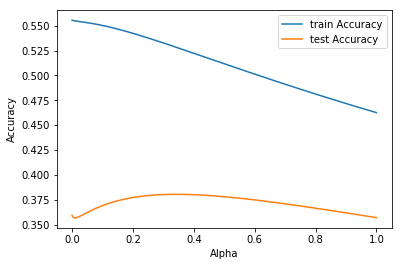

In [10]:
#Alpha 값에 따른 학습 정확도 및 테스트 셋 정확도를 그래프를 이용하여 표현
plt.plot(alpha_list, train_list, label="train Accuracy")
plt.plot(alpha_list, test_list, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.legend()

In [13]:
#학습 정확도와 테스트 정확도의 합산을 이용하여 가장 높은 값을 가진 alpha 값을 출력
print("alpha : ",alpha_list[sum_list.index(max(sum_list))])
print("train score: ", train_list[sum_list.index(max(sum_list))])
print("test score :", test_list[sum_list.index(max(sum_list))])

alpha :  0.15021
train score:  0.5465401201241165
test score : 0.37394477897114964


In [15]:
#테스트 정확도의 결과가 가장 높은 값을 가진 alpha 출력
print("alpha : ",alpha_list[test_list.index(max(test_list))])
print("train score: ", train_list[test_list.index(max(test_list))])
print("test score :", test_list[test_list.index(max(test_list))])

alpha :  0.34255
train score:  0.5282460485550682
test score : 0.3803862892231171
